In [1]:
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set()  # this makes plots pretty. but it also makes histograms confusing
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import cross_validation as cv
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

from skll import metrics
from sklearn.metrics import roc_auc_score, make_scorer

import data_utils

In [2]:
train_init = pd.read_csv('../../data/train.csv')
test_init = pd.read_csv('../../data/test.csv')

In [3]:
train = train_init.replace(to_replace=[9999999999, -999999], value=np.NAN)
test = test_init.replace(to_replace=[9999999999, -999999], value=np.NAN)

constant_cols = (train.columns[train.max() == train.min()])
train = train.drop(constant_cols, axis=1).drop(['ID'], axis=1)
test = test.drop(constant_cols, axis=1)

In [4]:
train_neg = train.loc[train.TARGET==0].drop(['TARGET'], axis=1)
train_pos = train.loc[train.TARGET==1].drop(['TARGET'], axis=1)

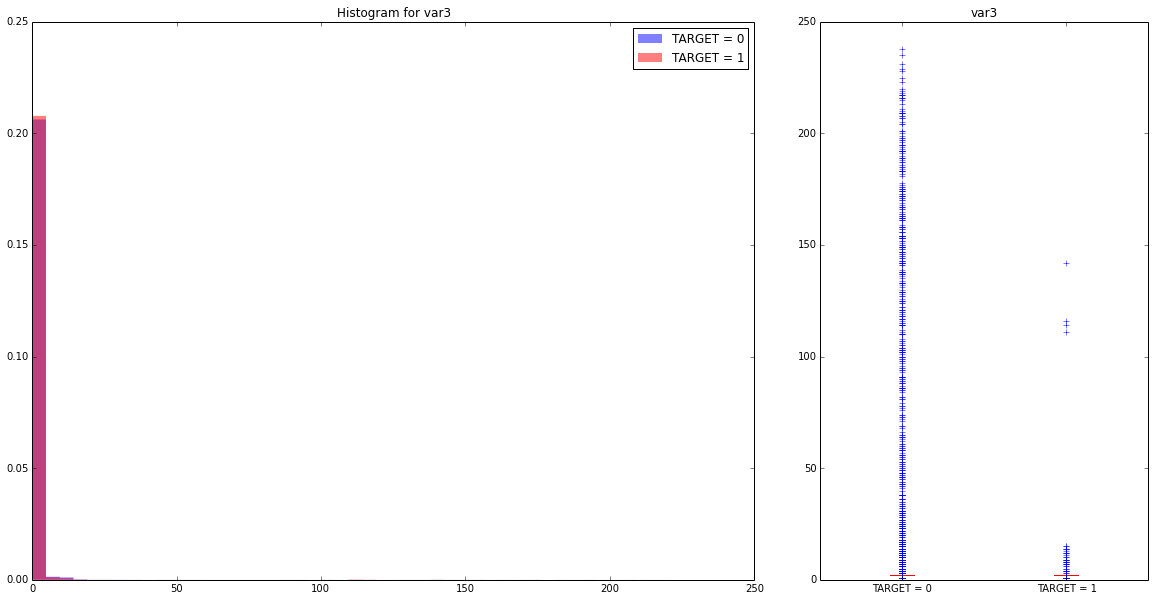

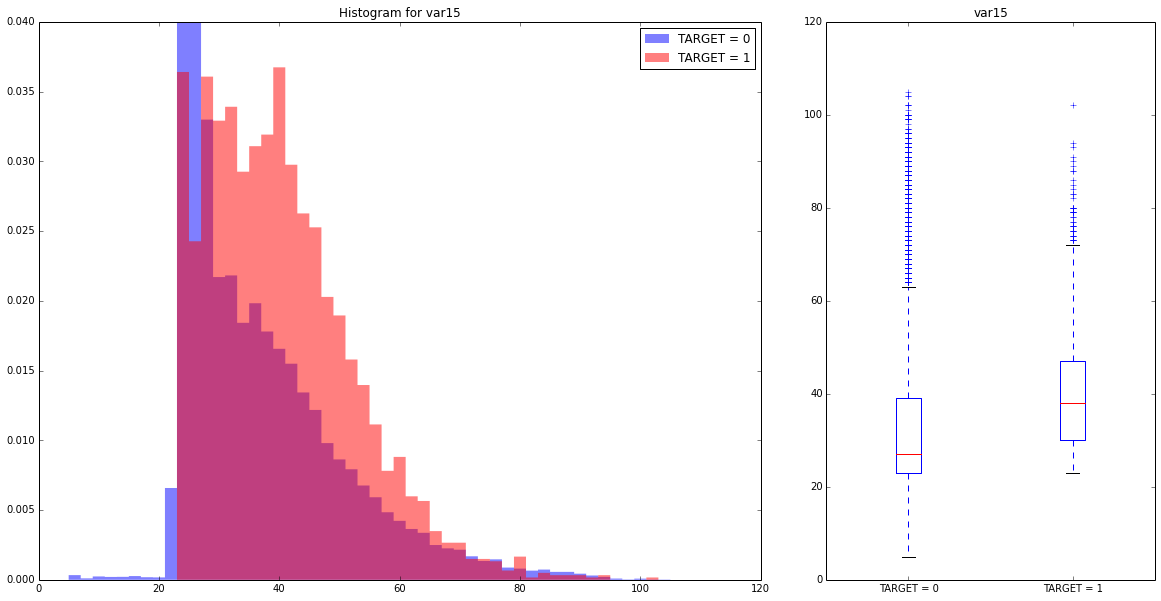

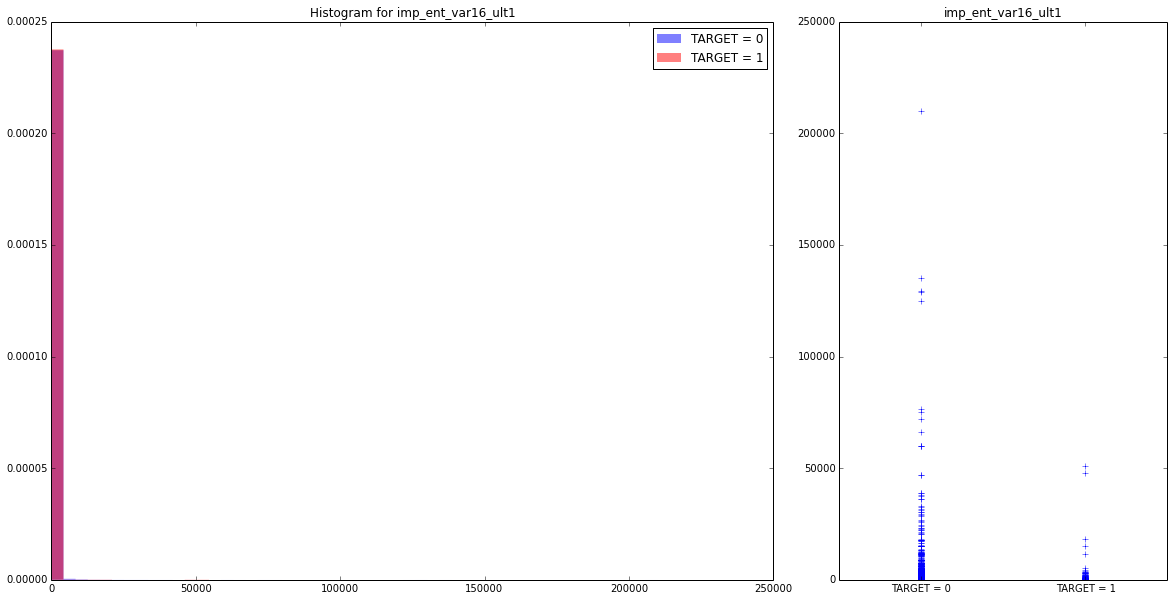

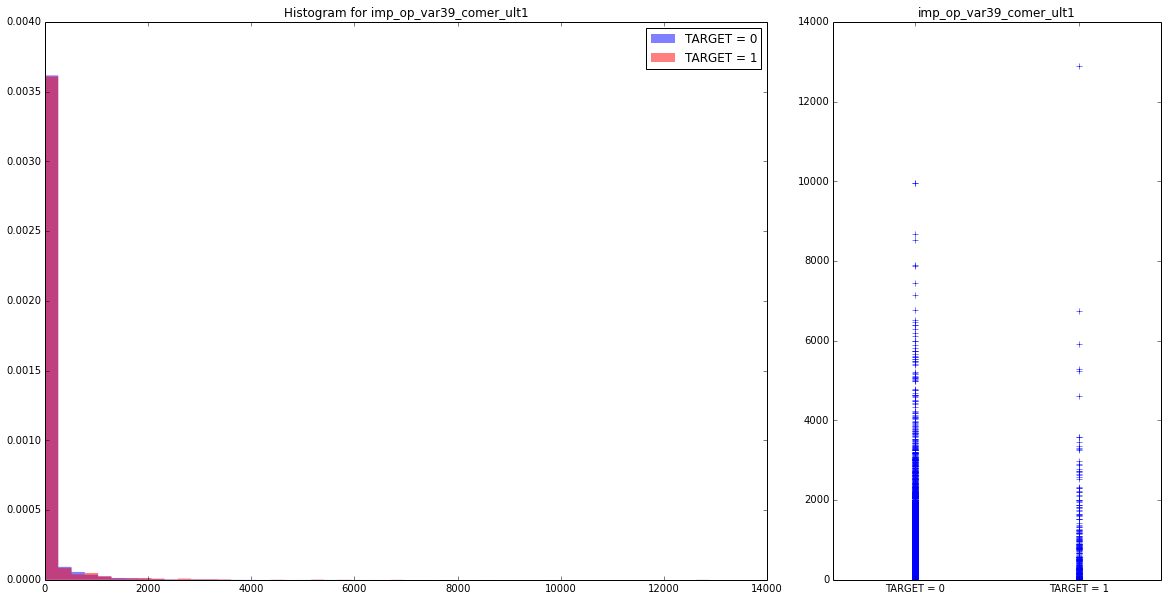

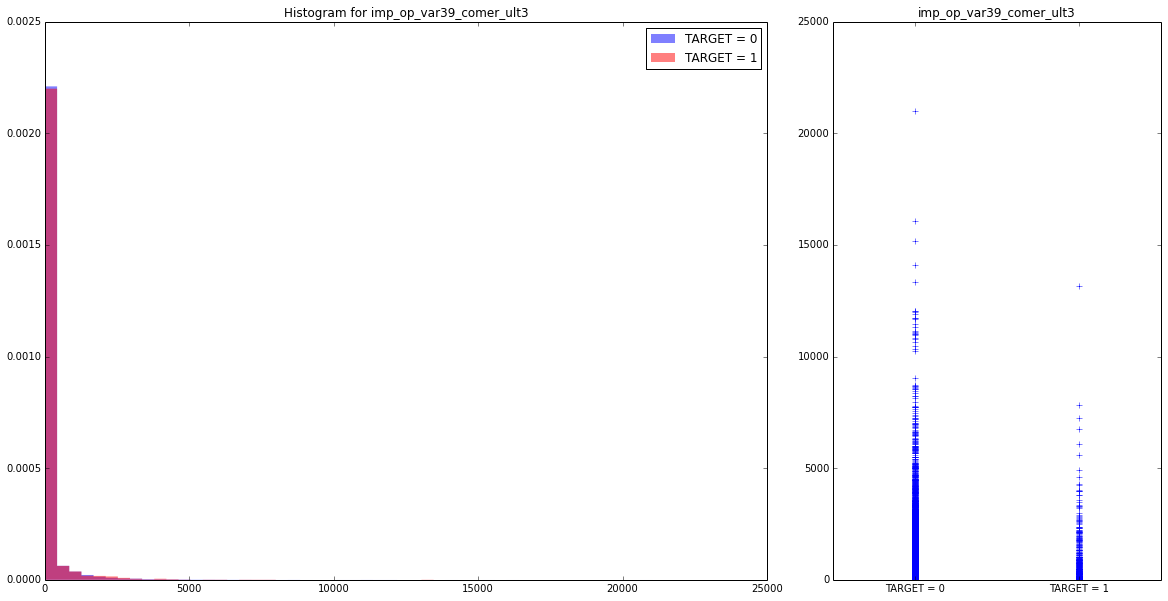

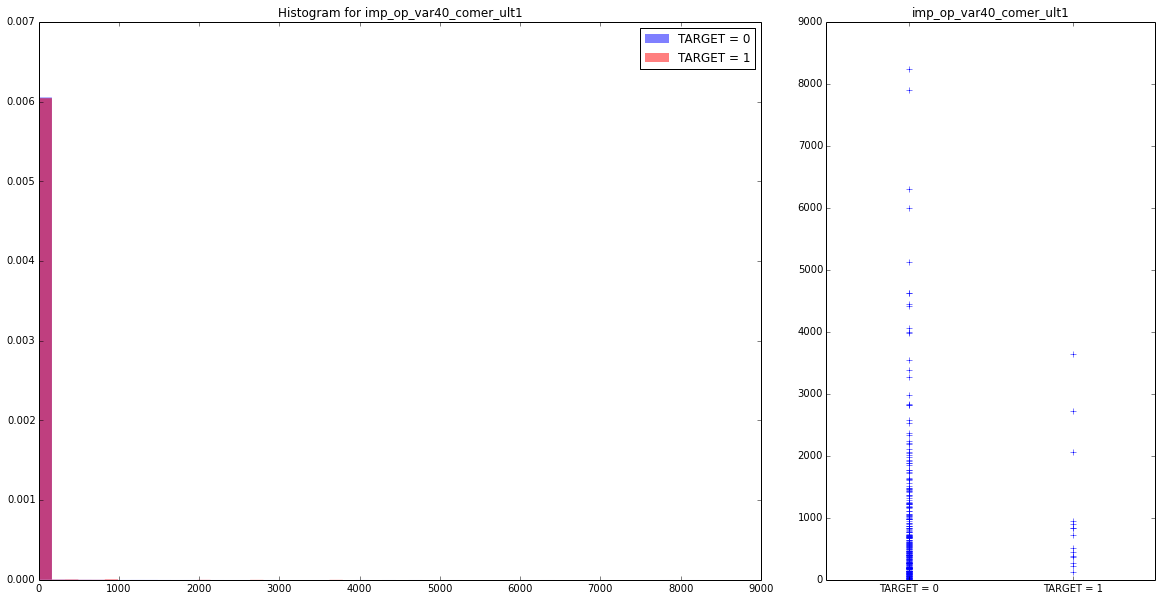

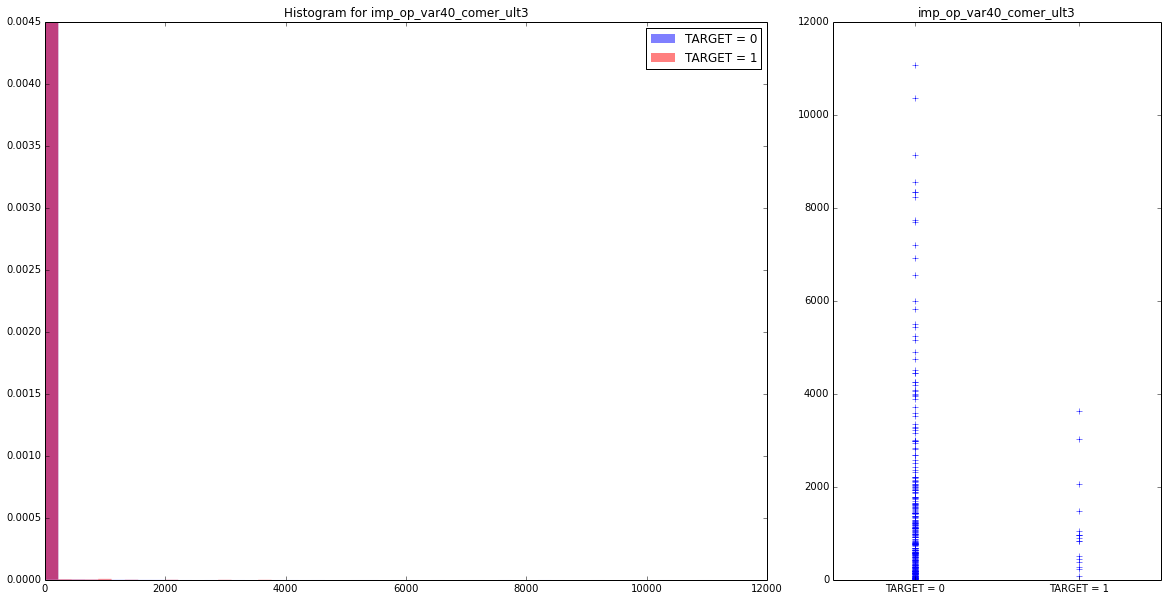

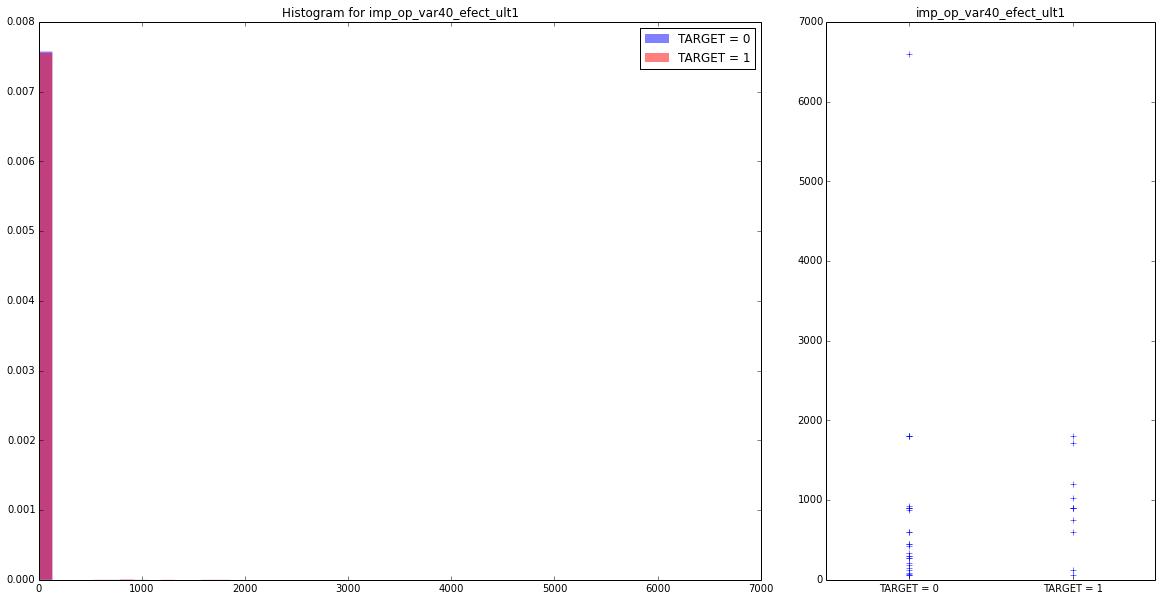

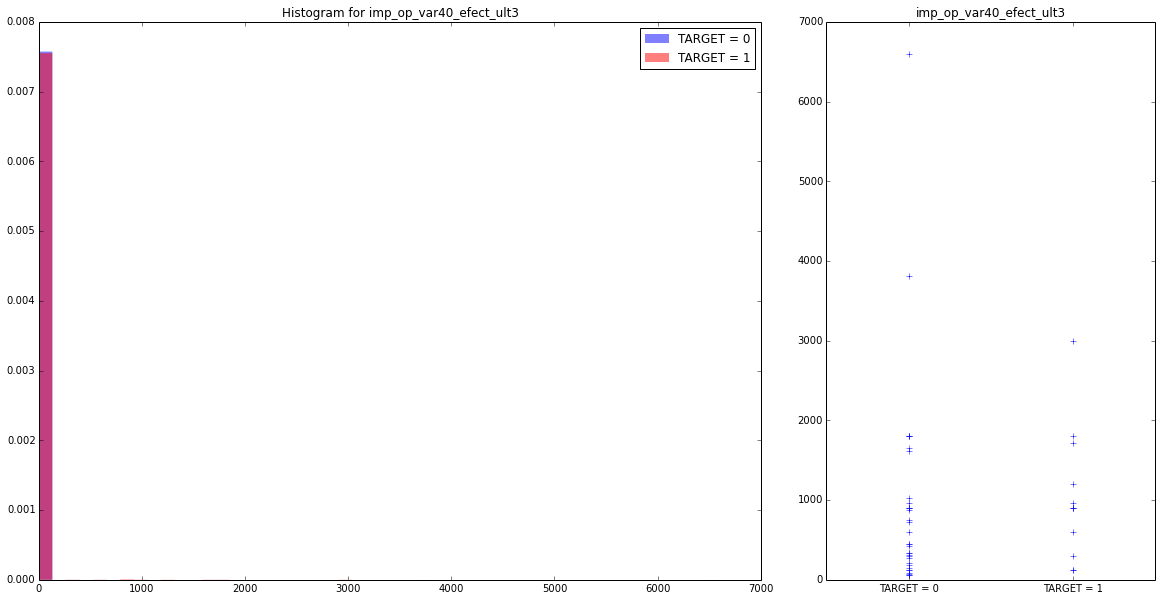

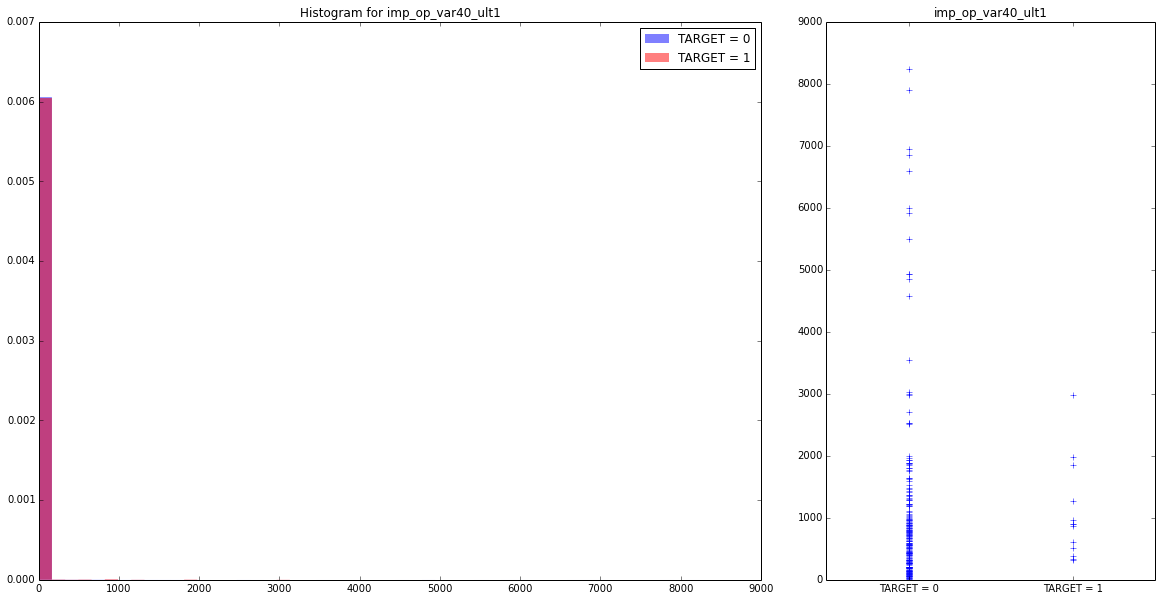

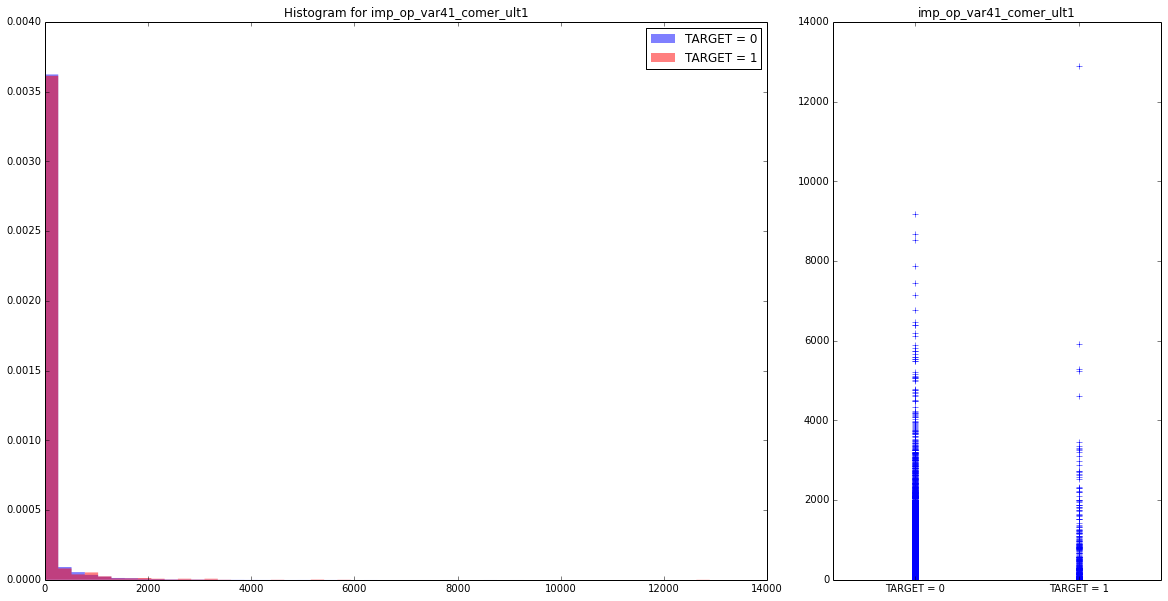

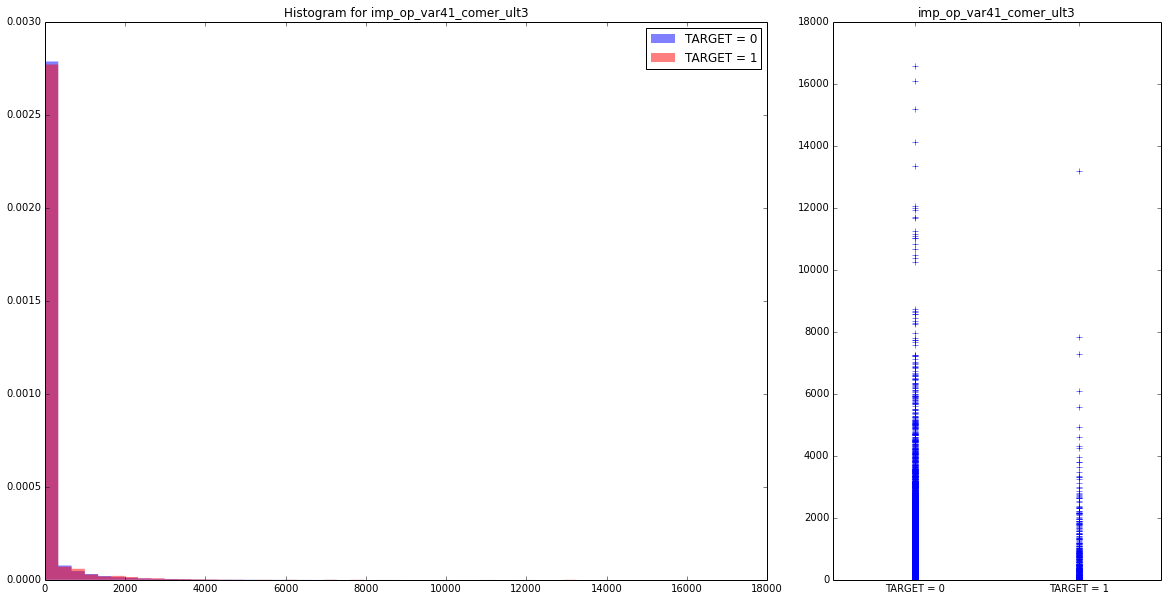

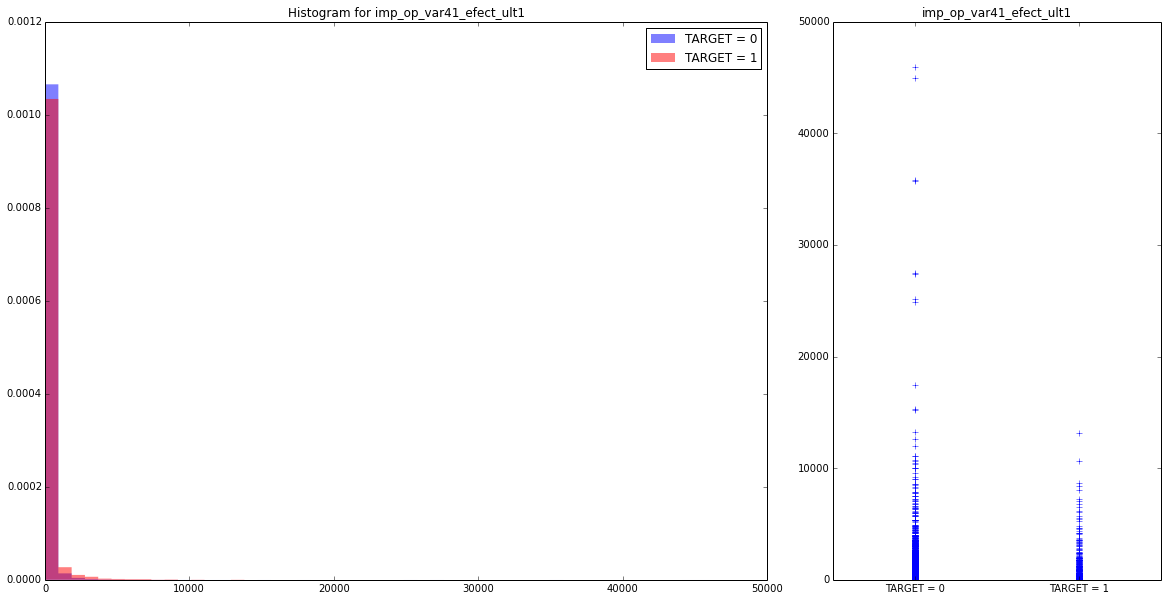

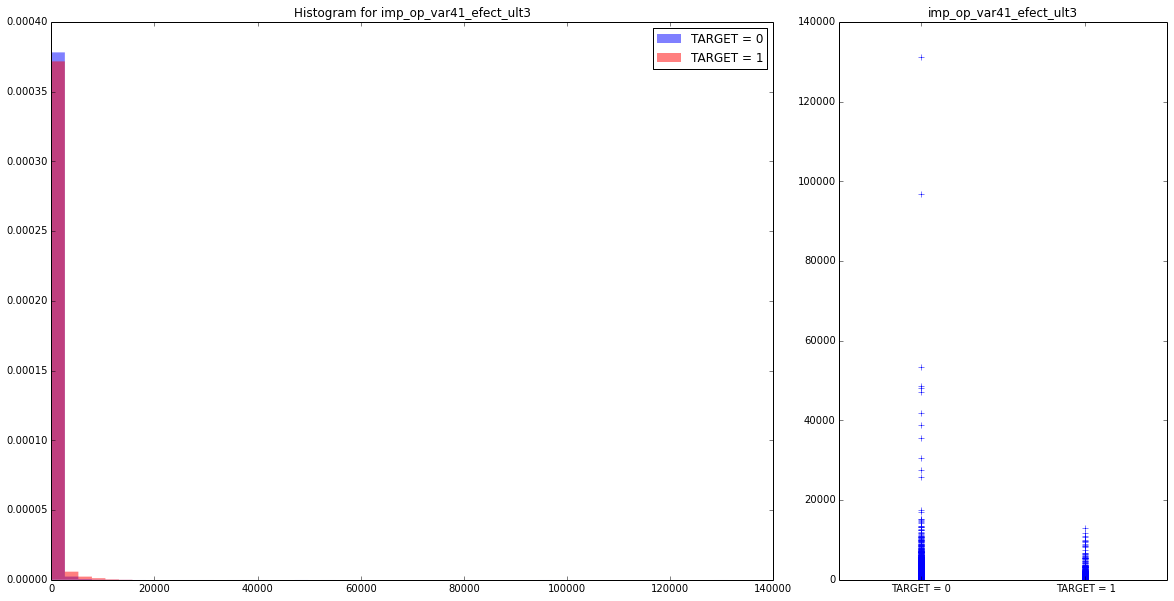

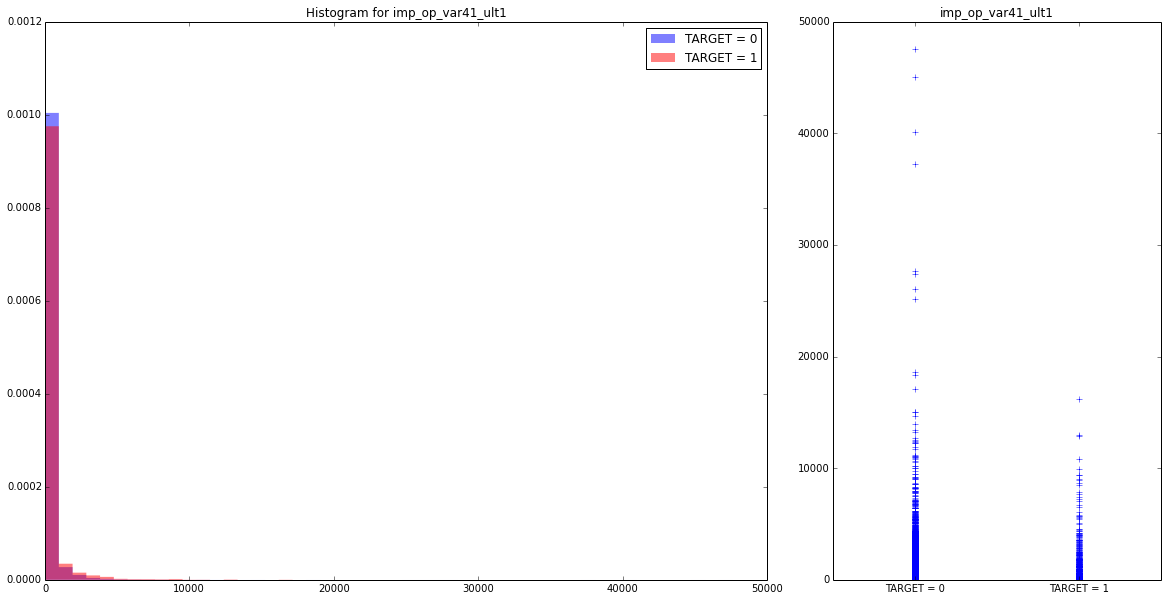

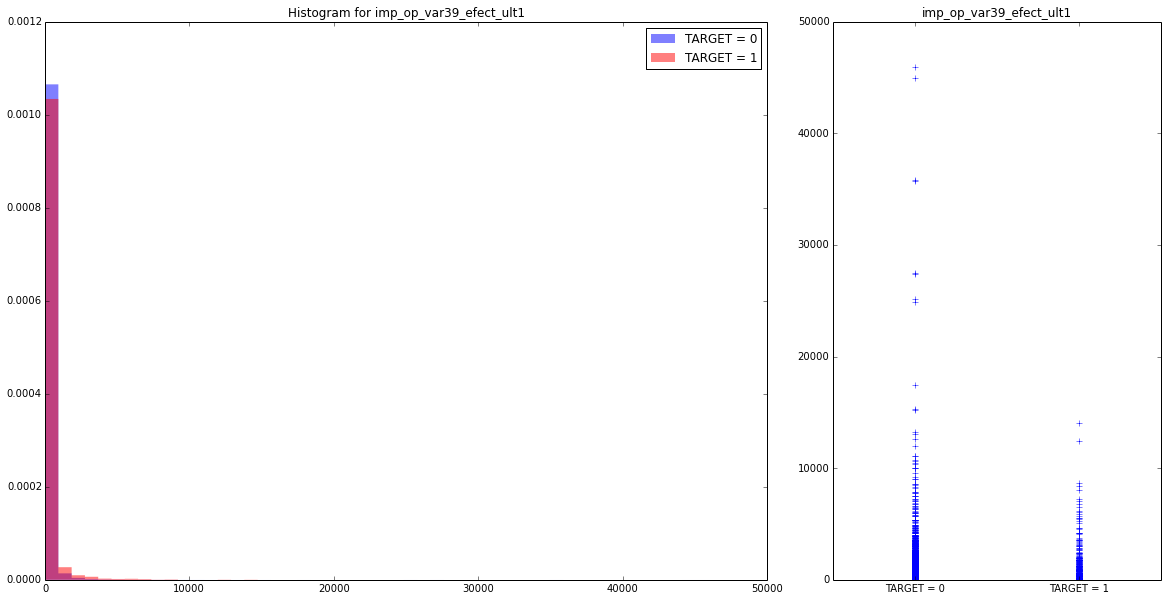

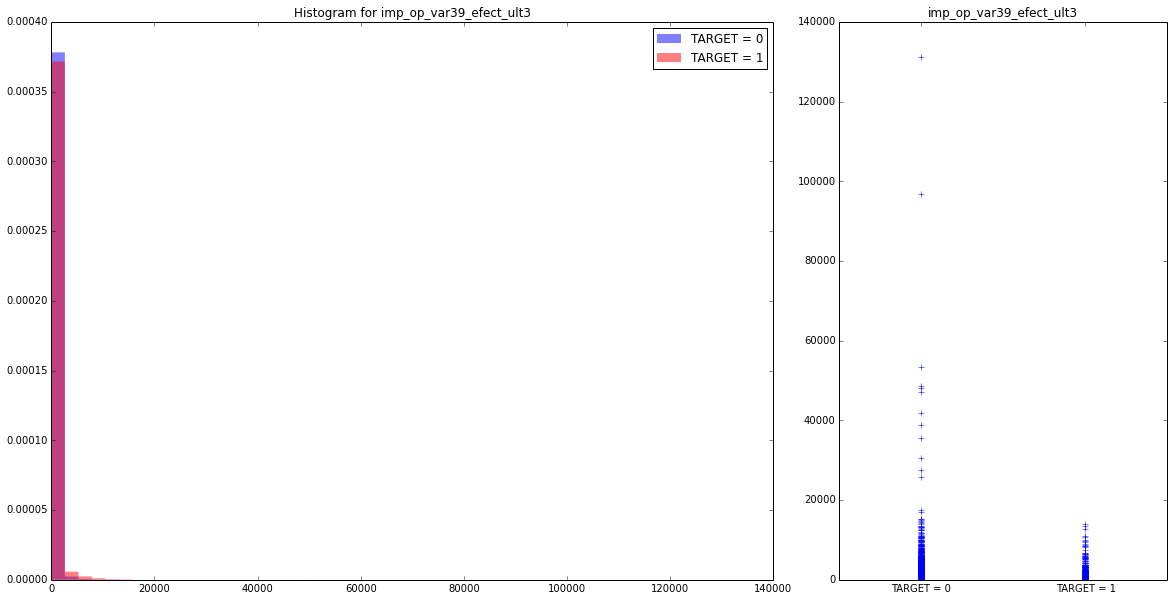

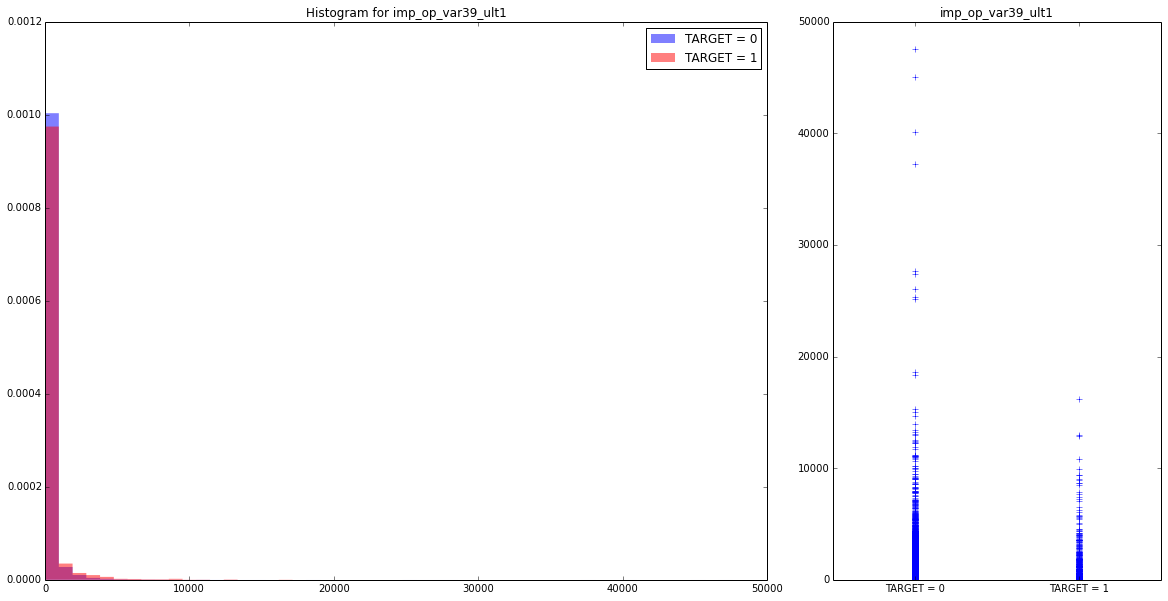

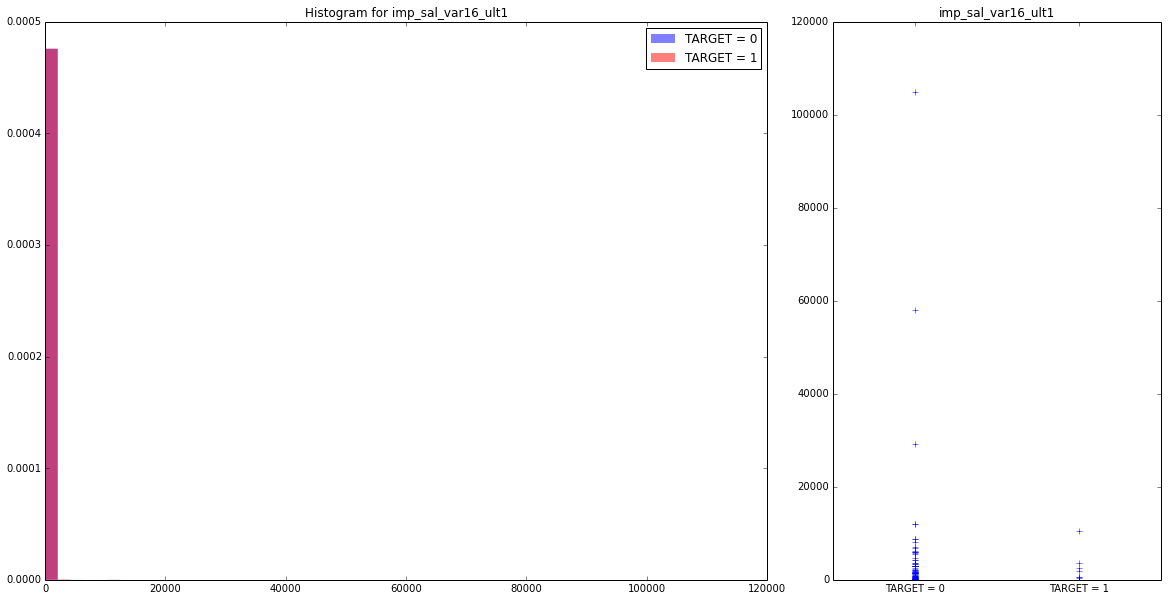

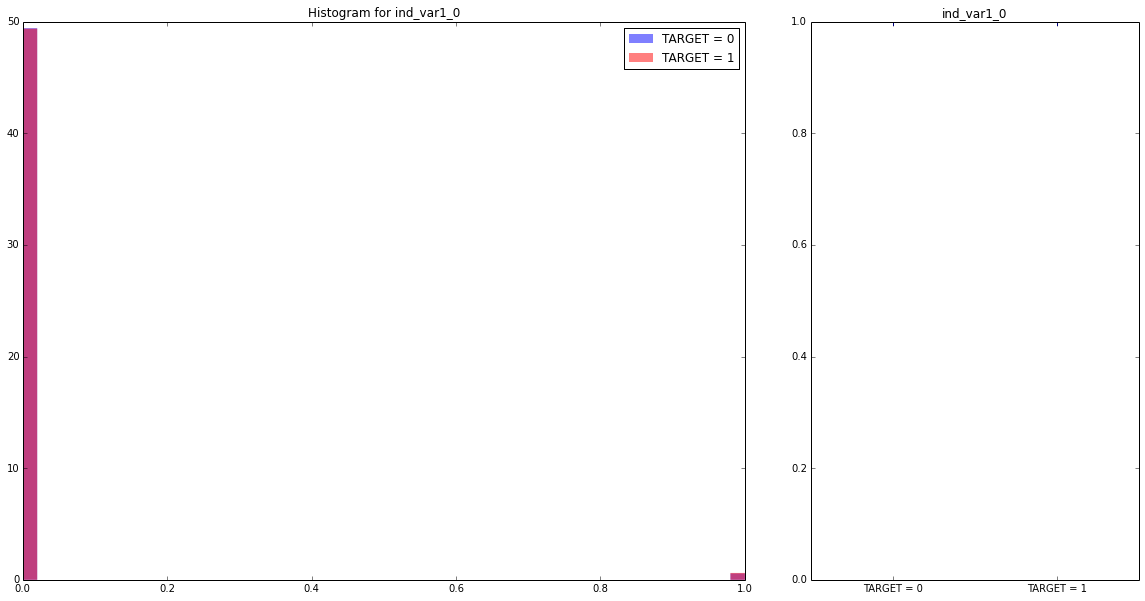

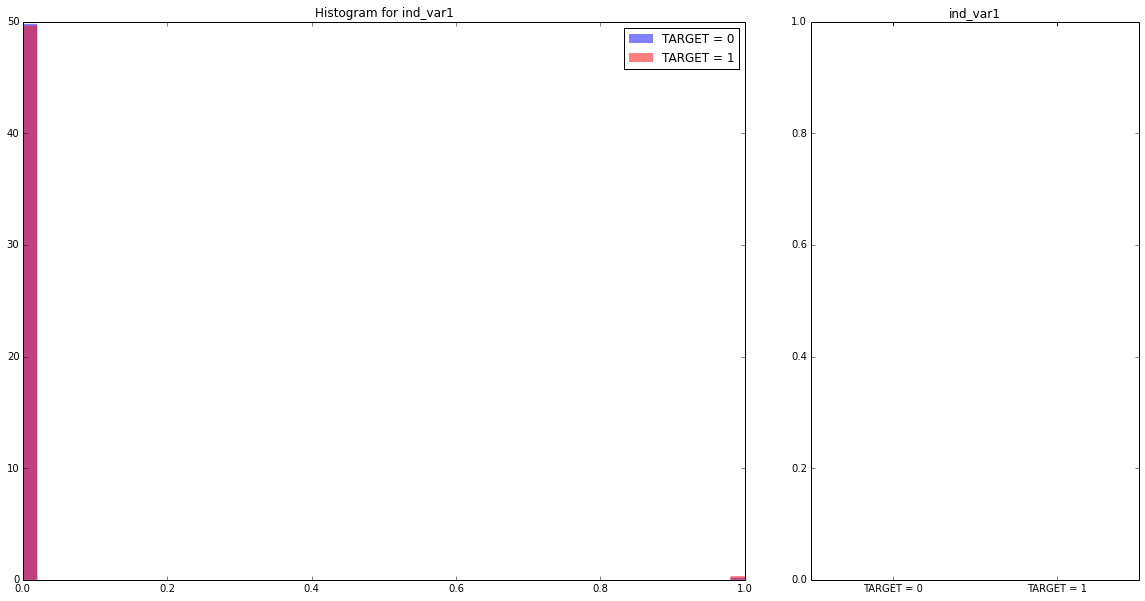

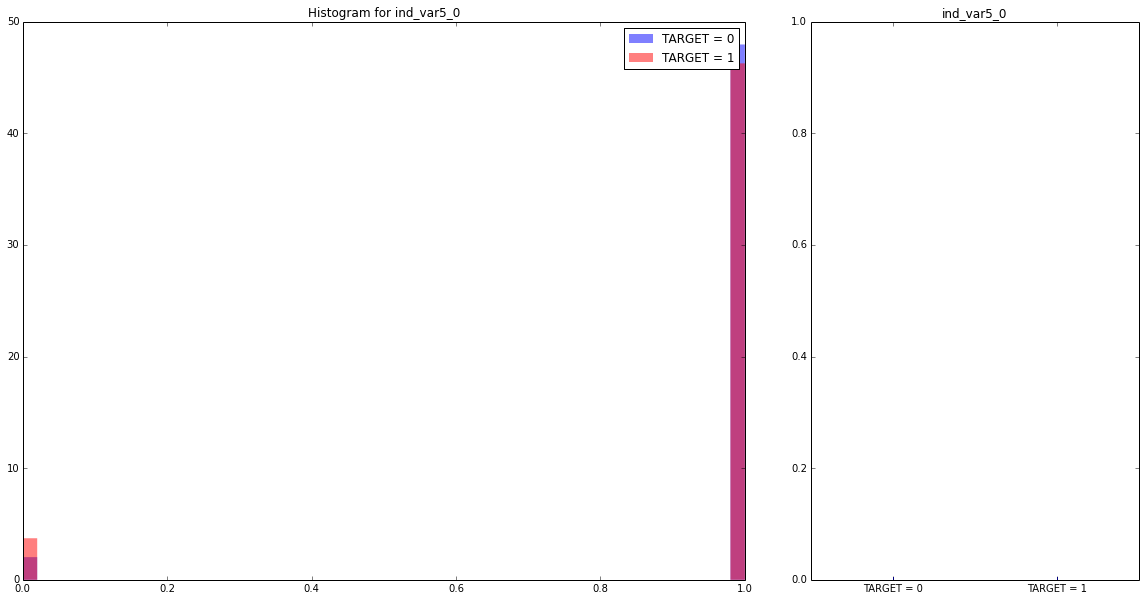

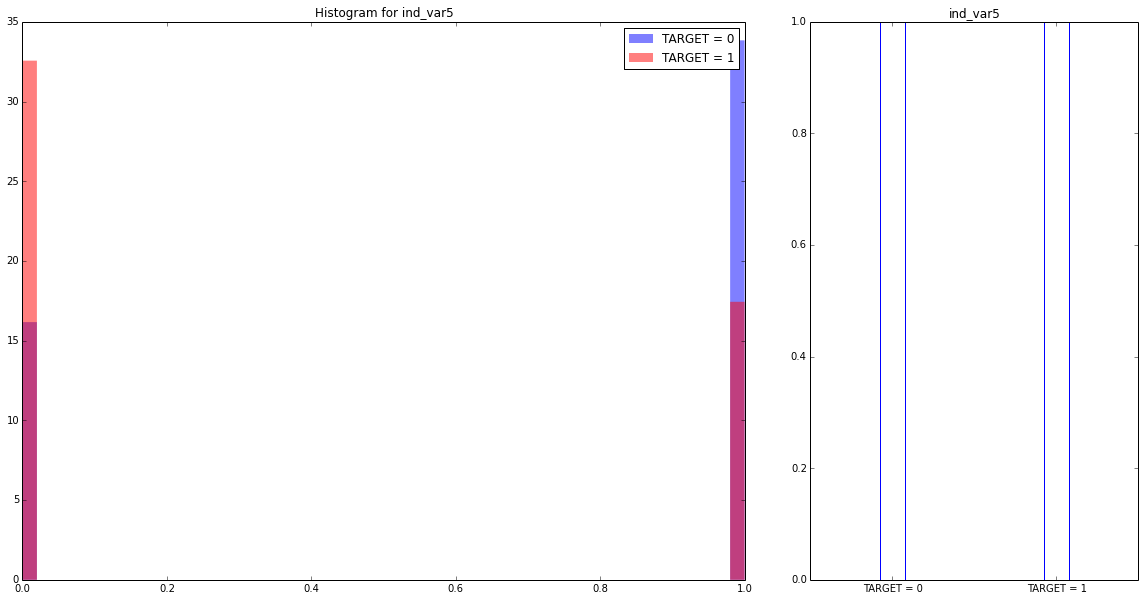

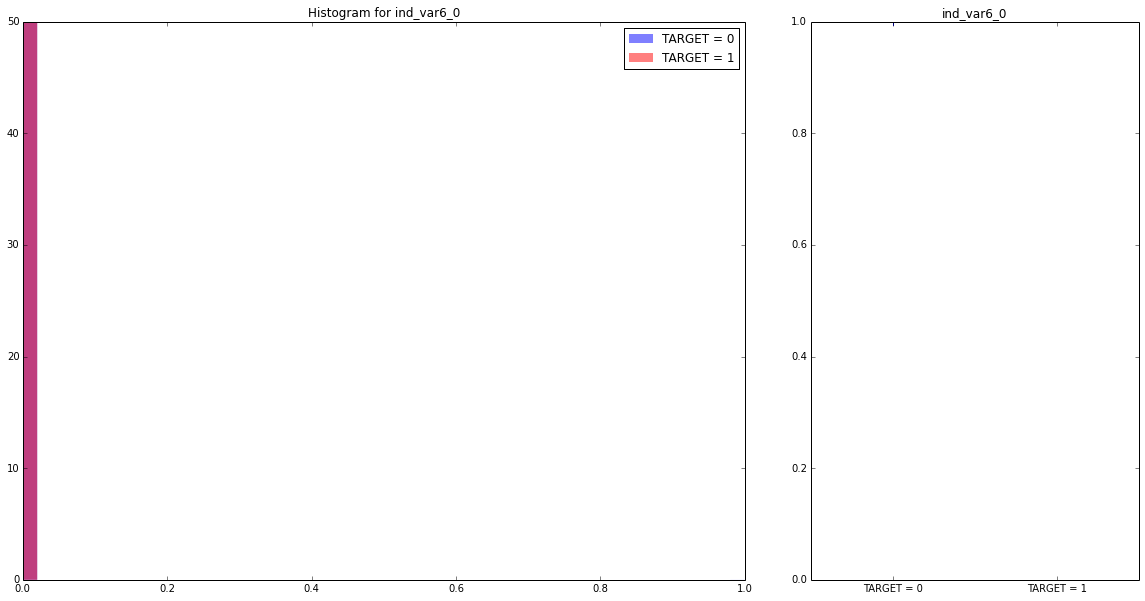

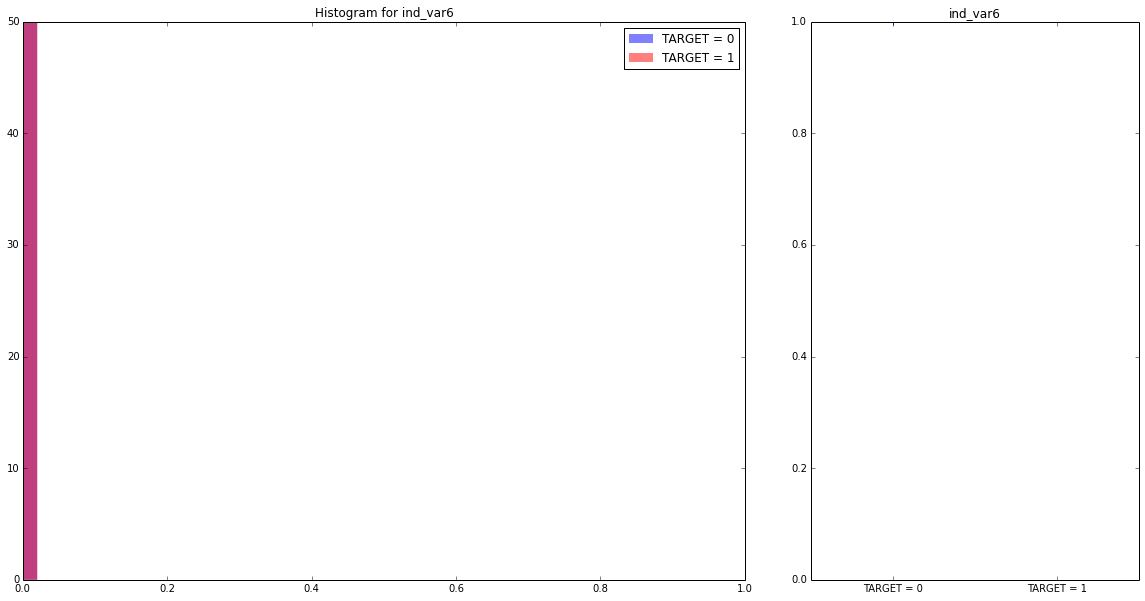

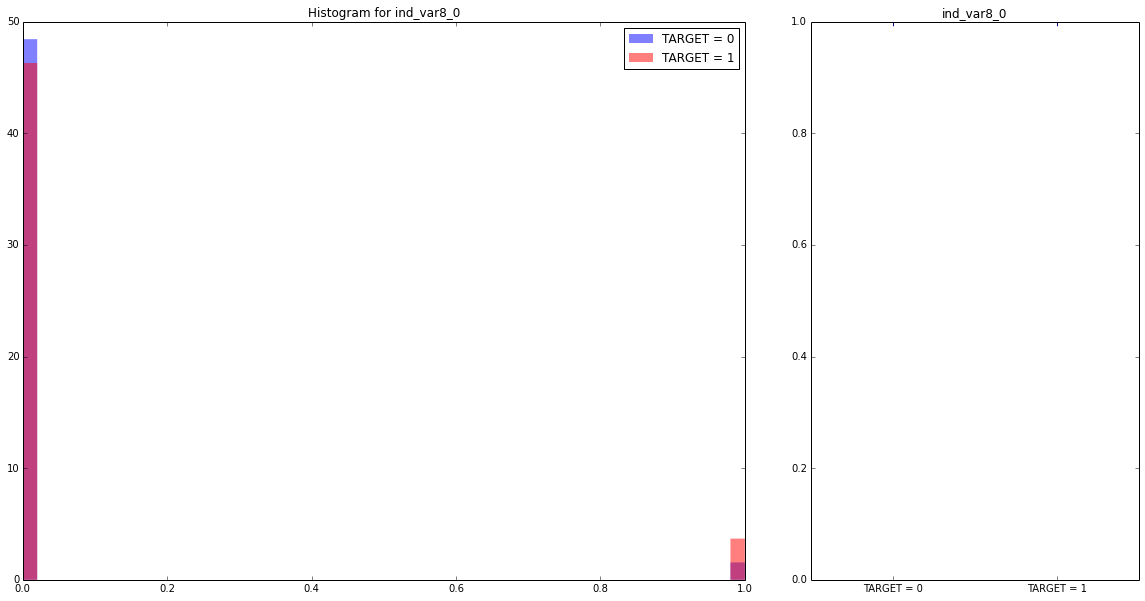

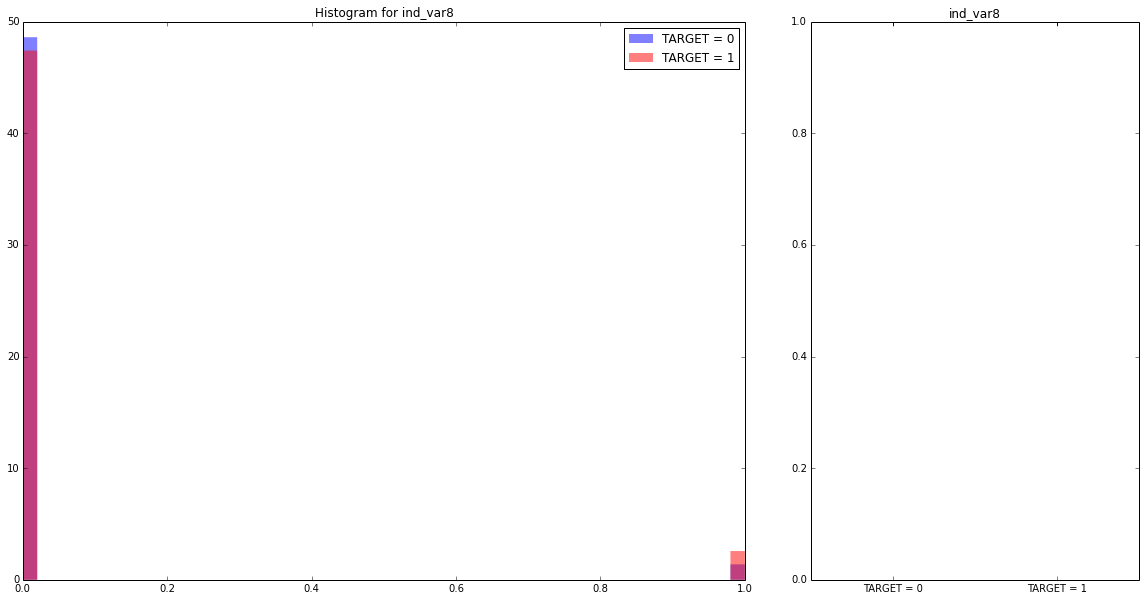

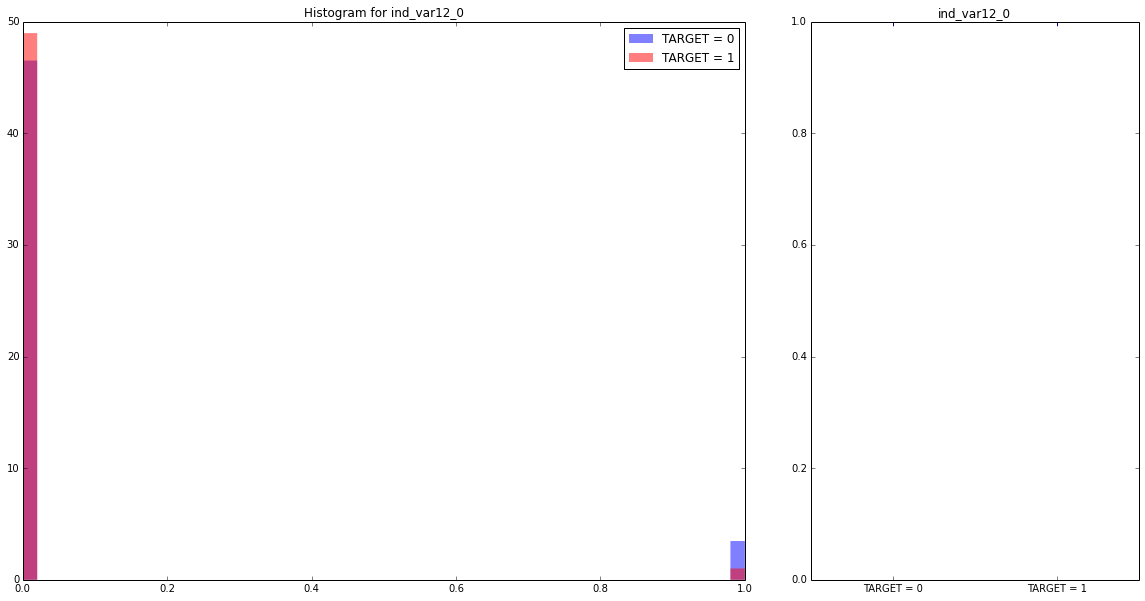

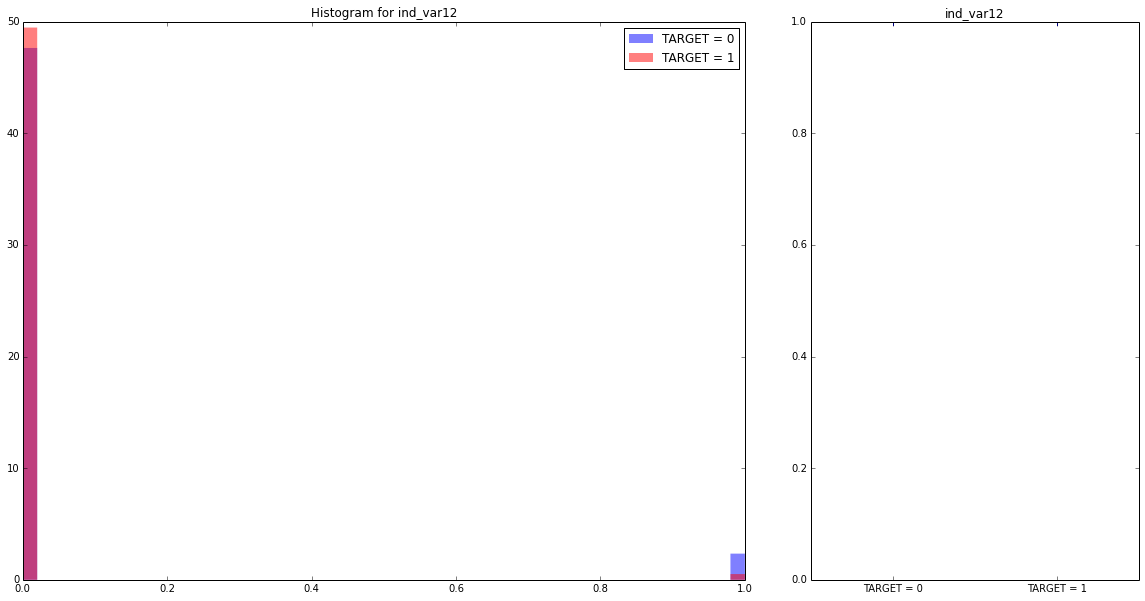

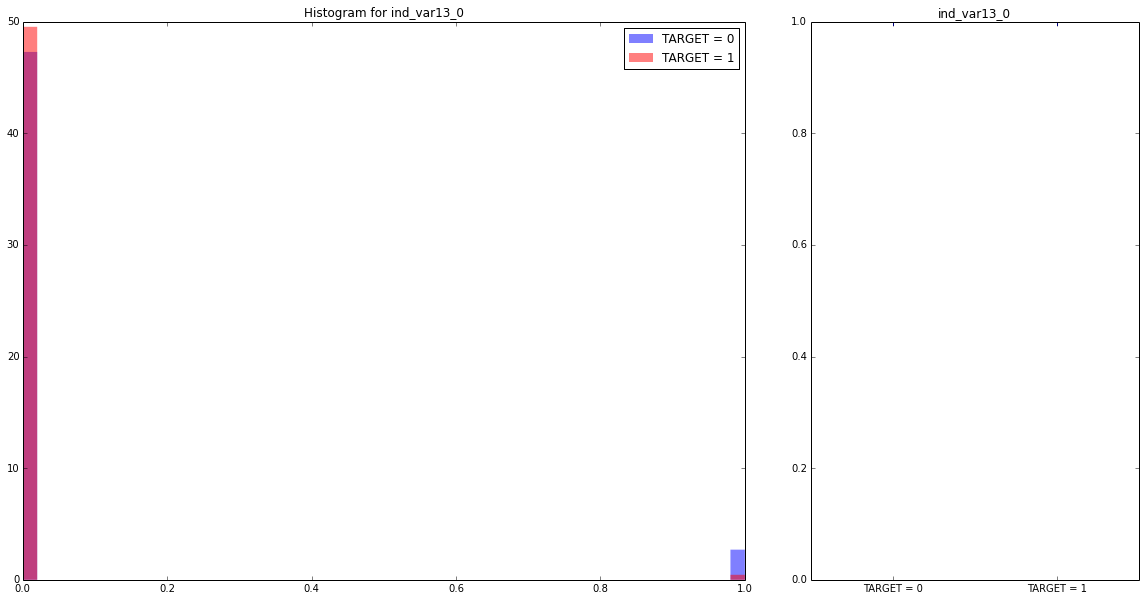

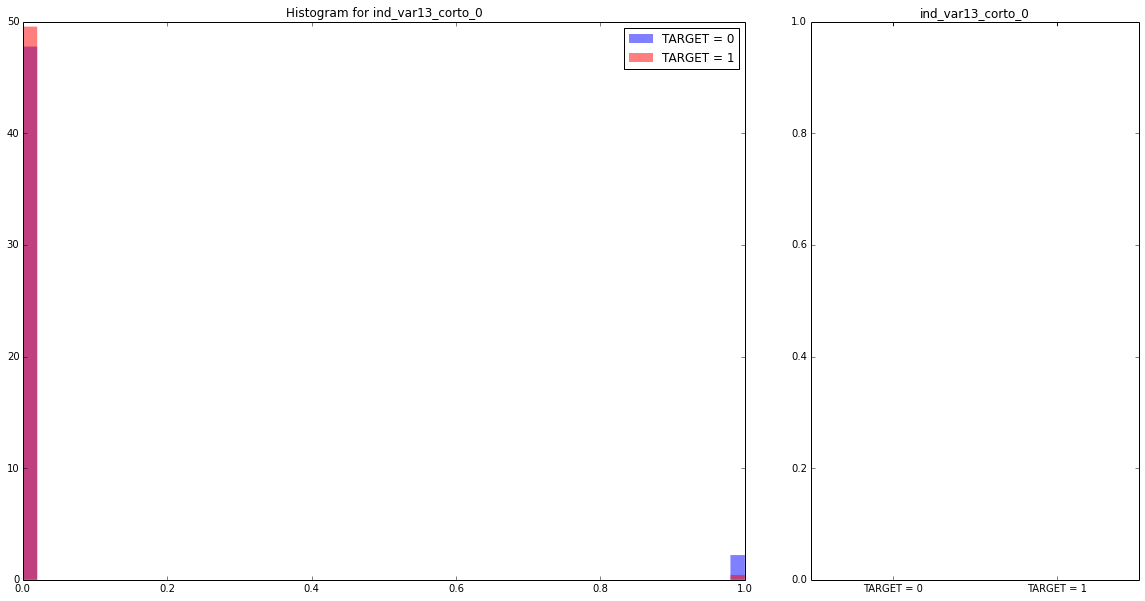

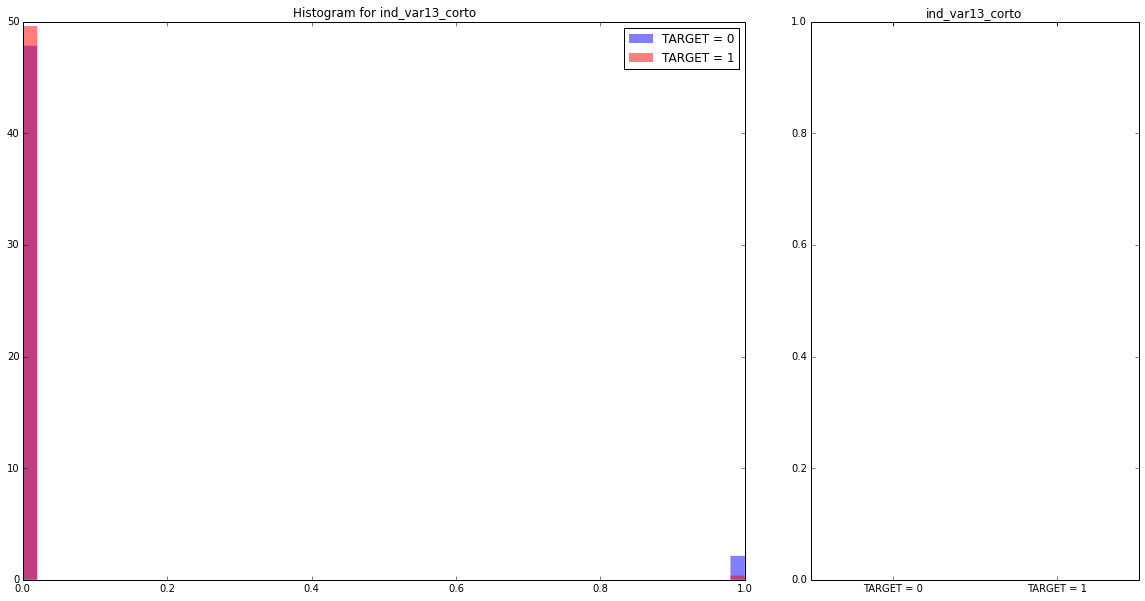

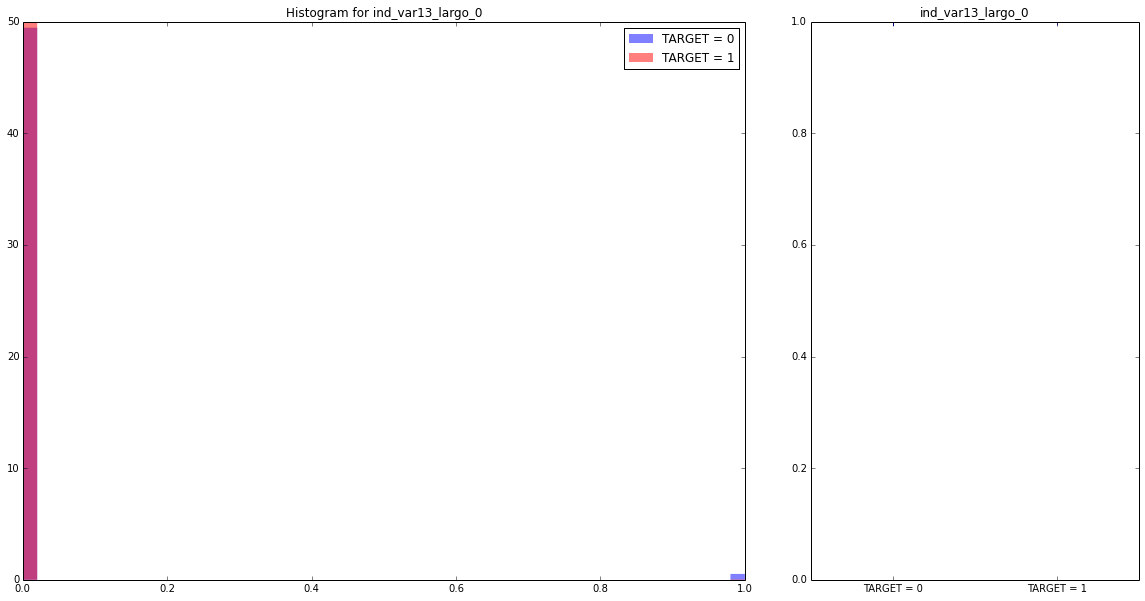

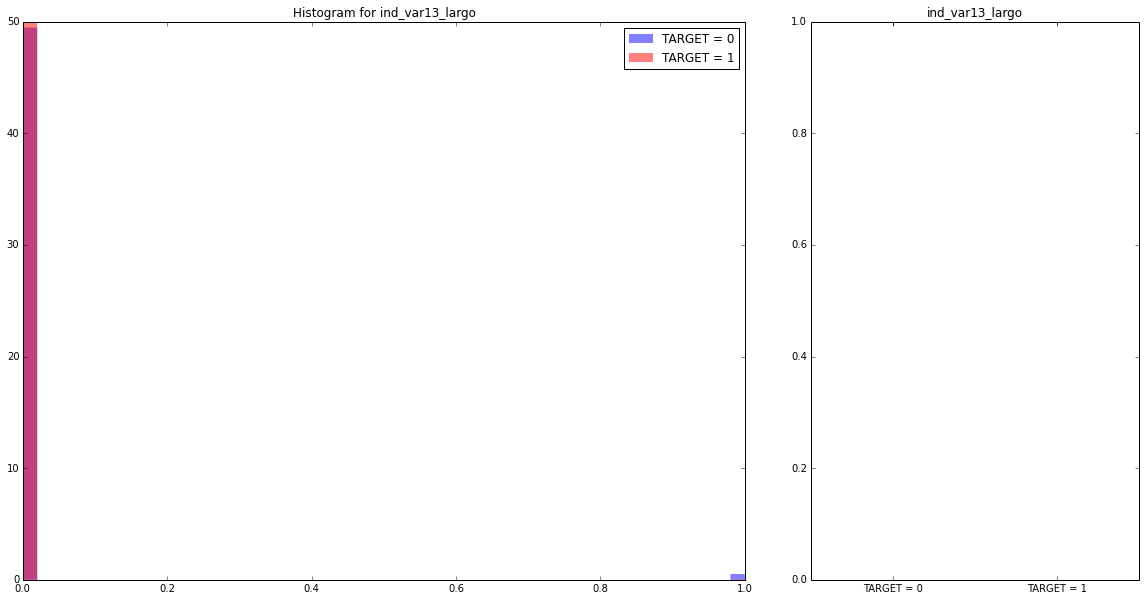

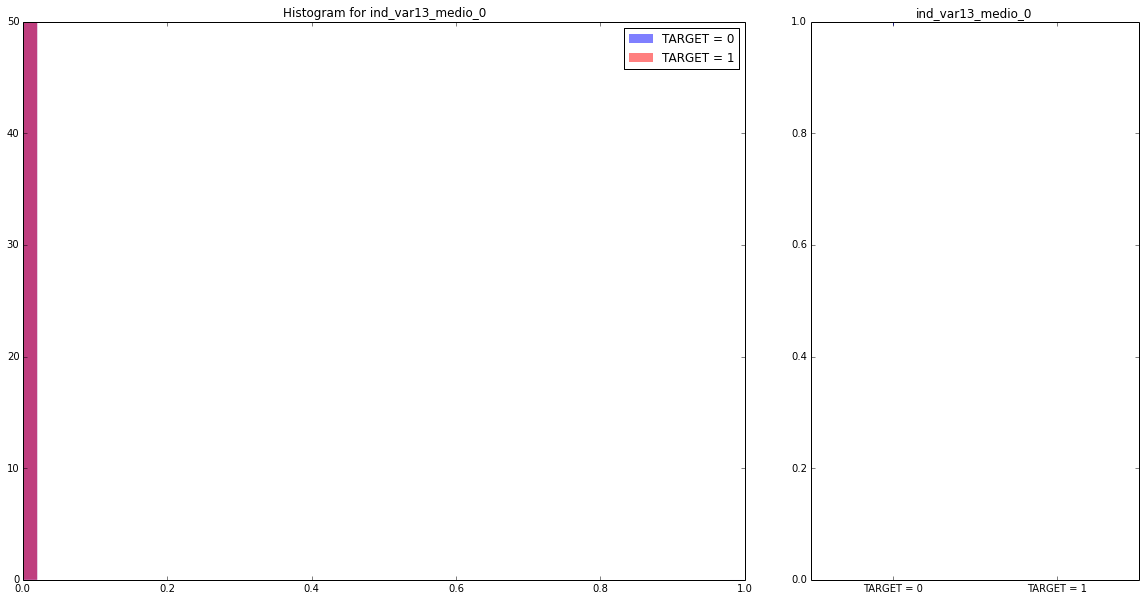

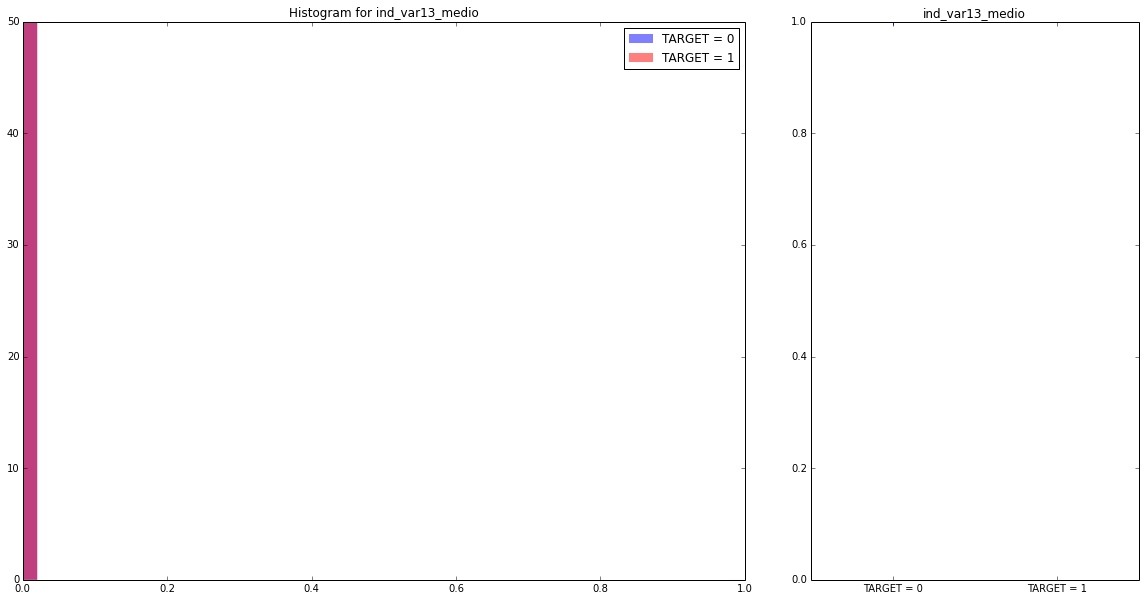

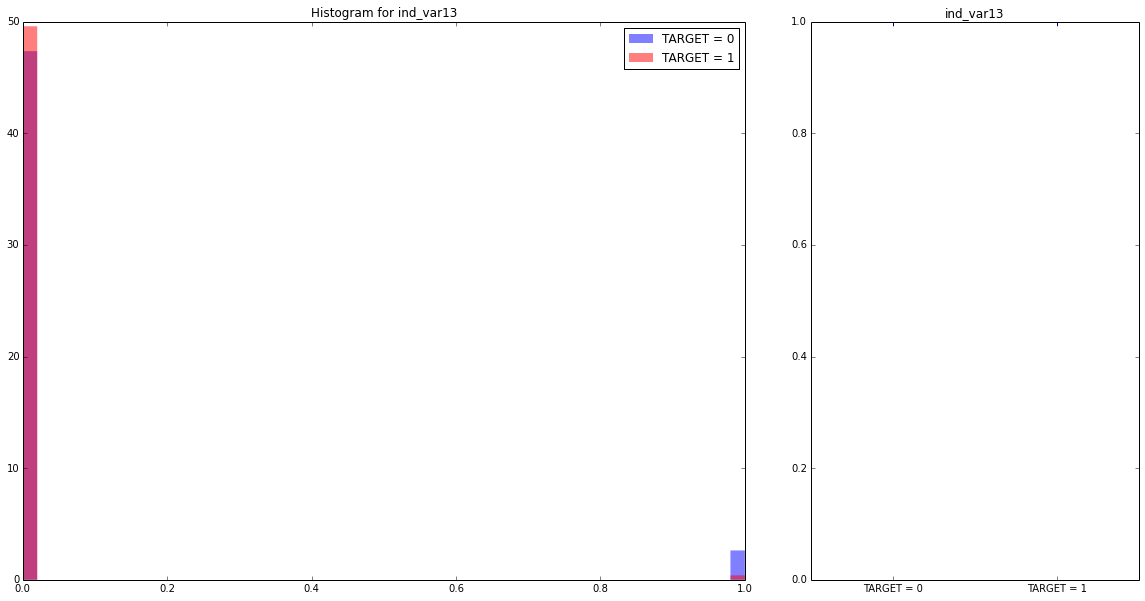

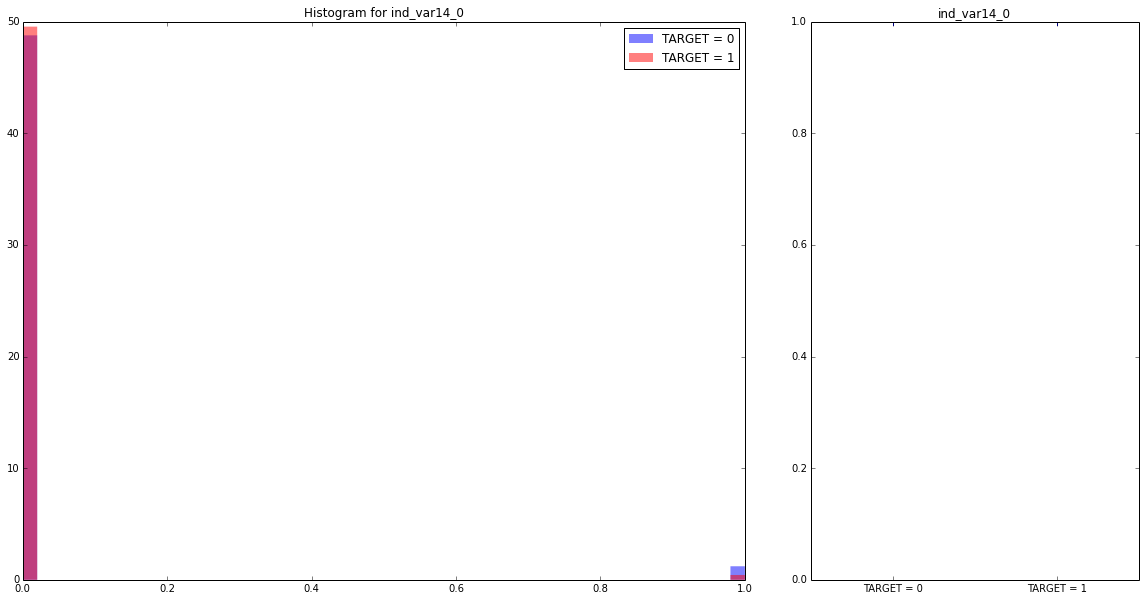

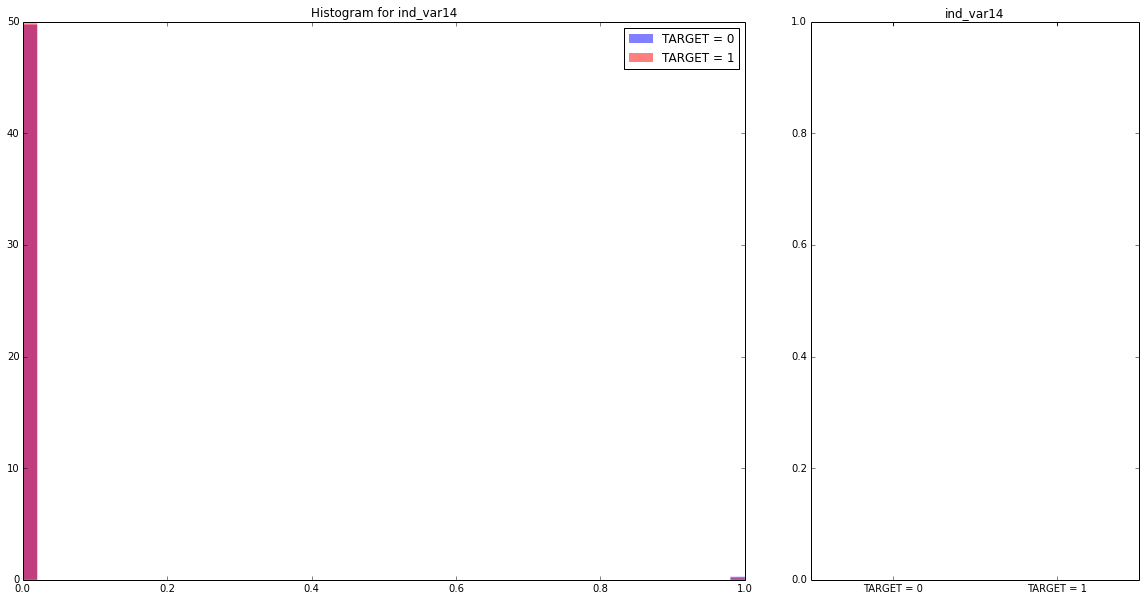

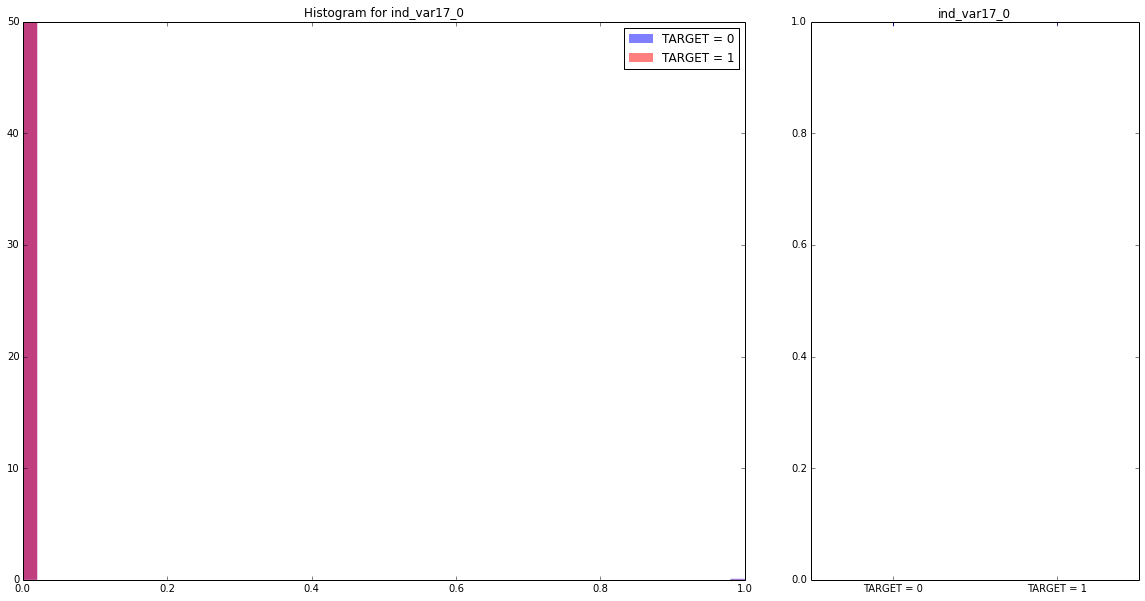

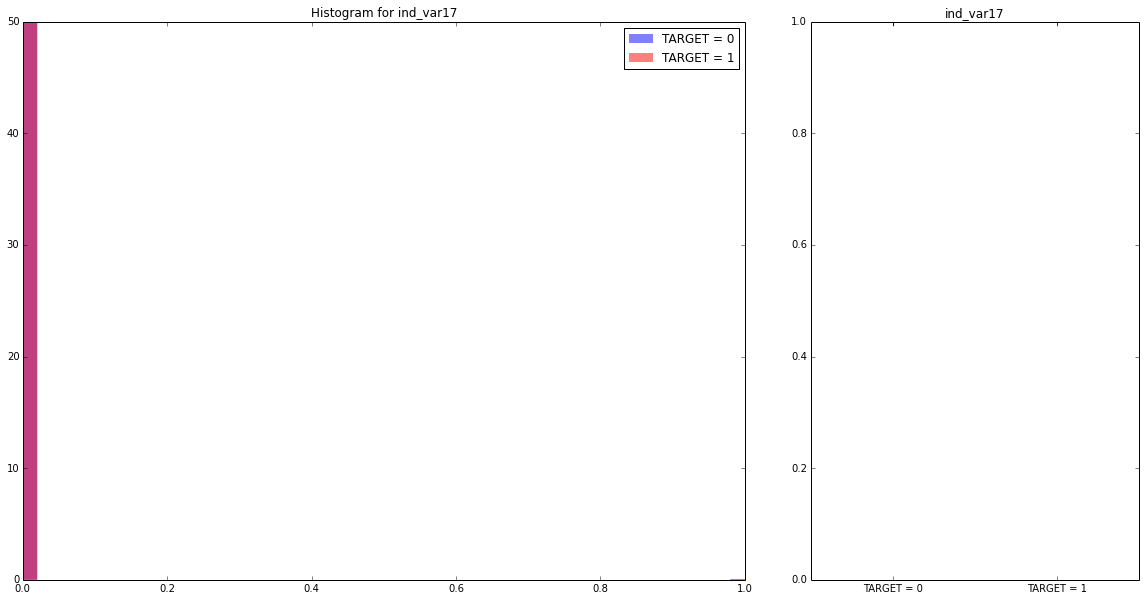

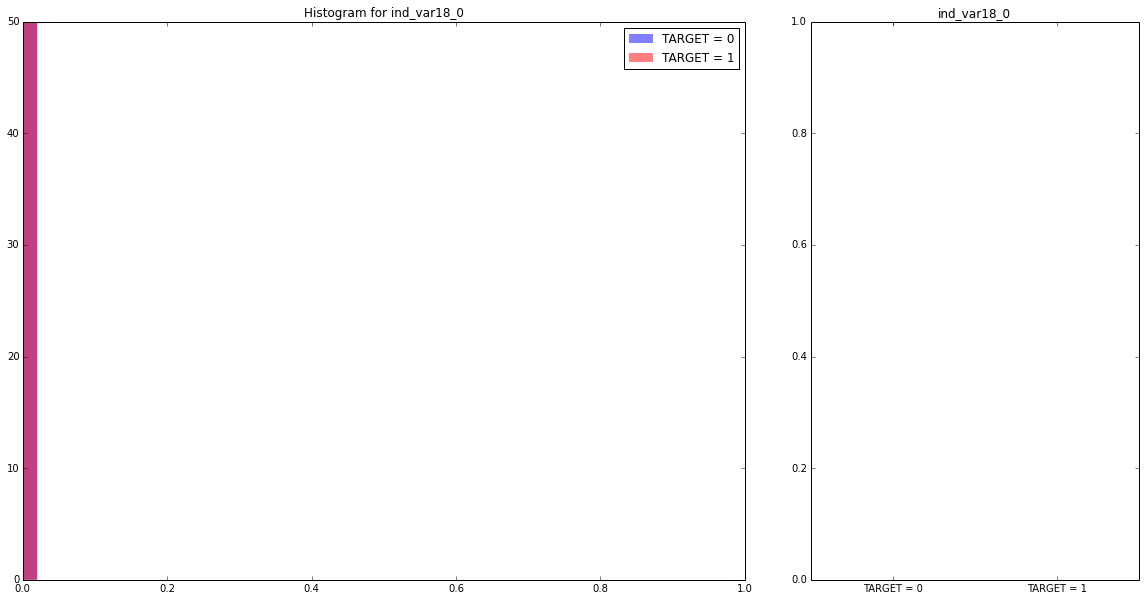

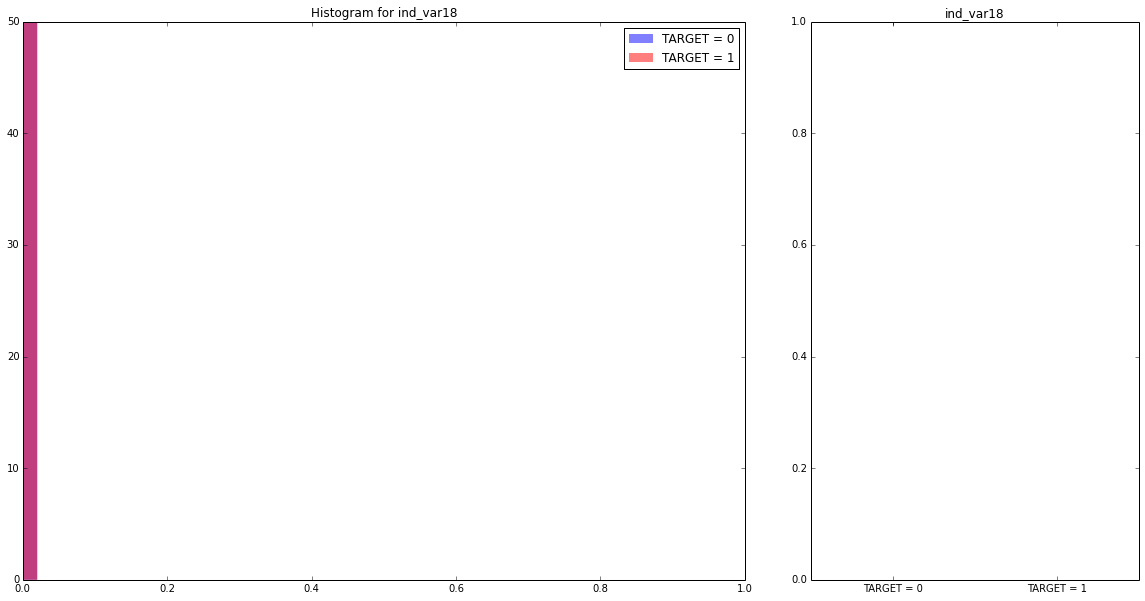

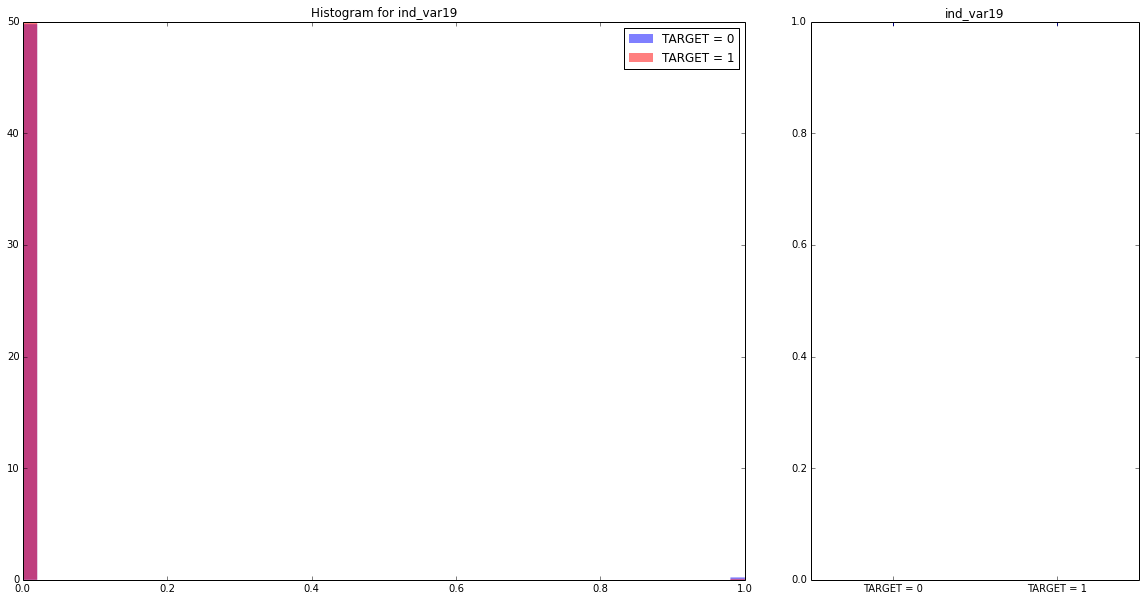

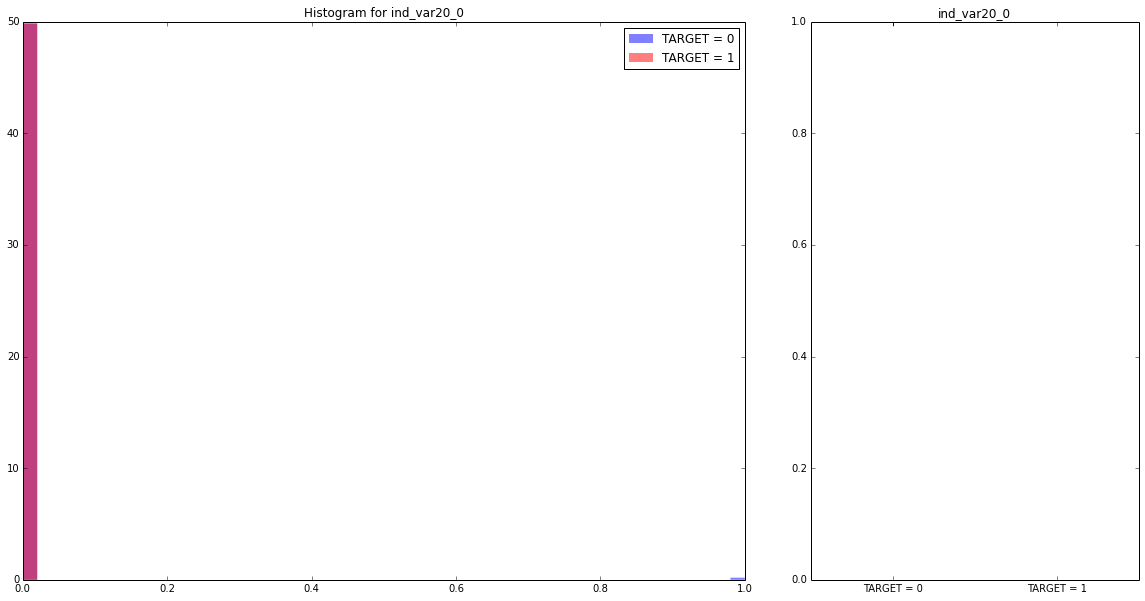

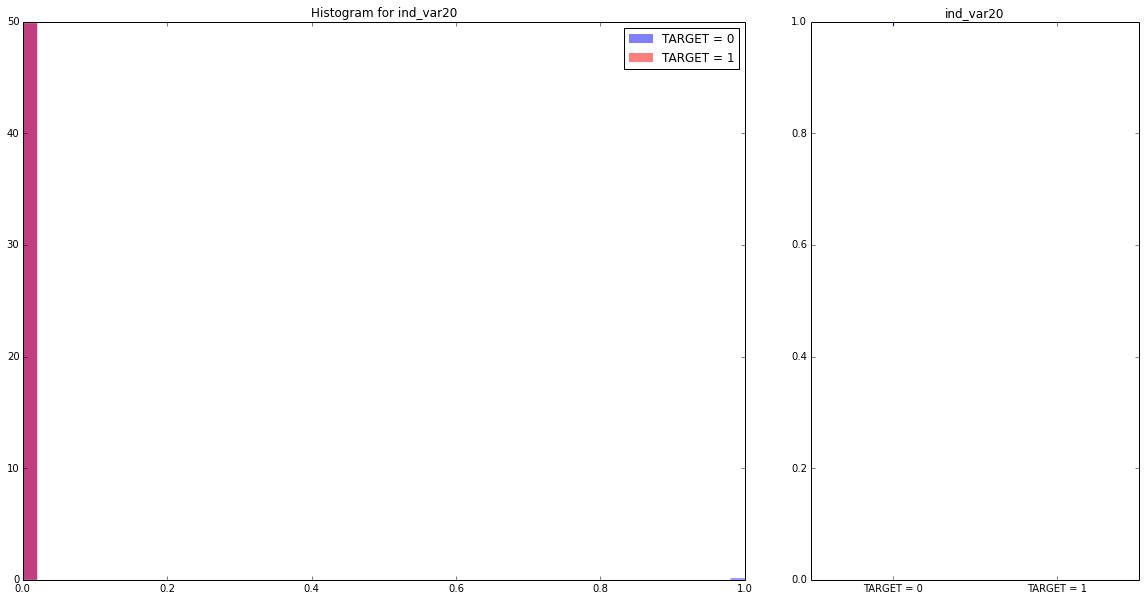

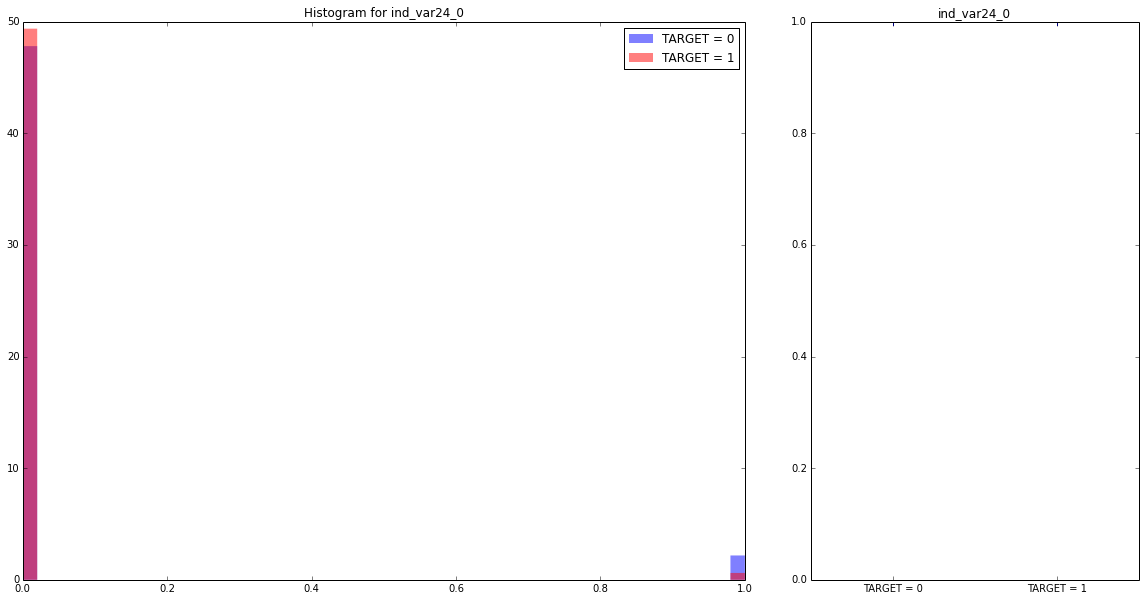

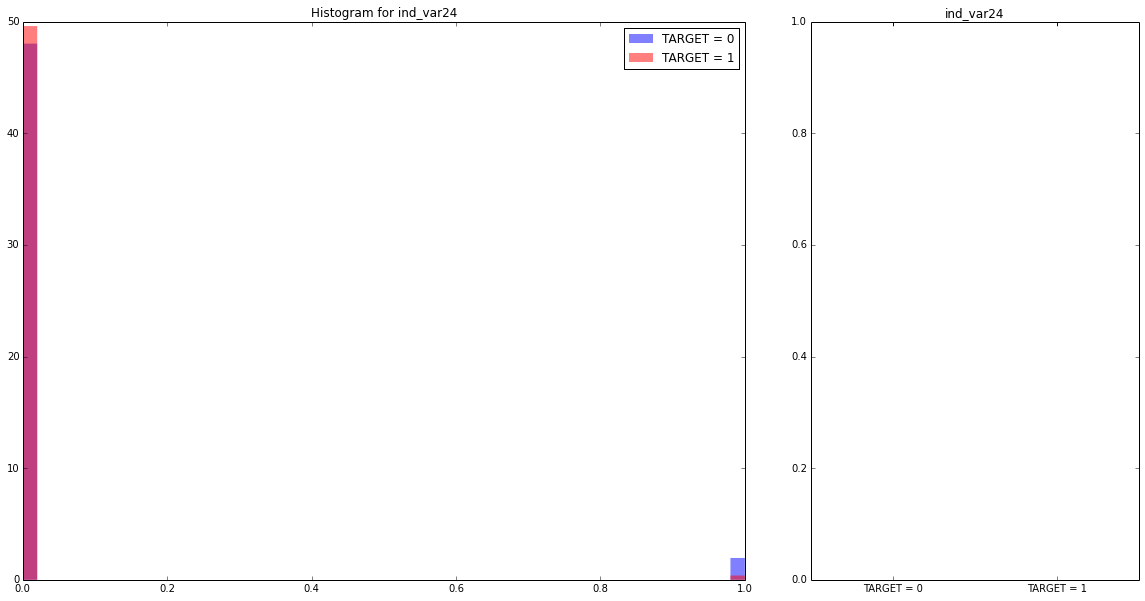

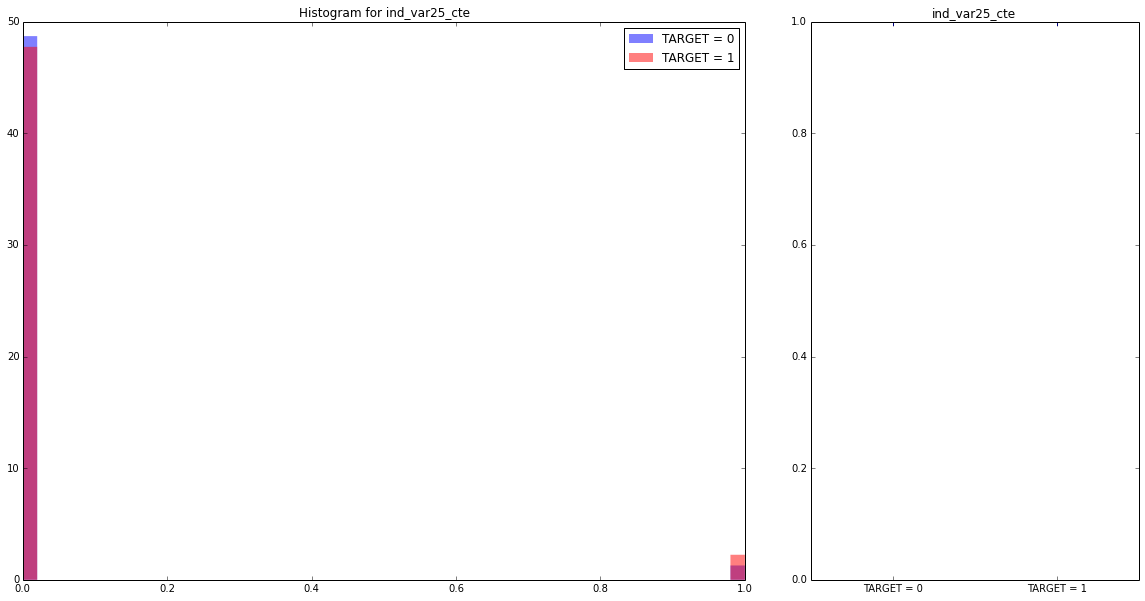

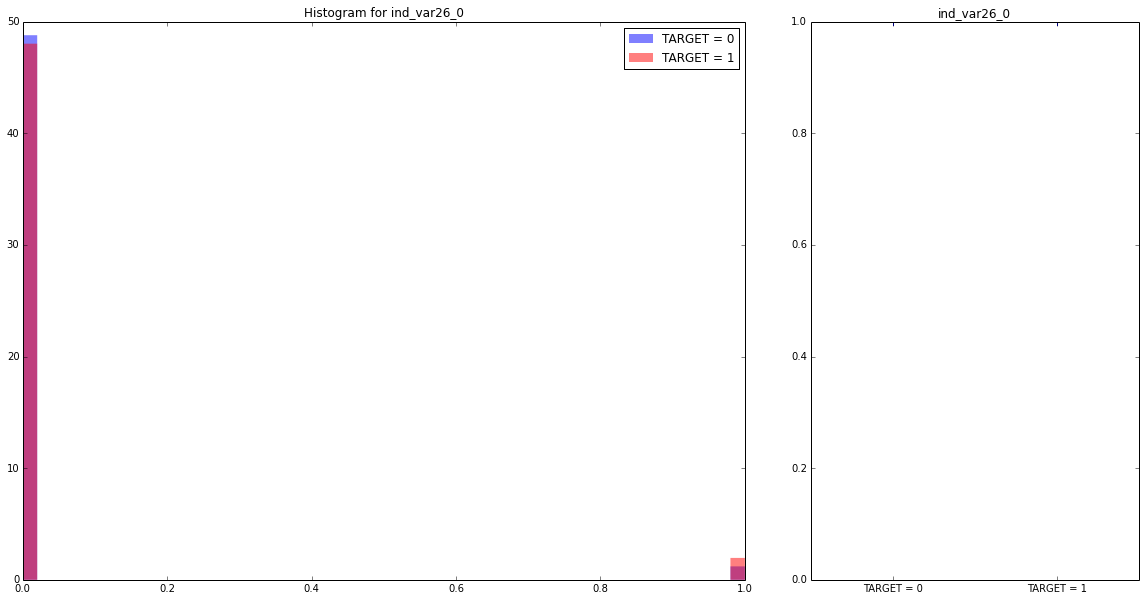

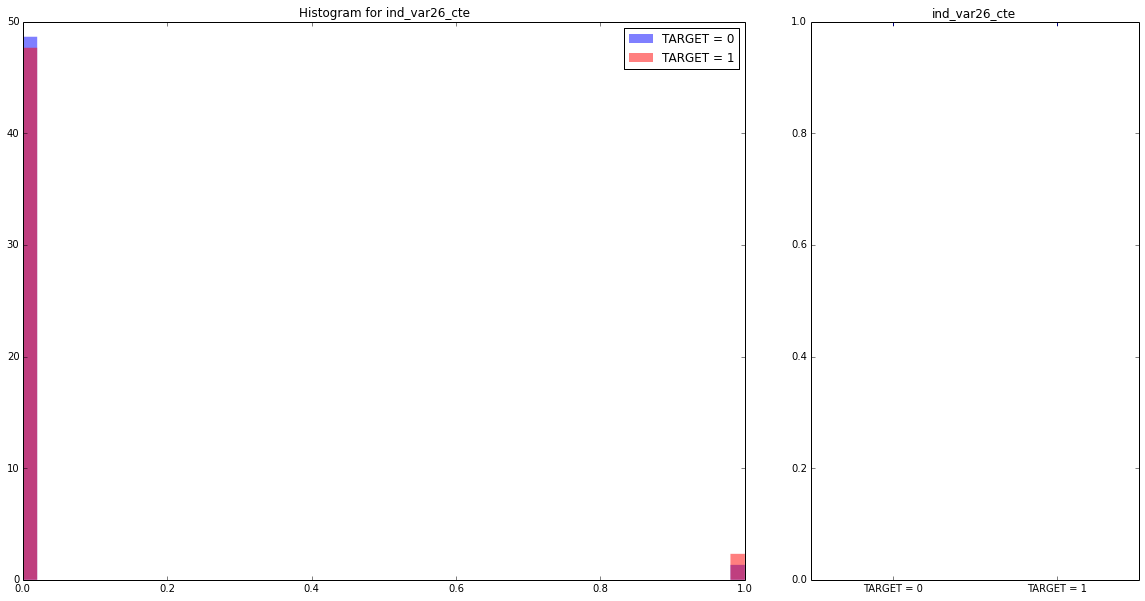

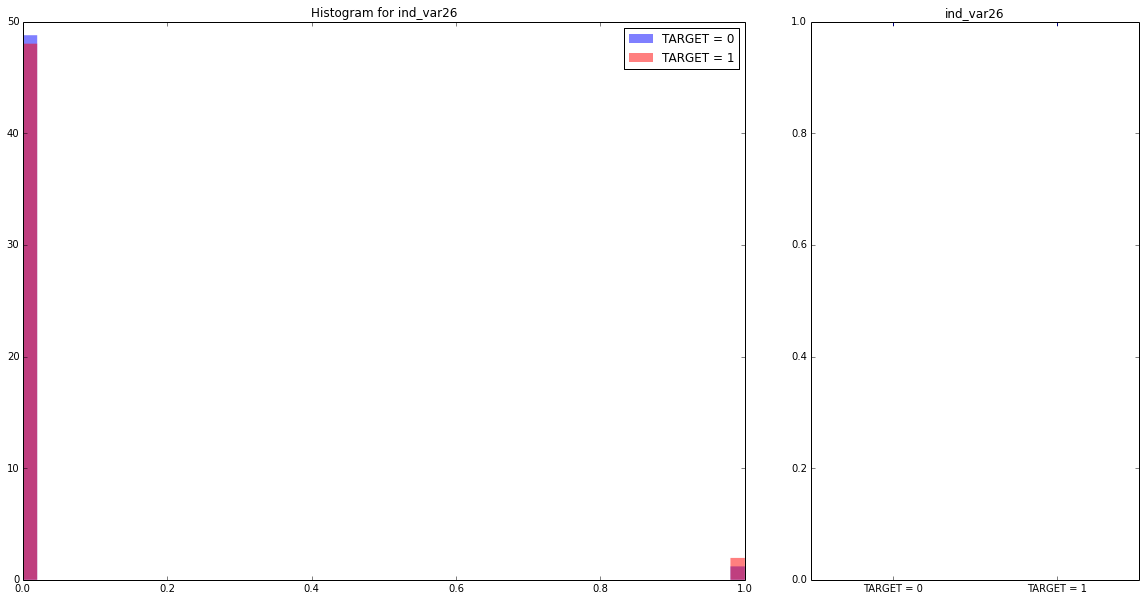

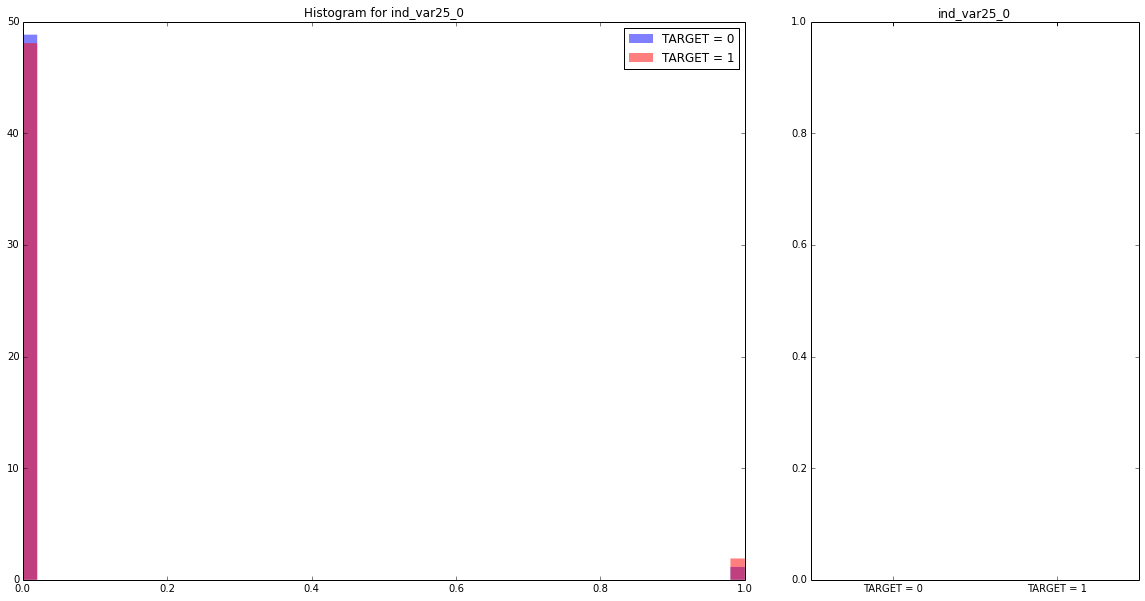

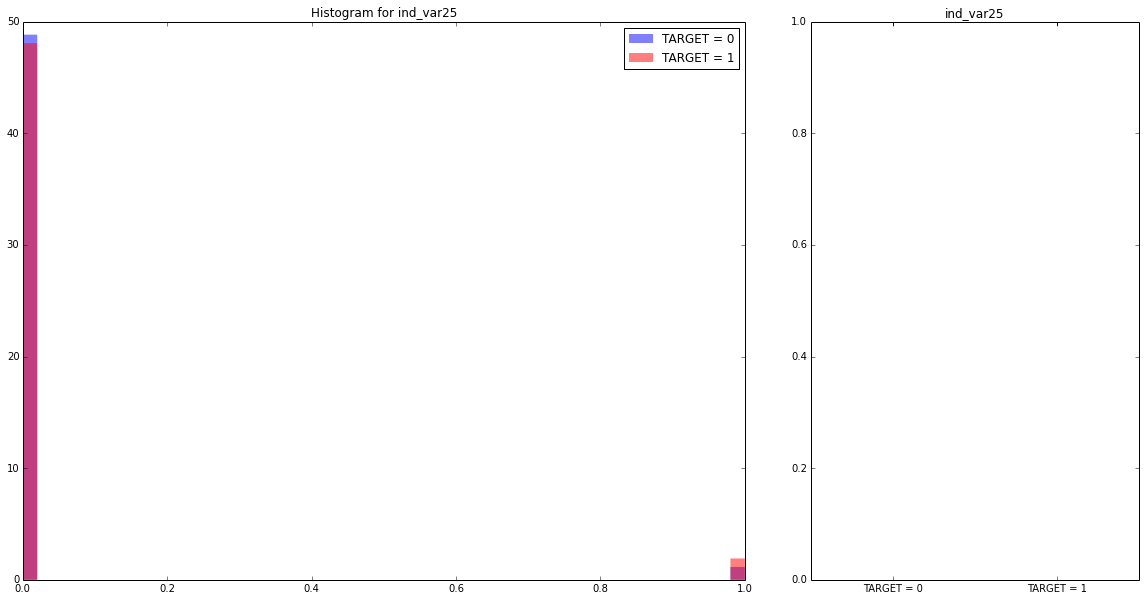

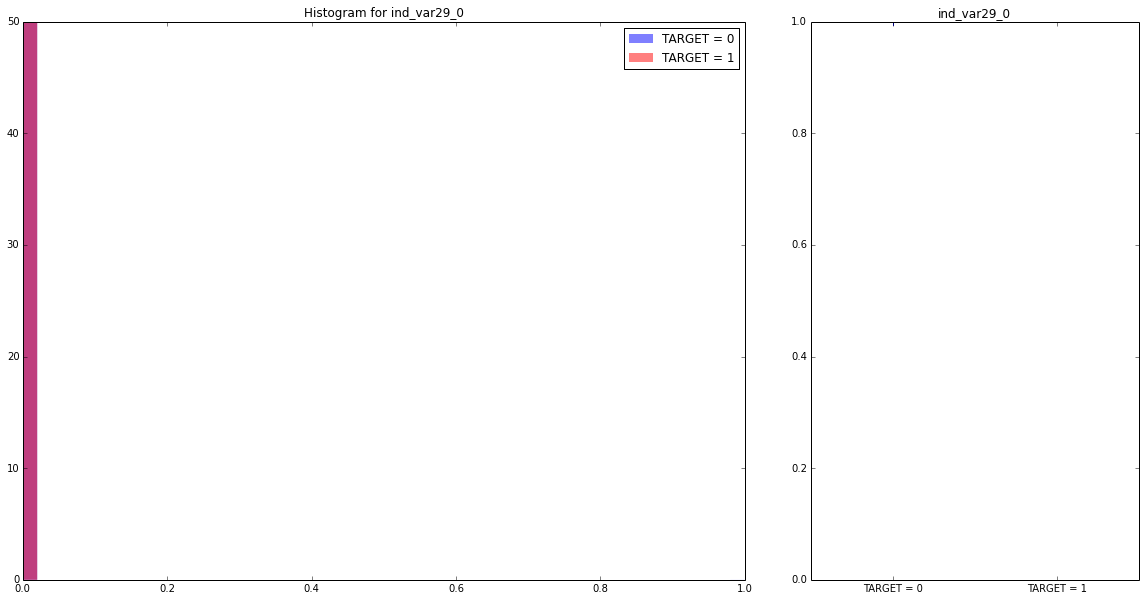

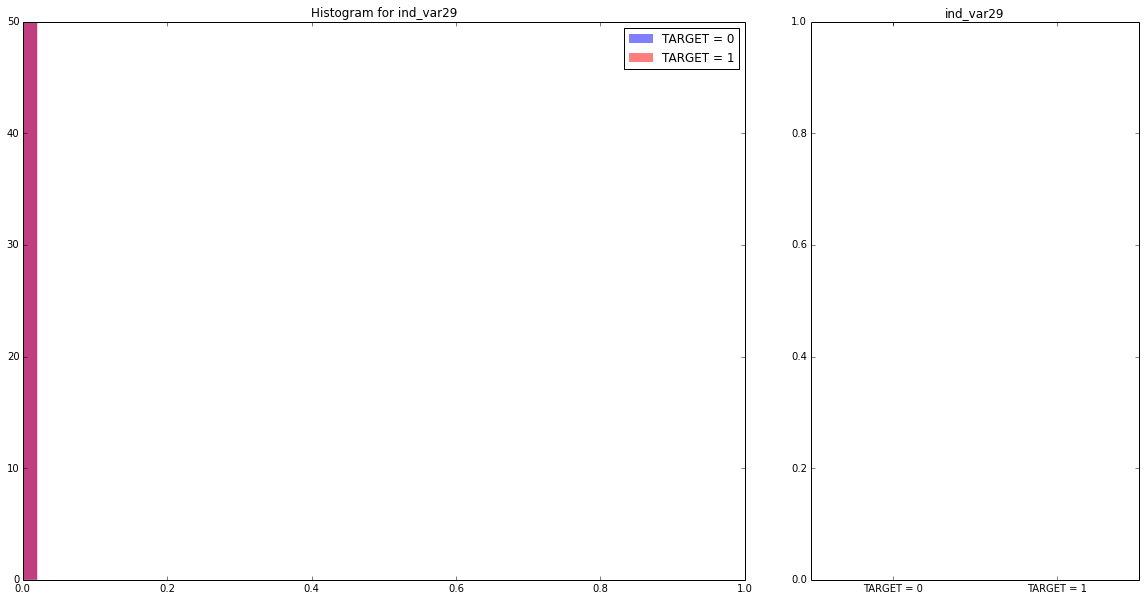

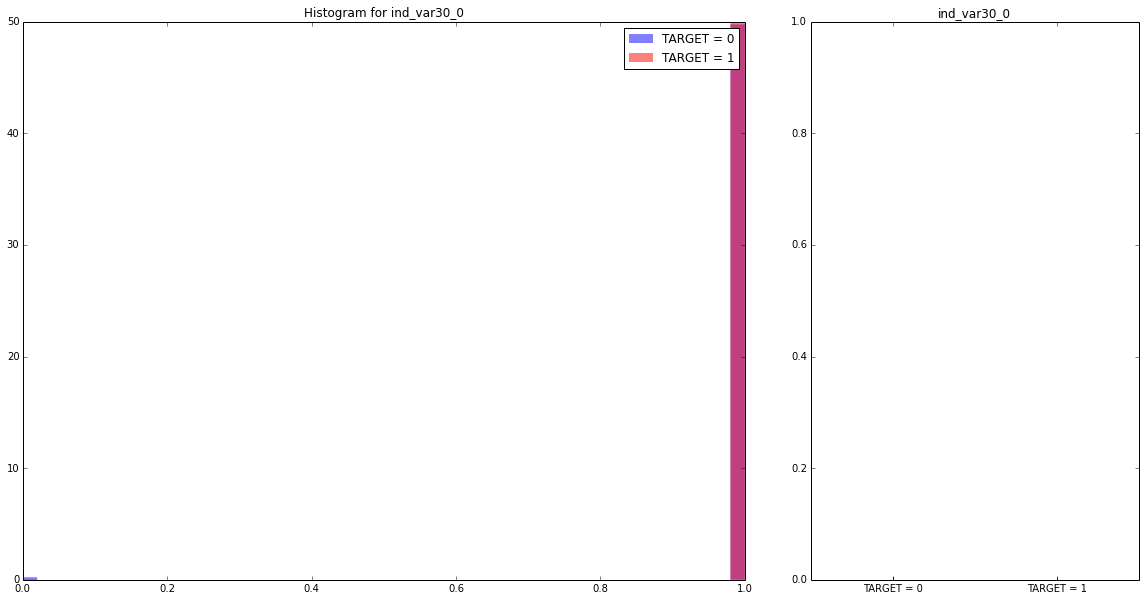

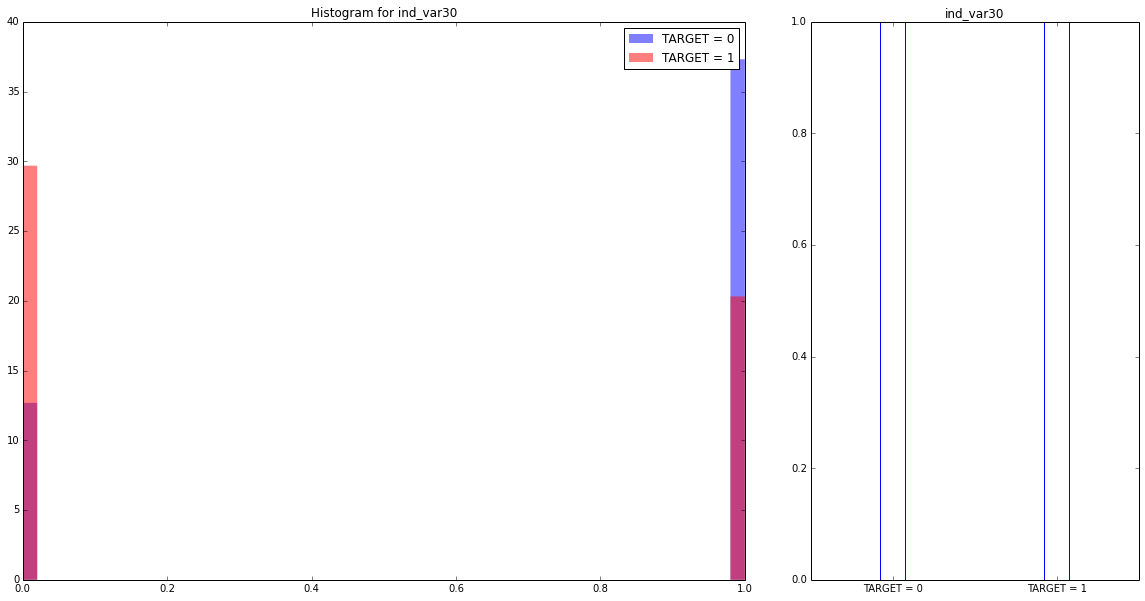

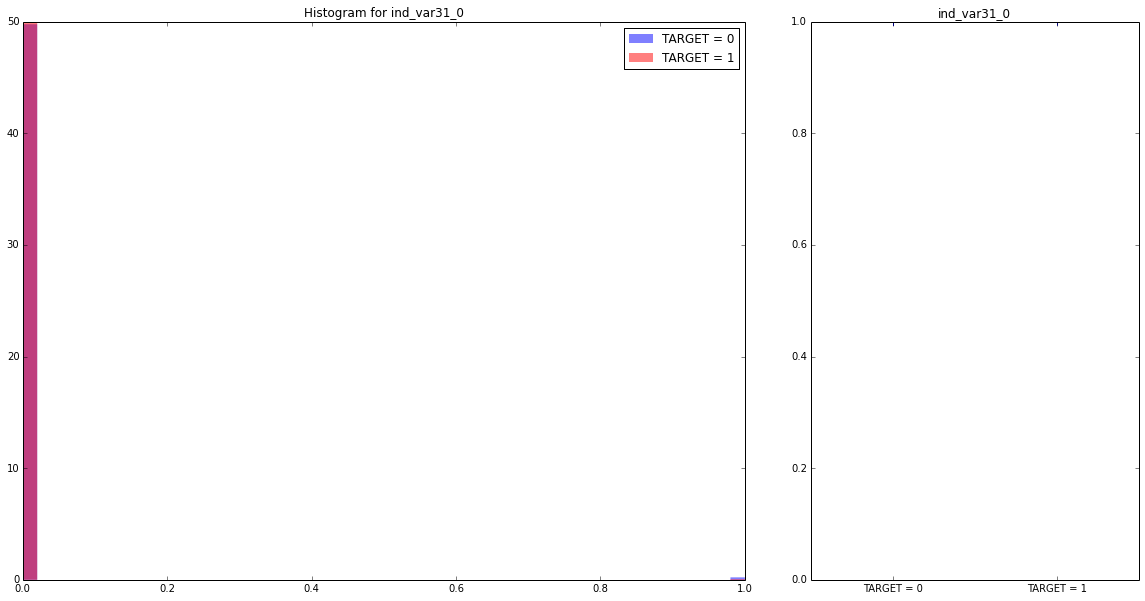

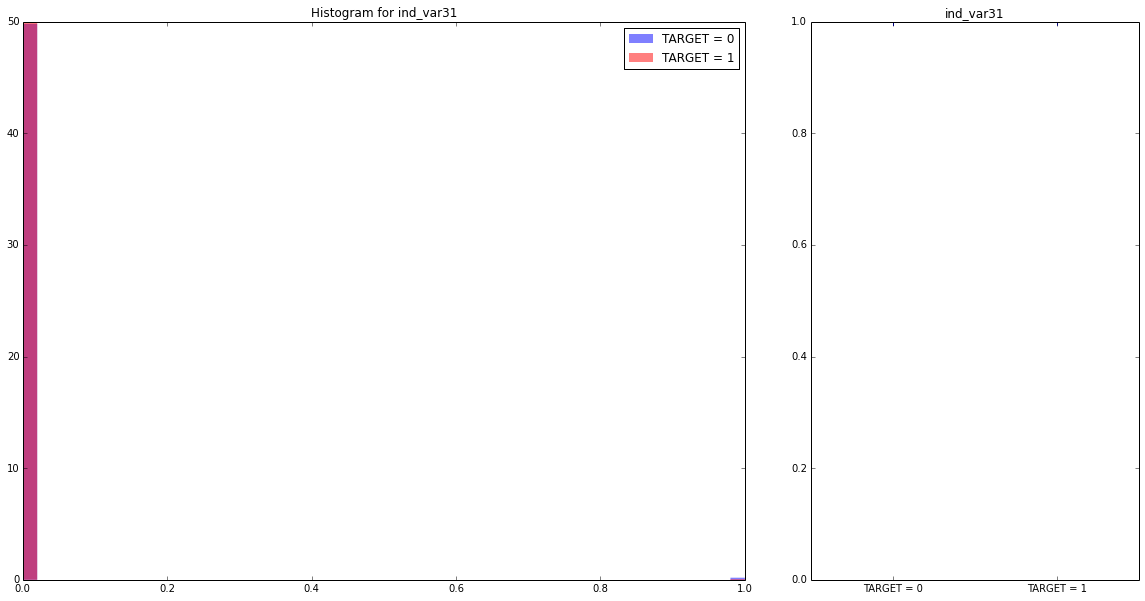

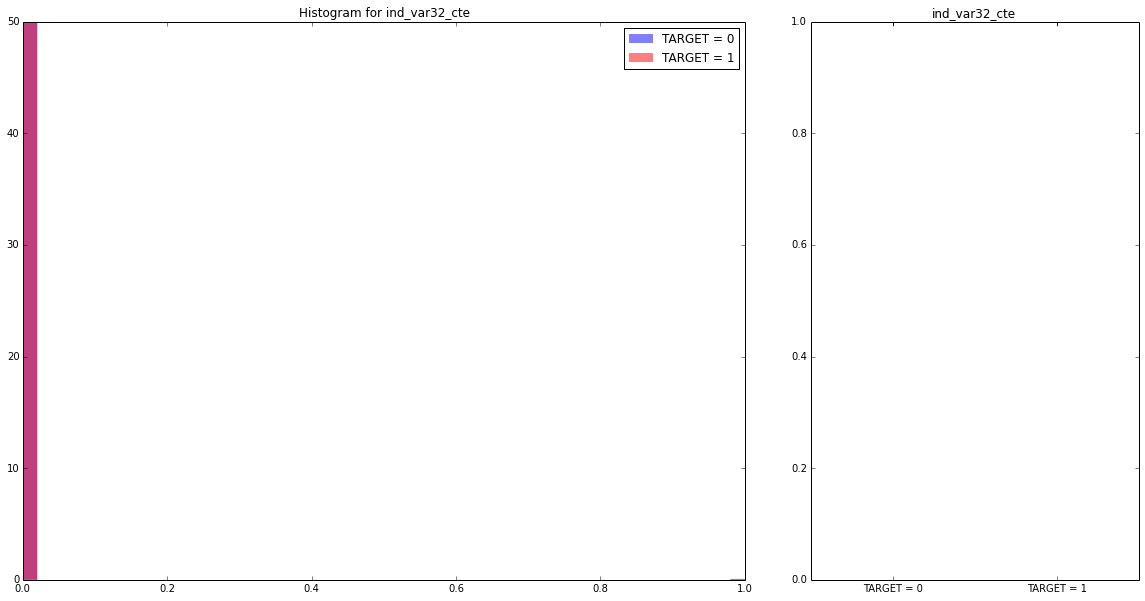

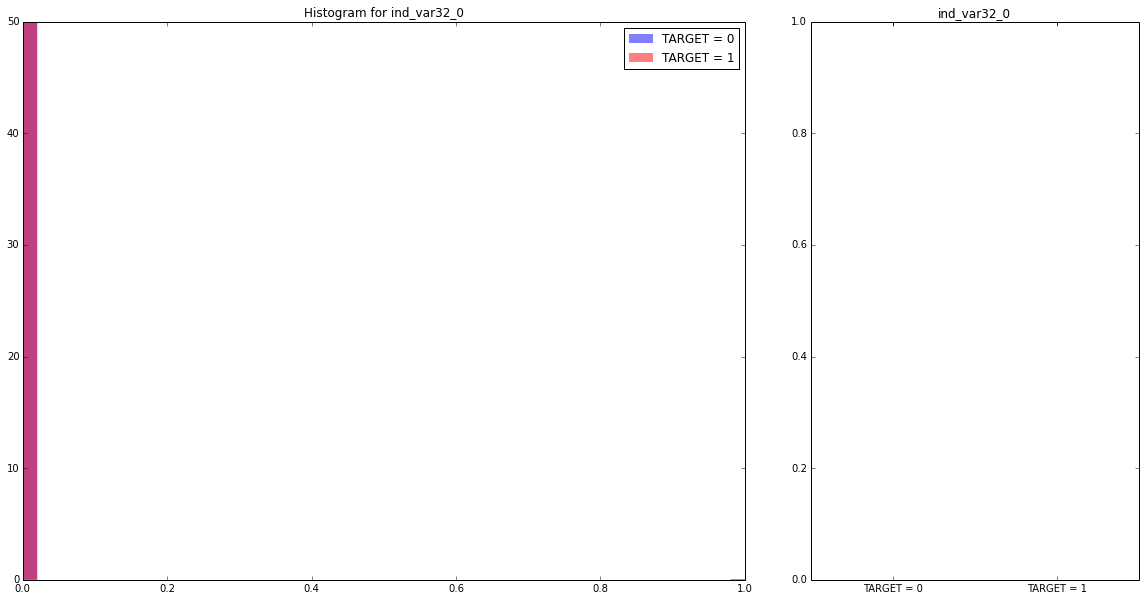

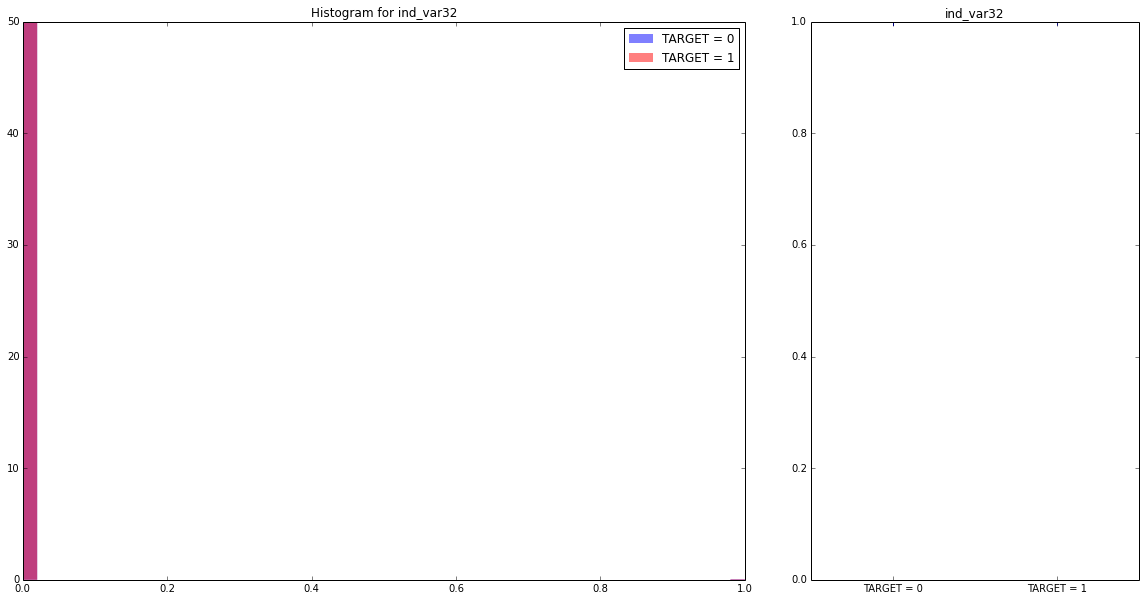

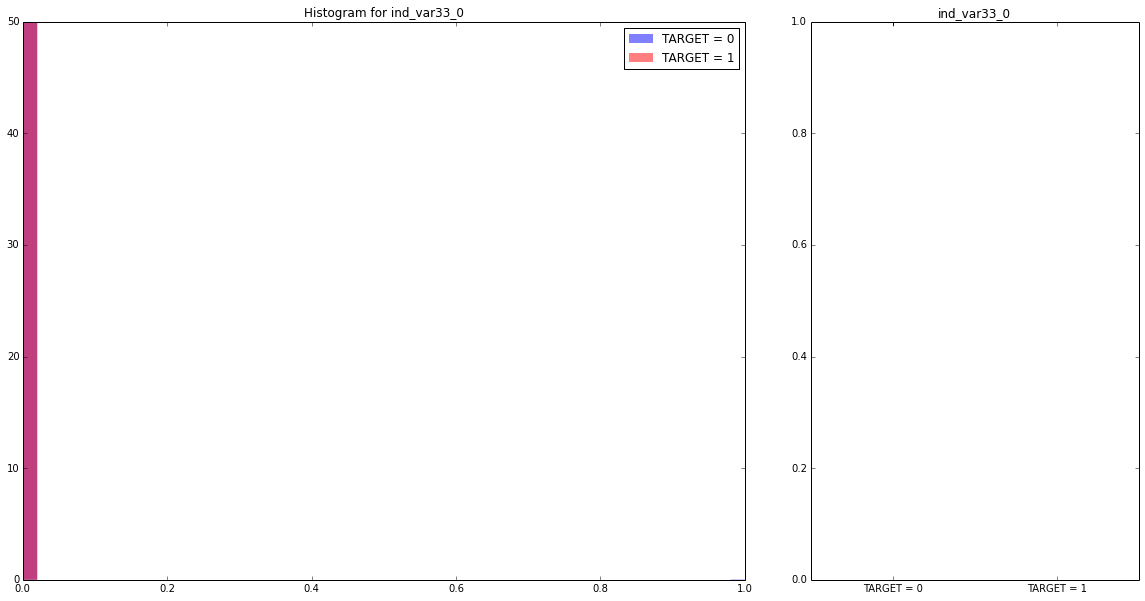

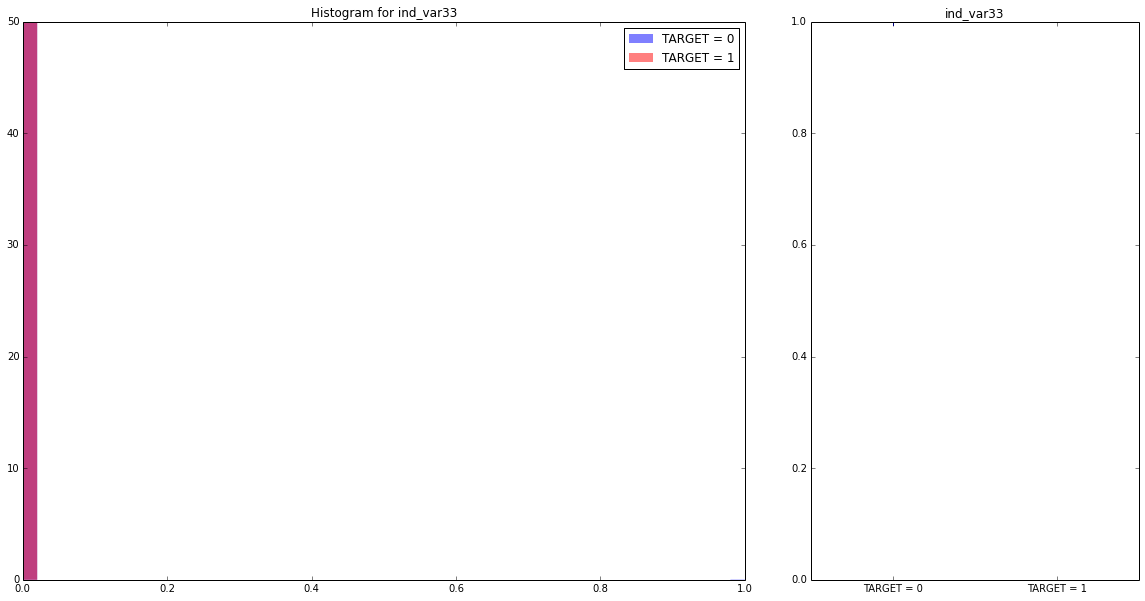

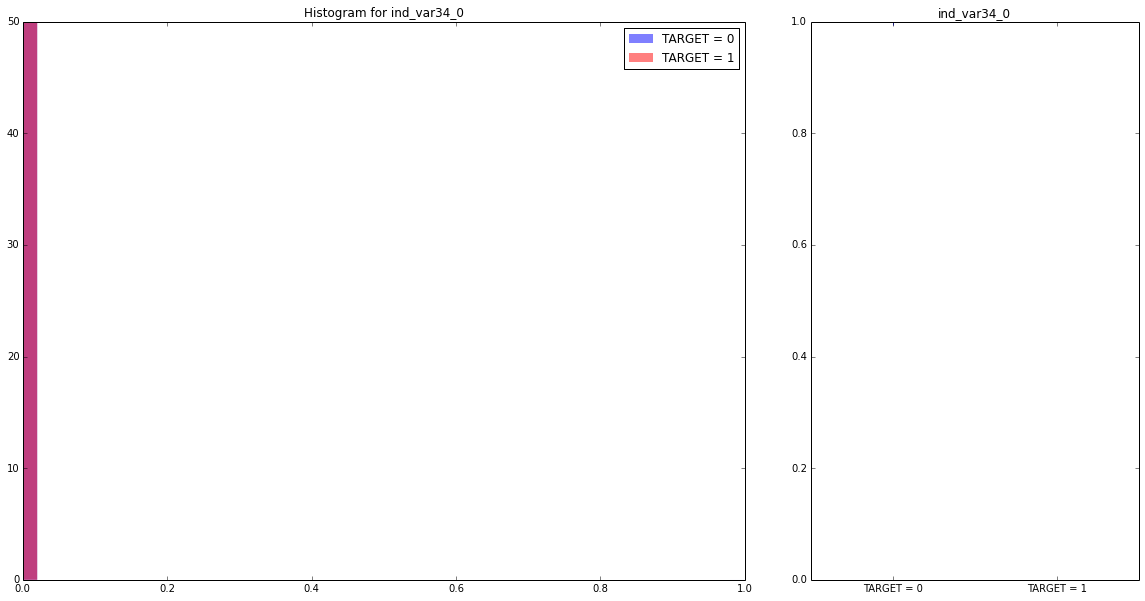

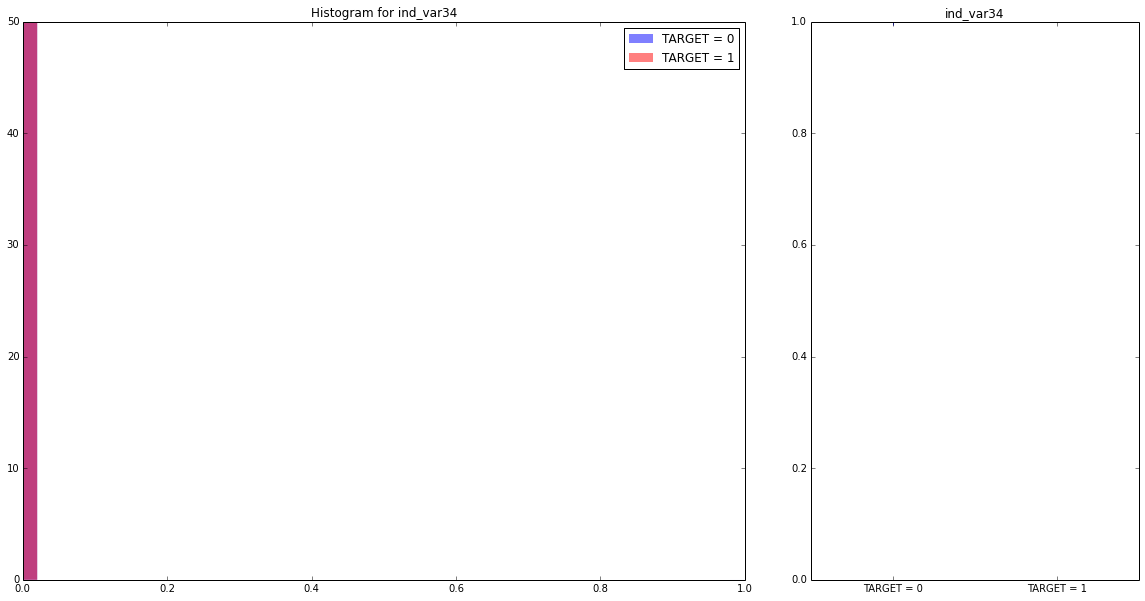

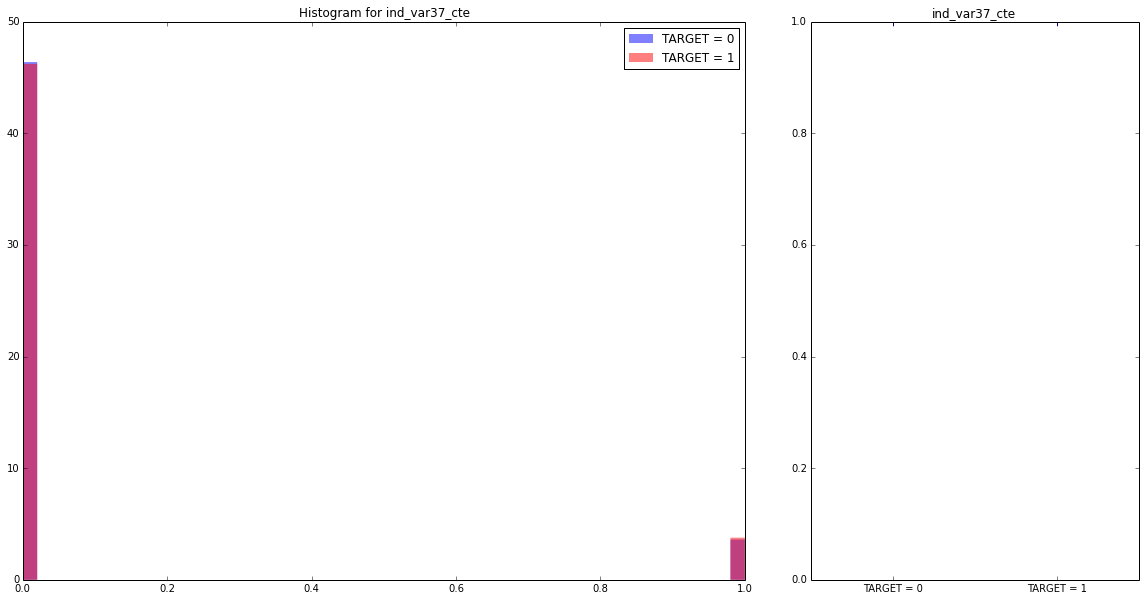

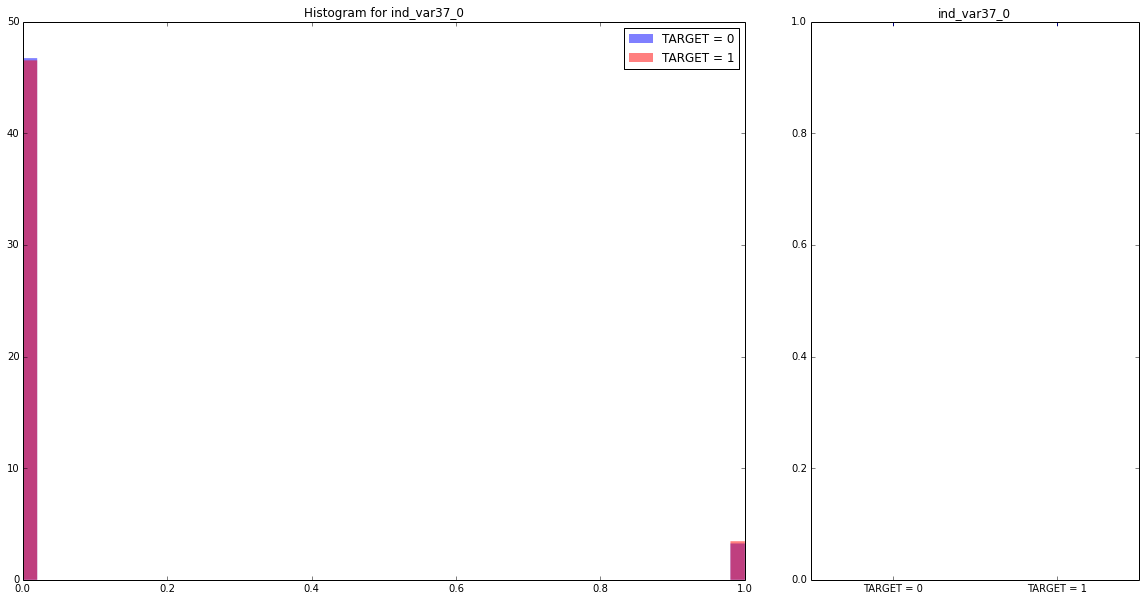

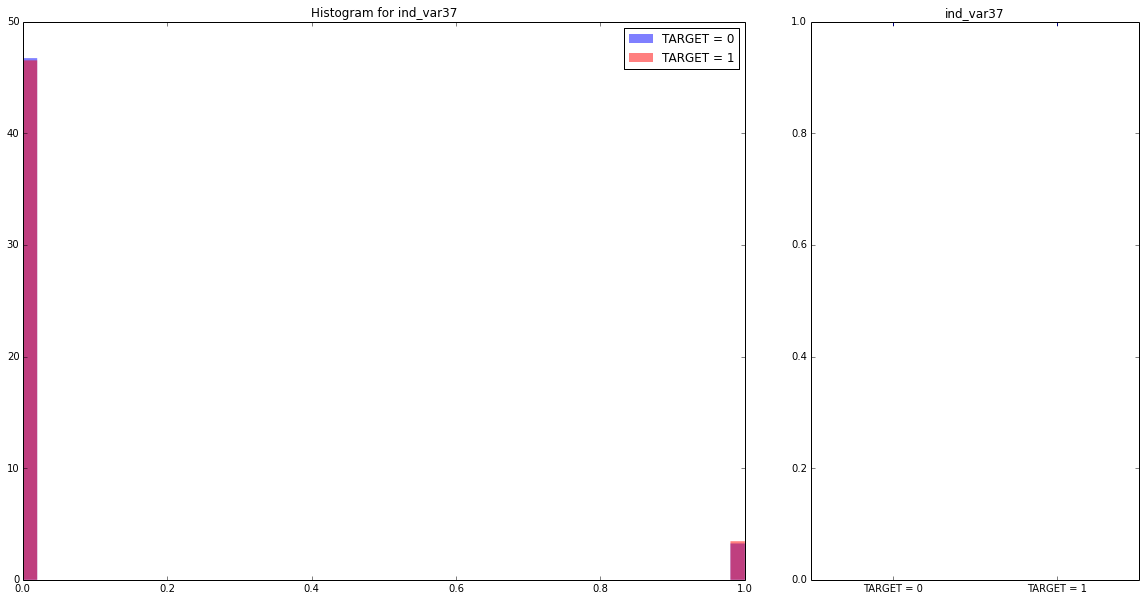

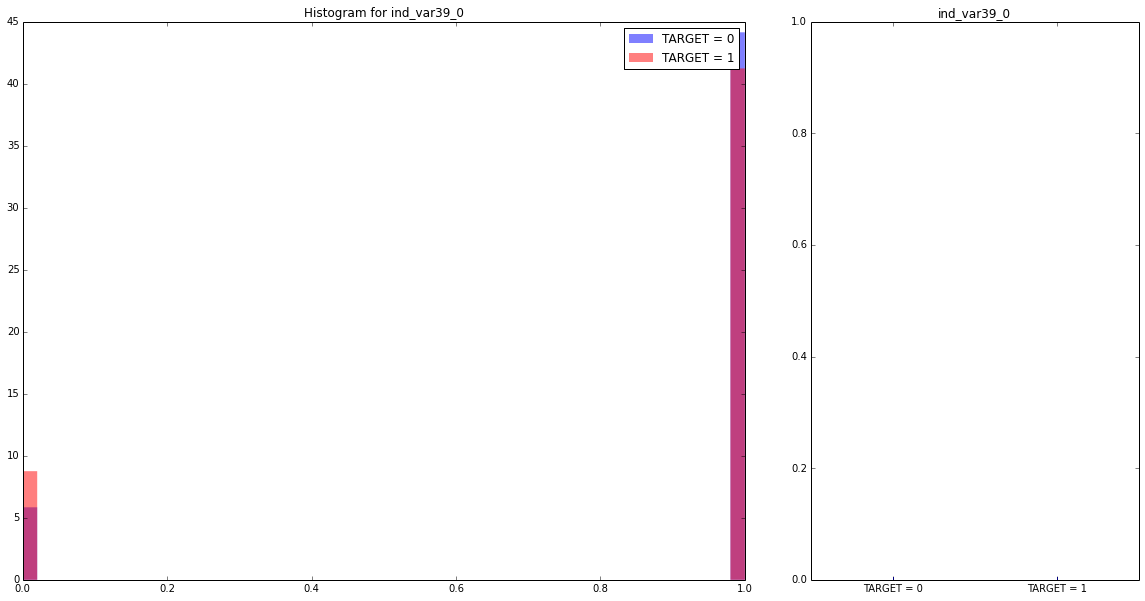

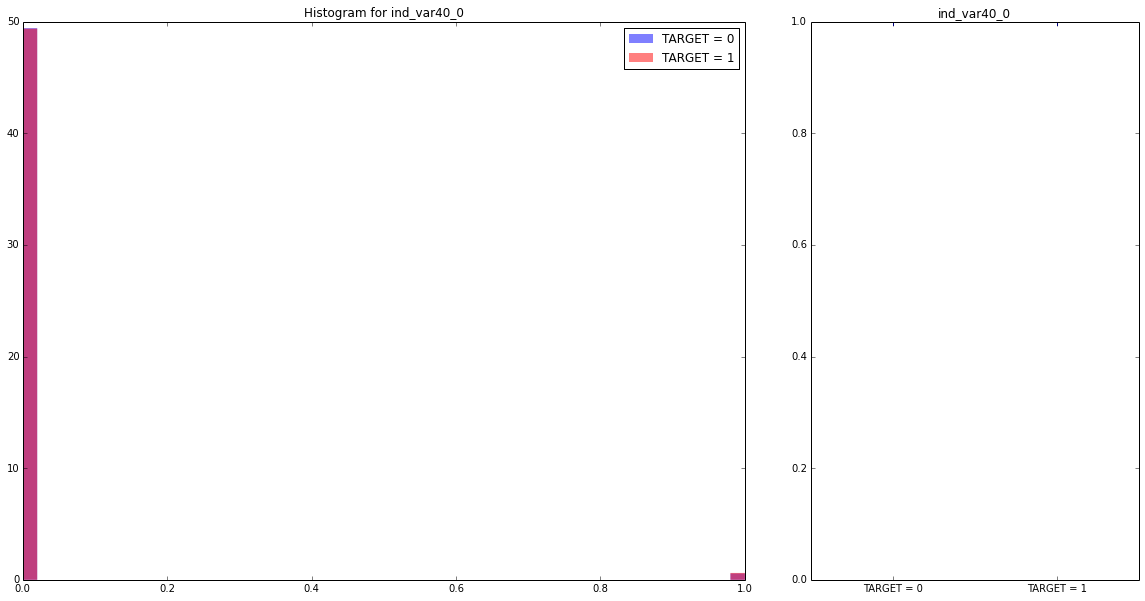

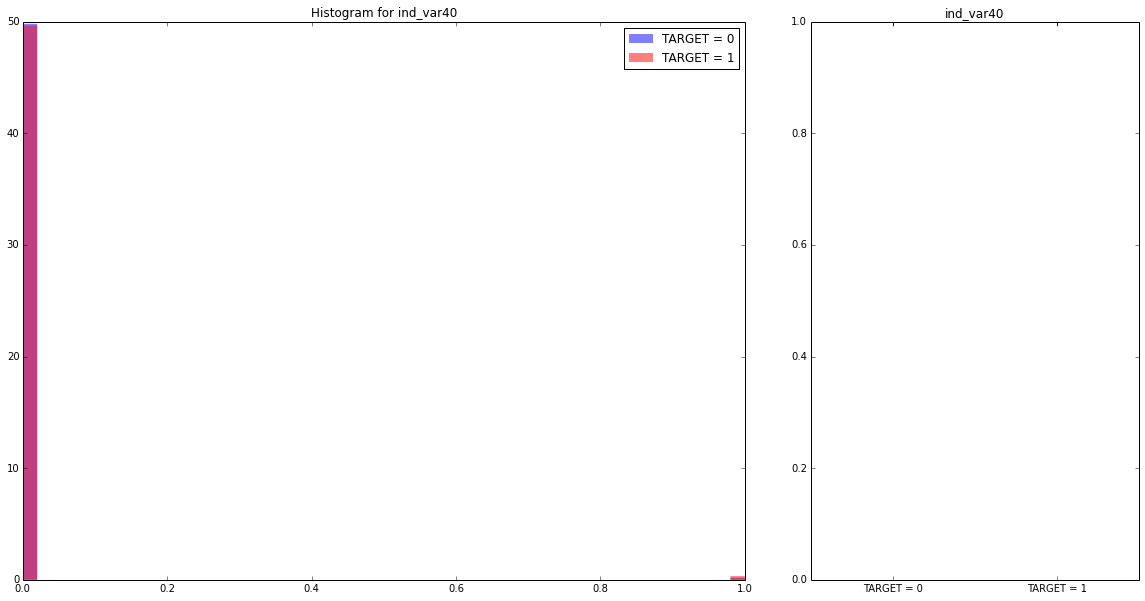

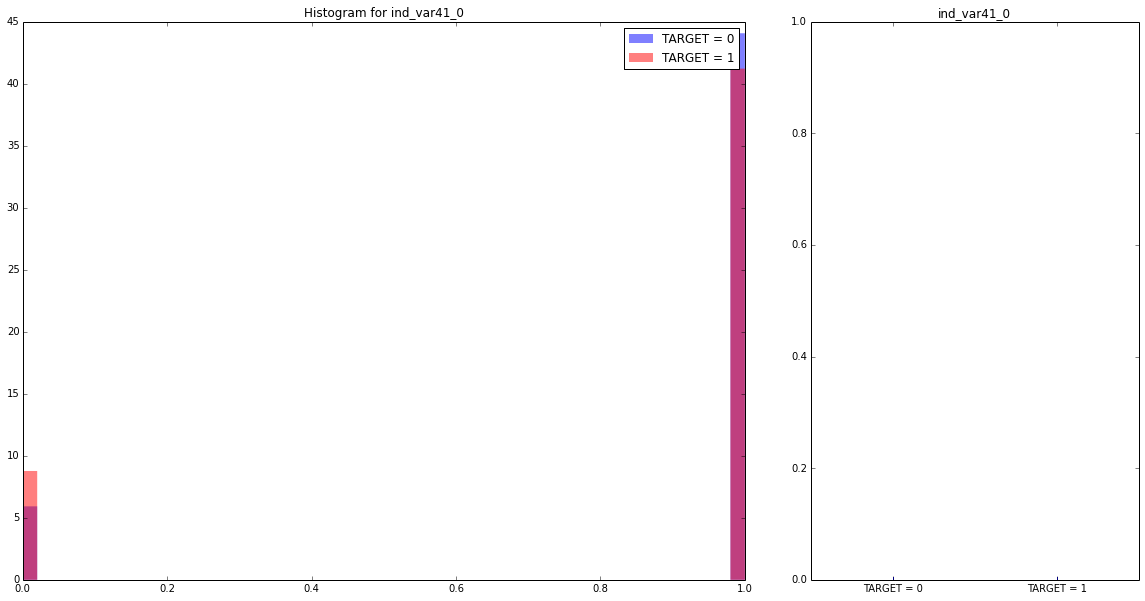

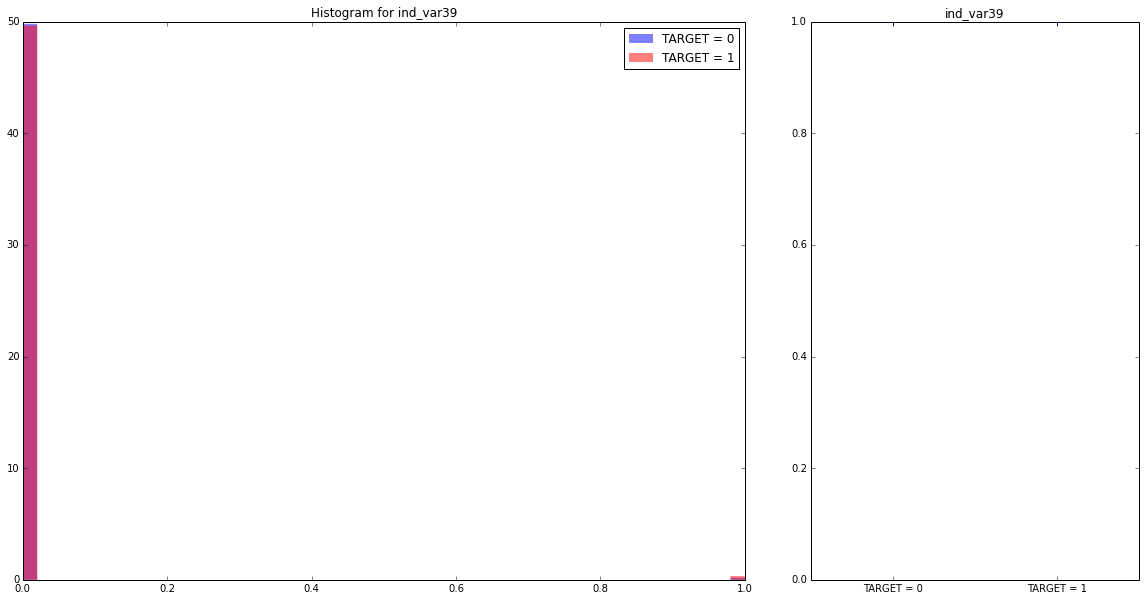

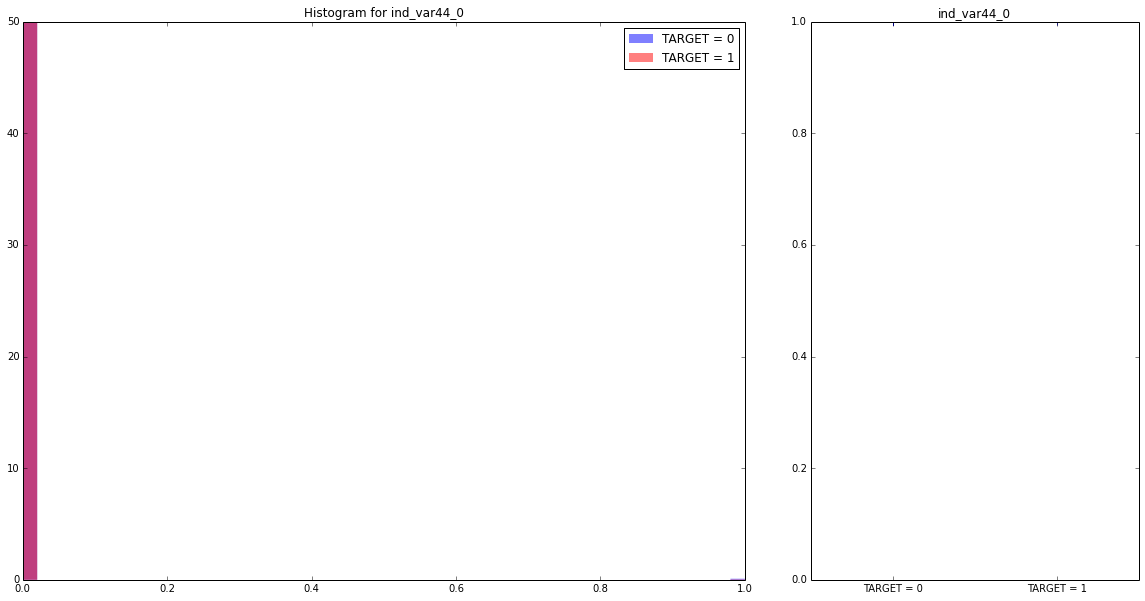

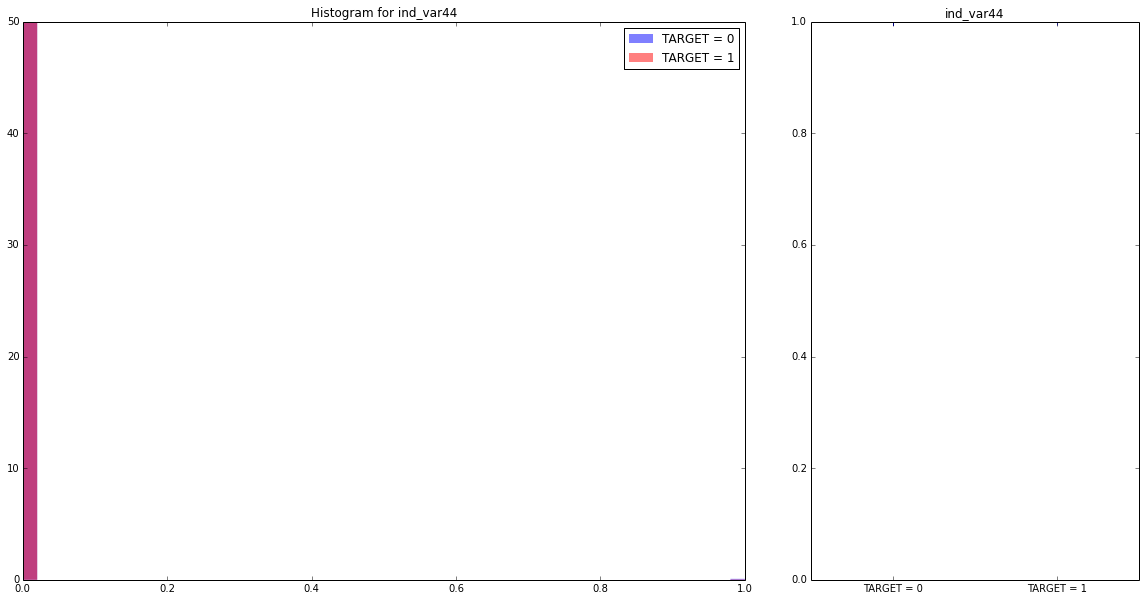

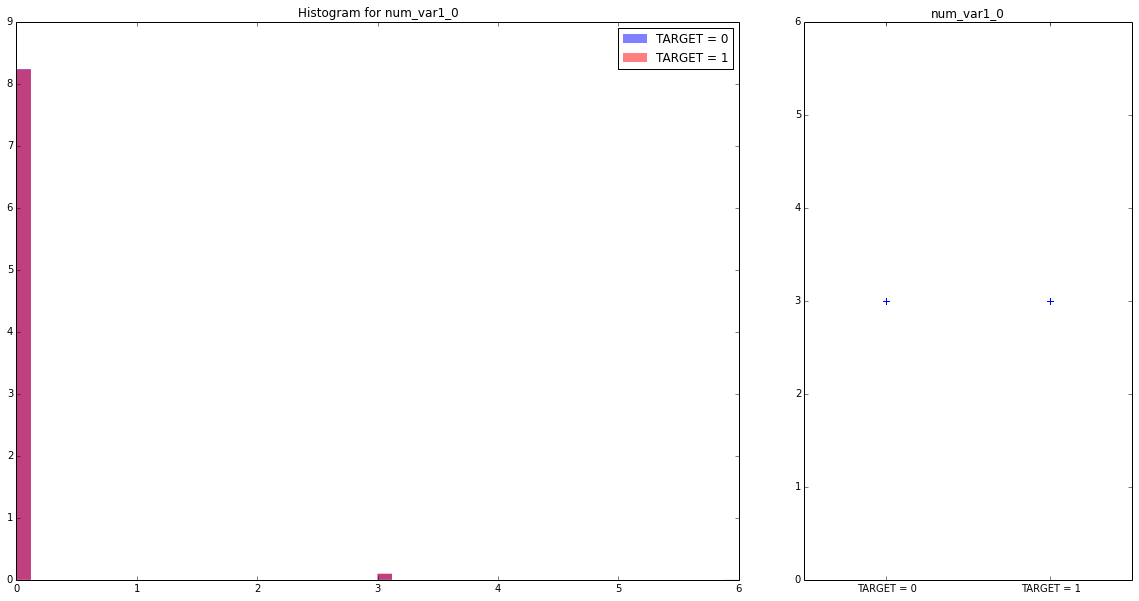

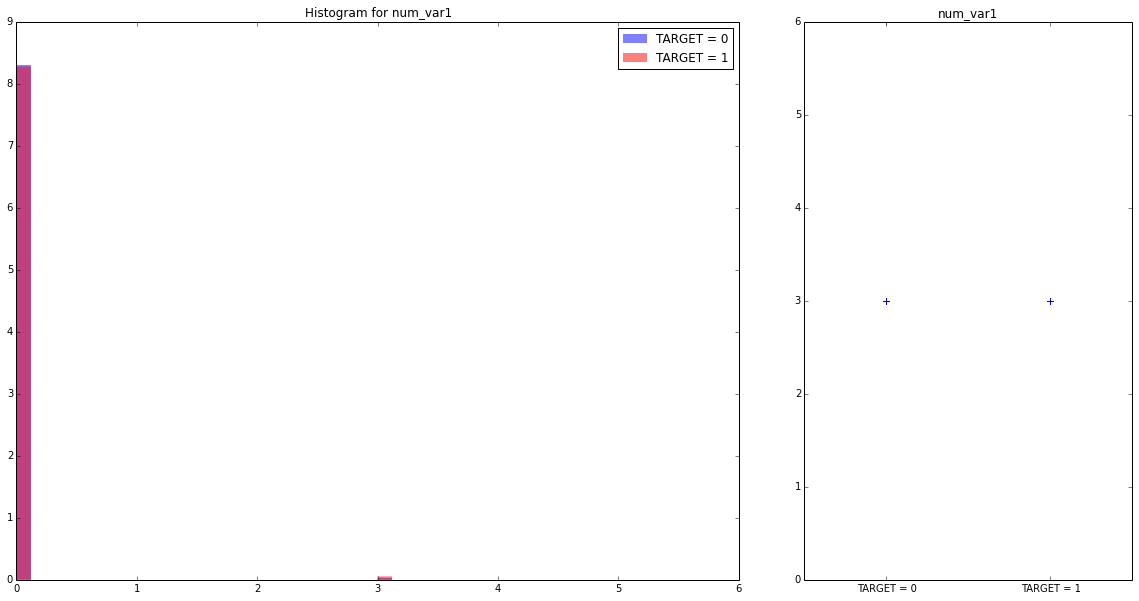

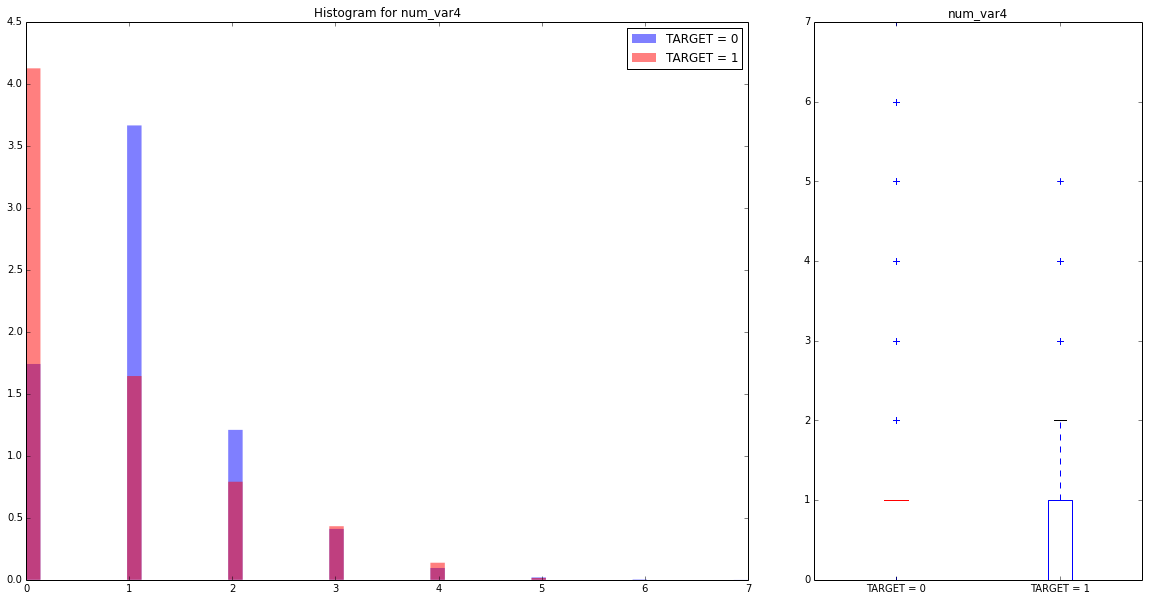

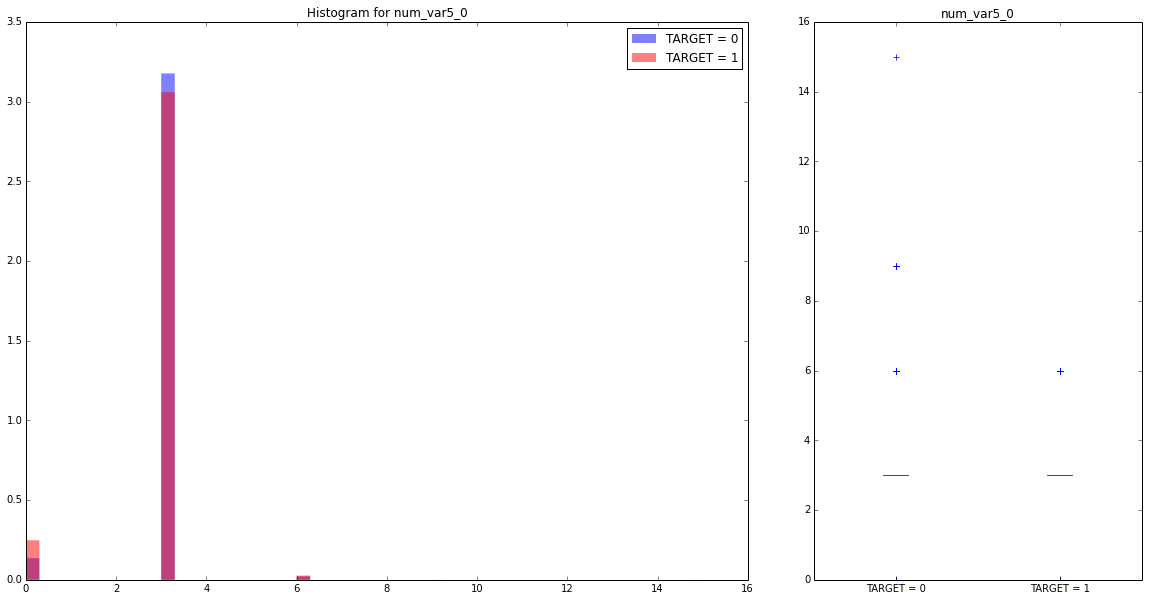

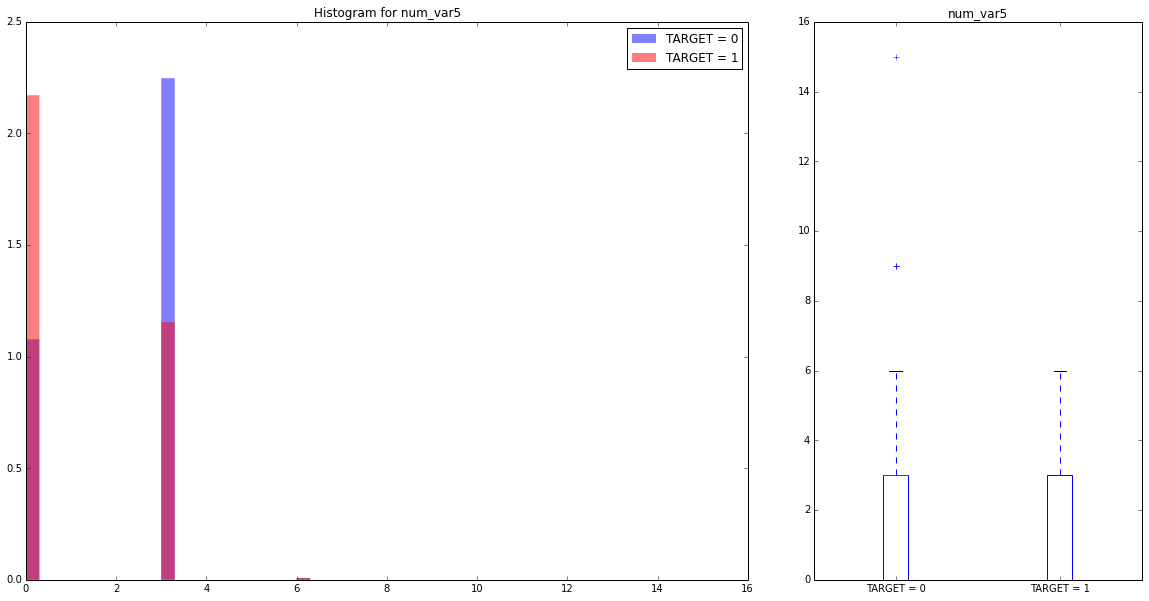

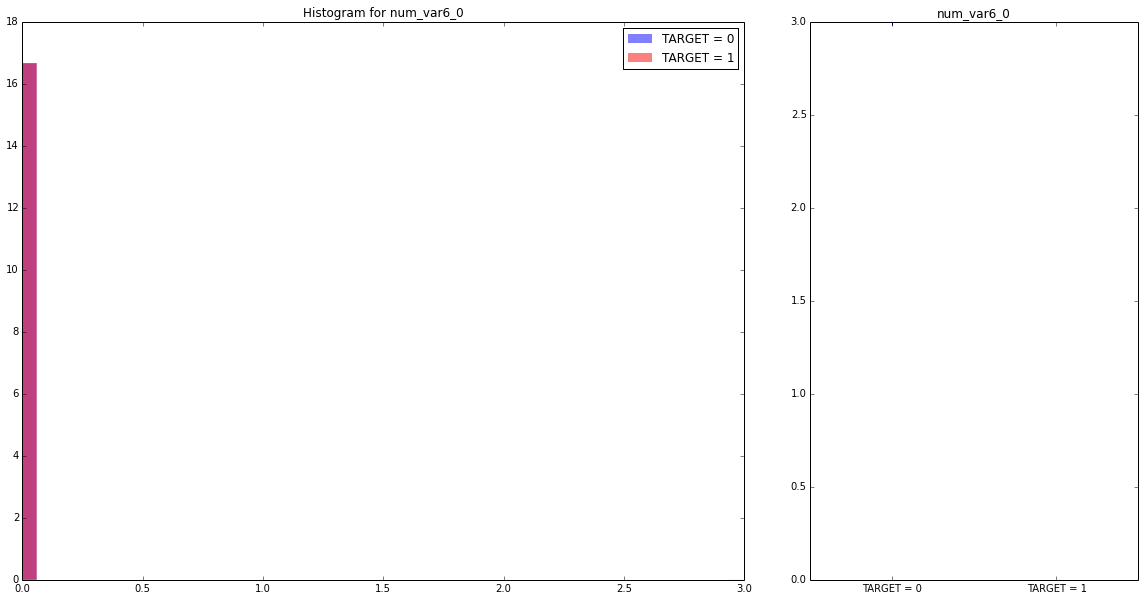

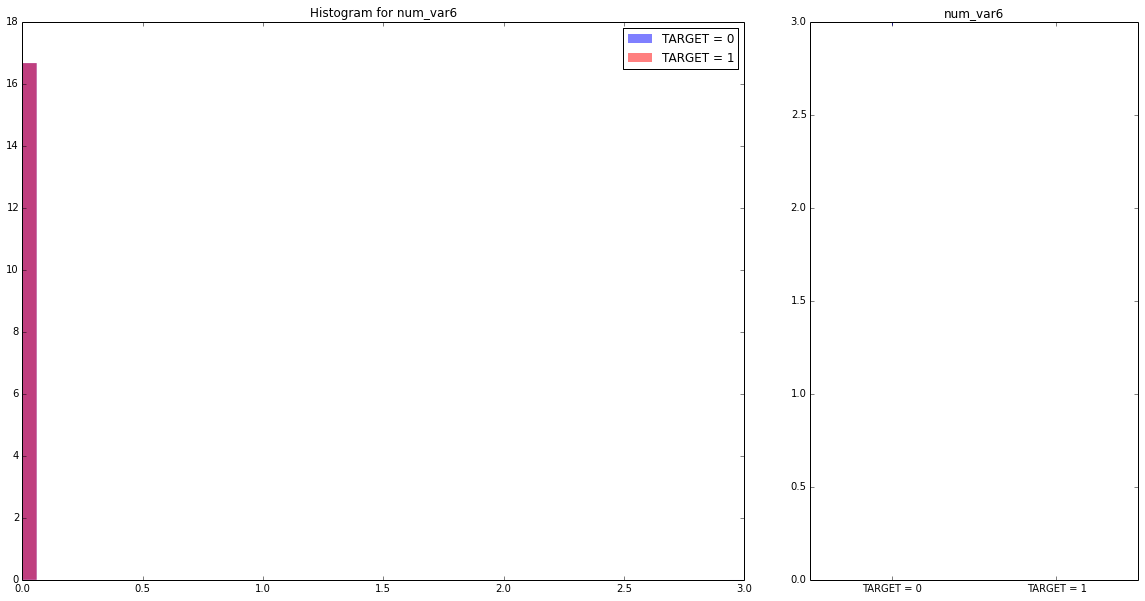

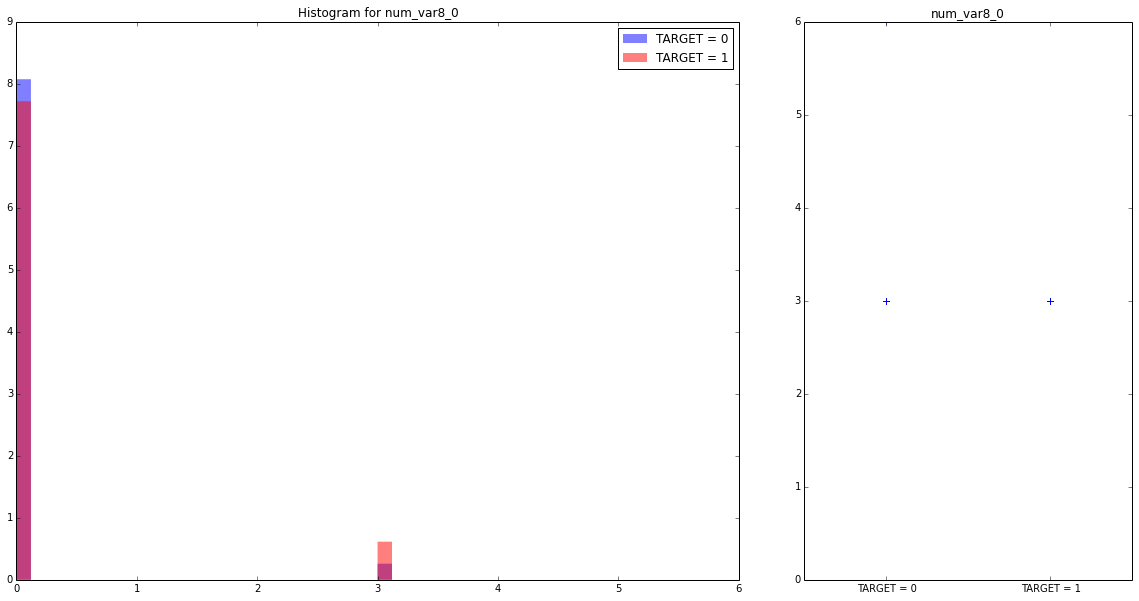

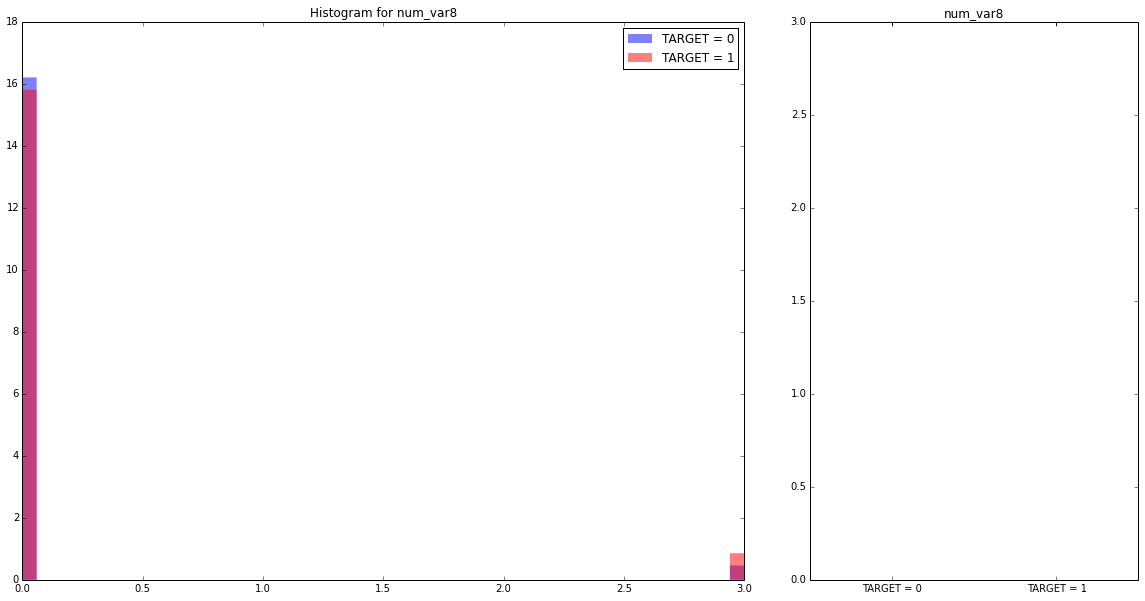

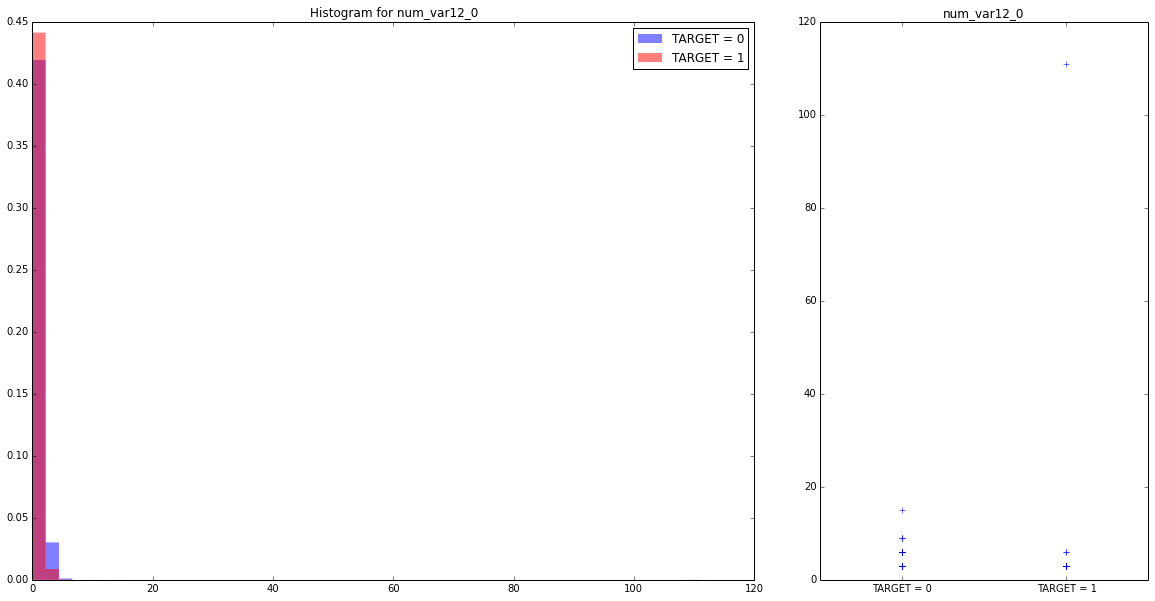

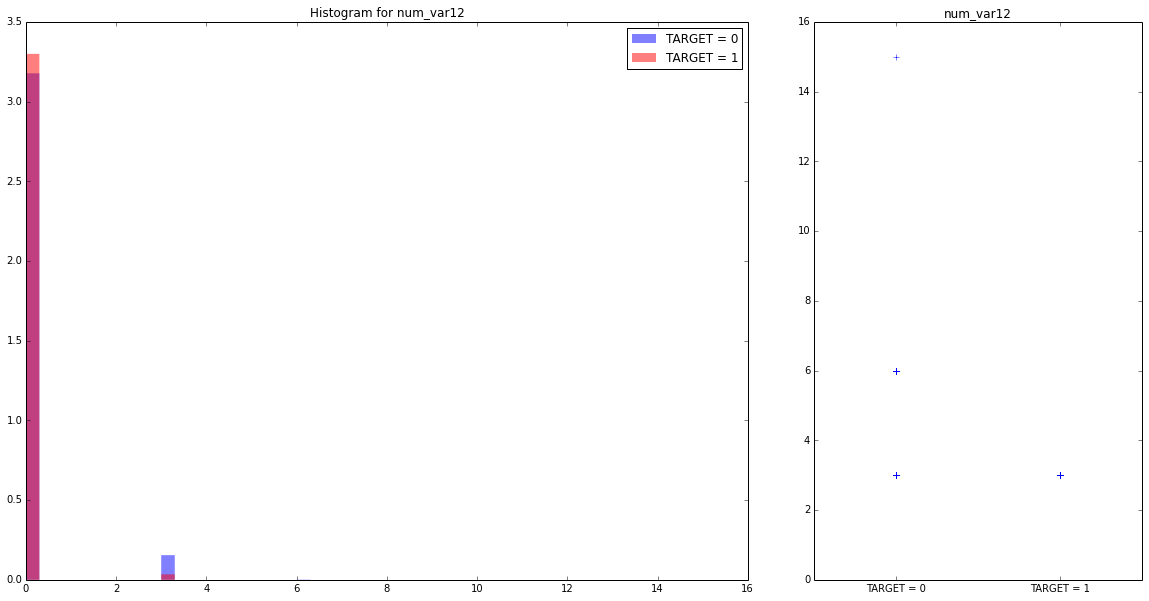

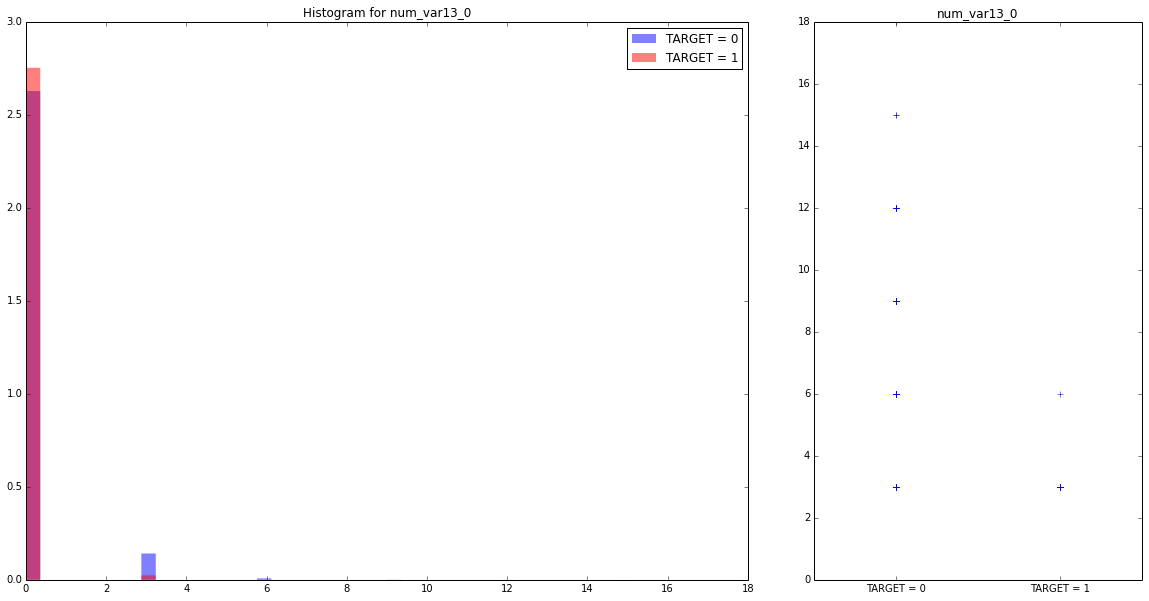

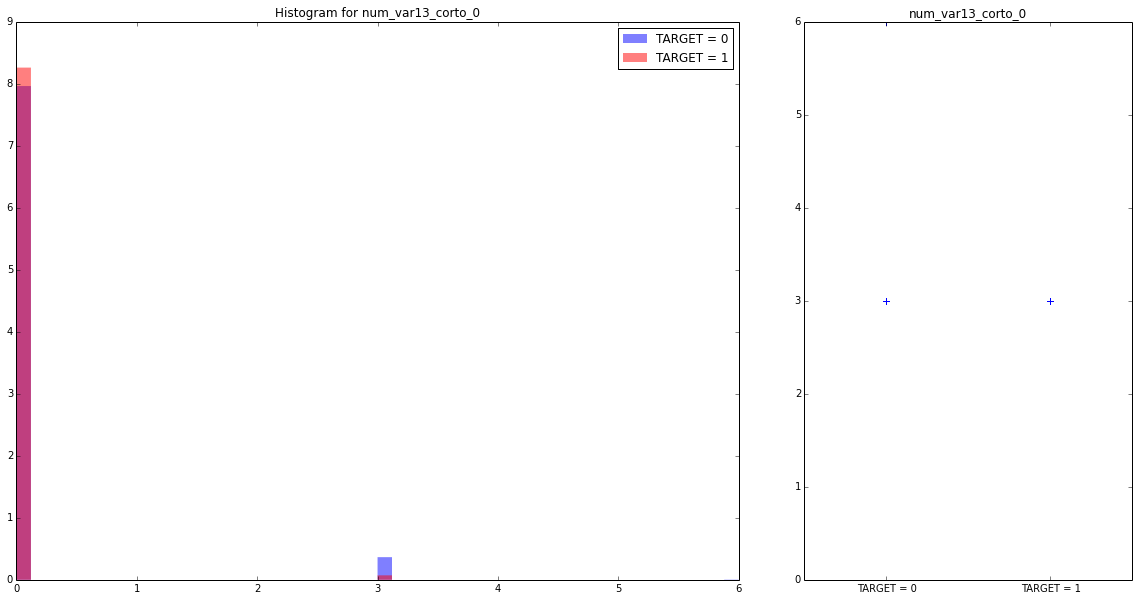

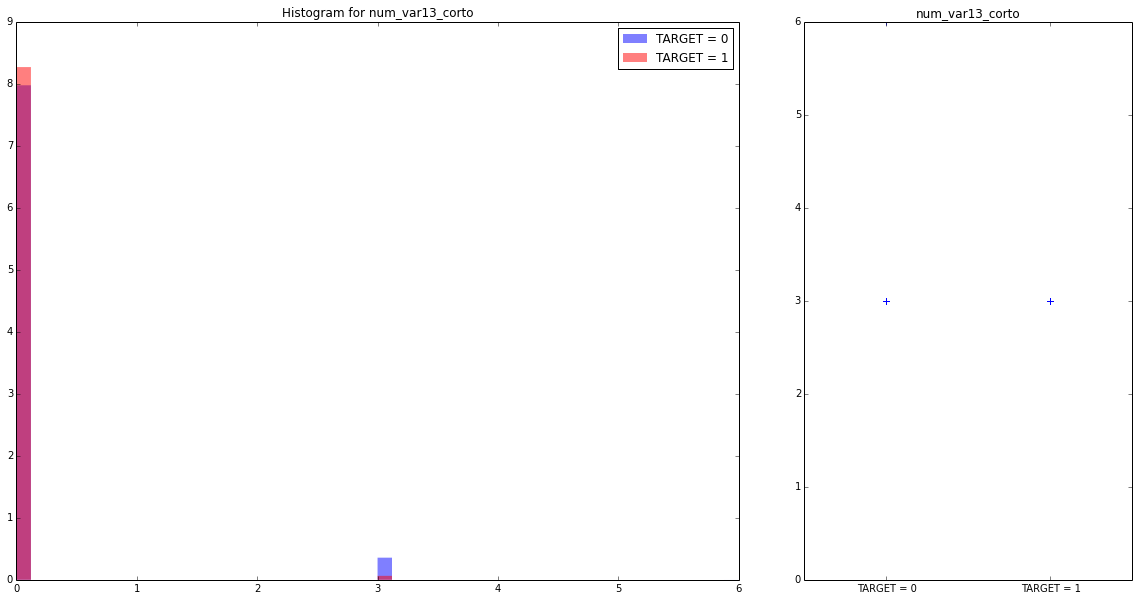

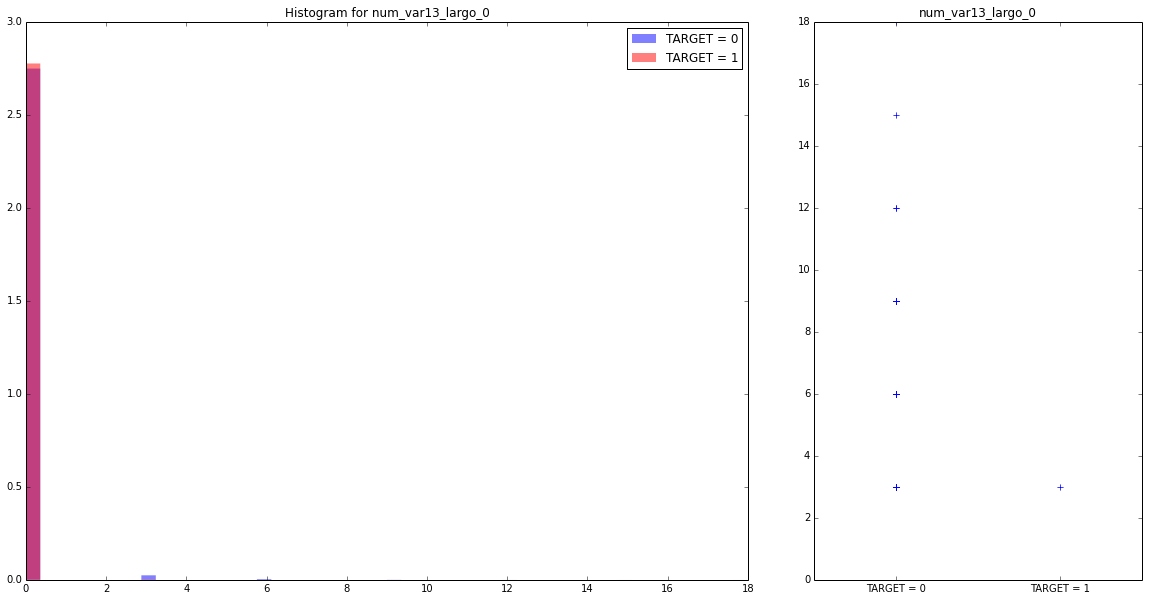

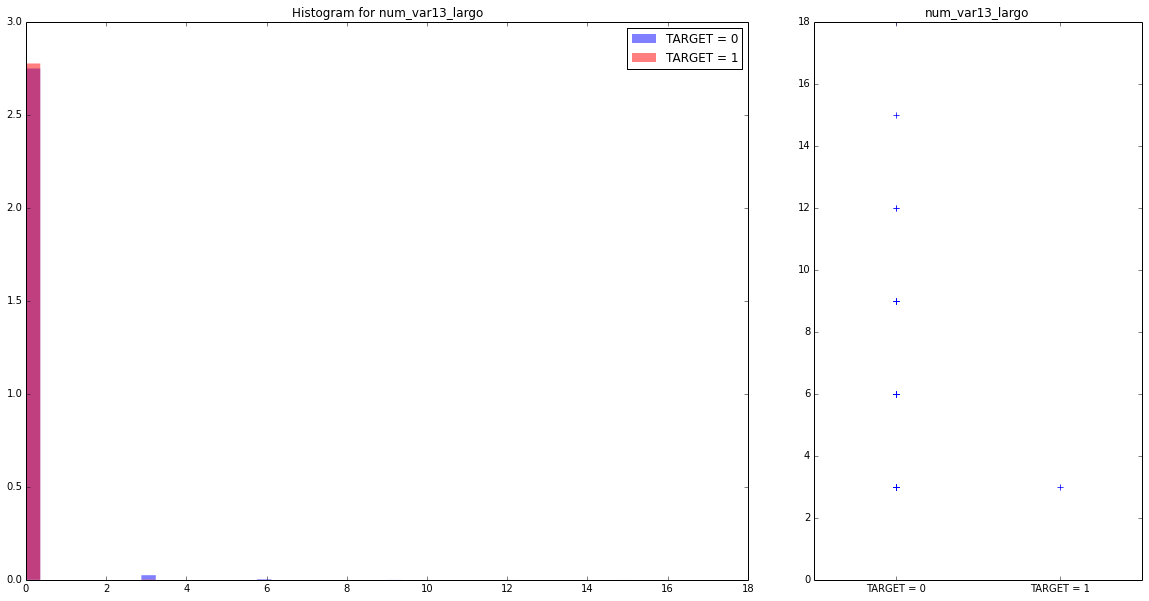

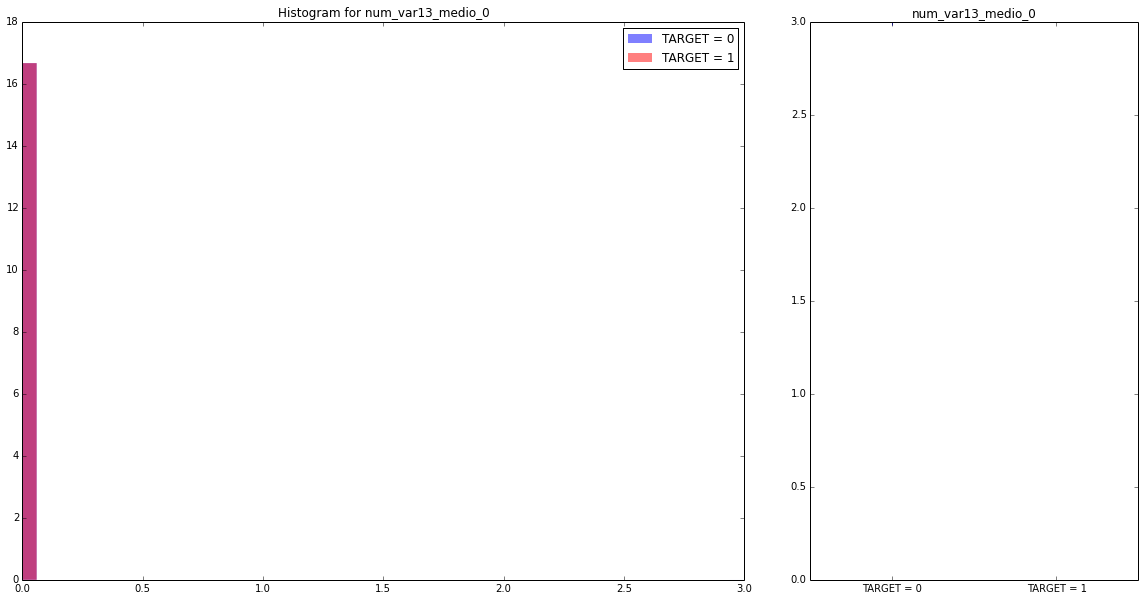

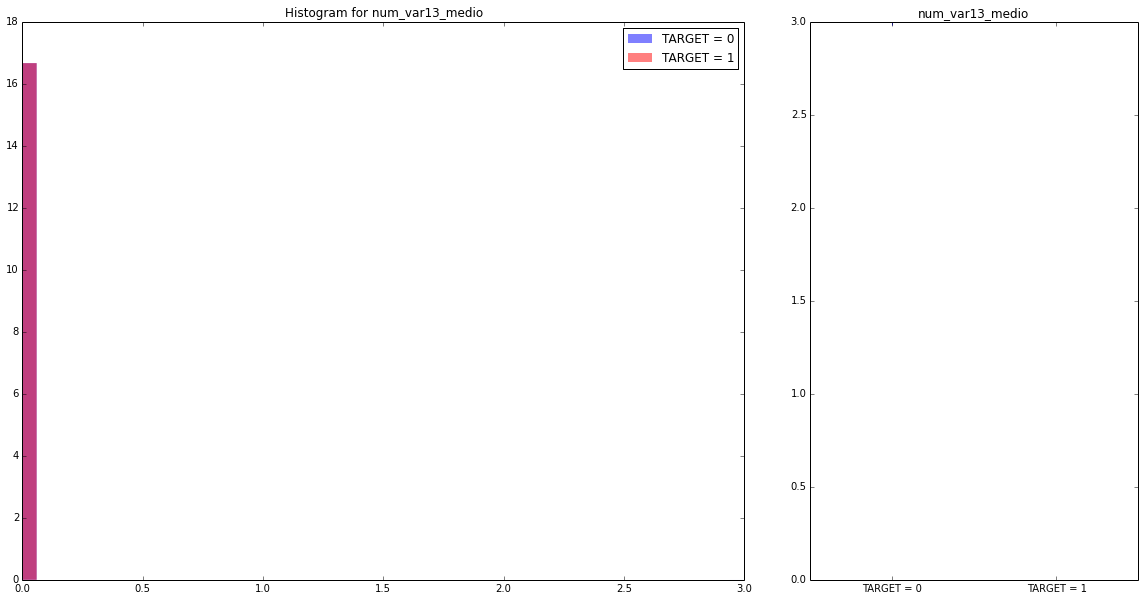

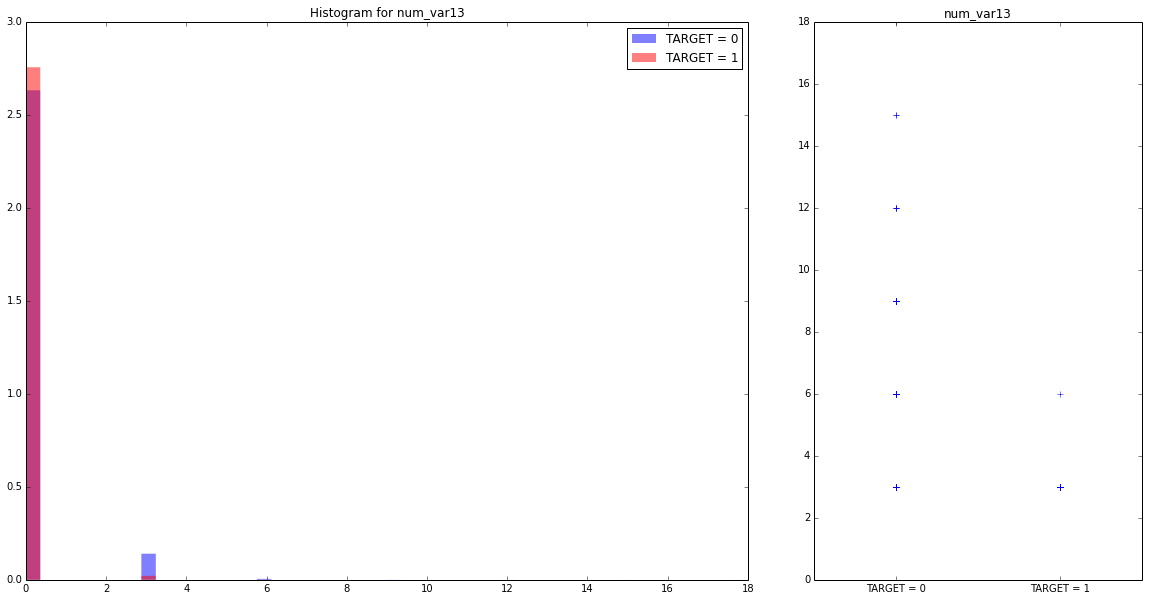

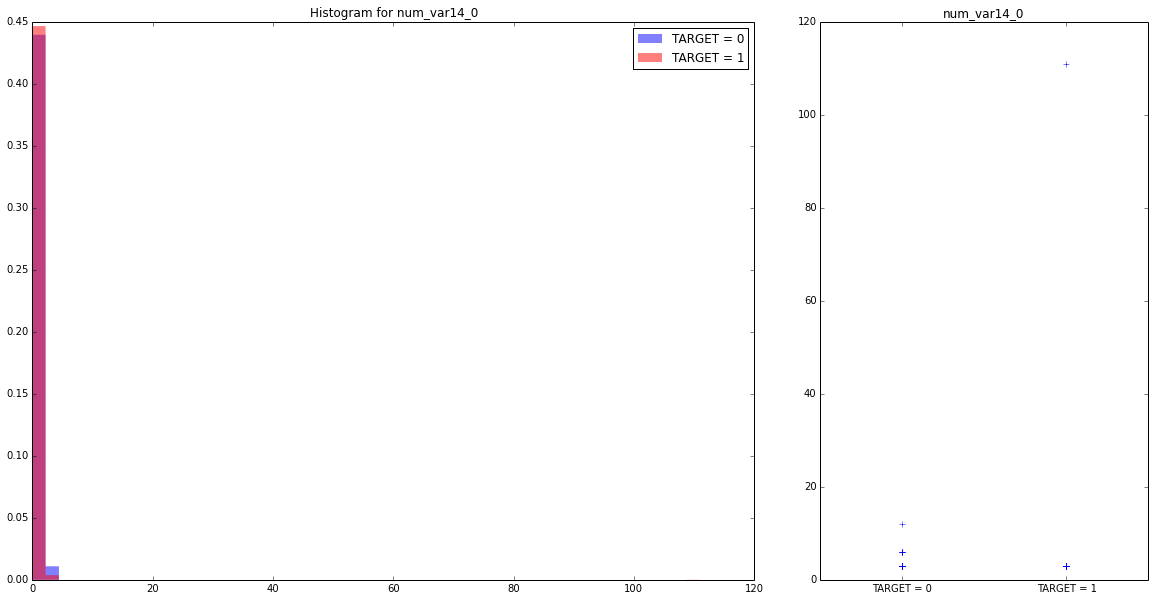

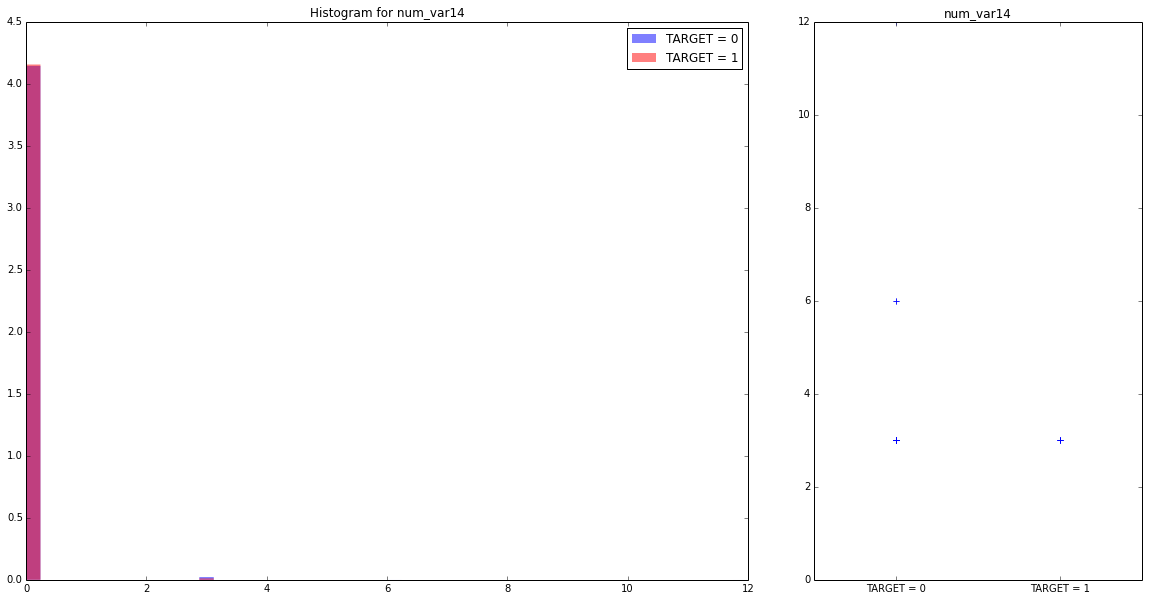

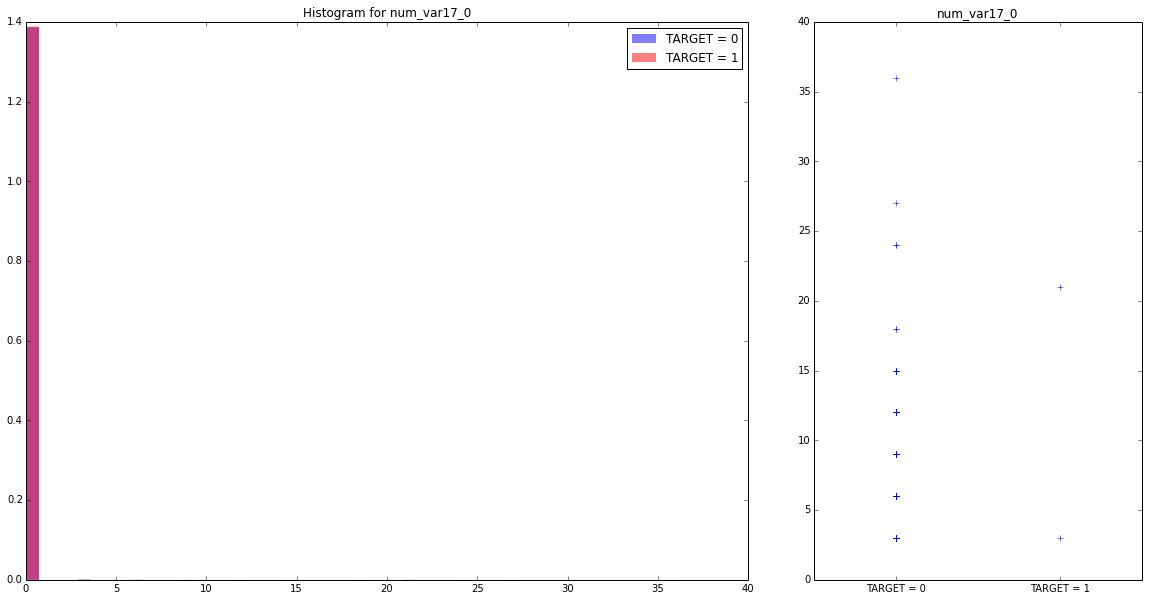

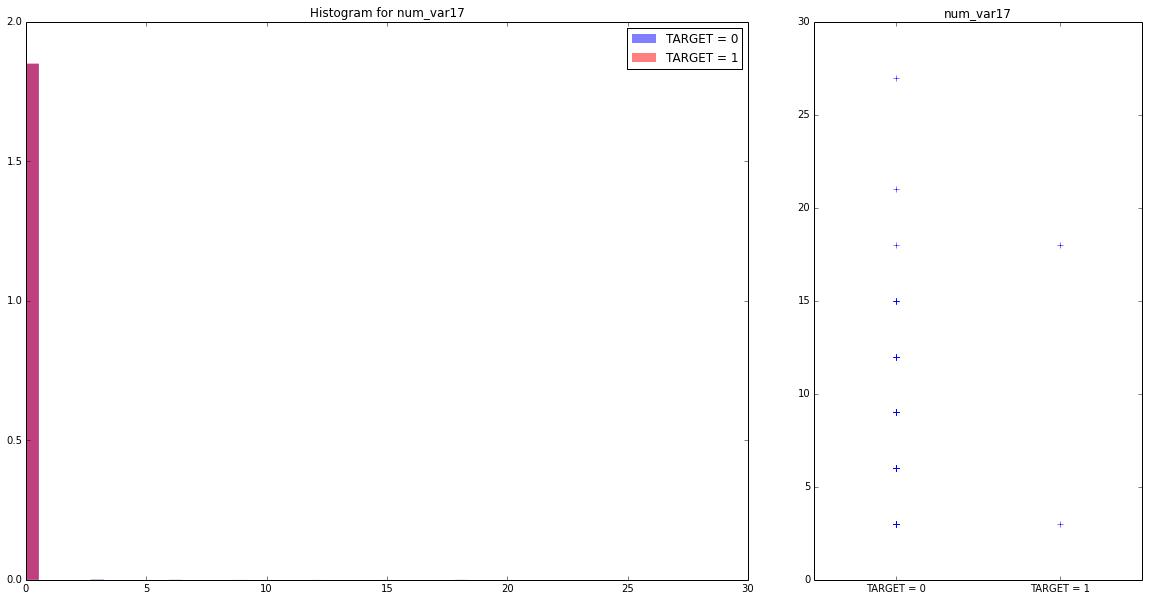

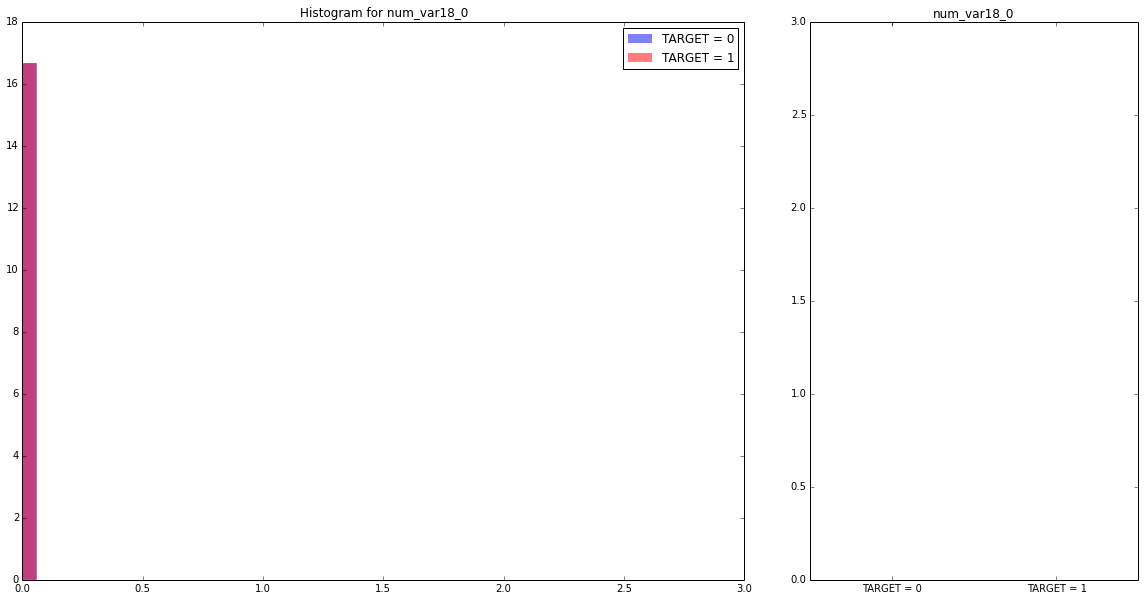

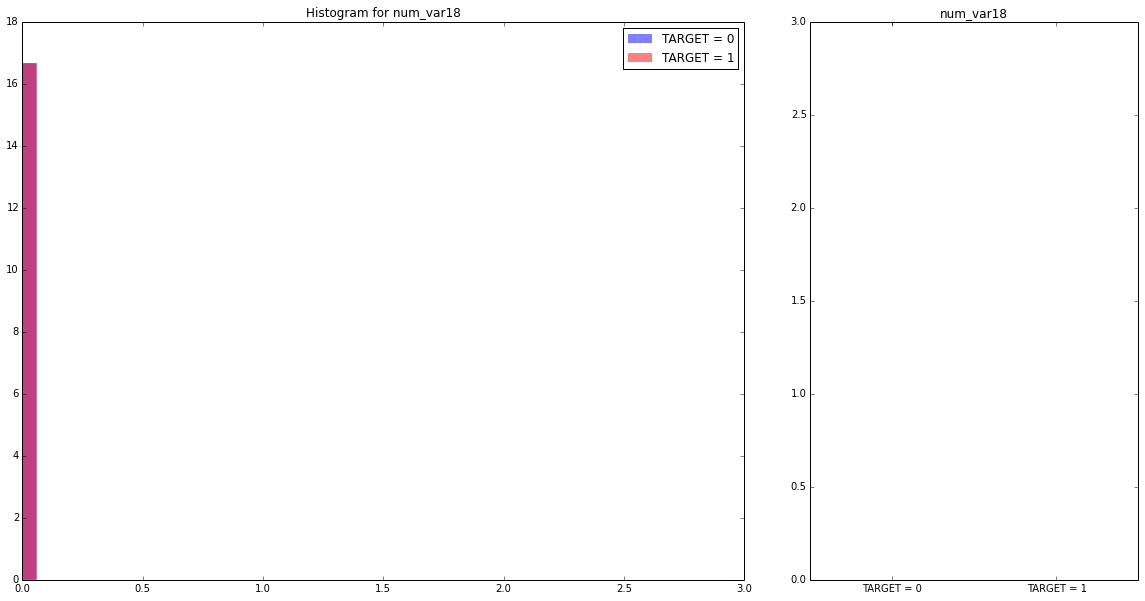

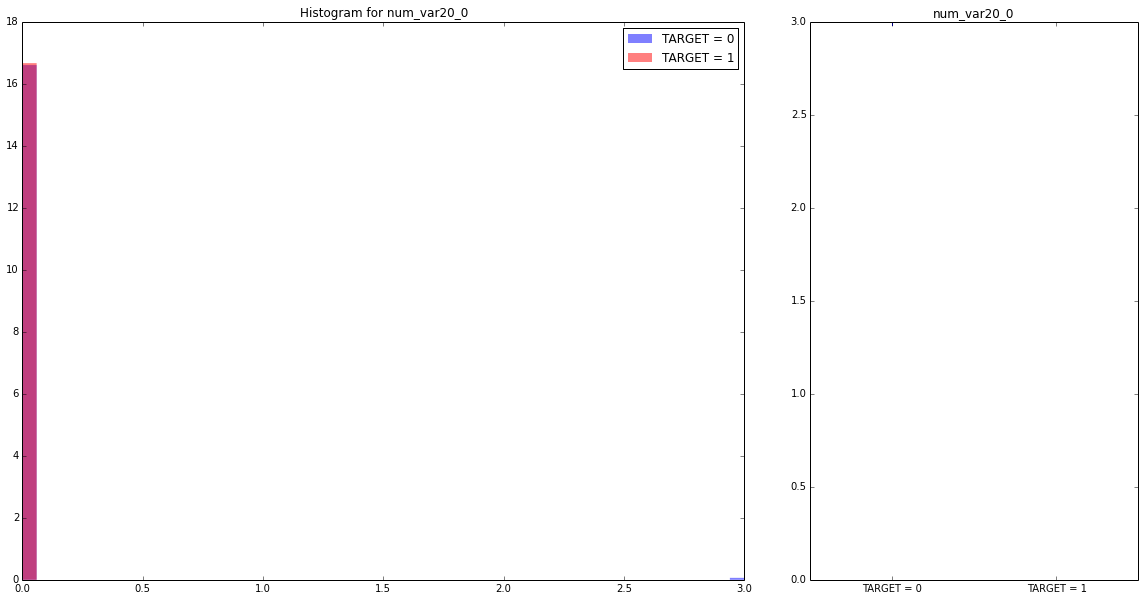

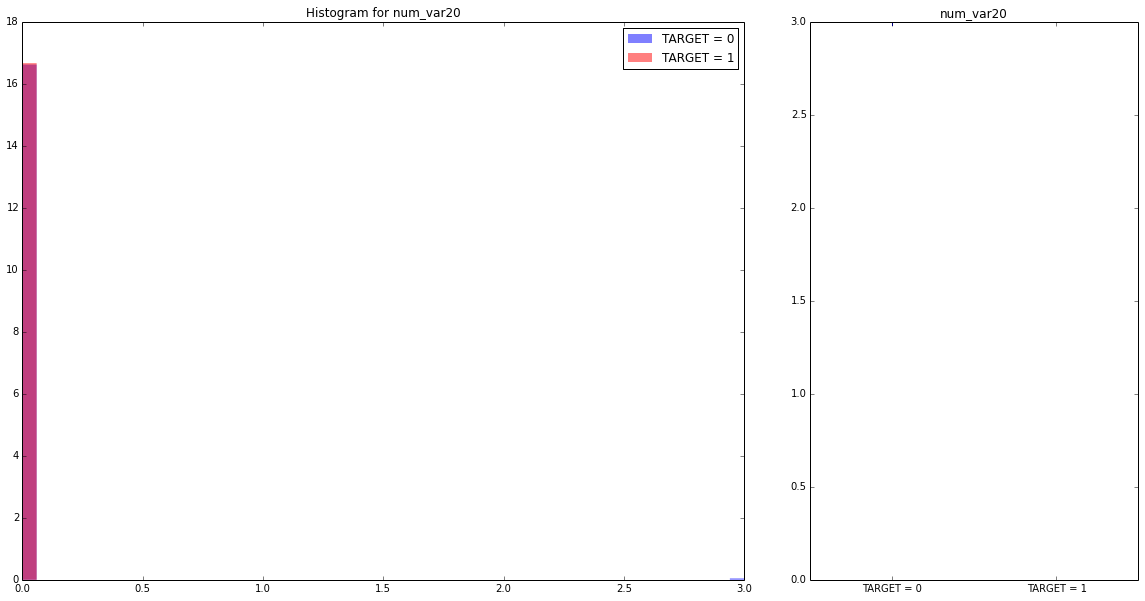

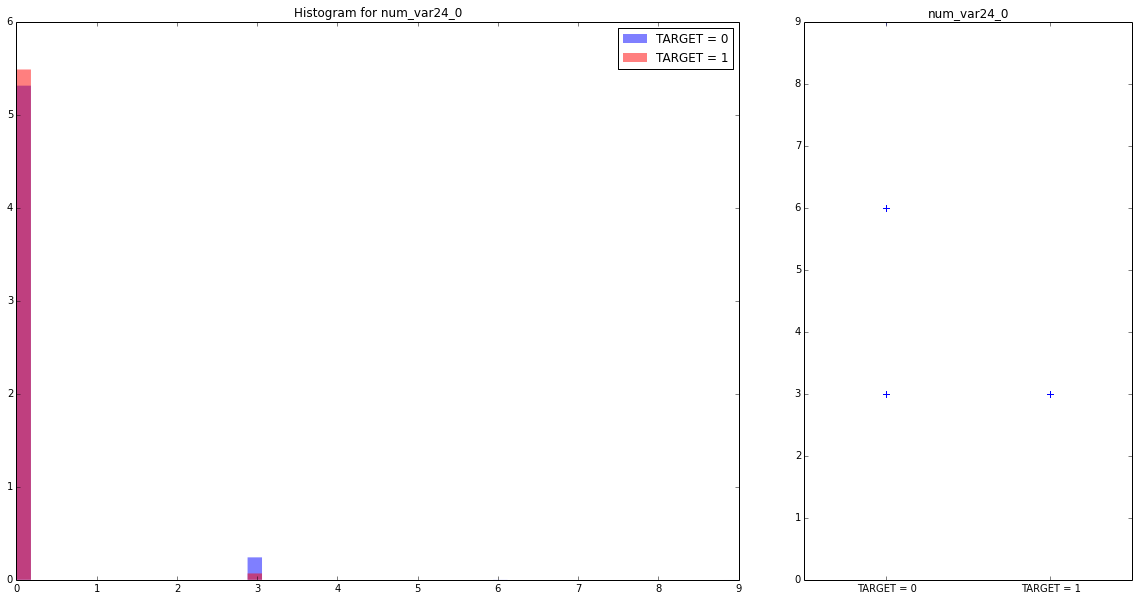

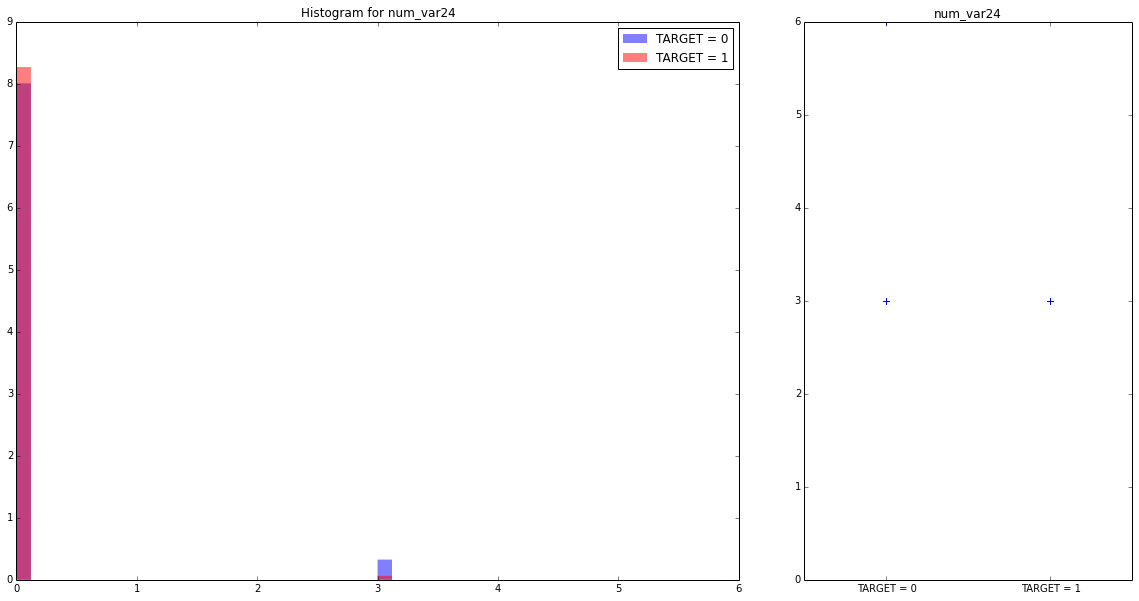

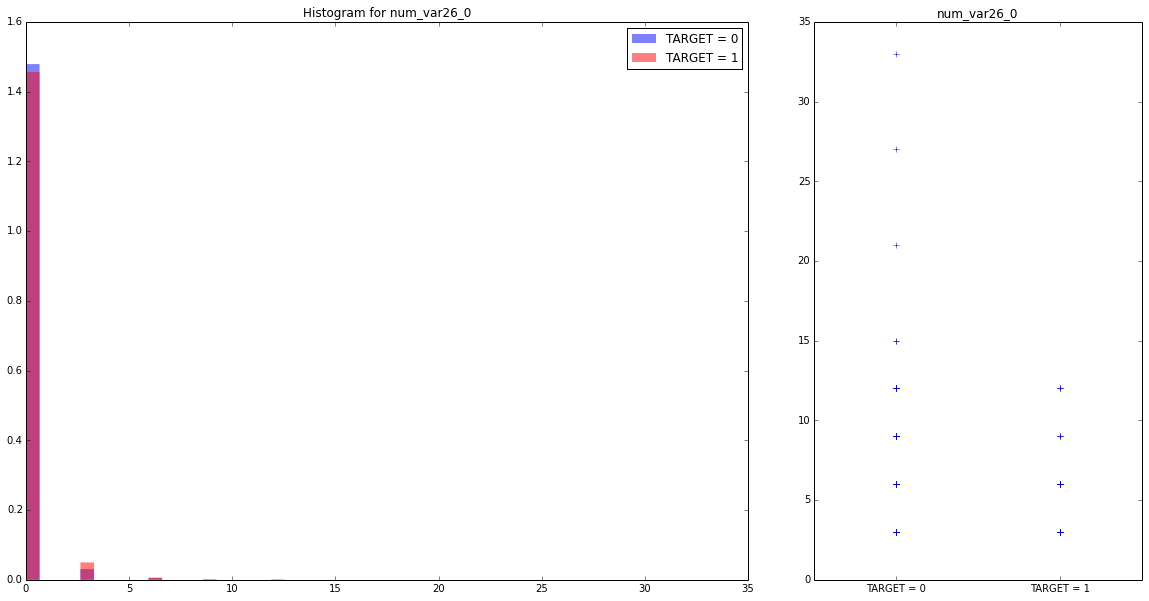

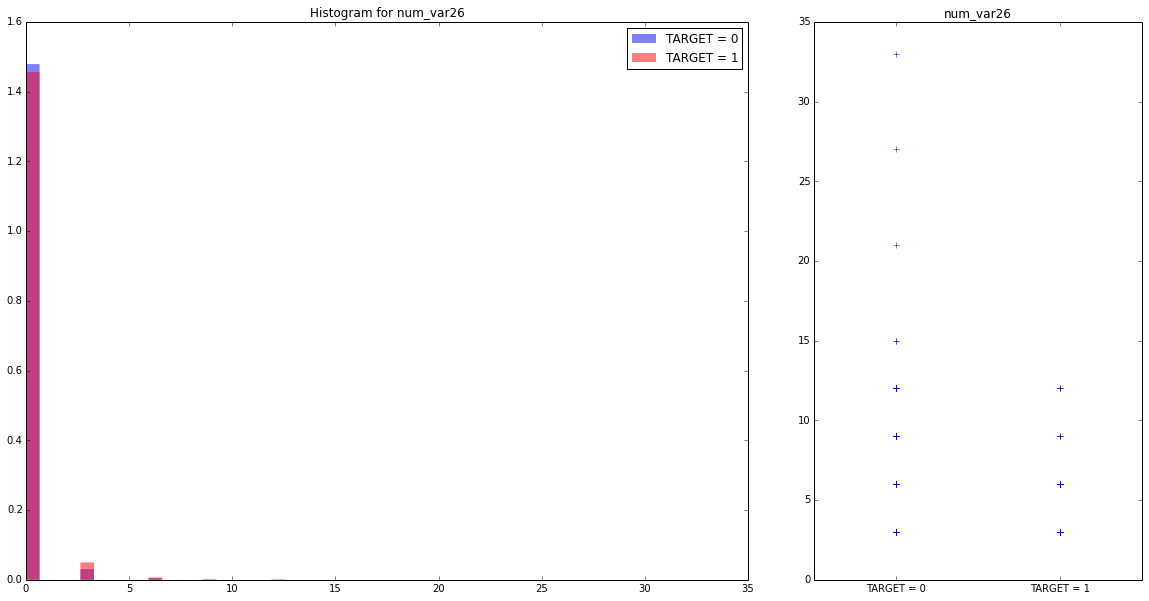

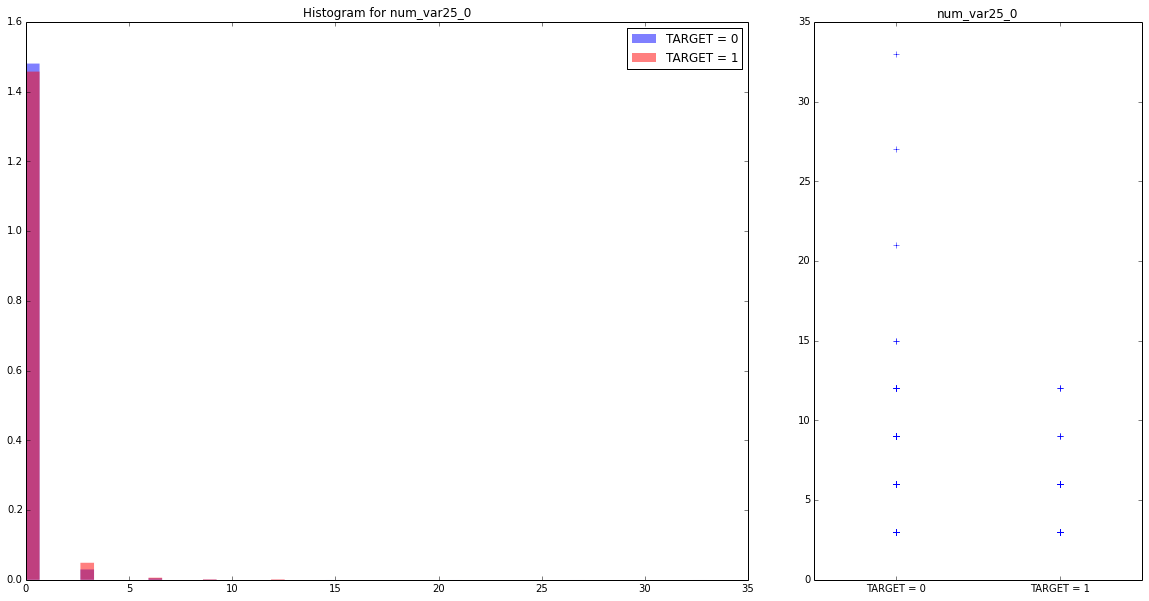

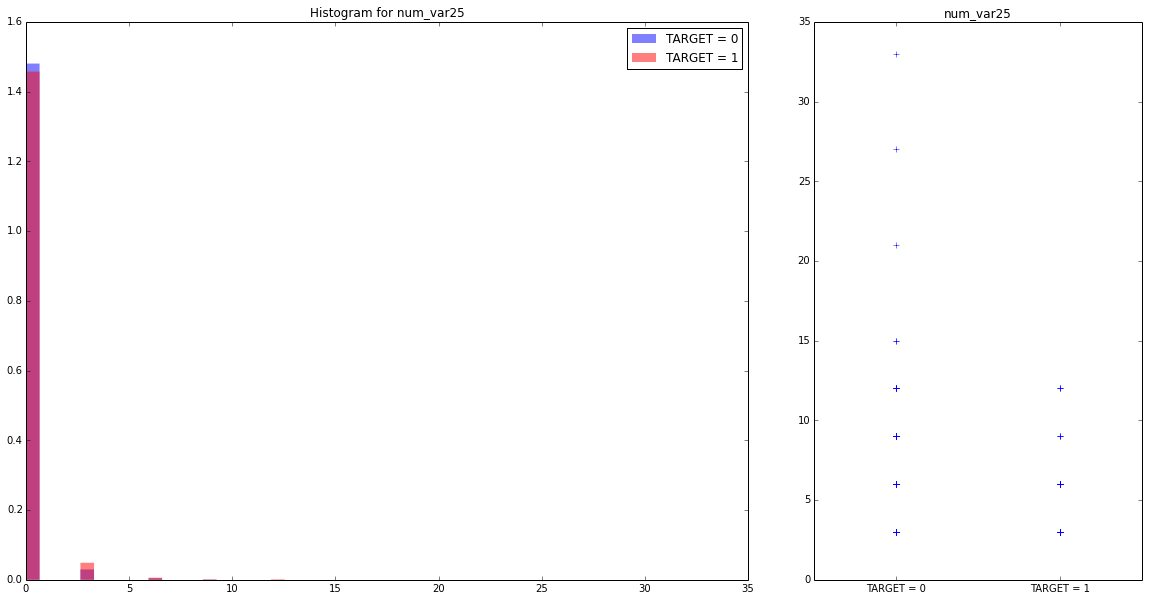

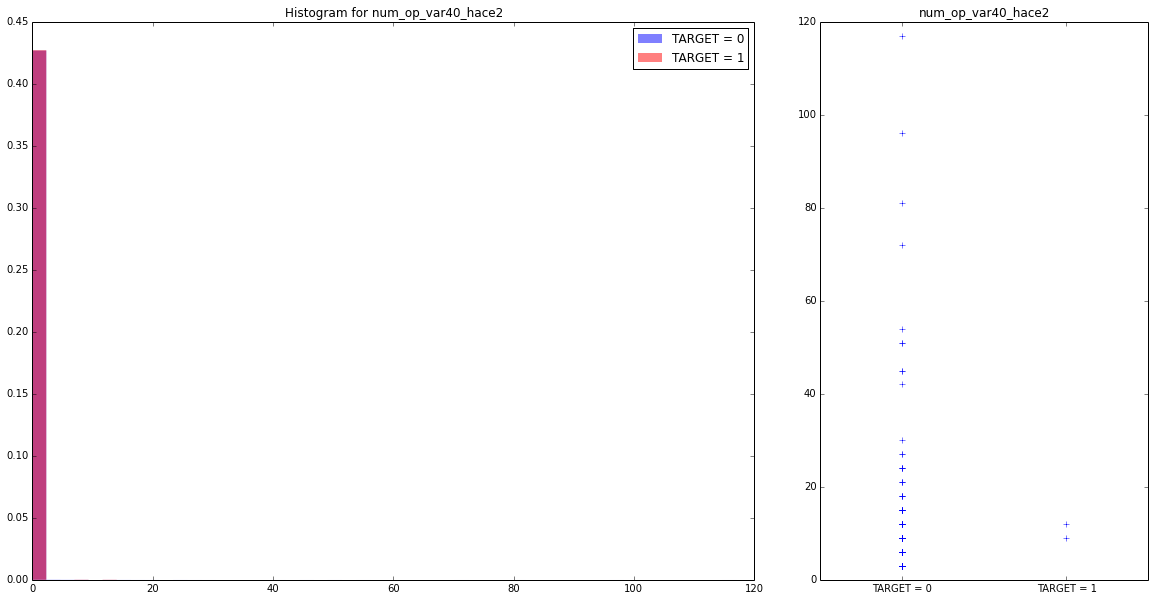

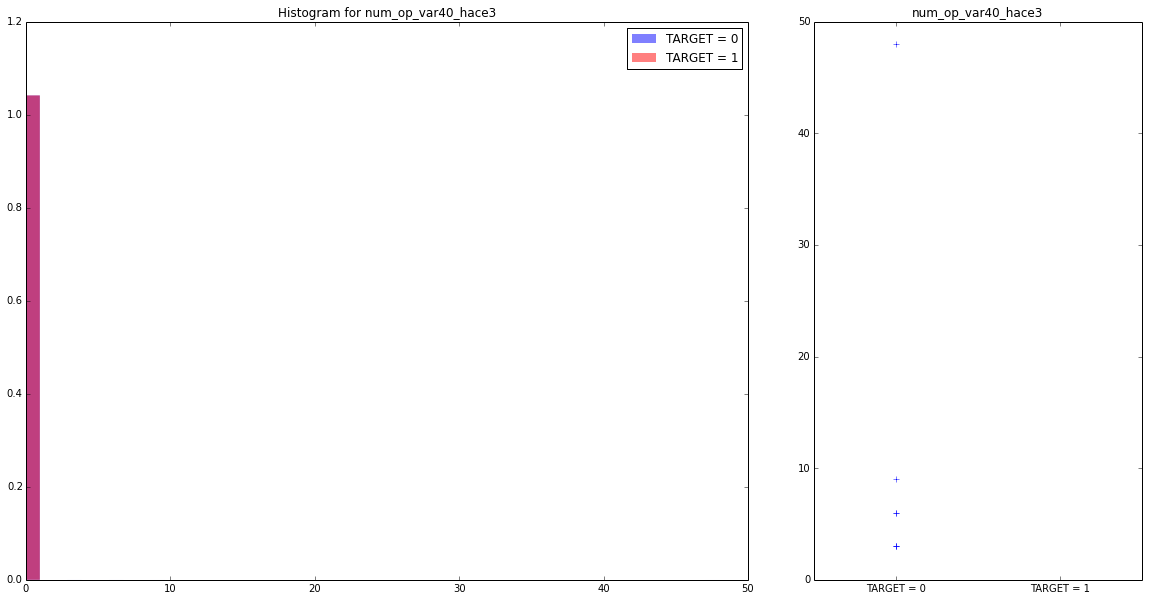

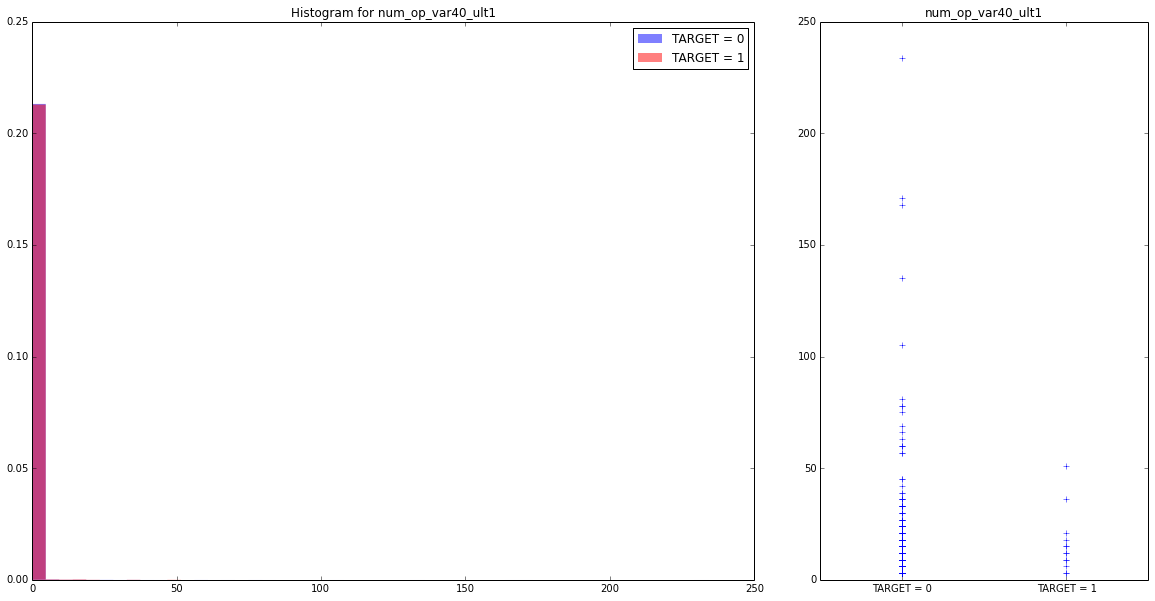

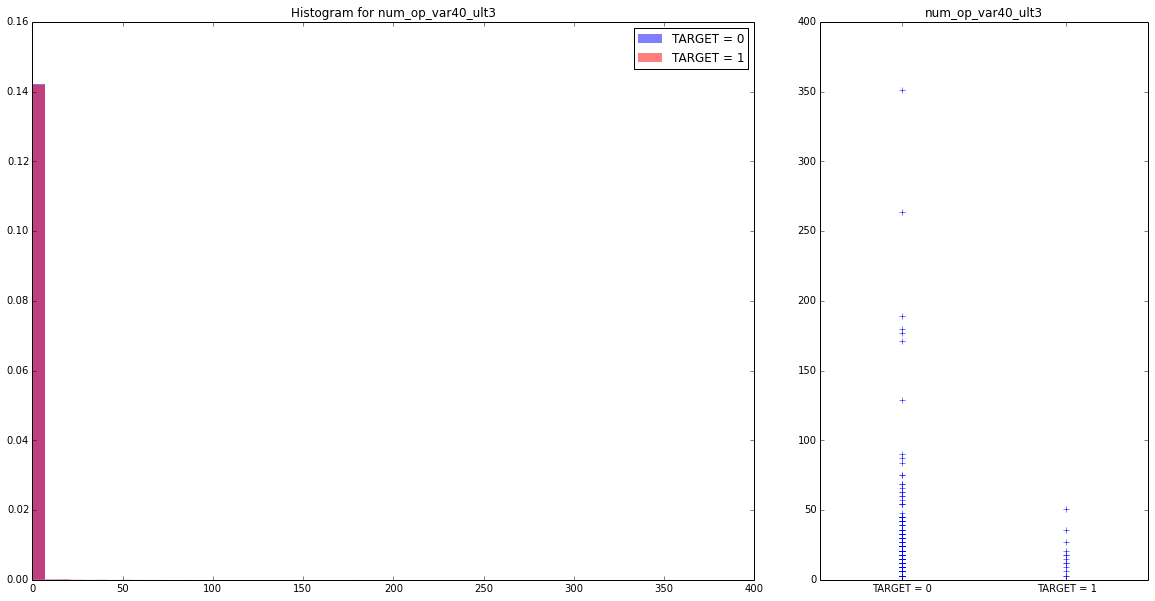

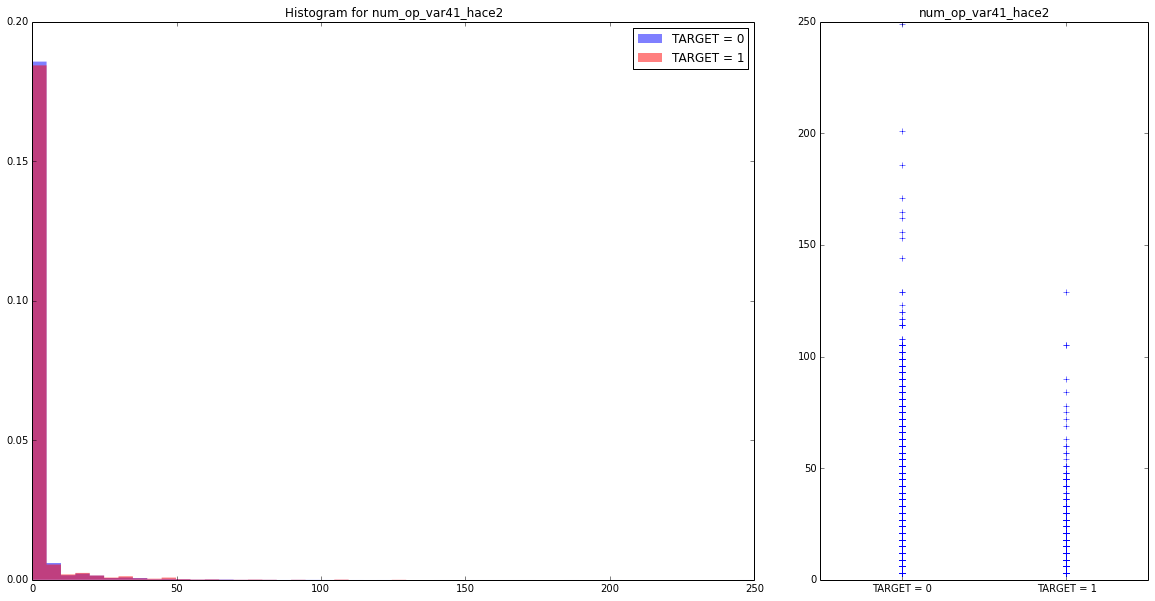

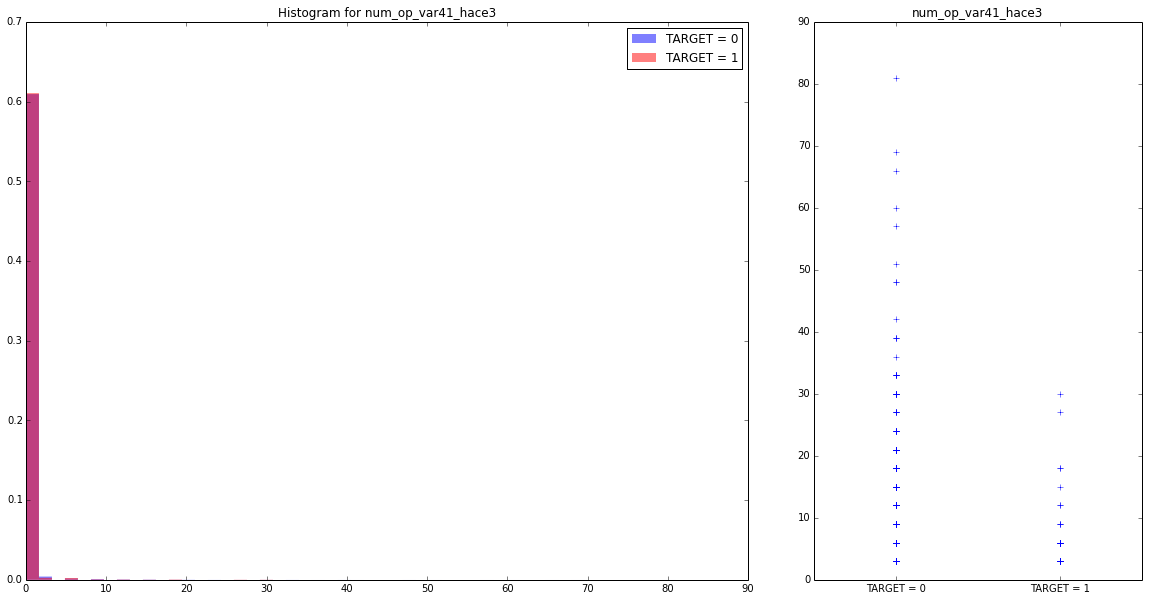

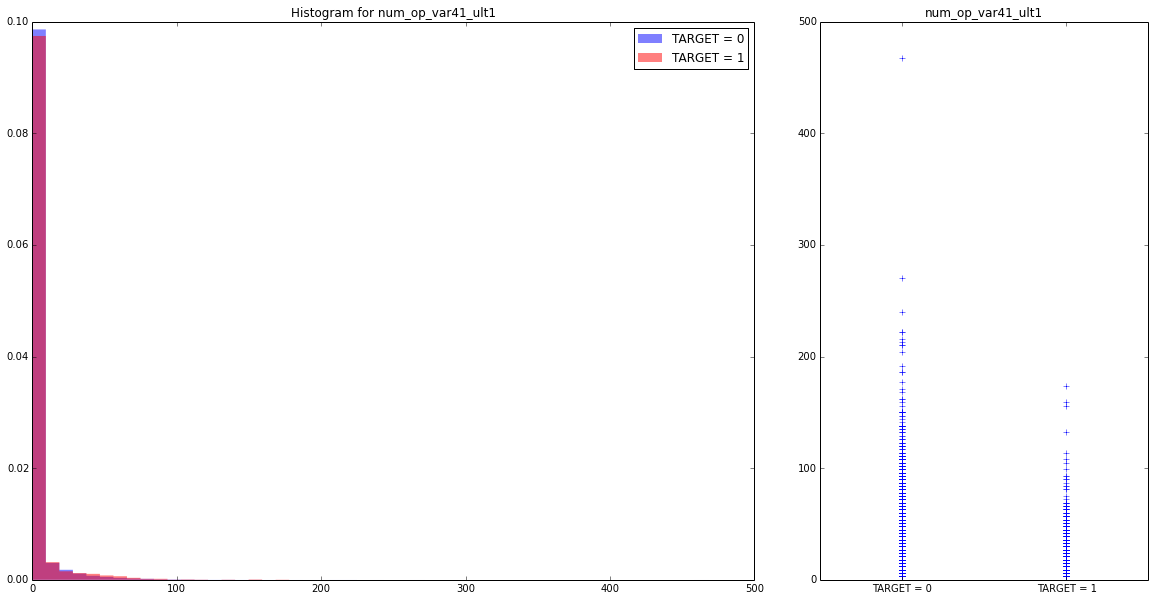

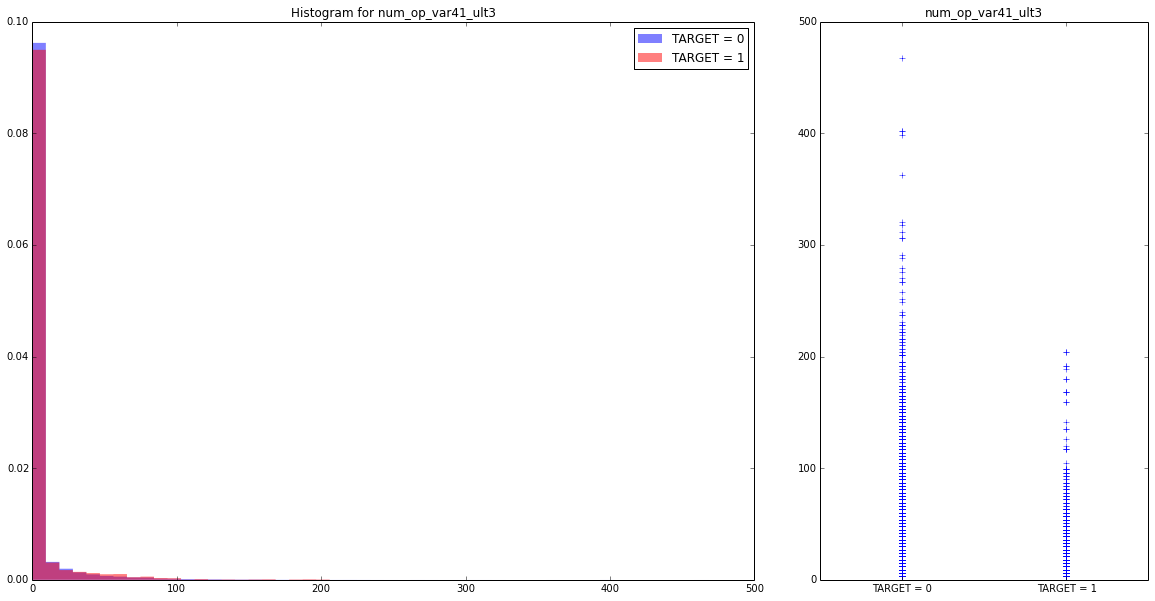

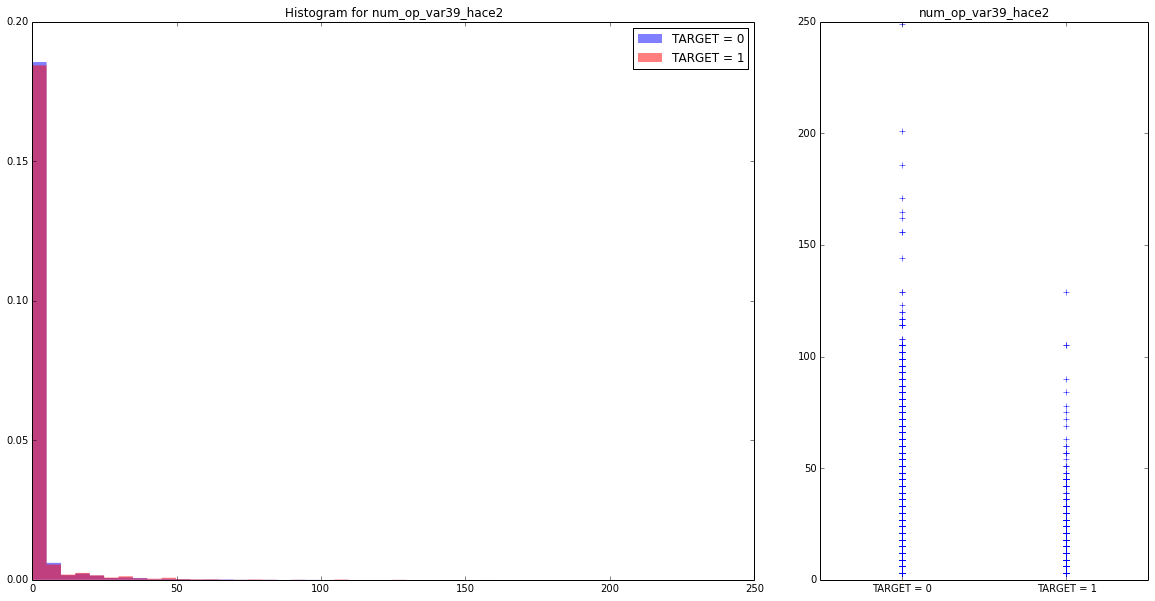

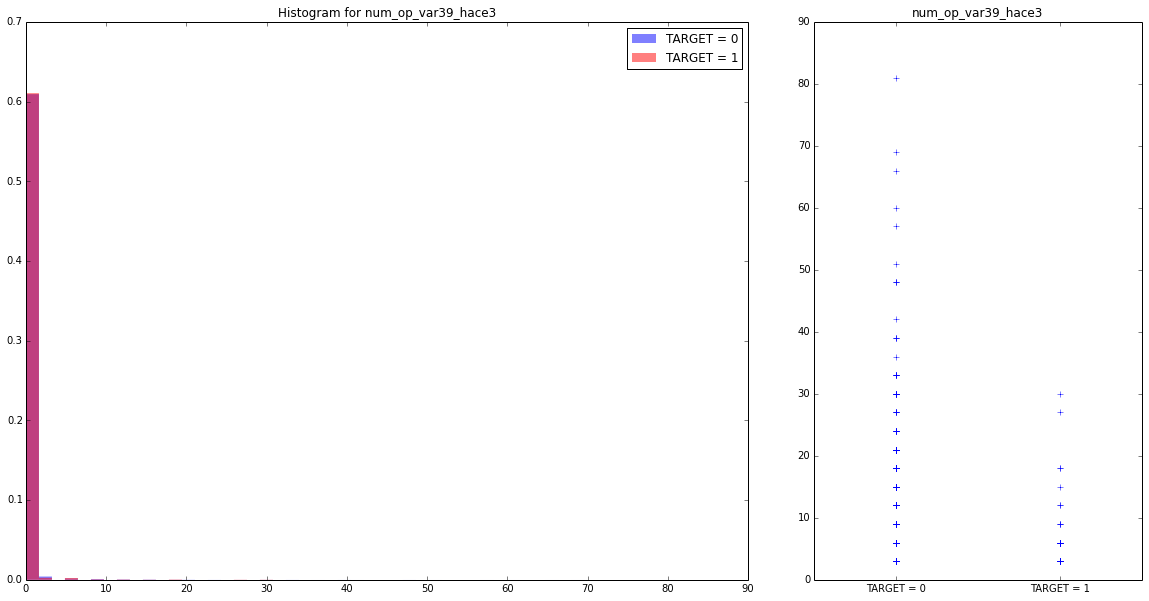

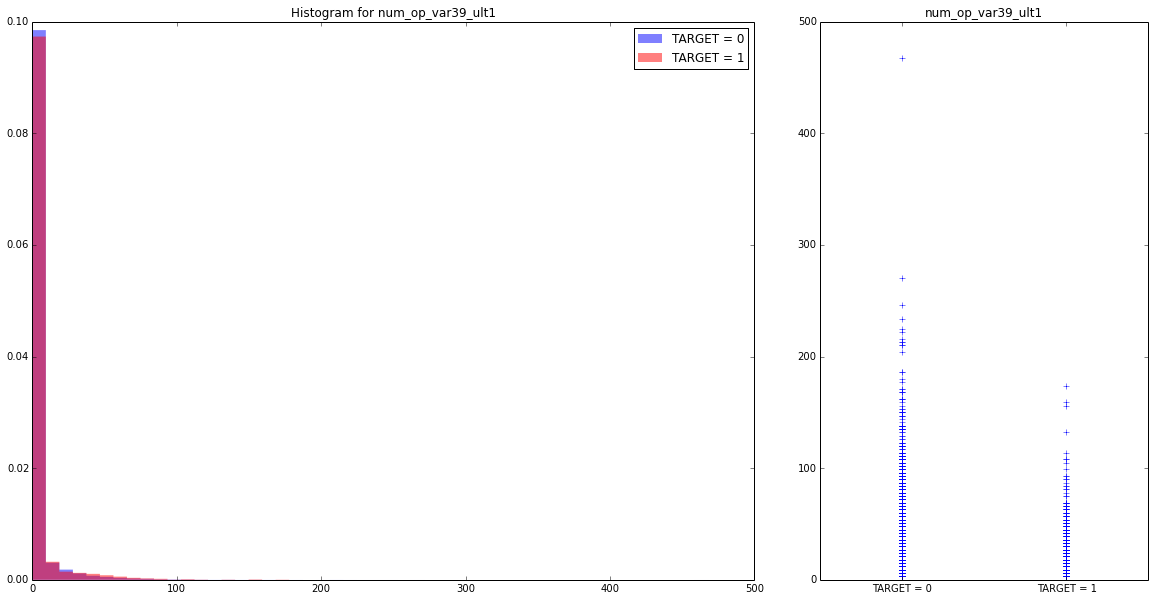

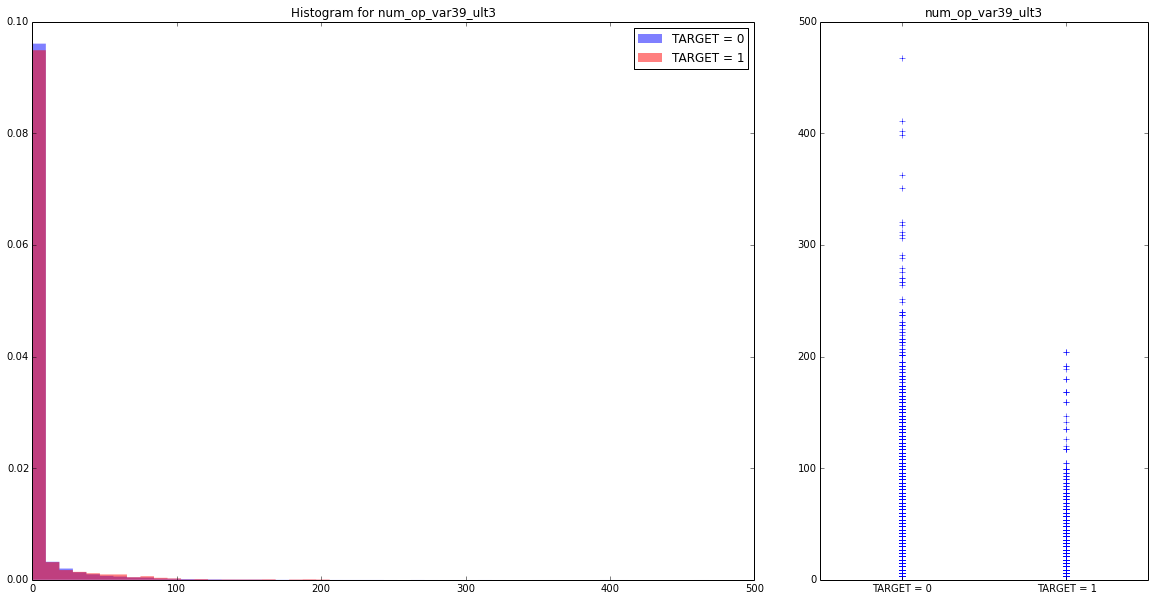

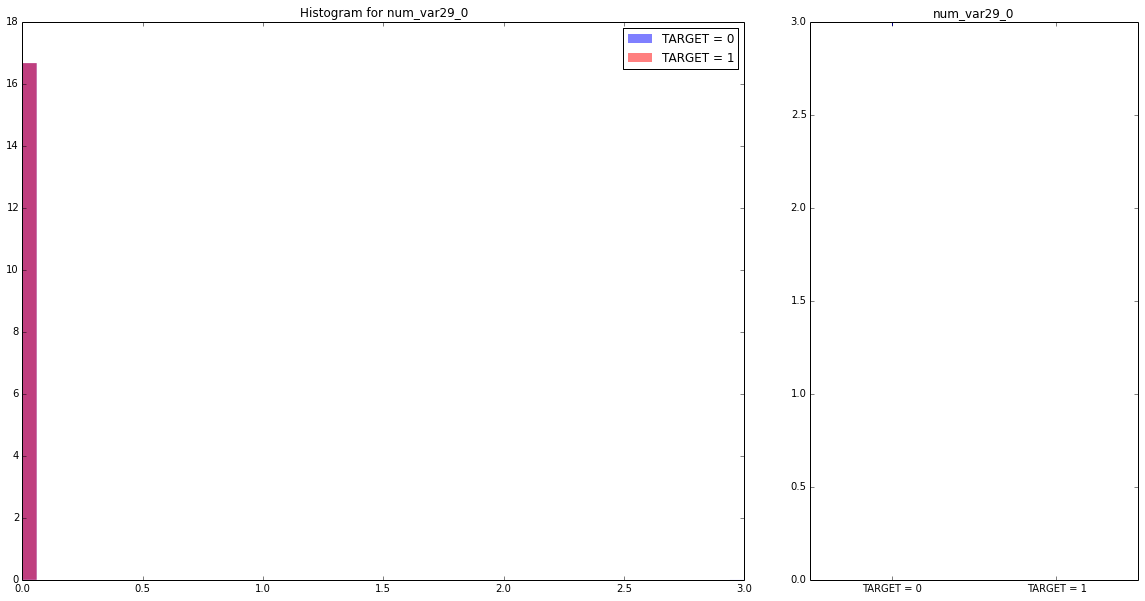

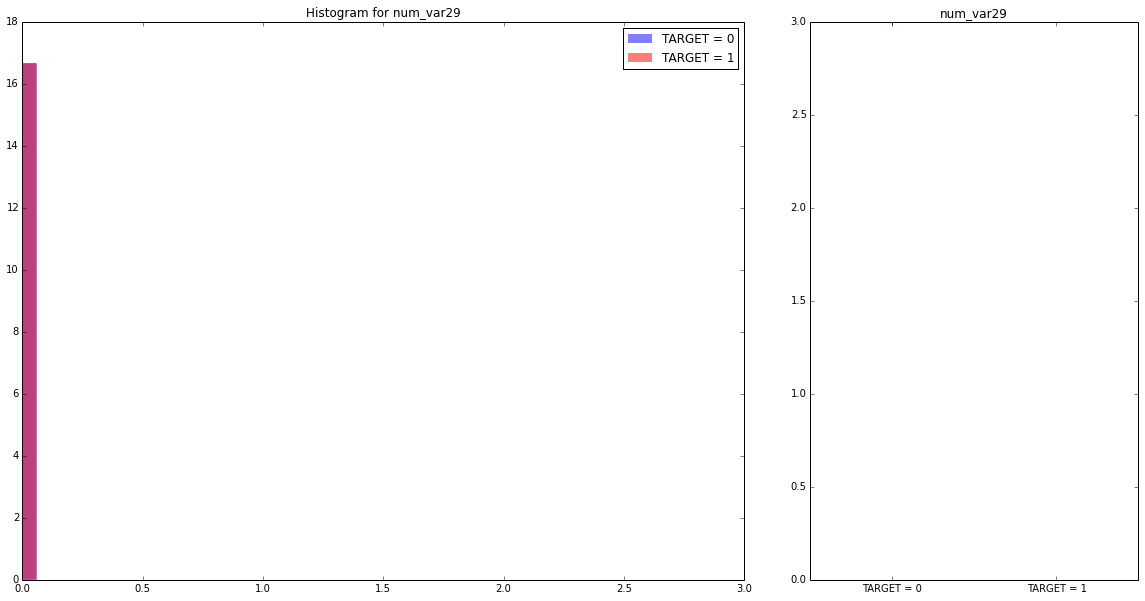

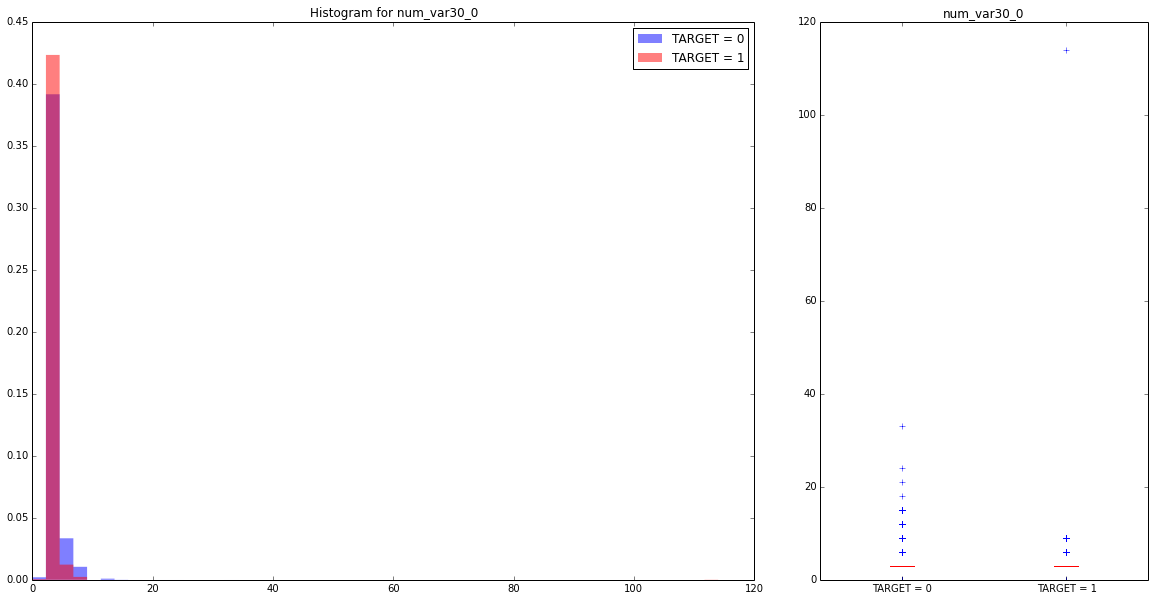

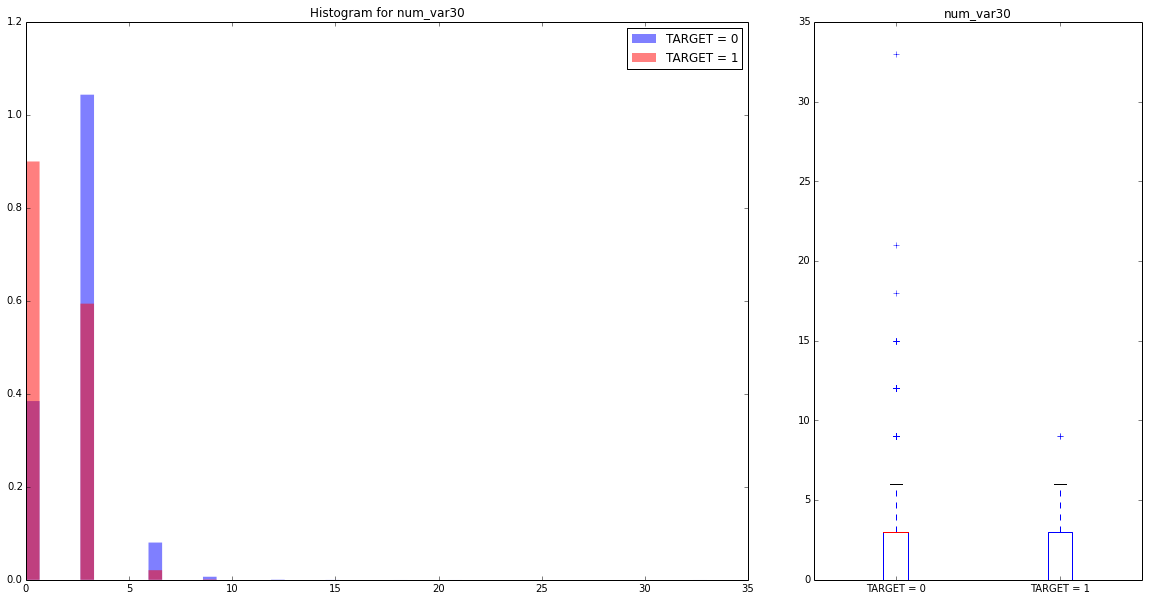

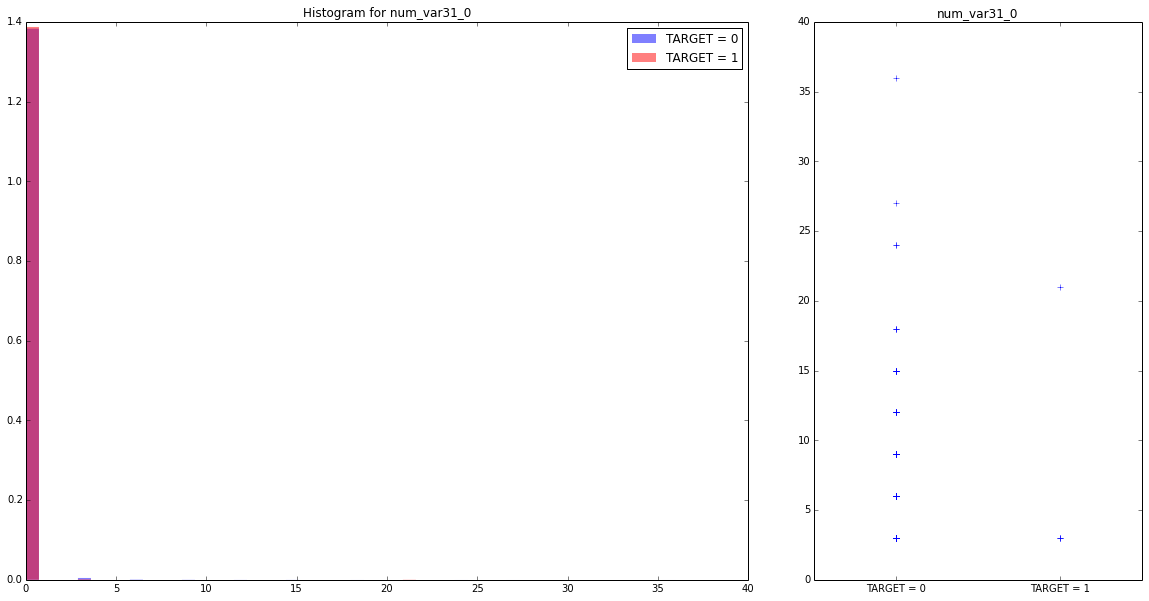

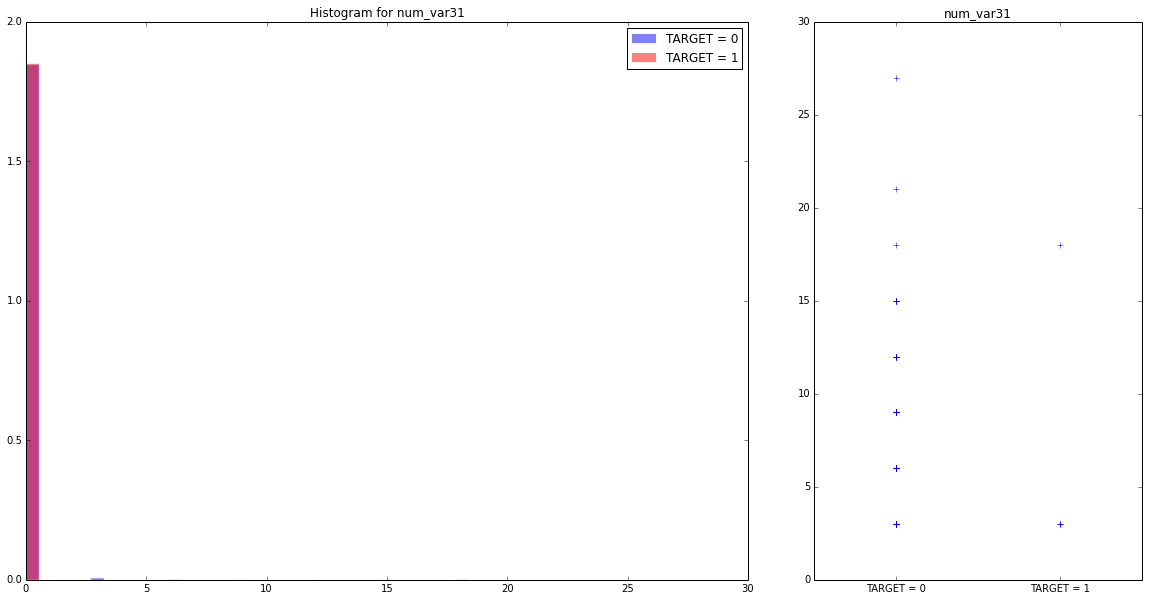

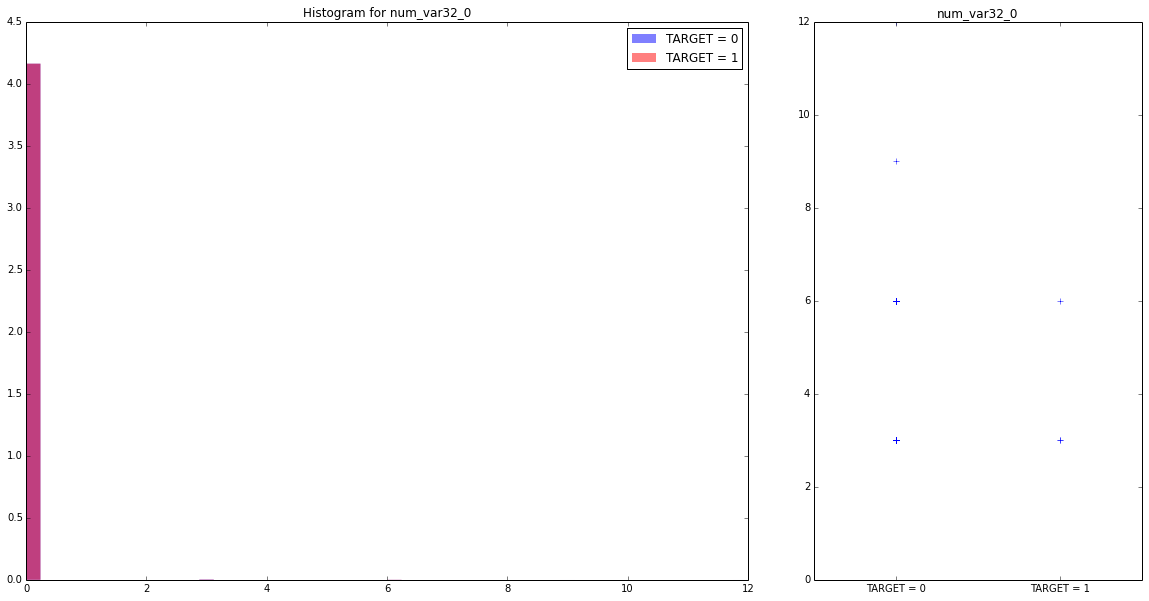

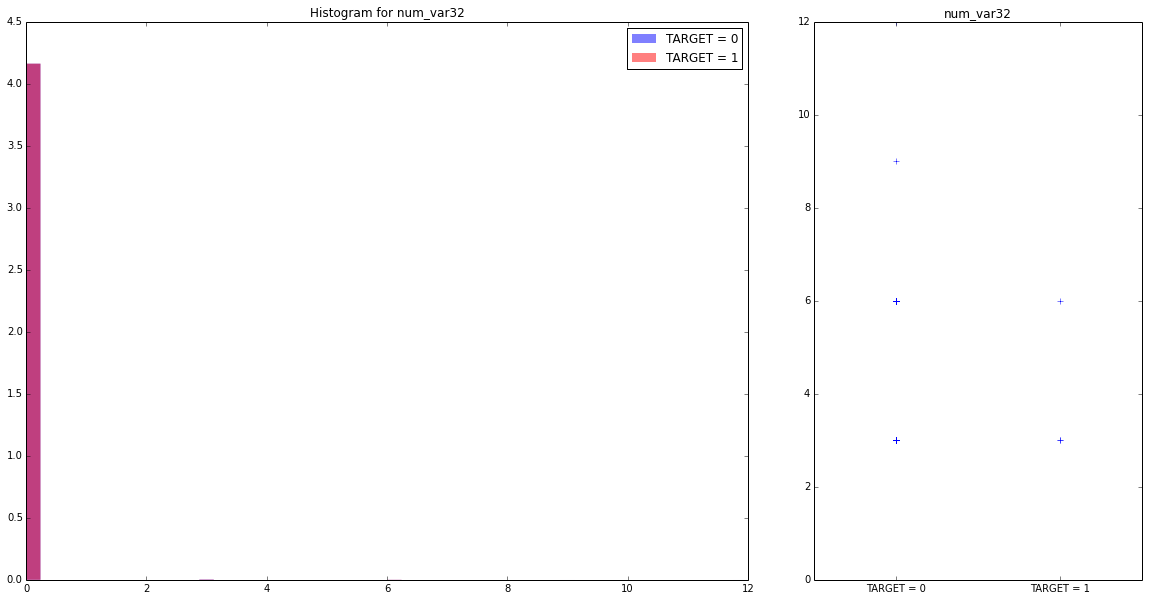

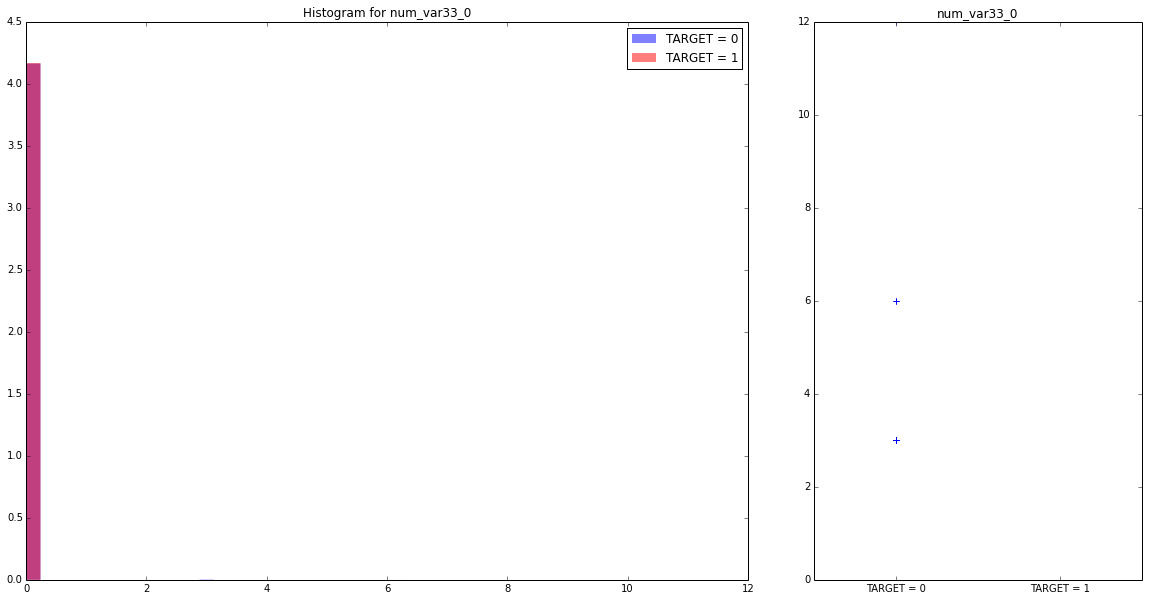

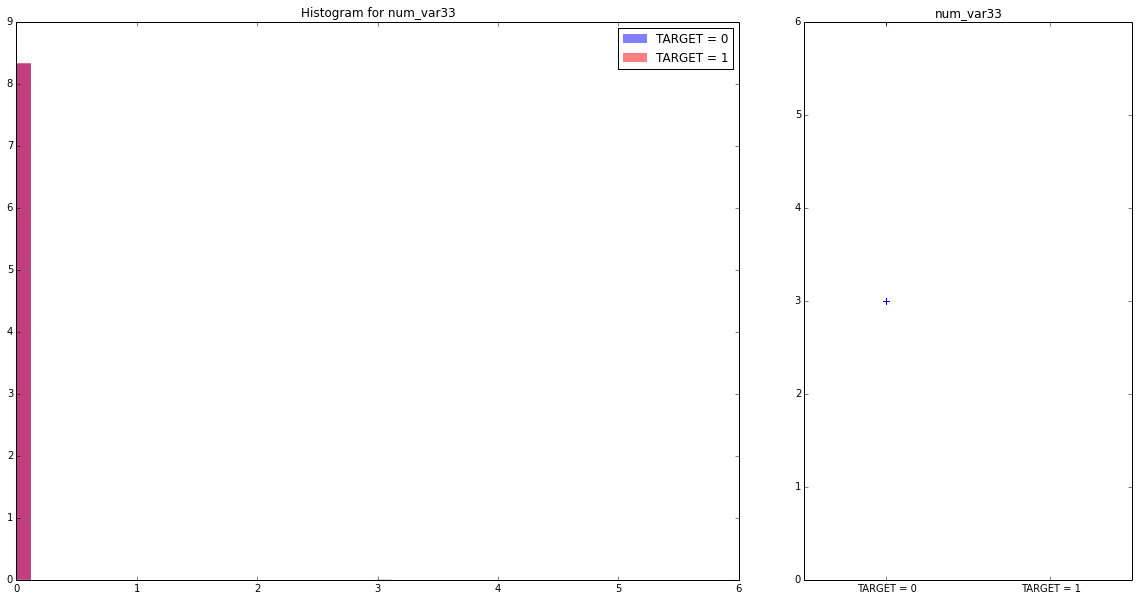

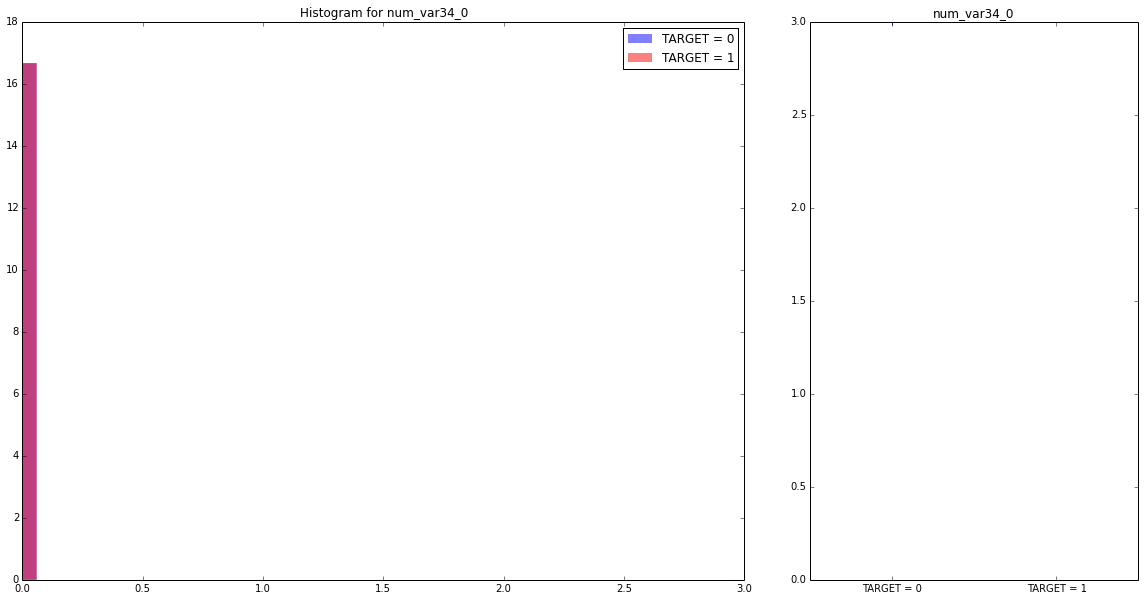

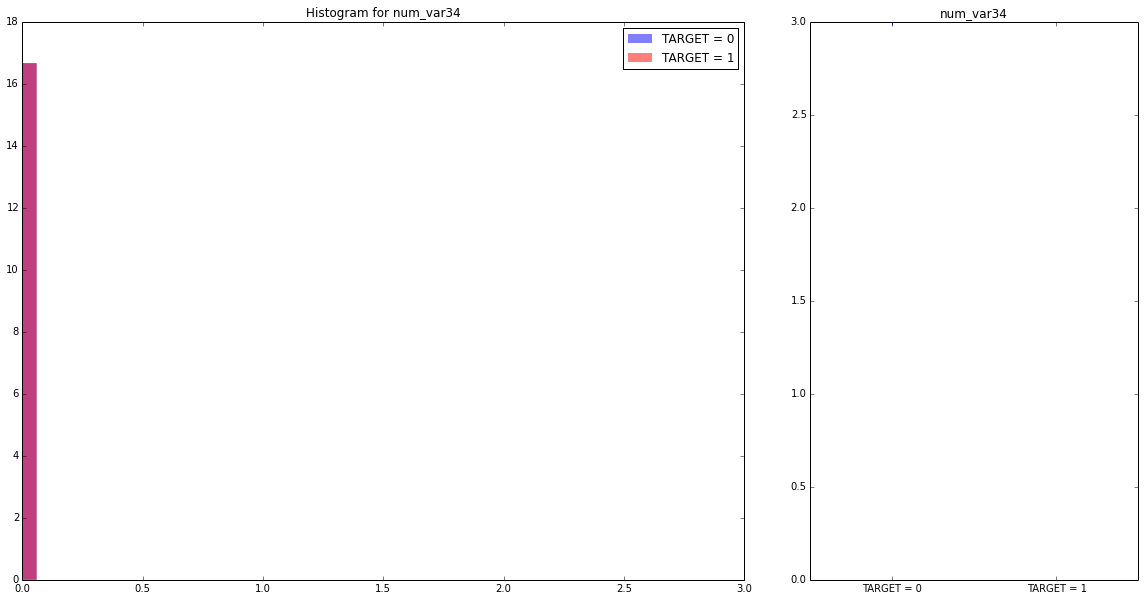

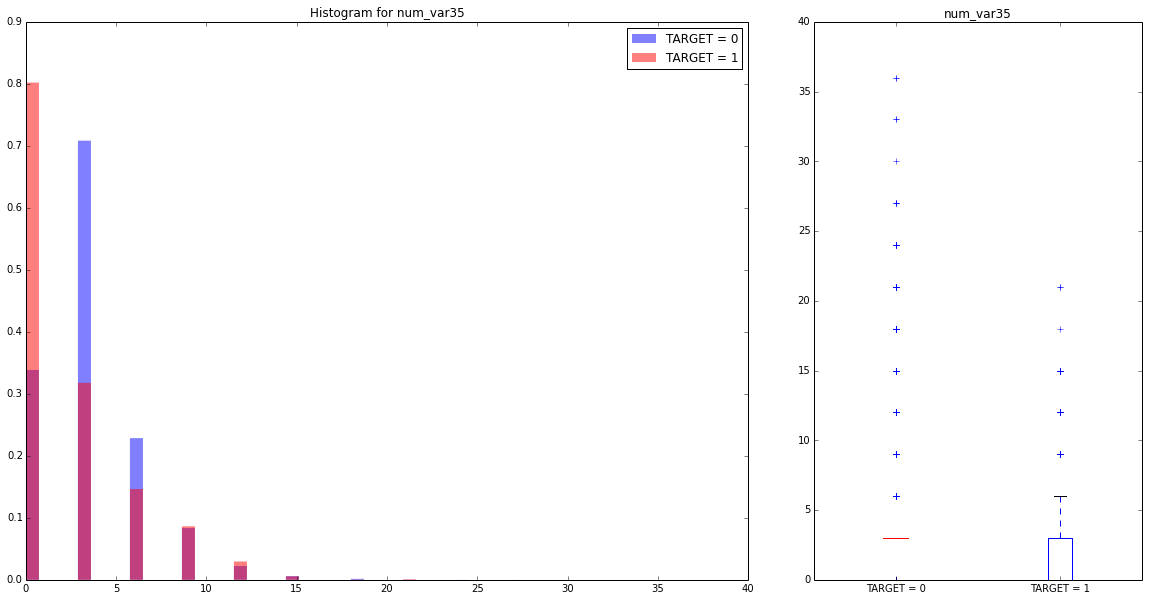

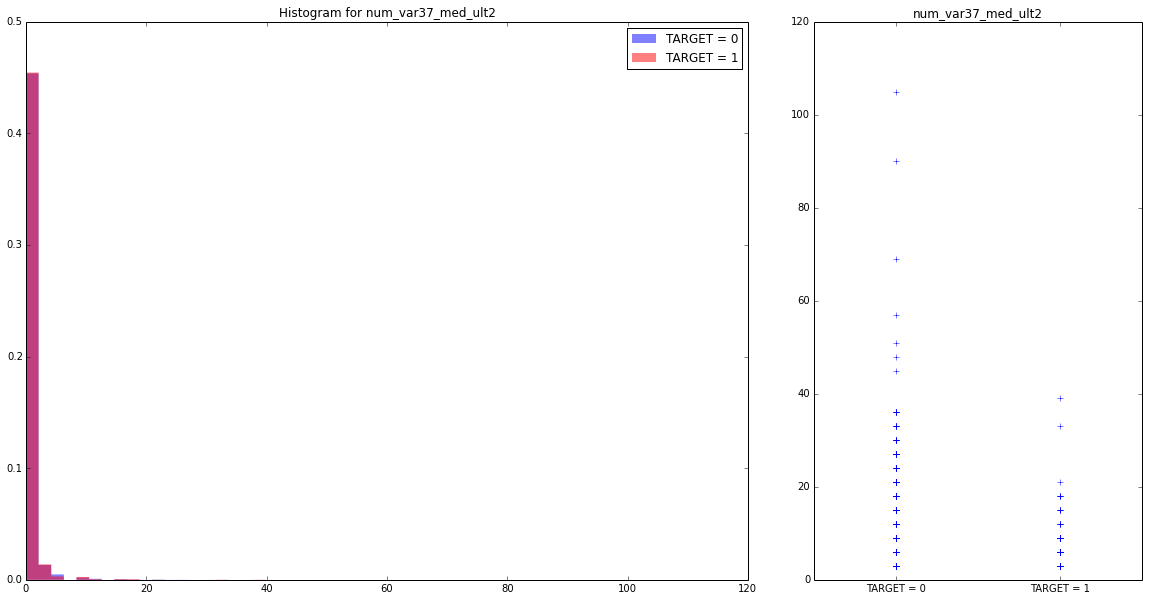

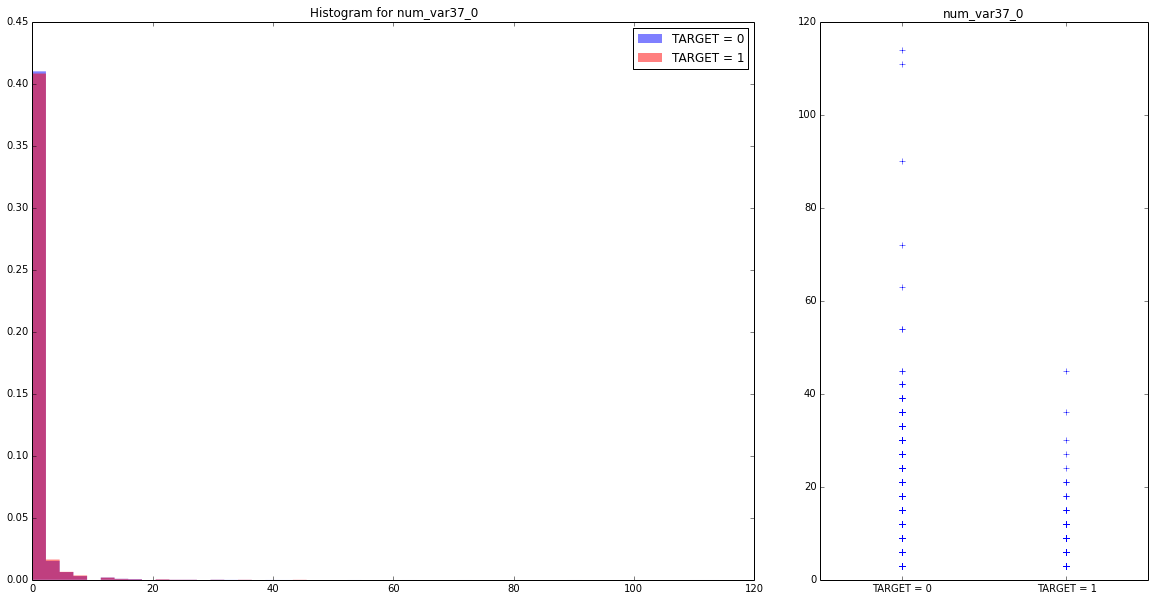

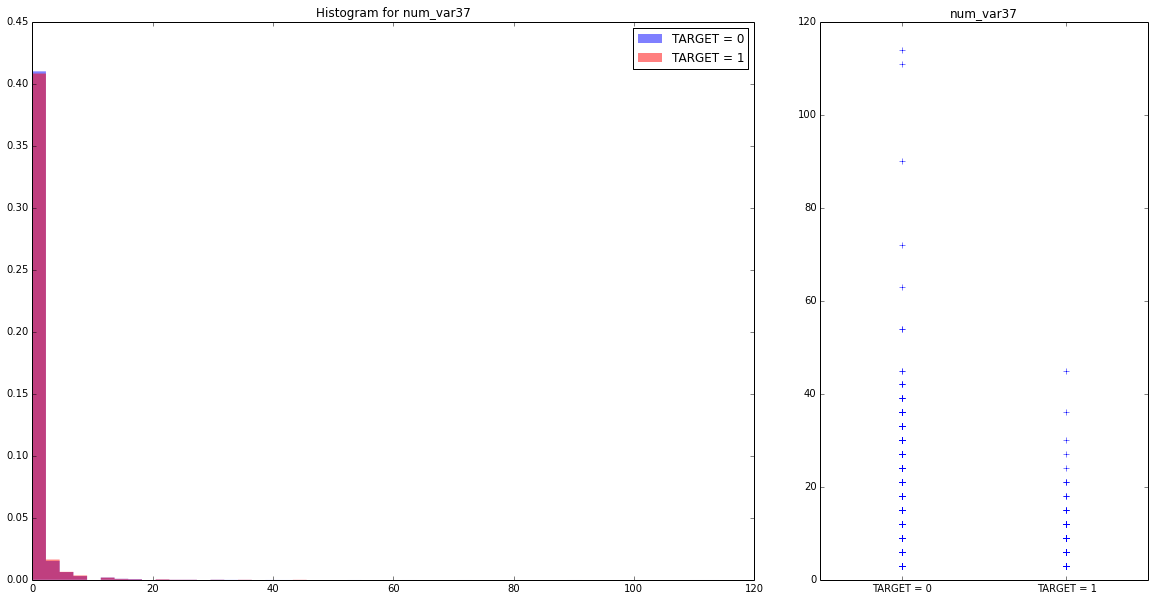

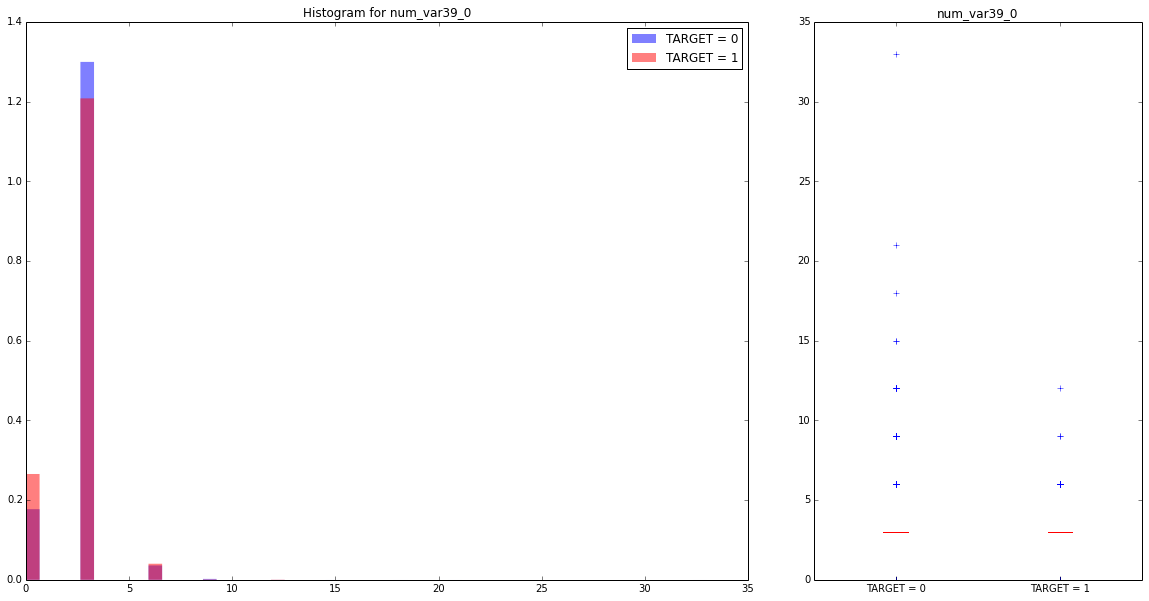

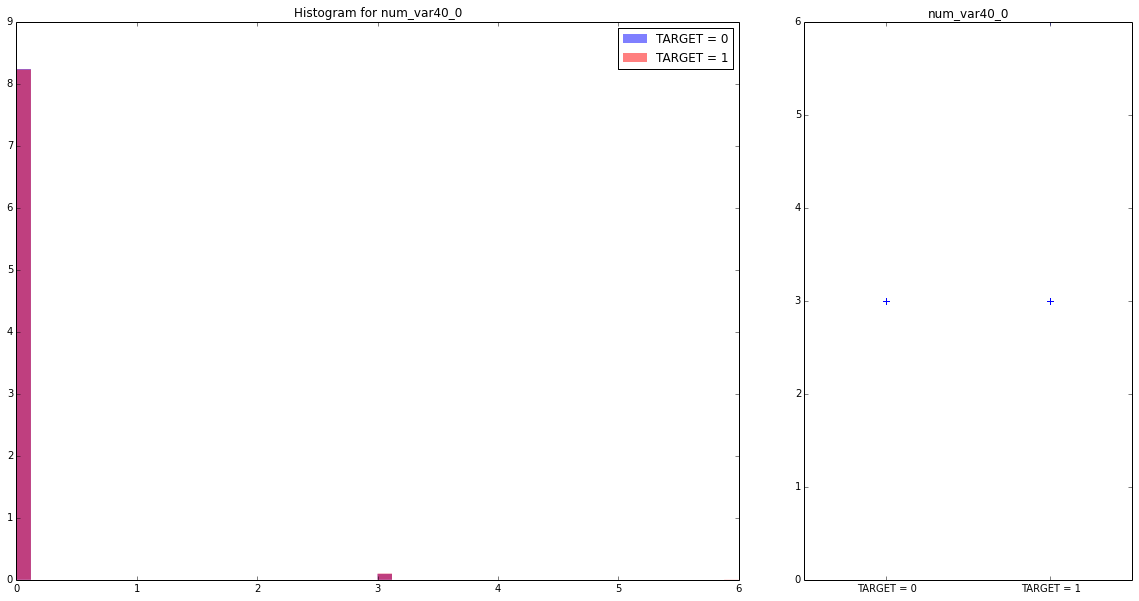

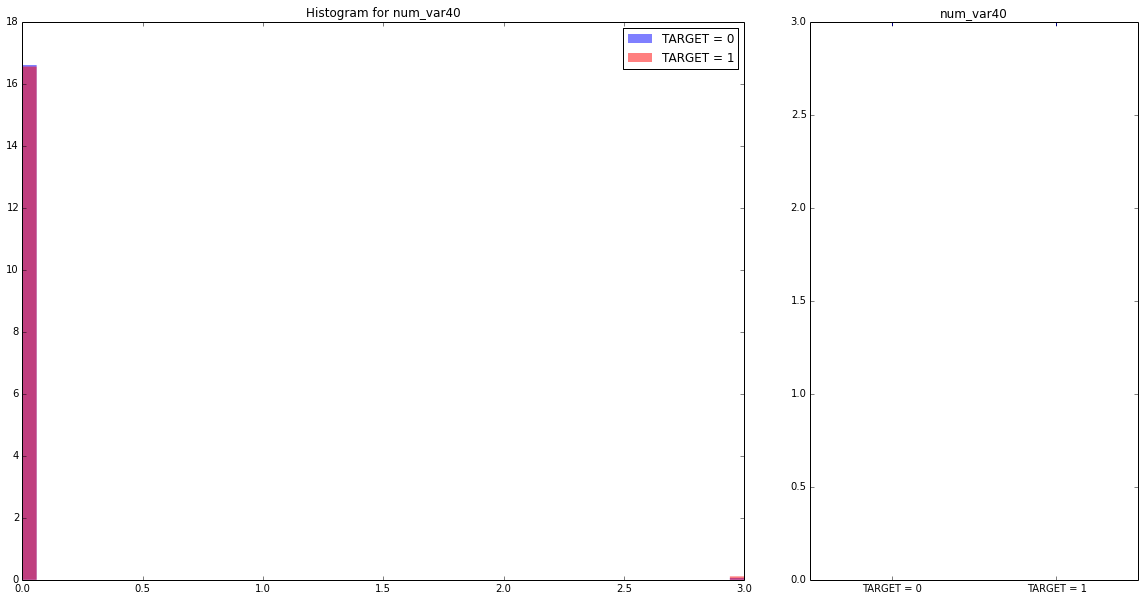

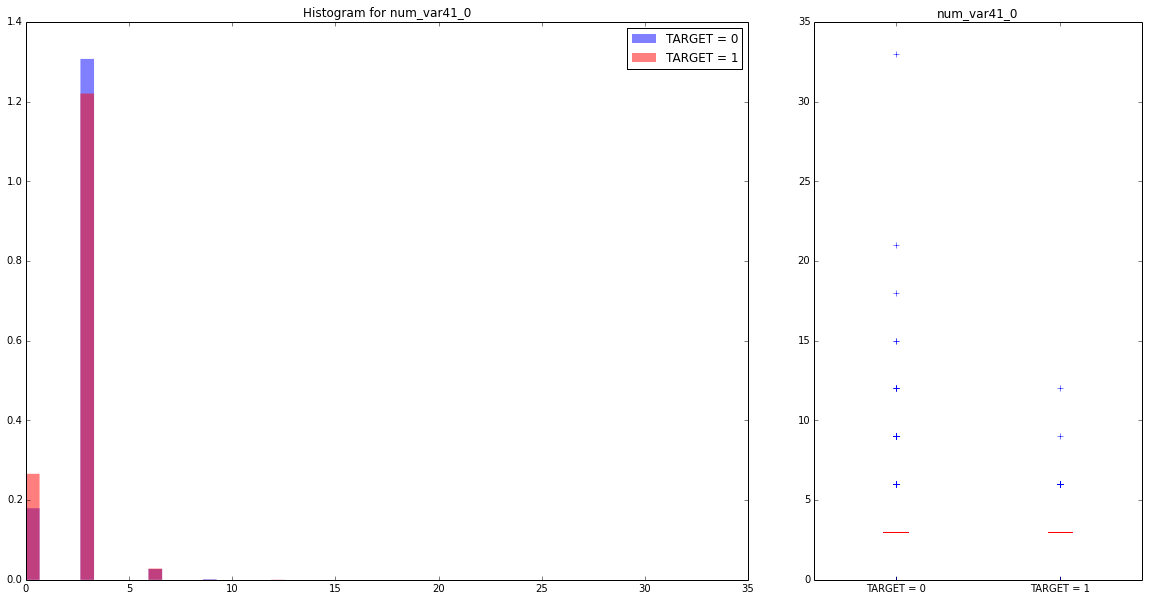

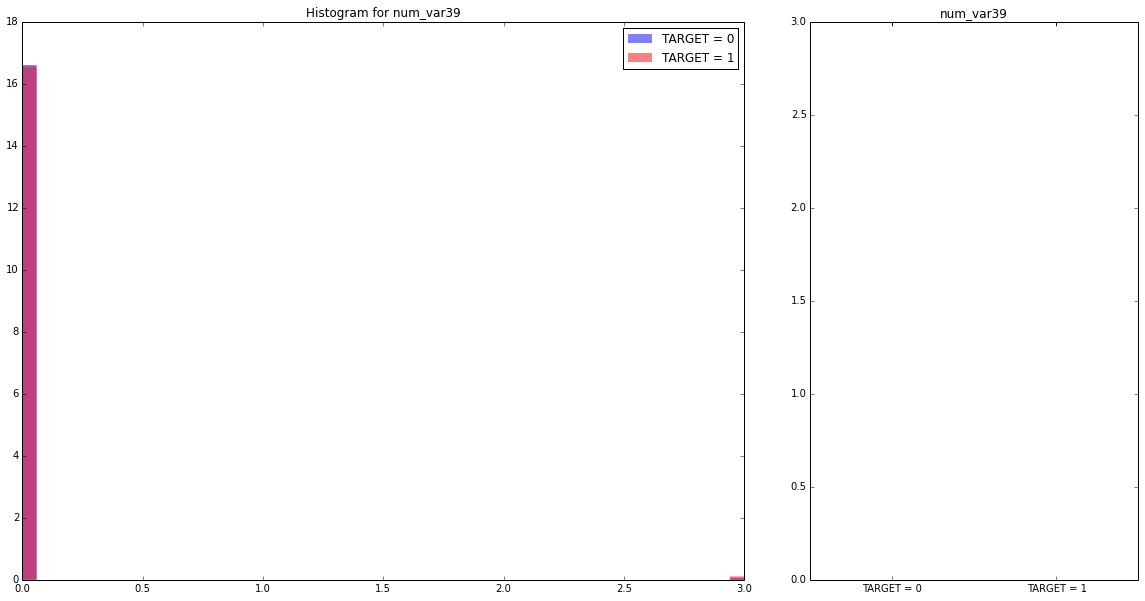

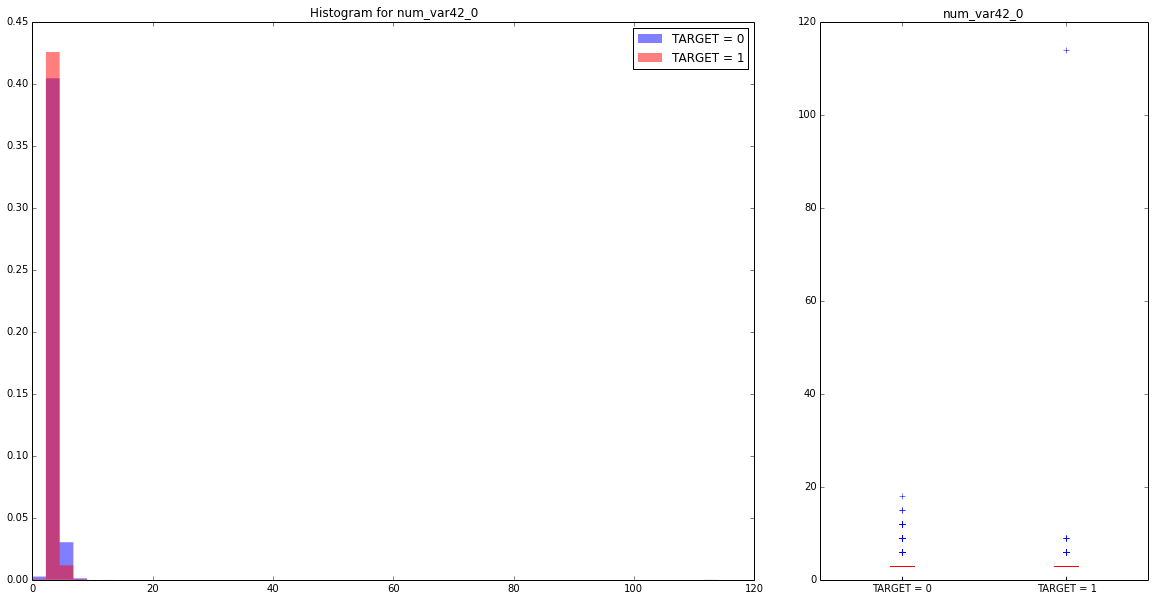

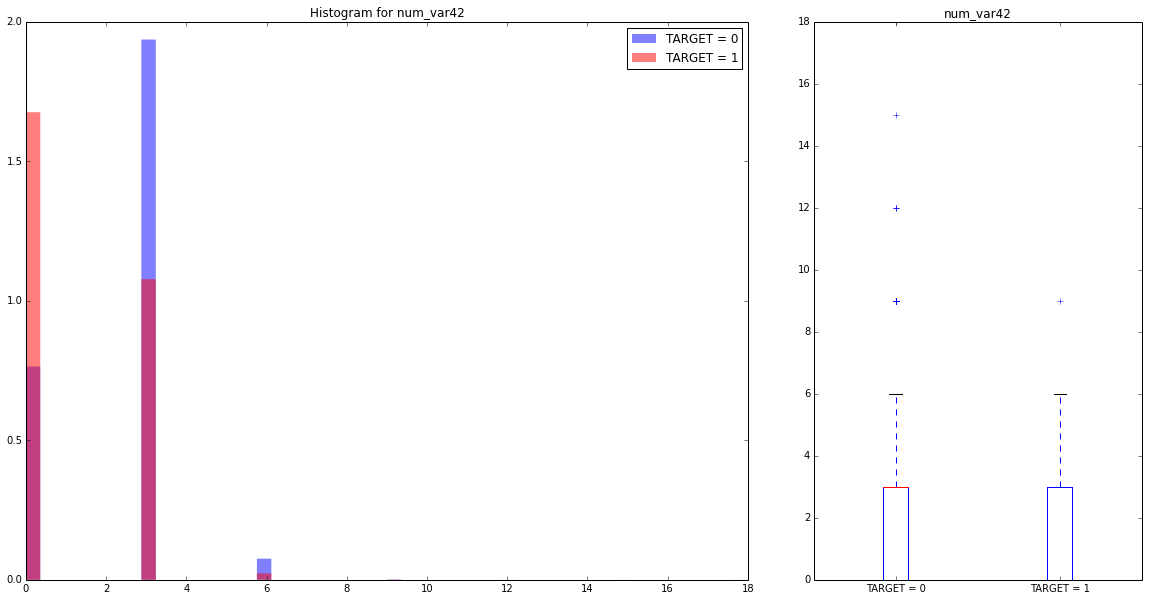

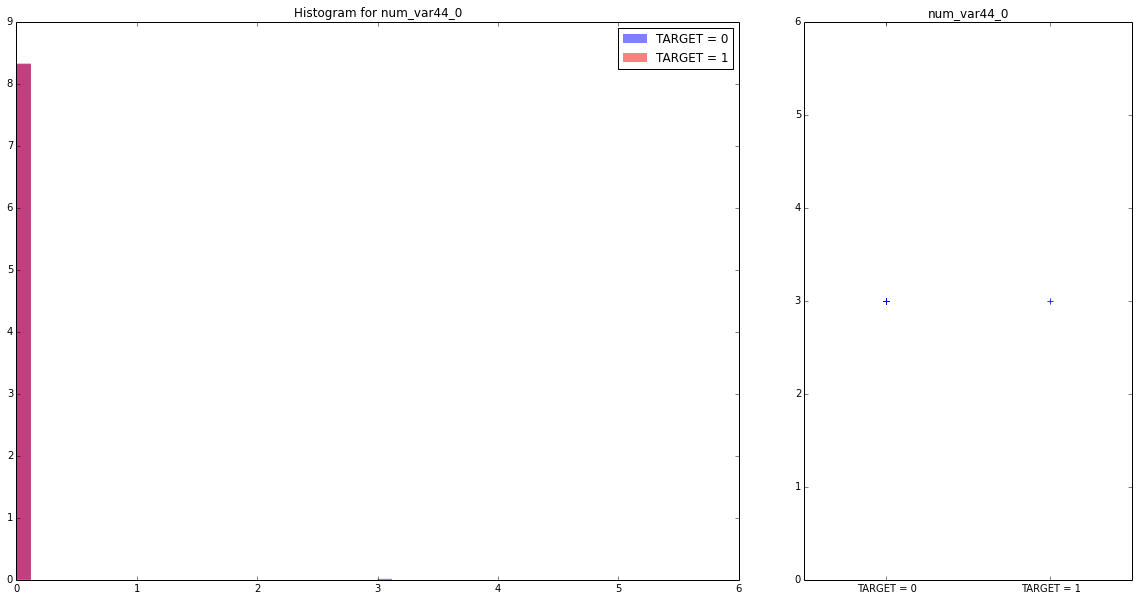

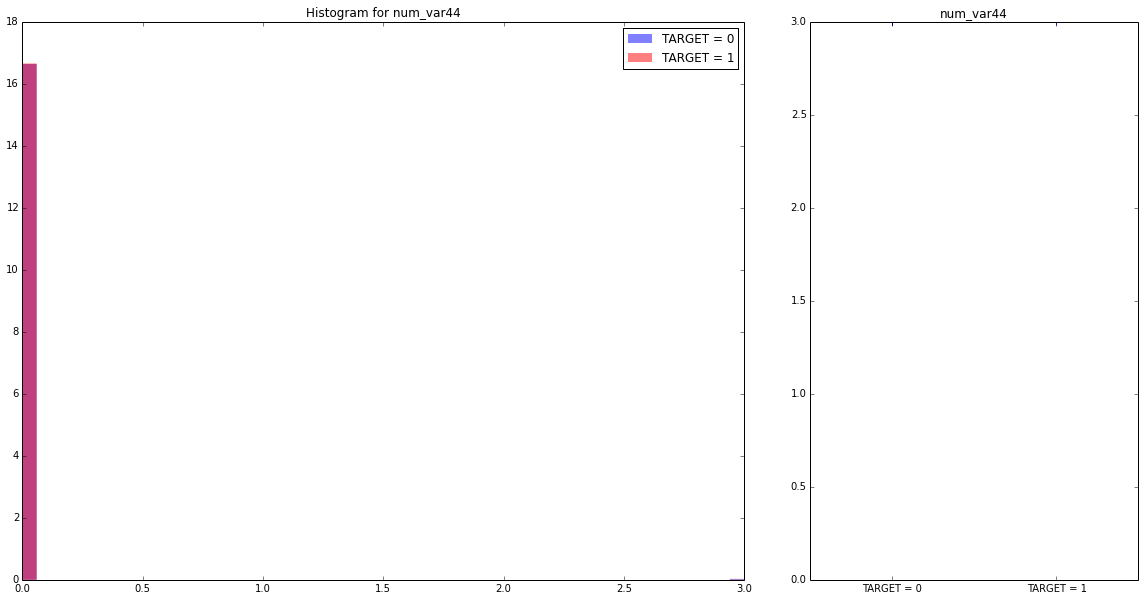

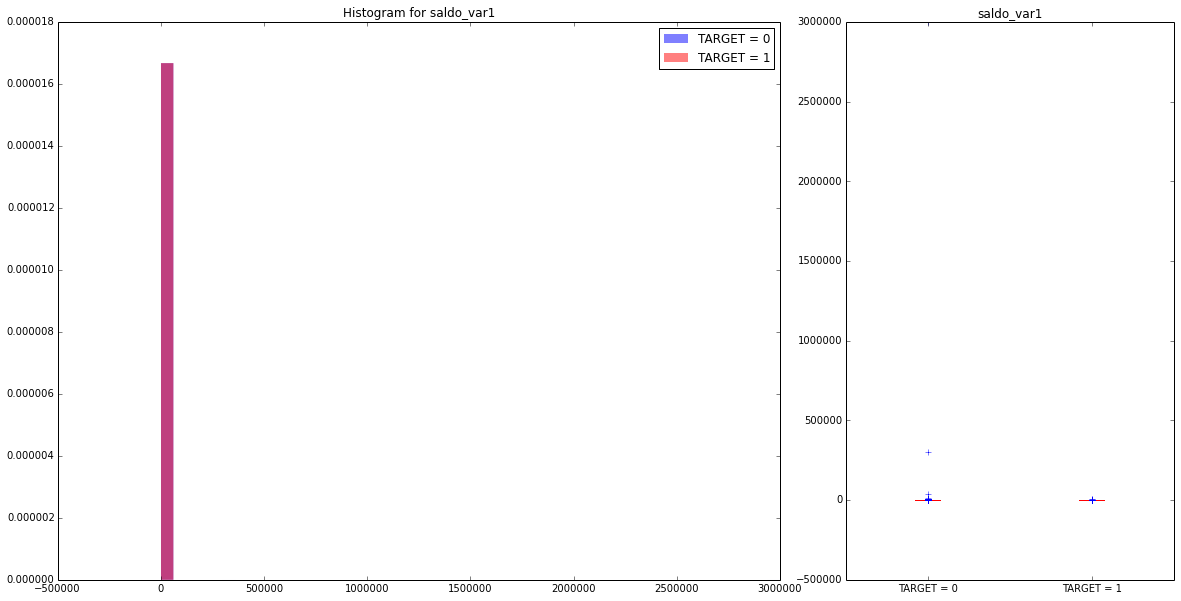

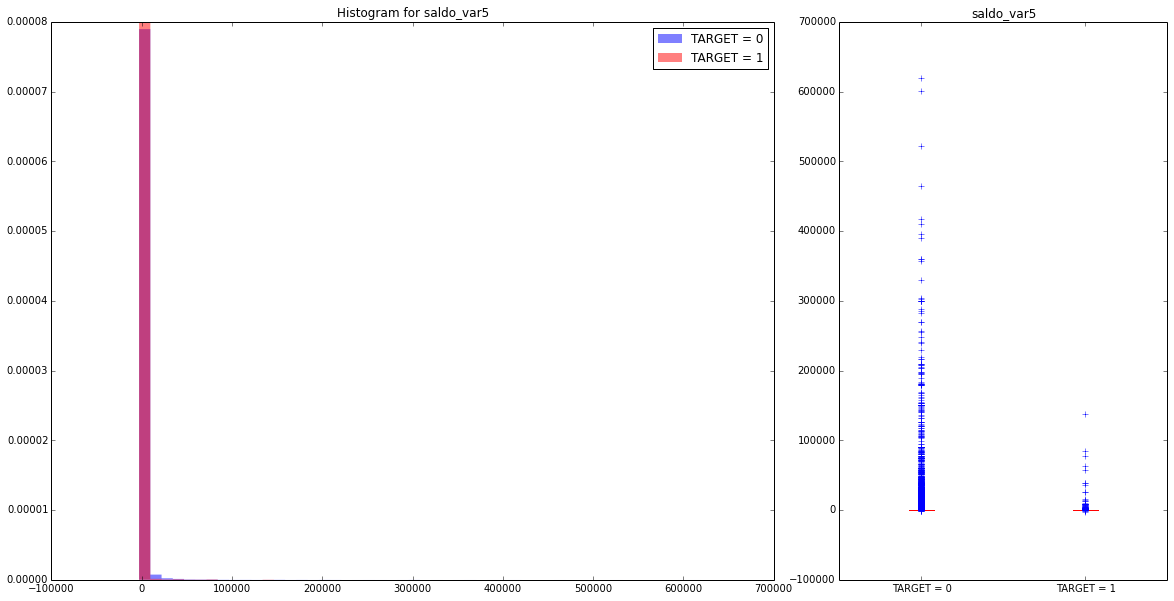

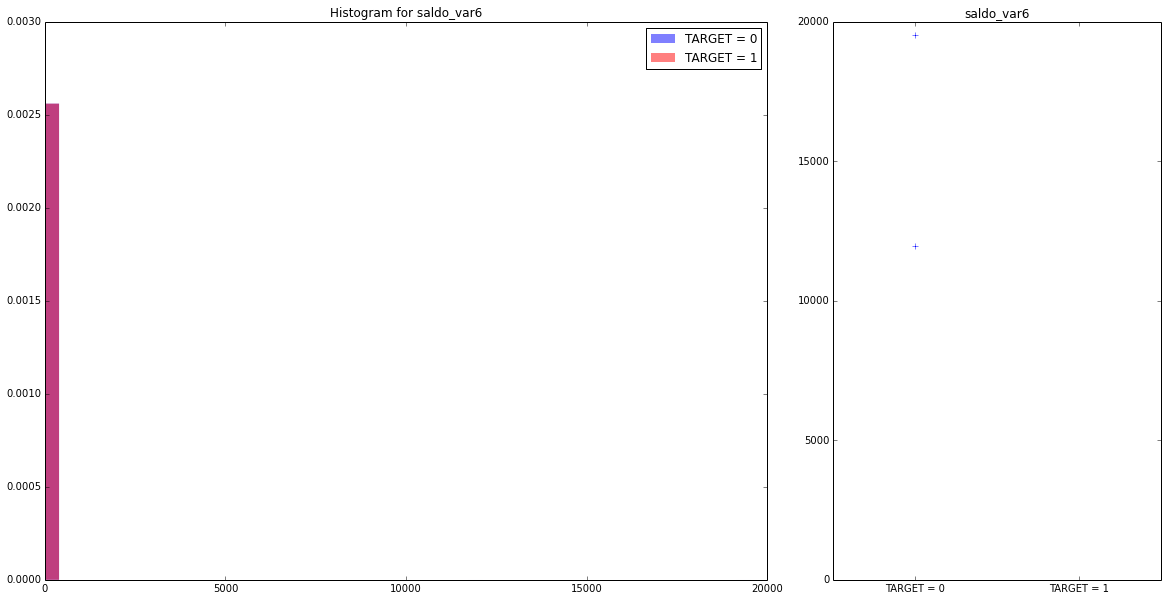

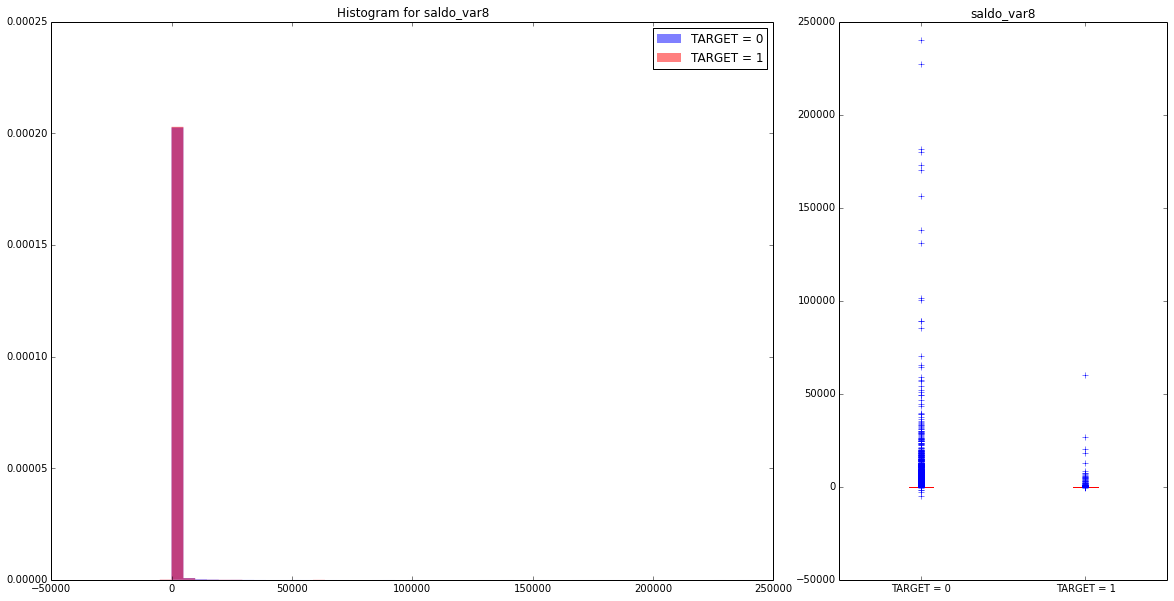

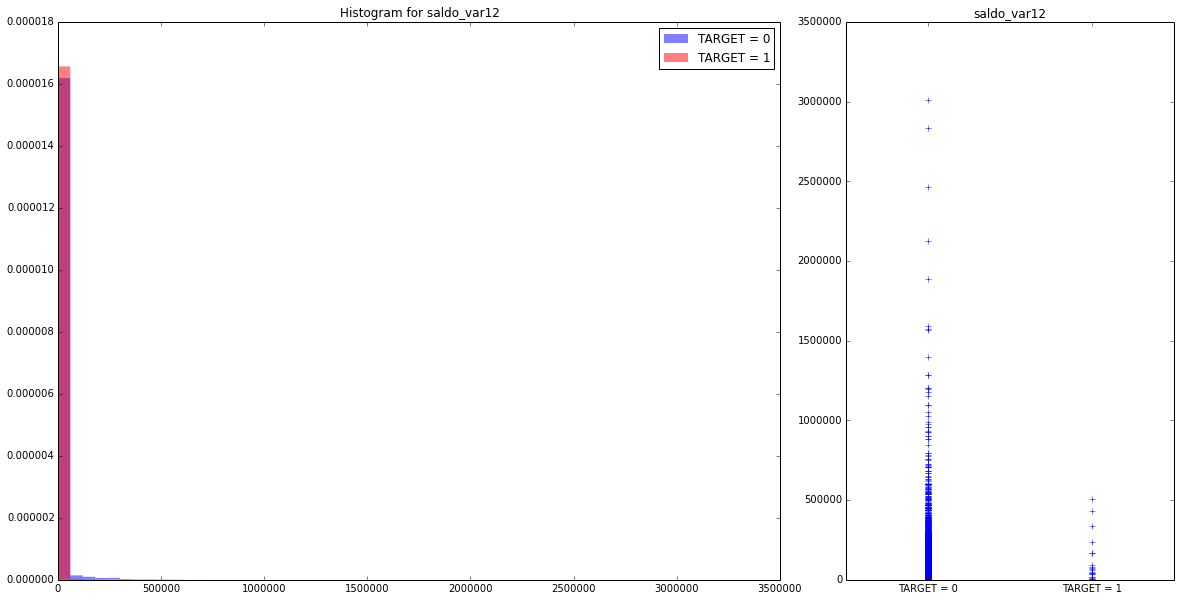

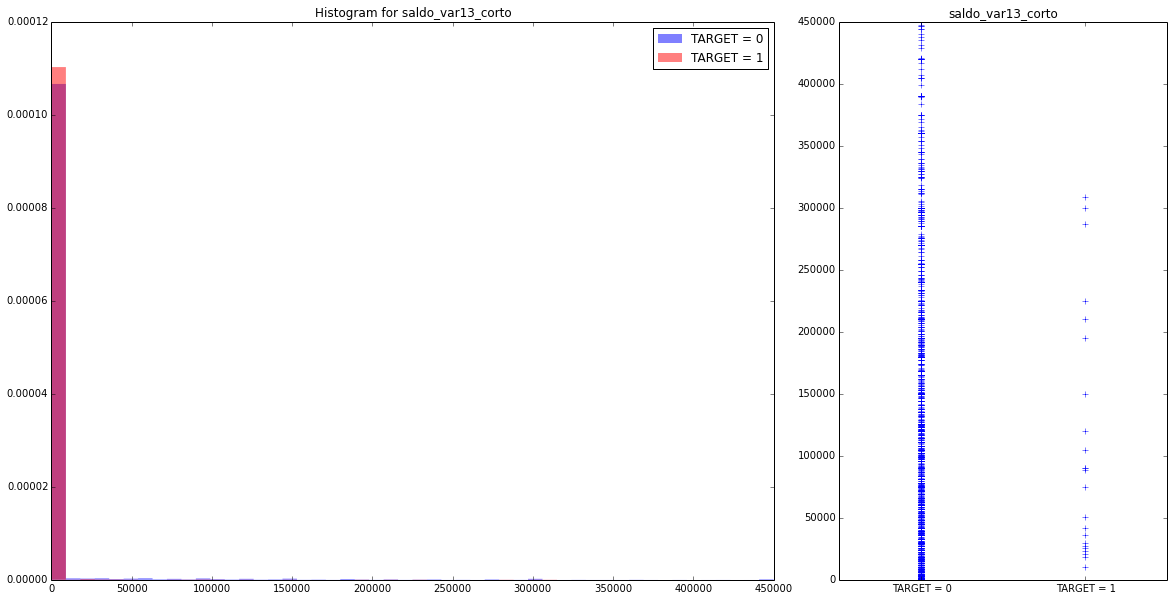

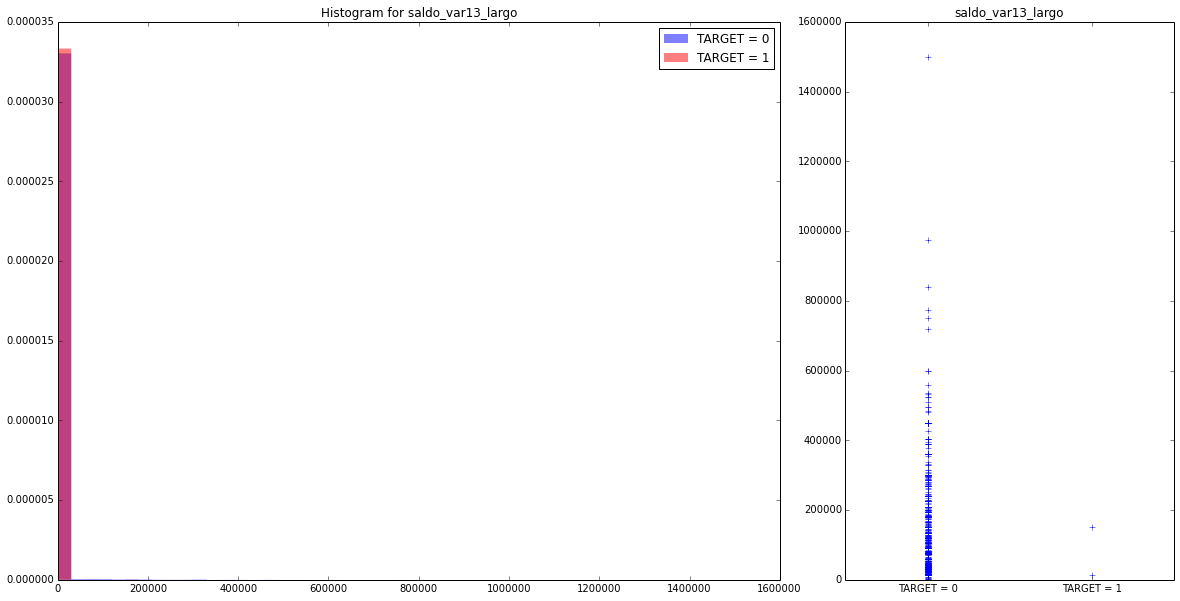

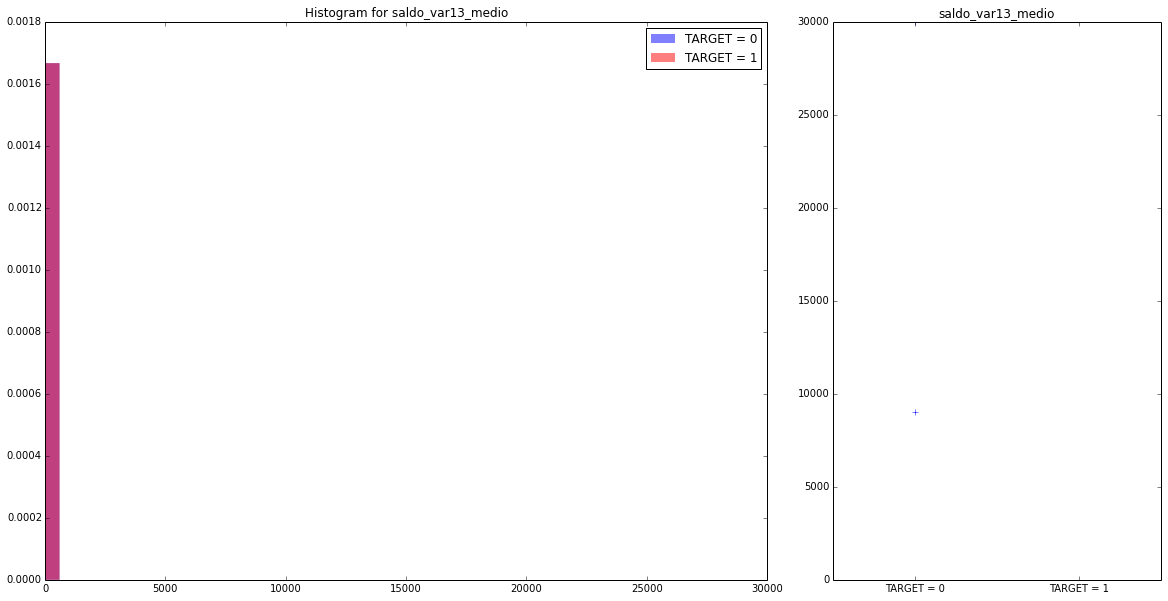

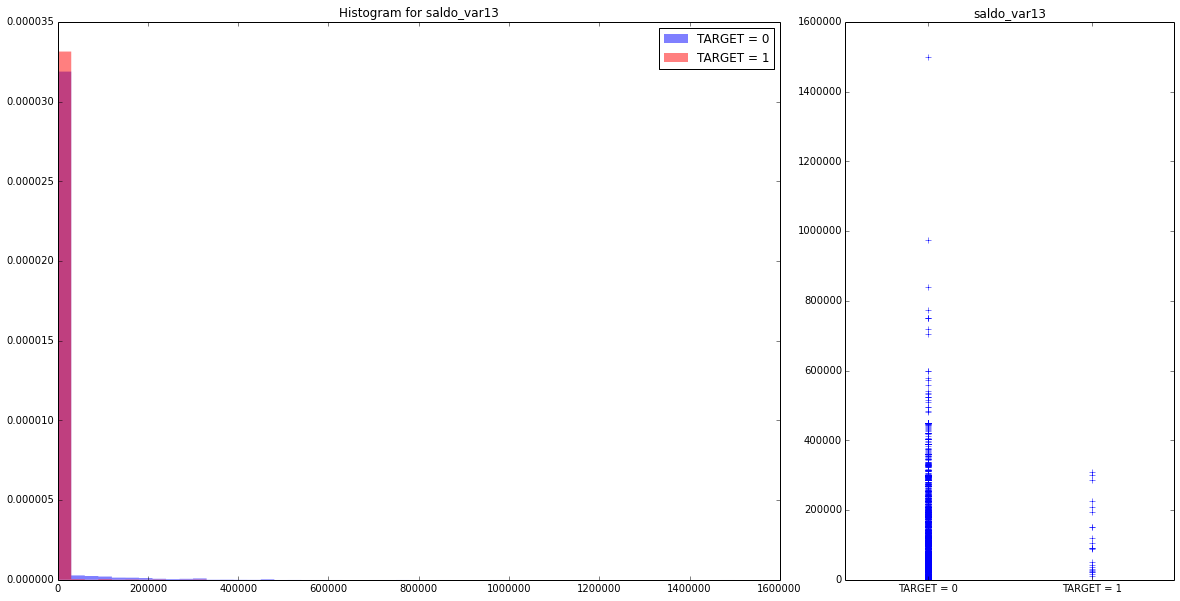

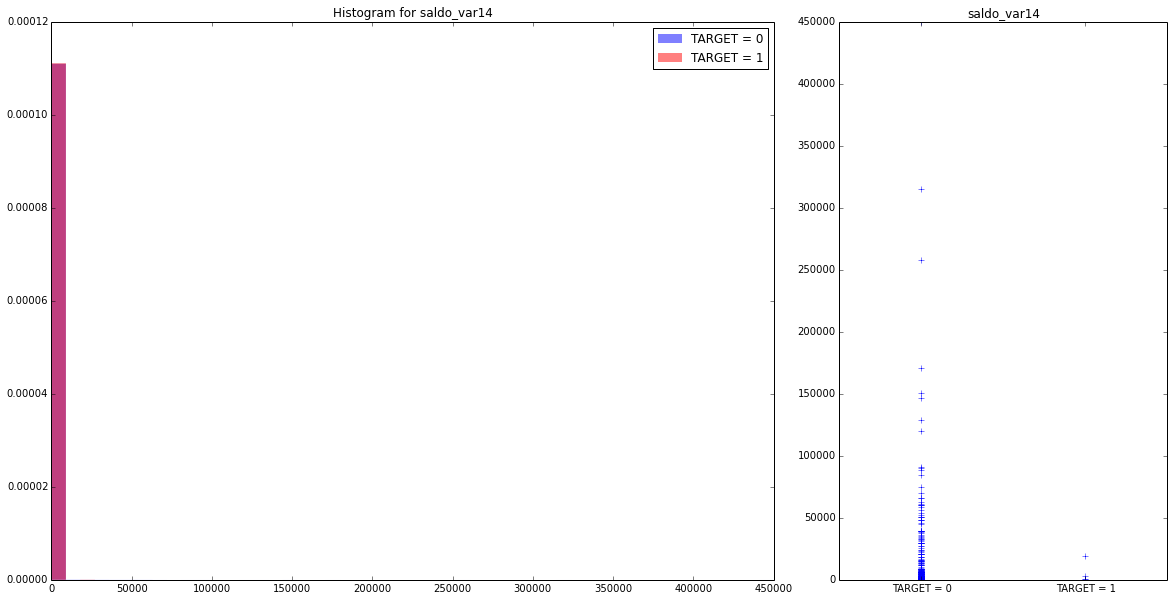

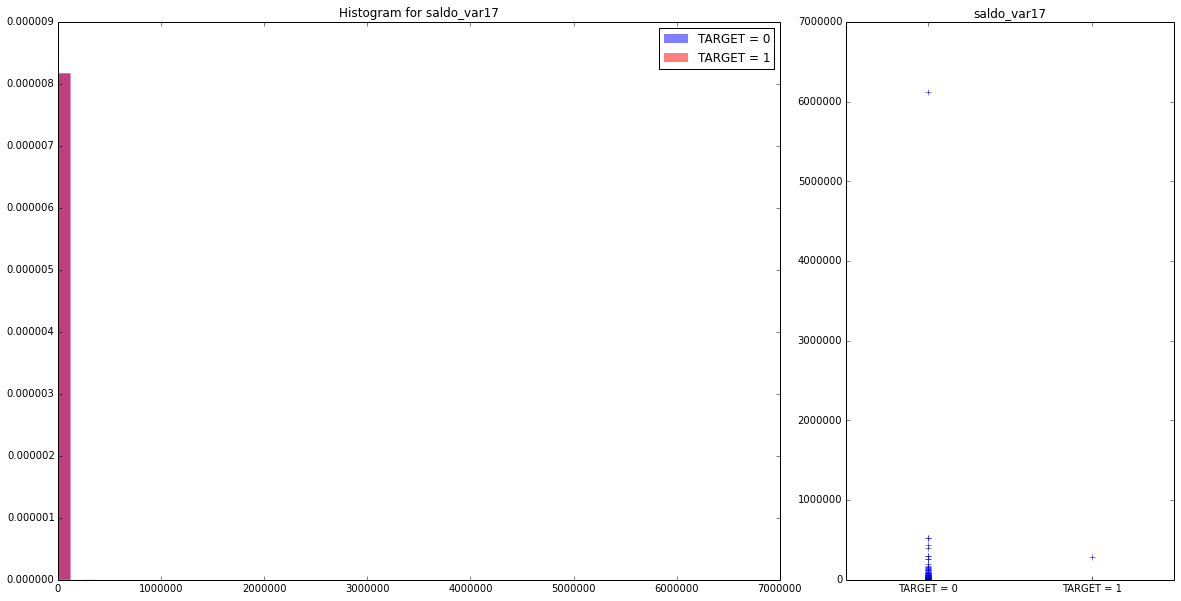

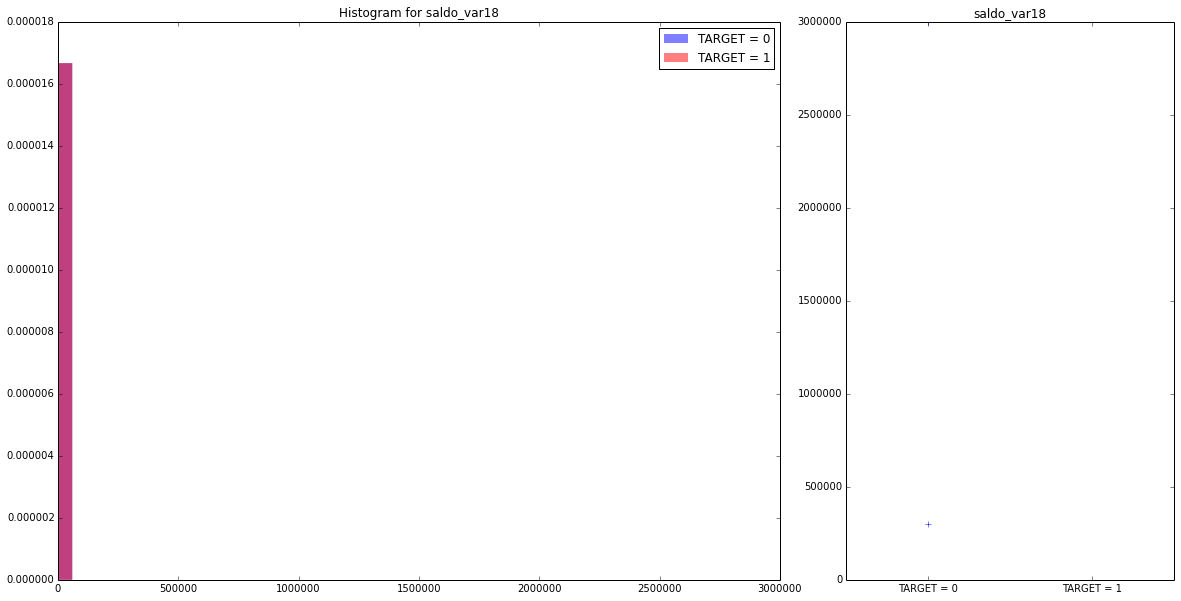

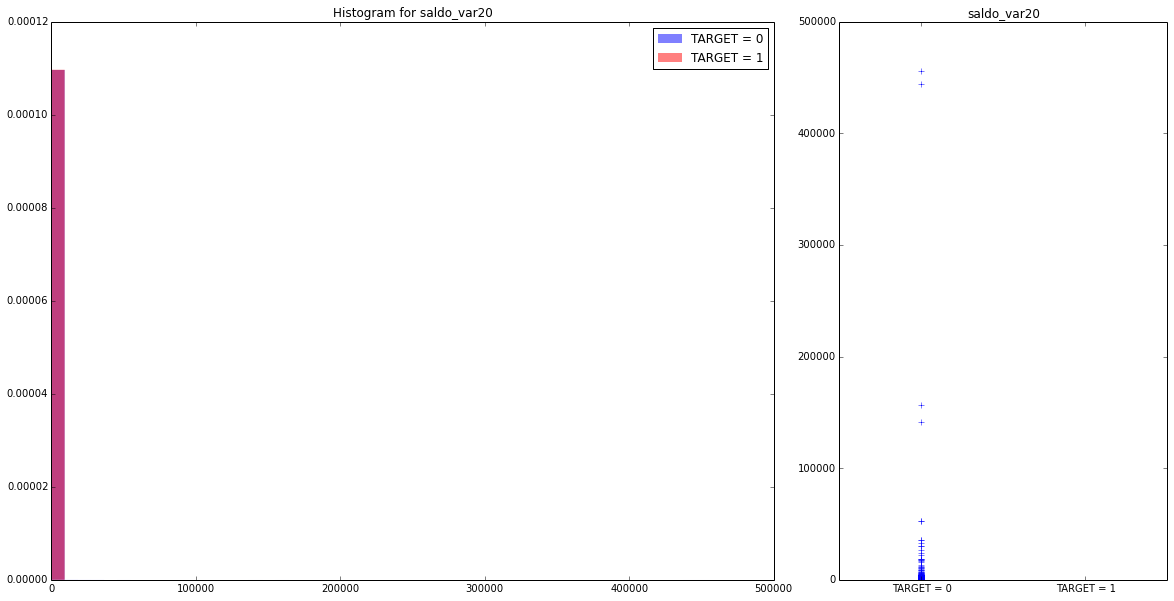

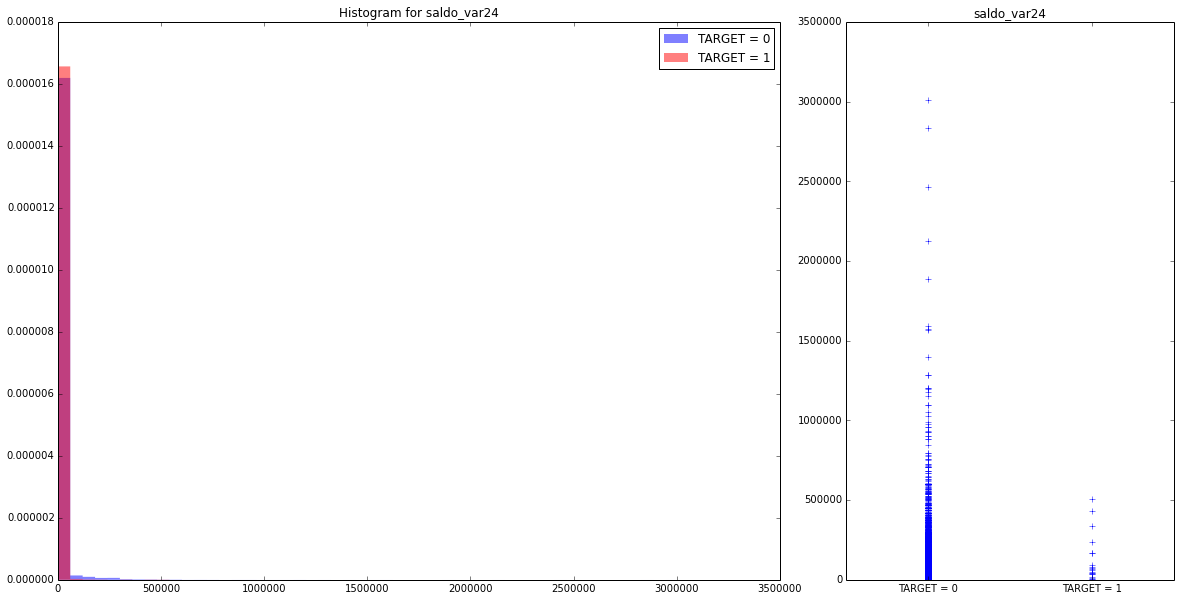

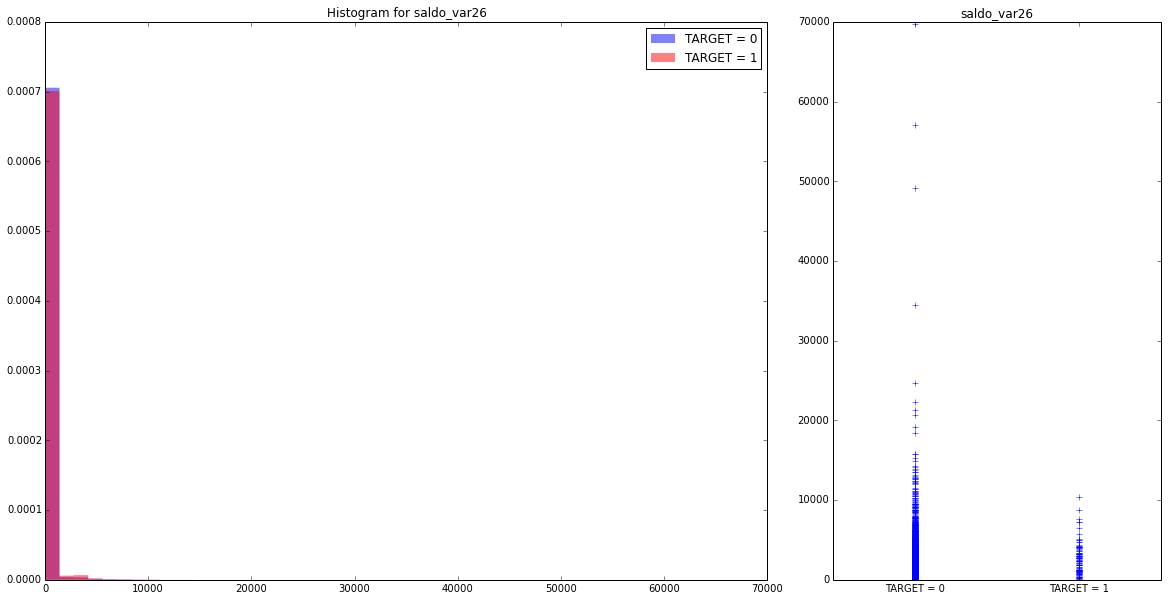

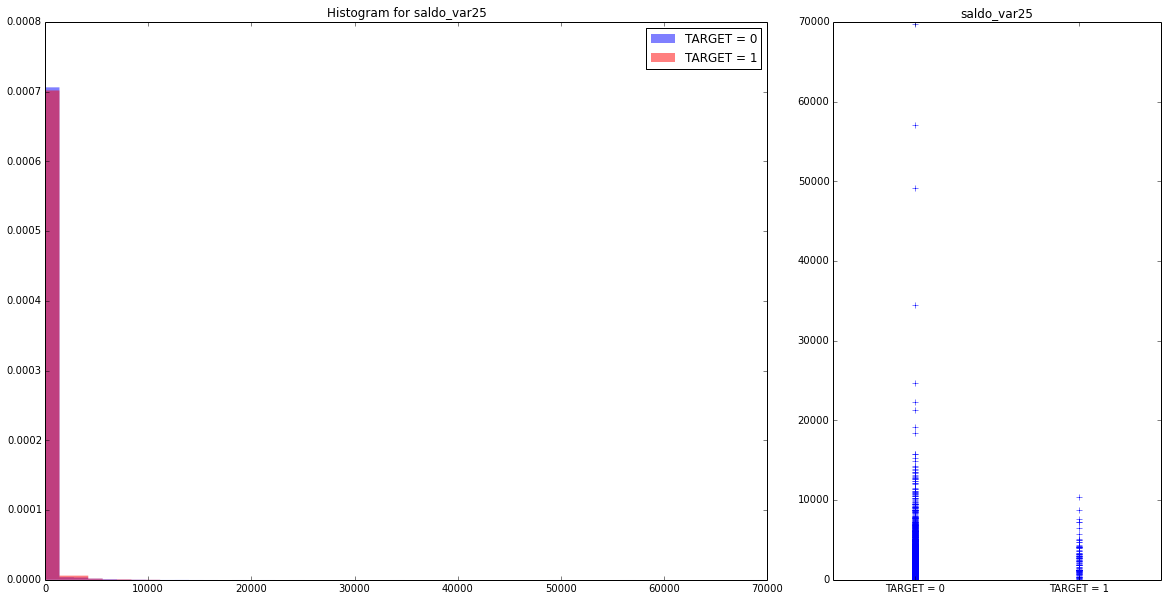

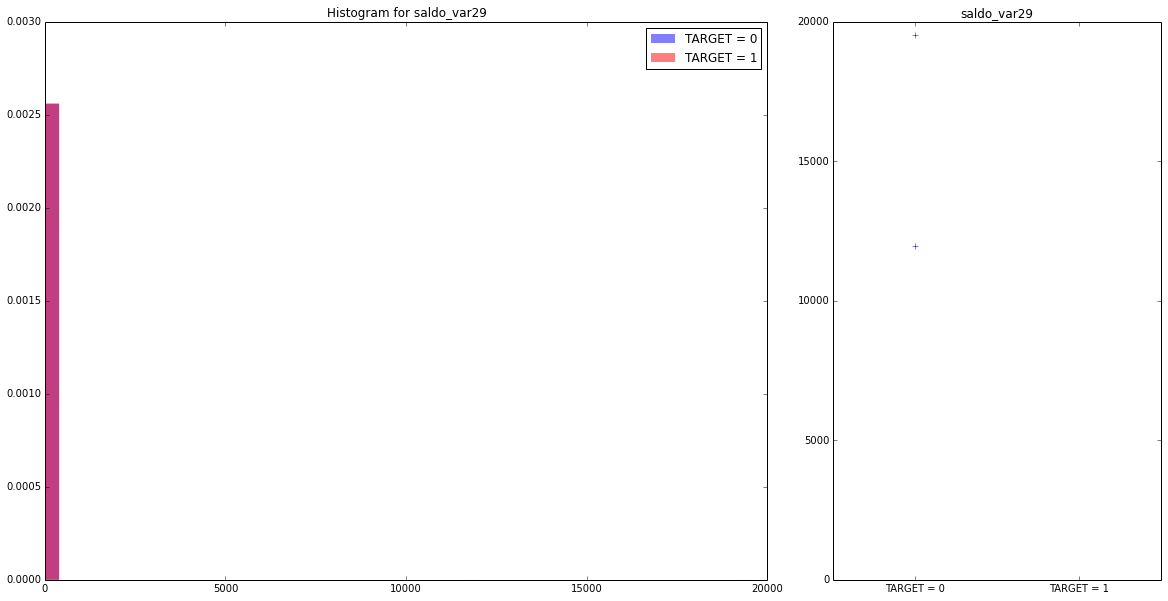

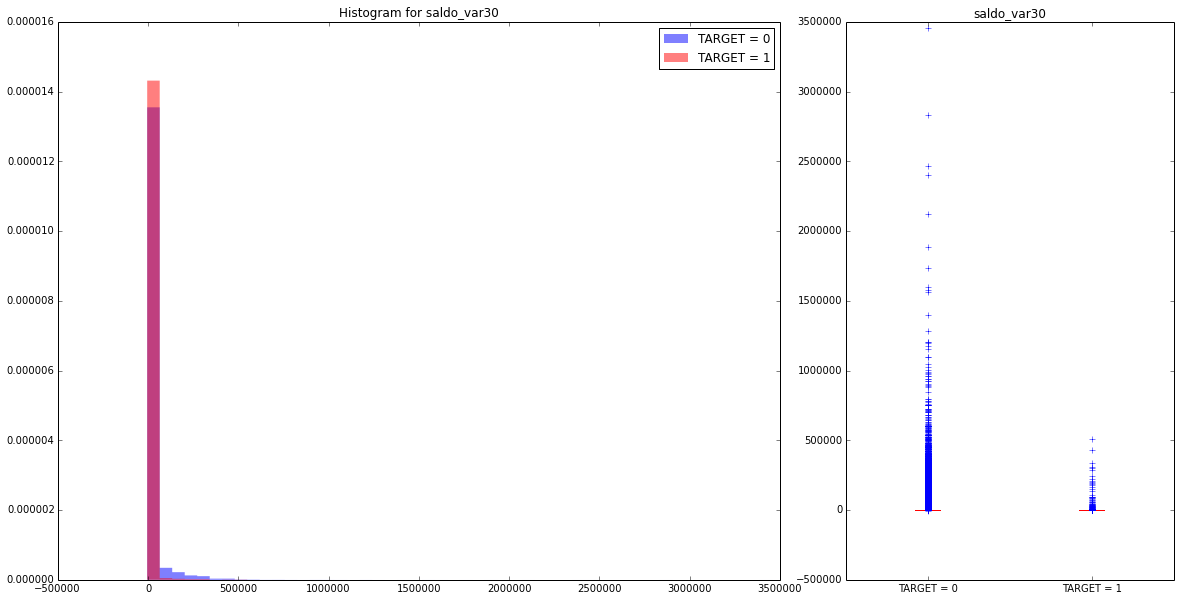

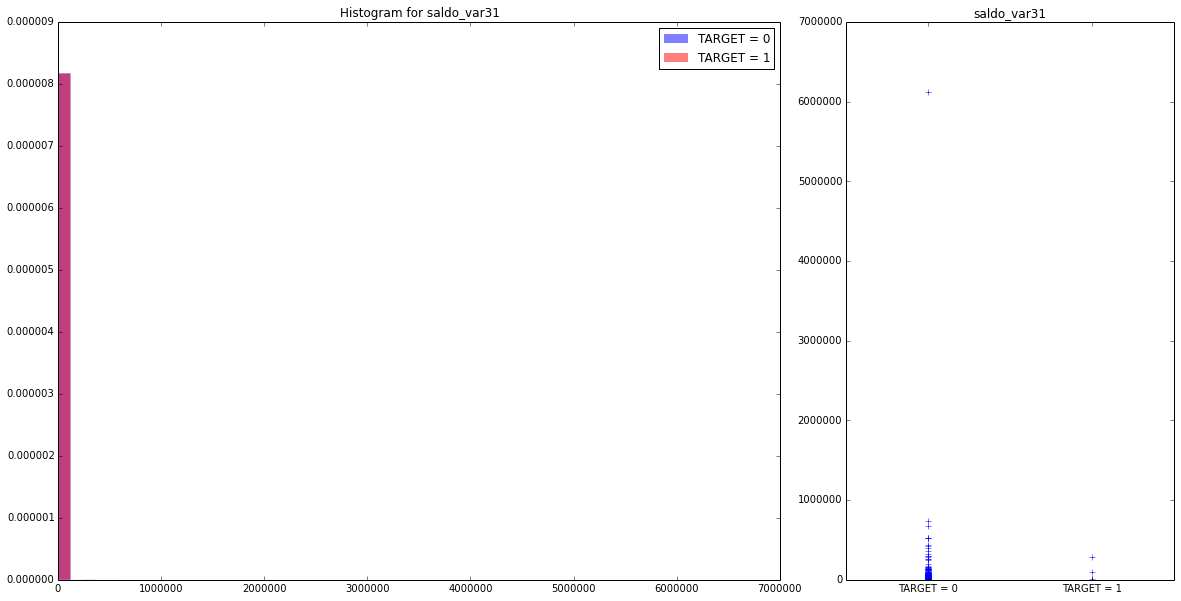

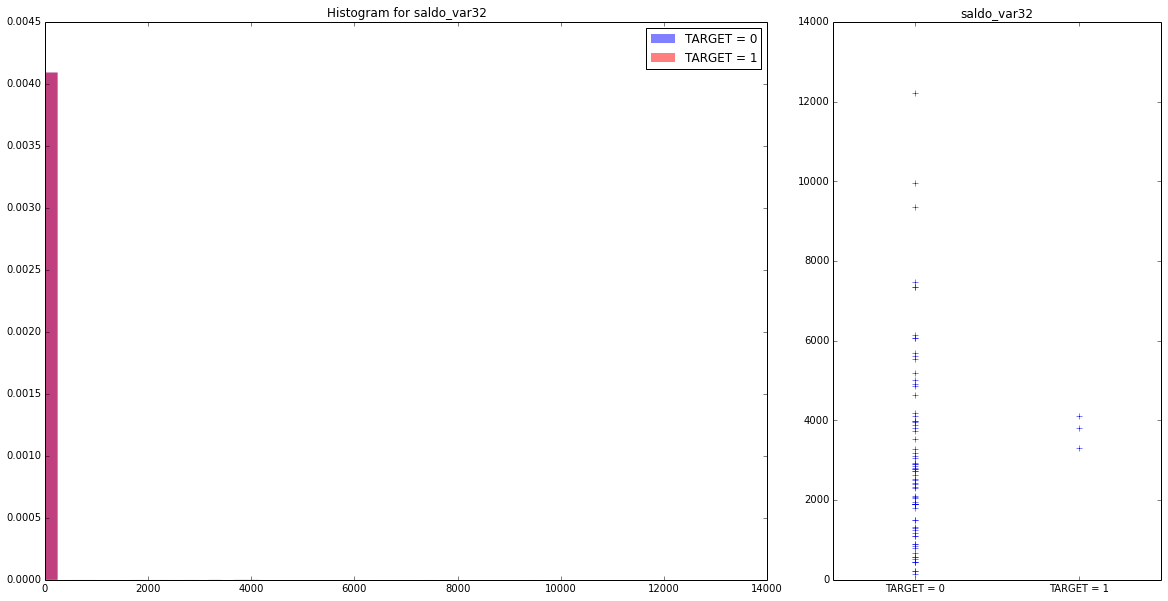

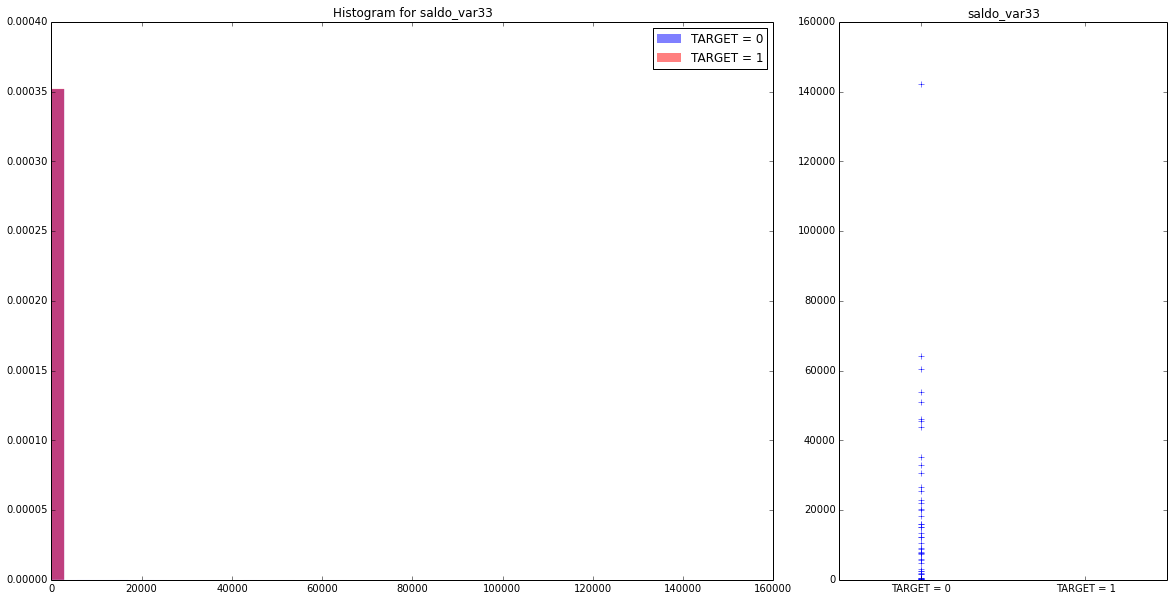

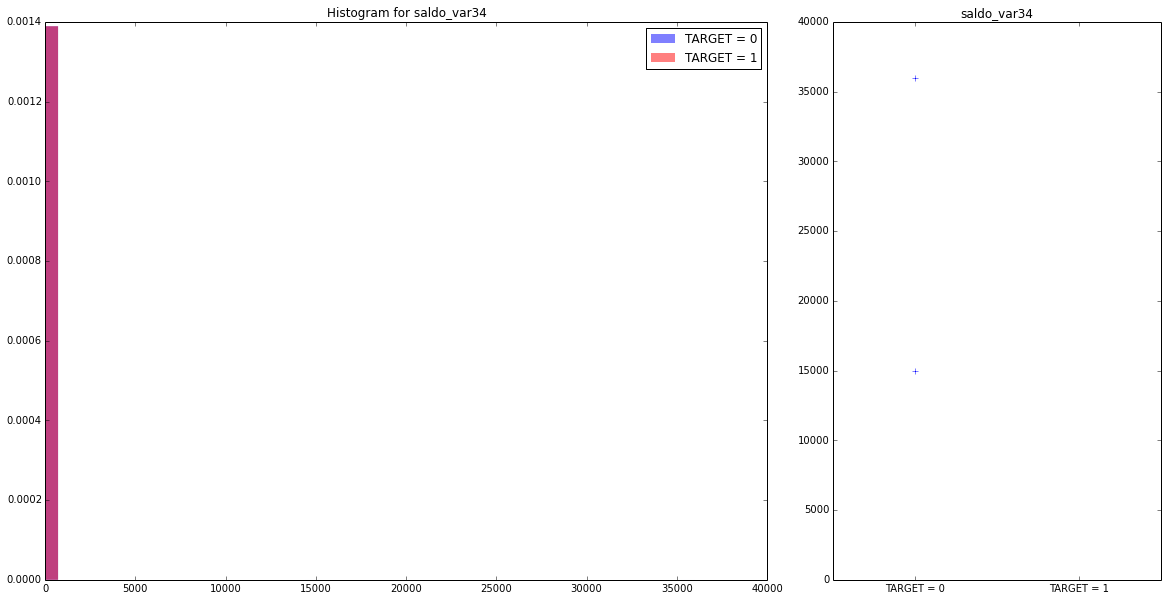

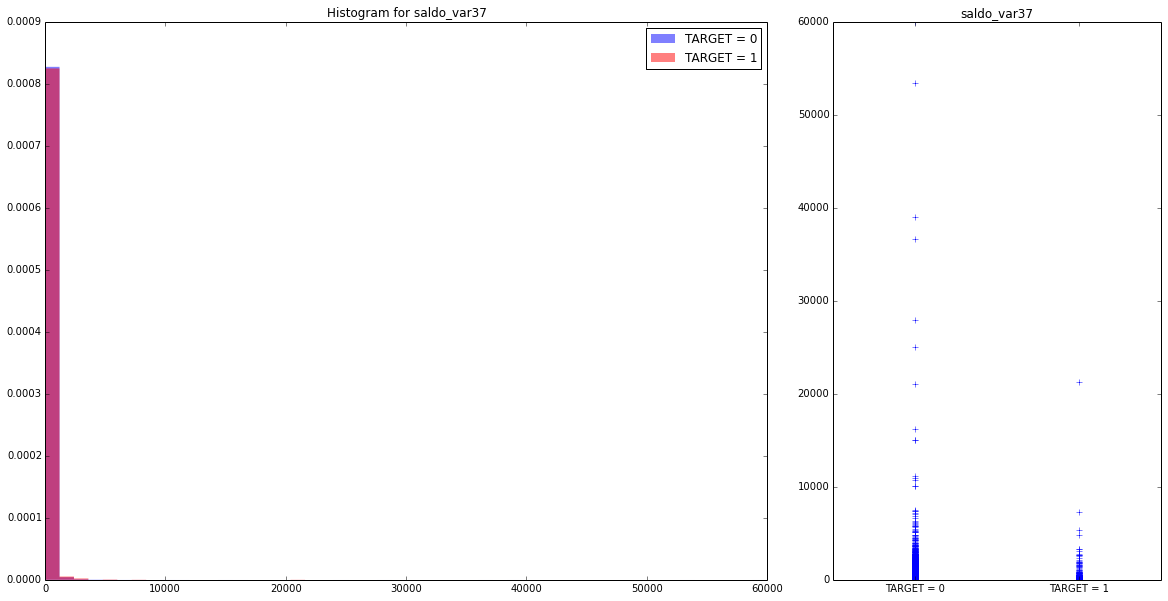

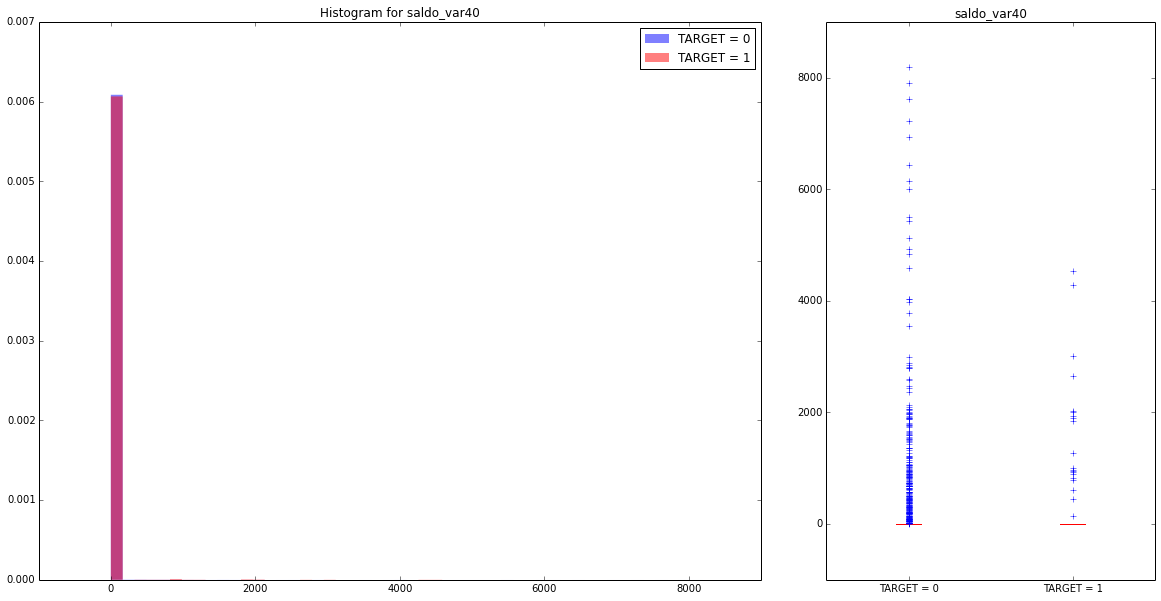

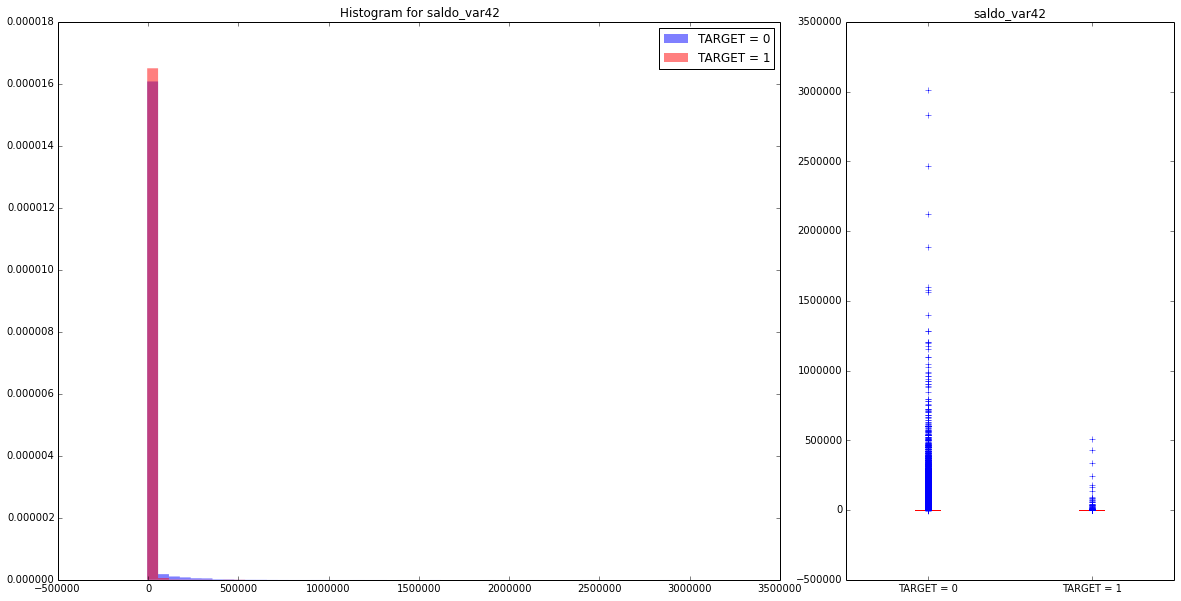

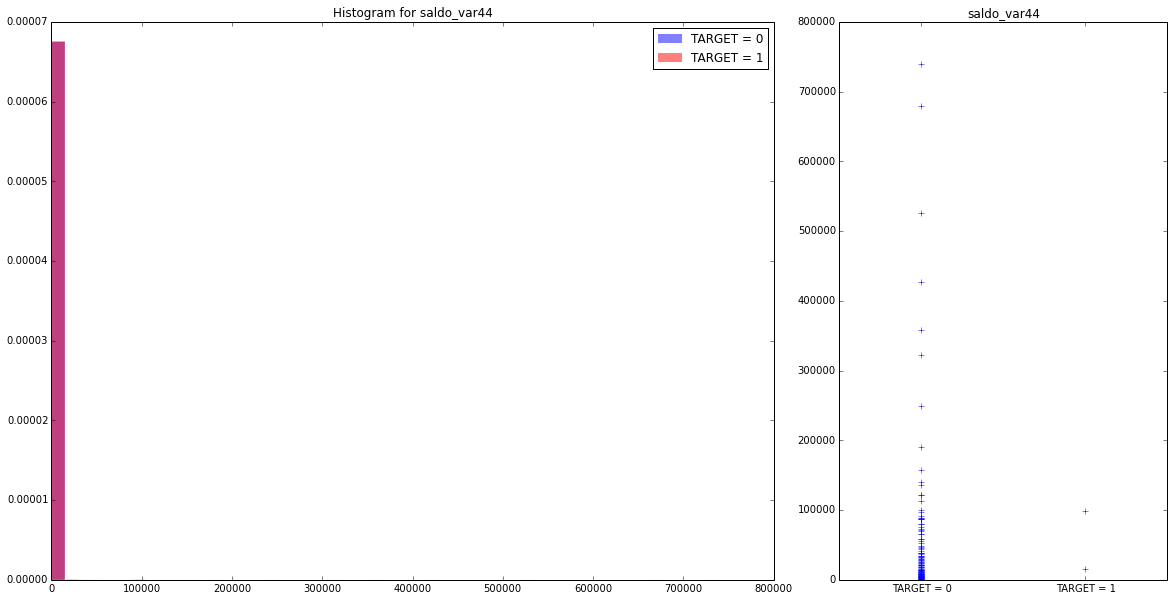

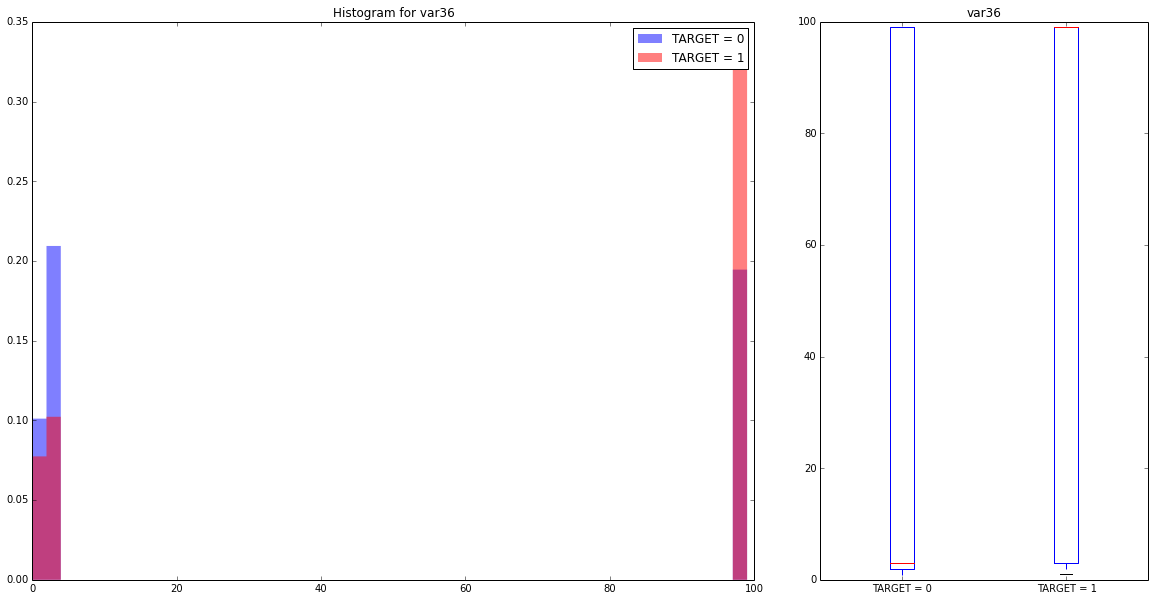

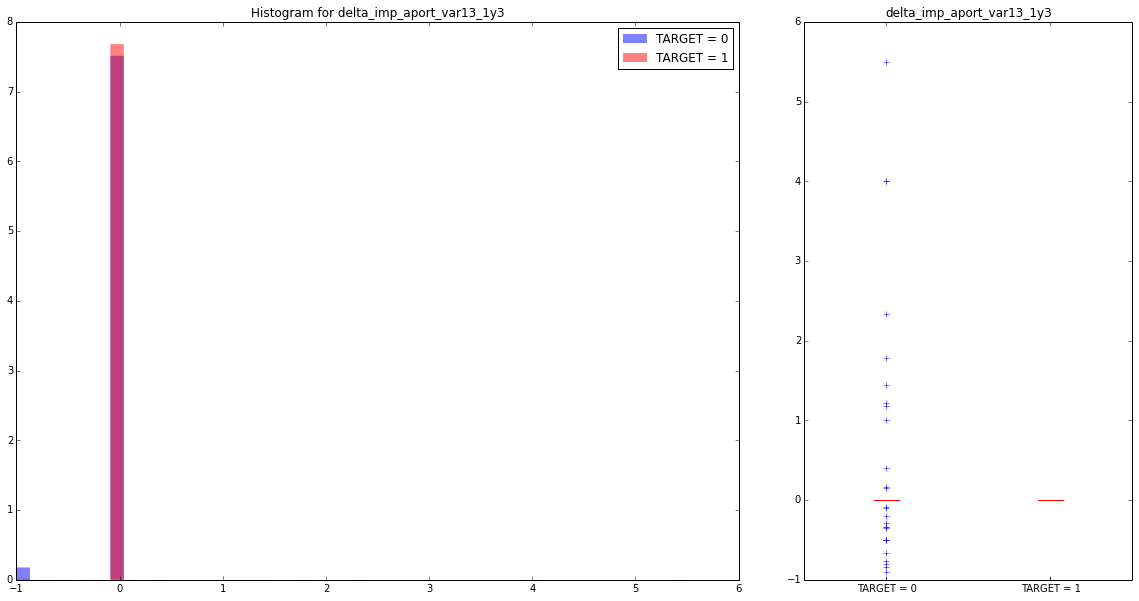

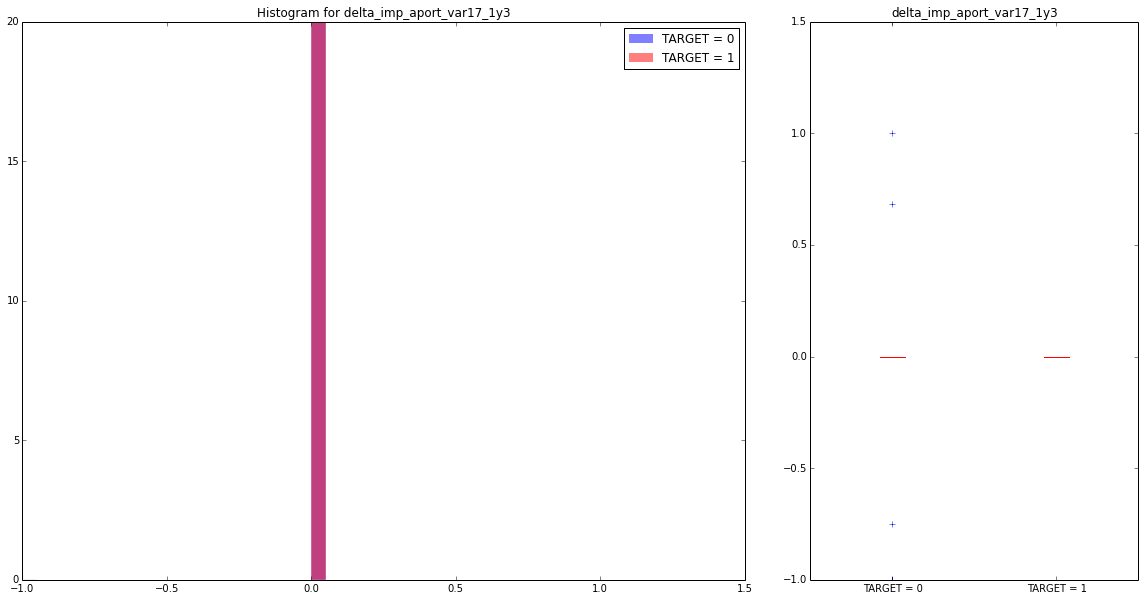

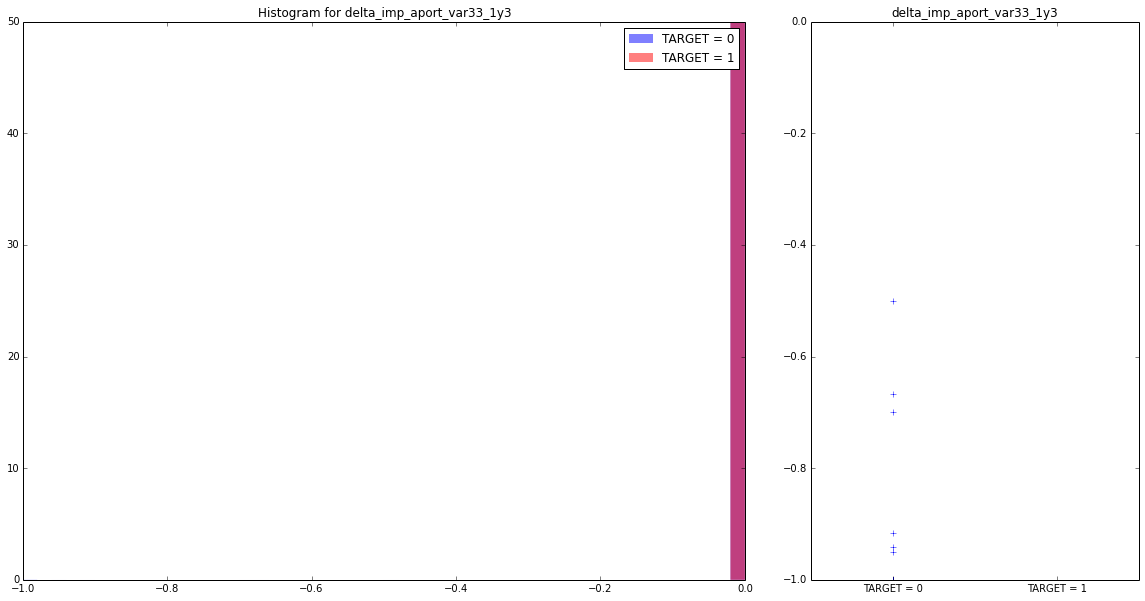

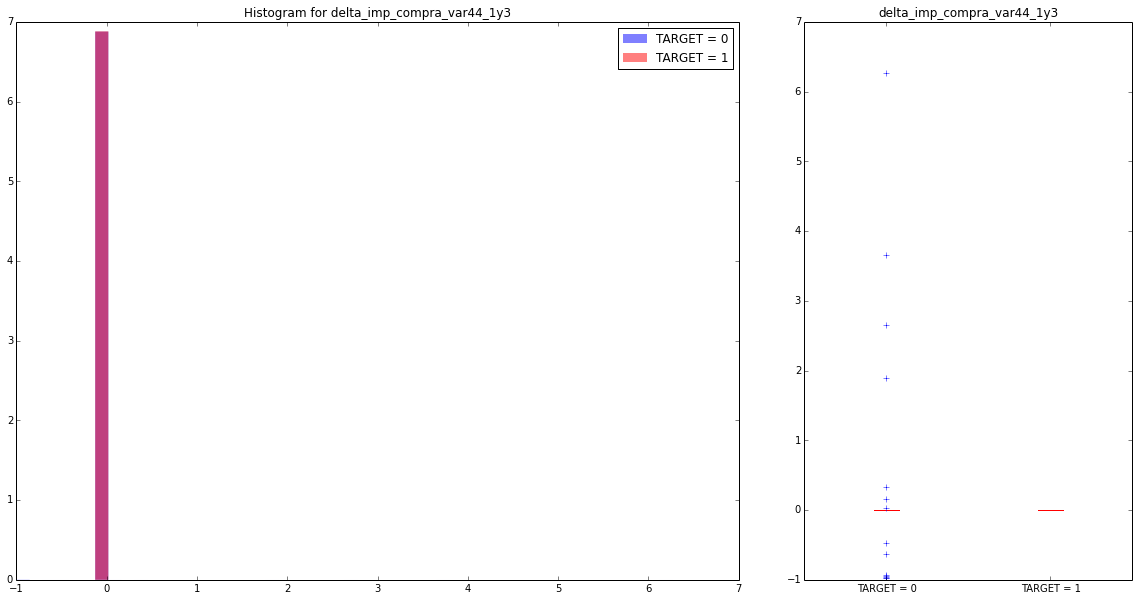

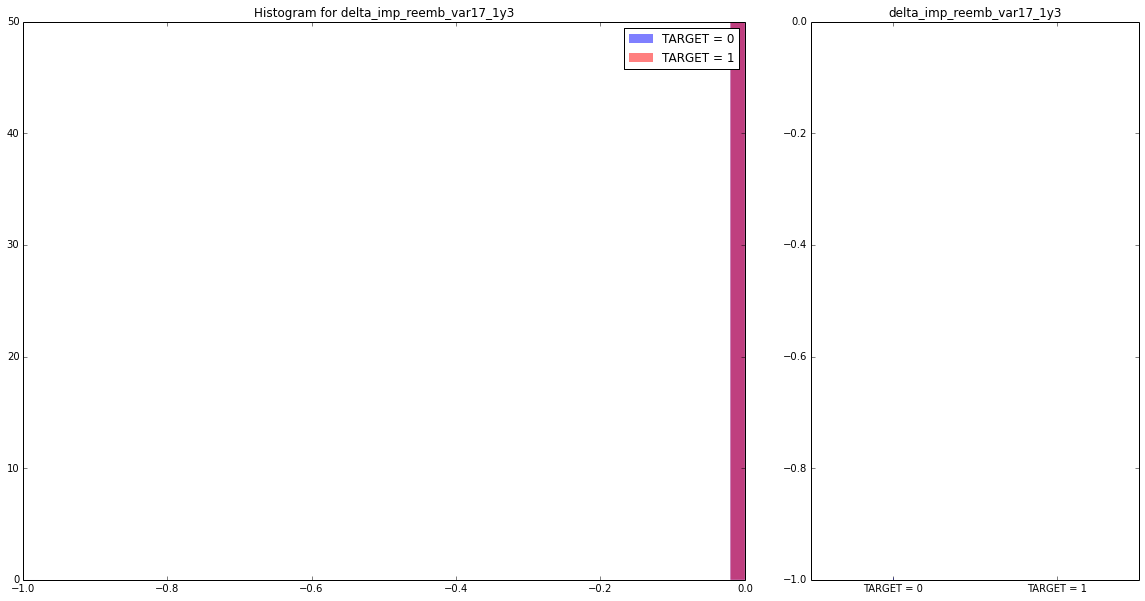

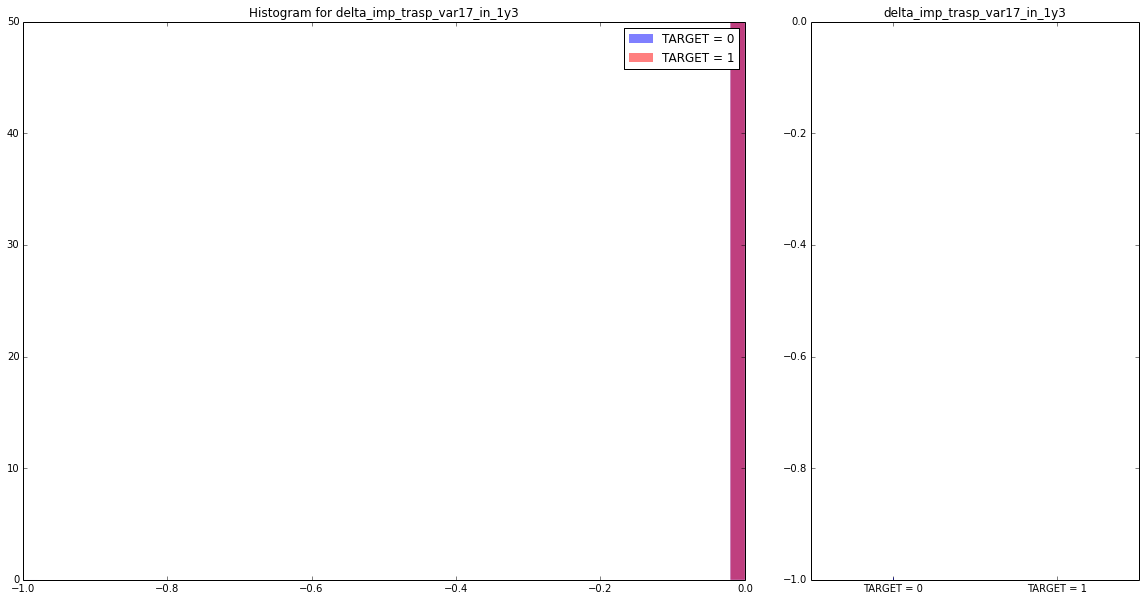

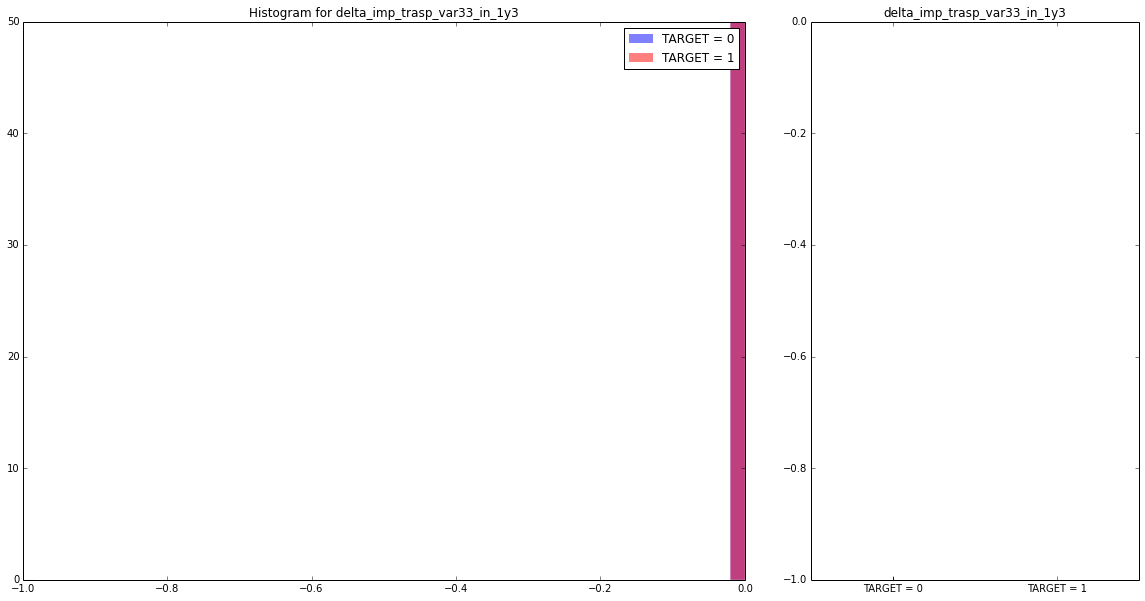

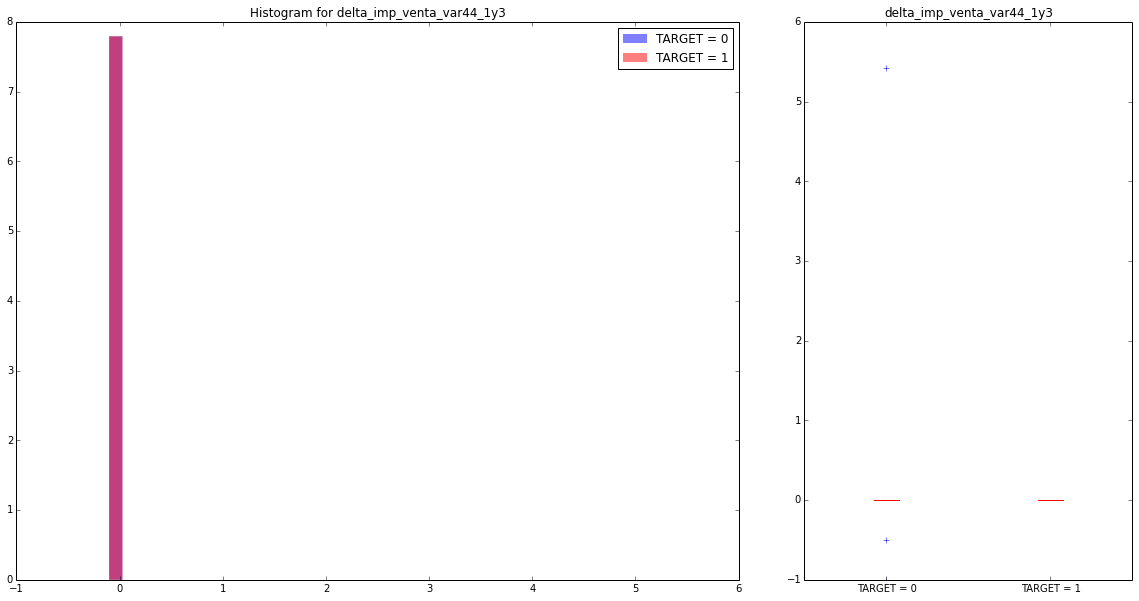

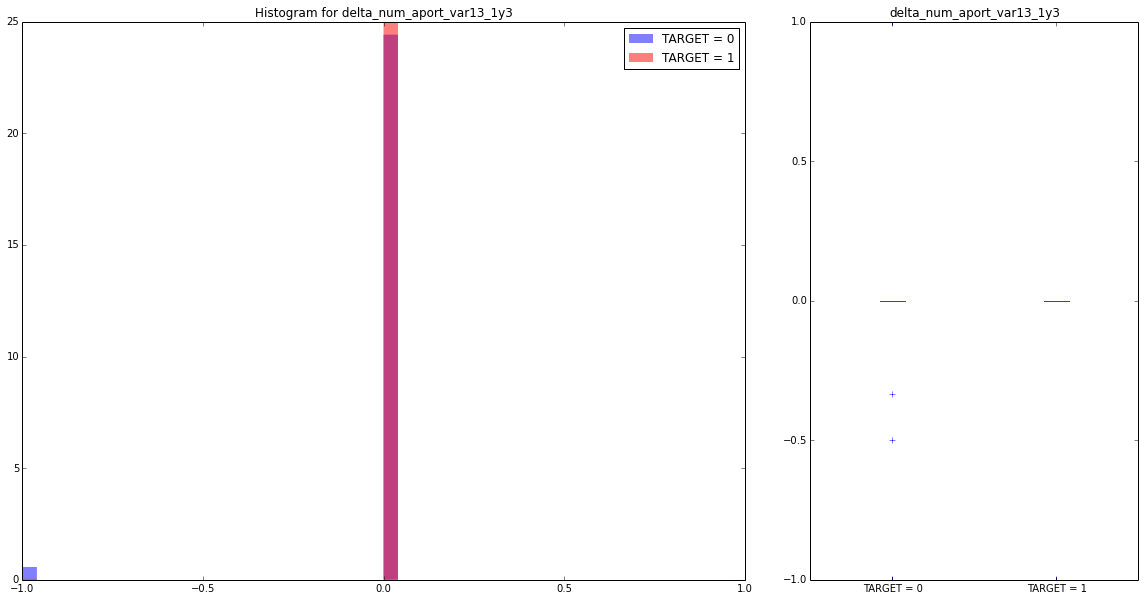

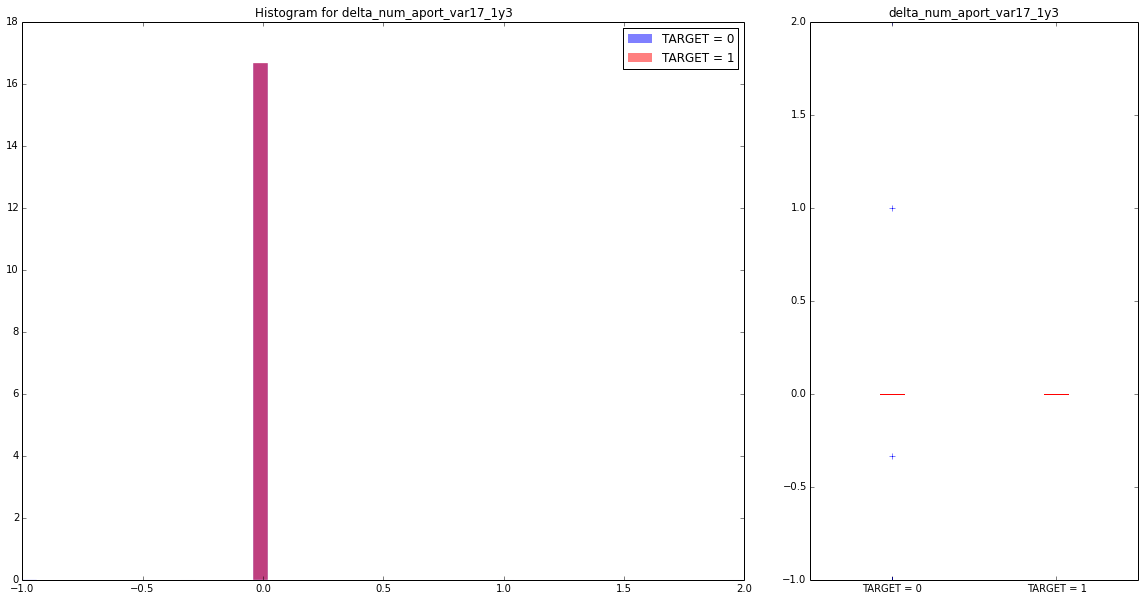

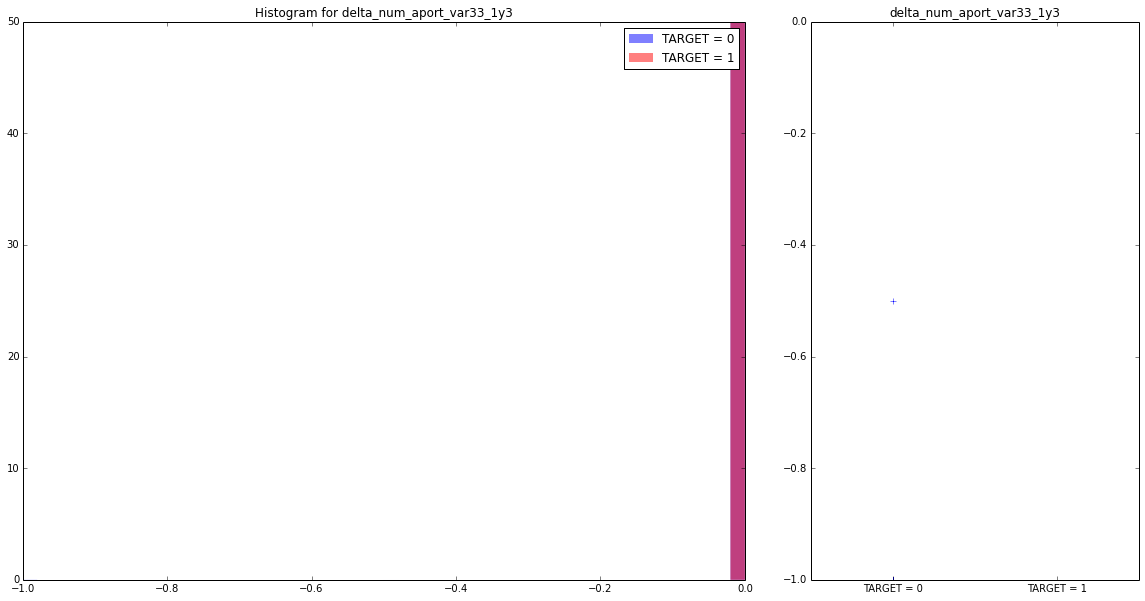

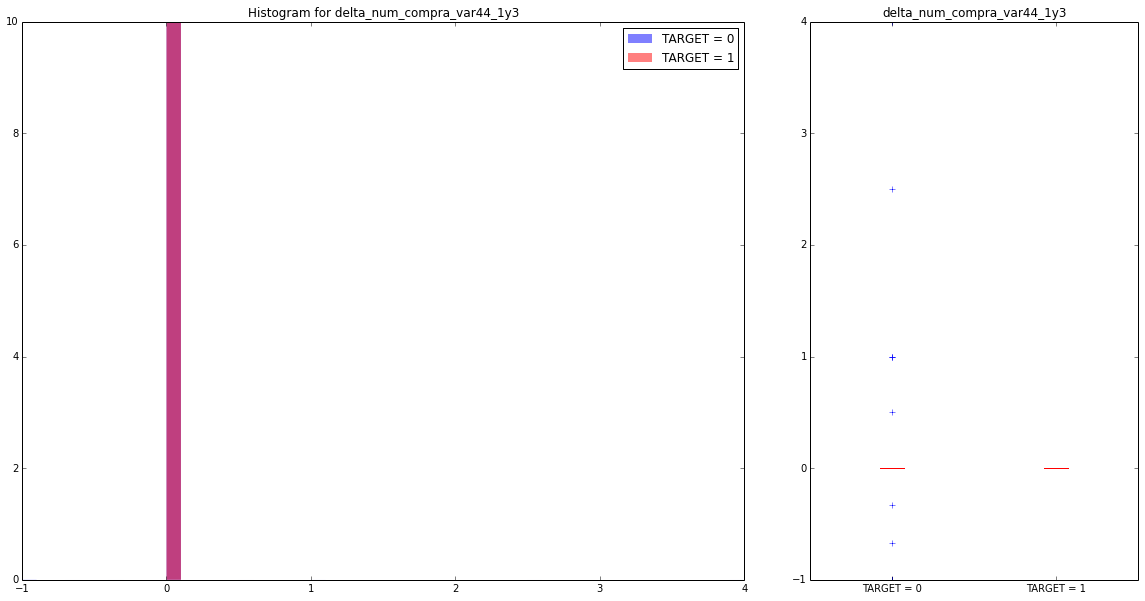

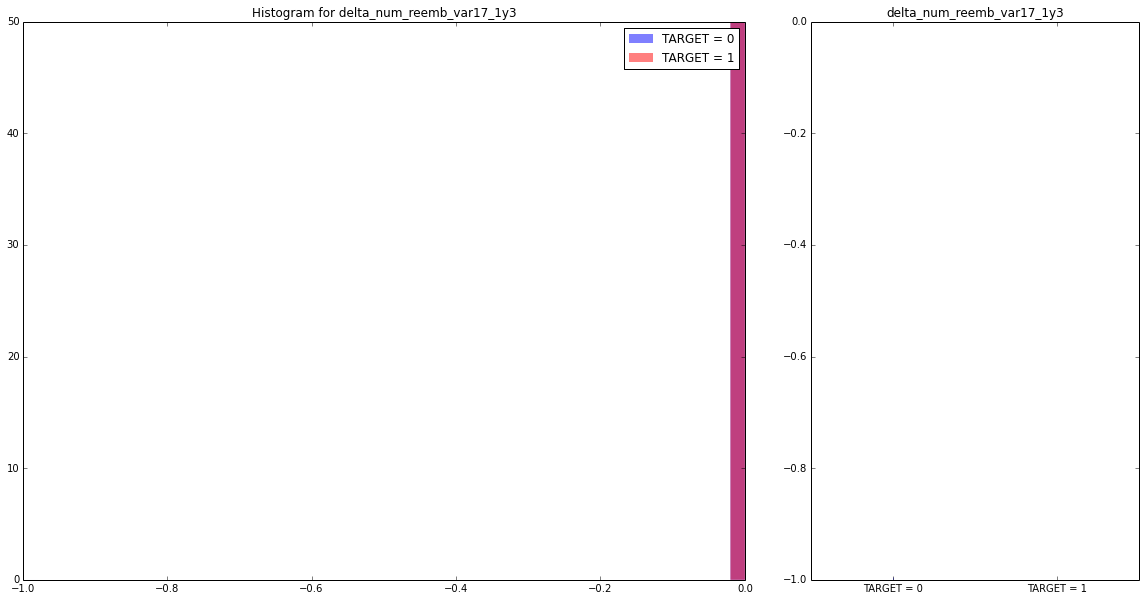

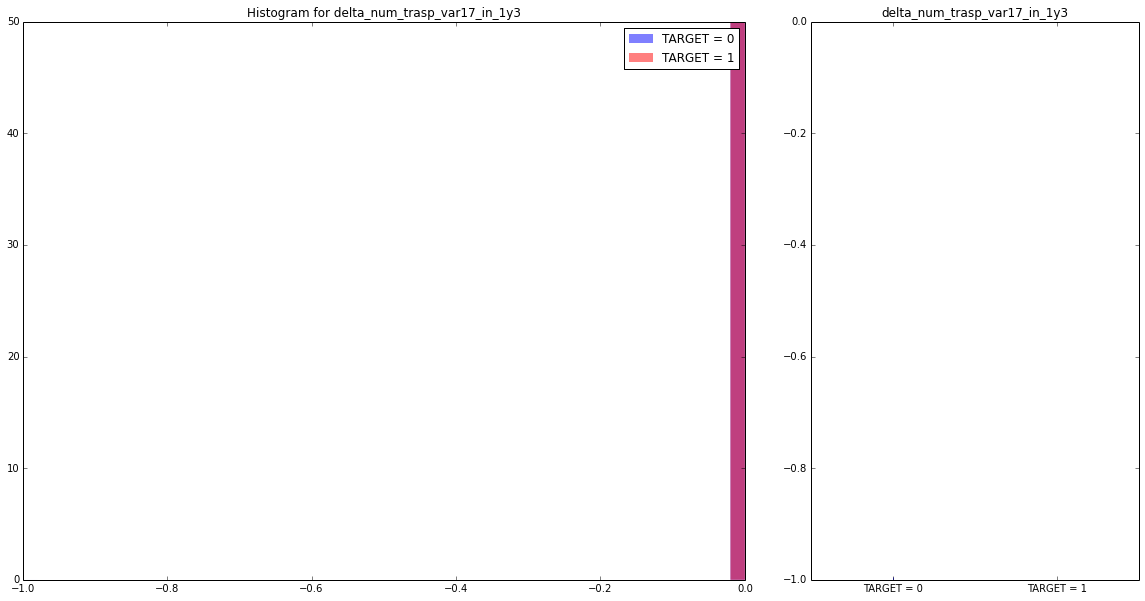

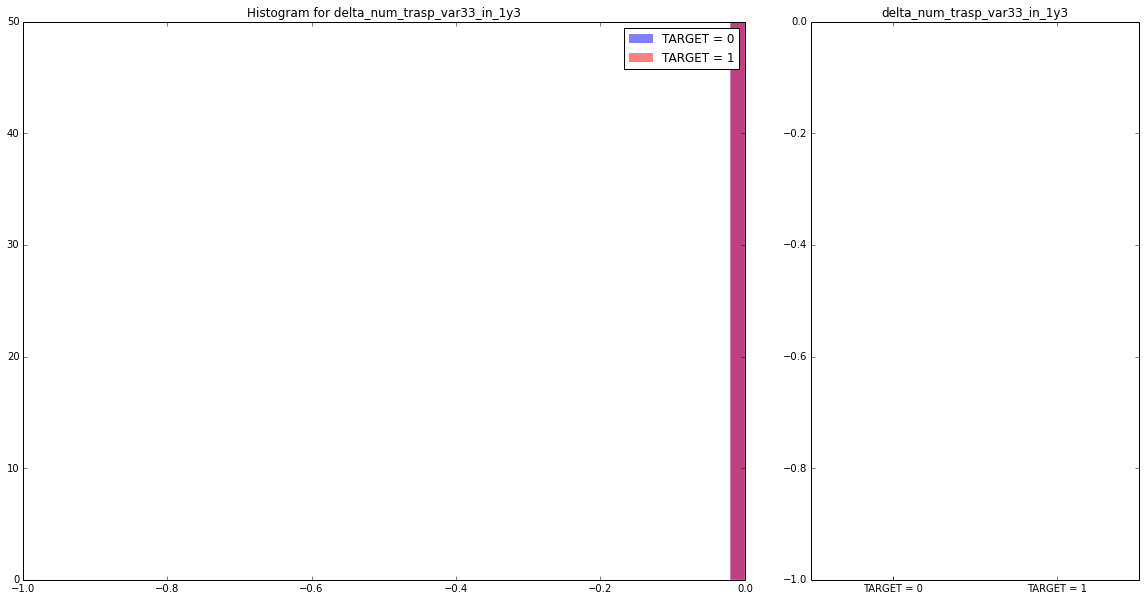

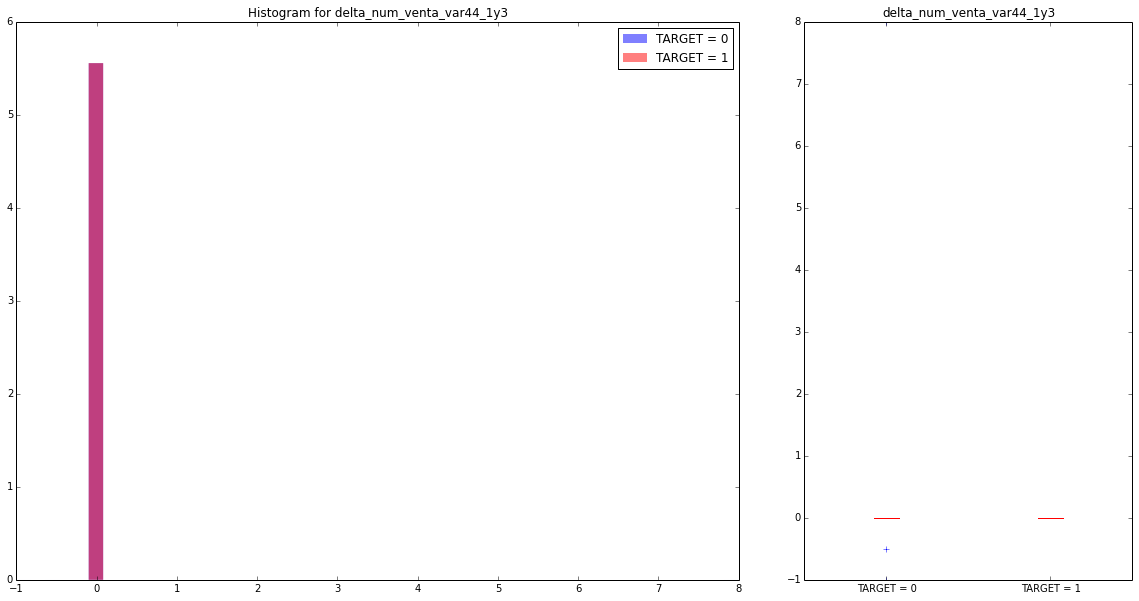

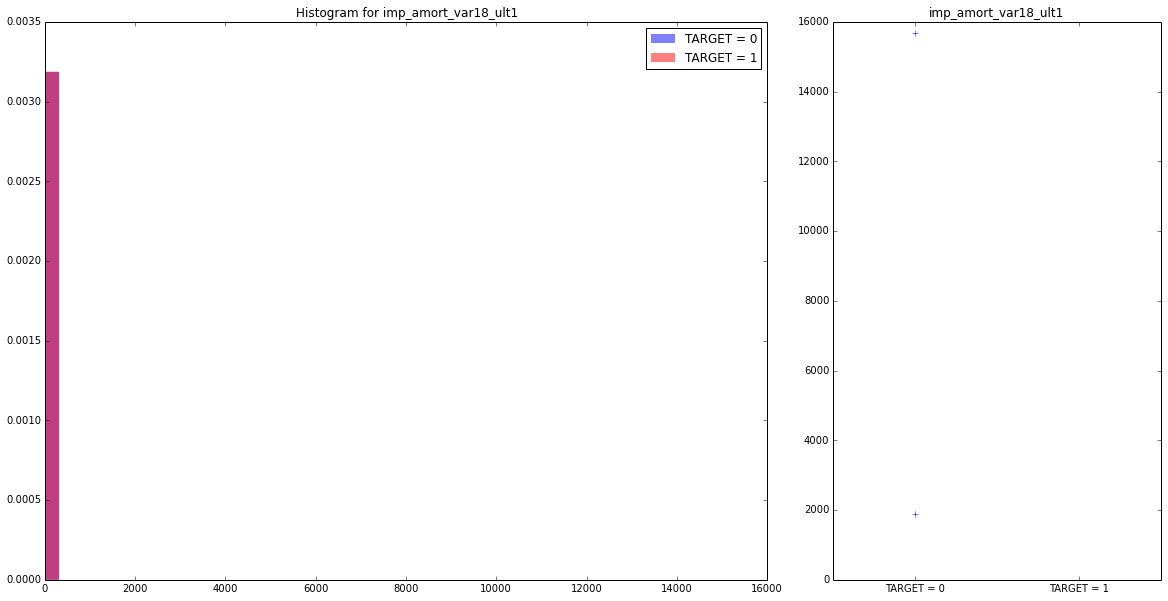

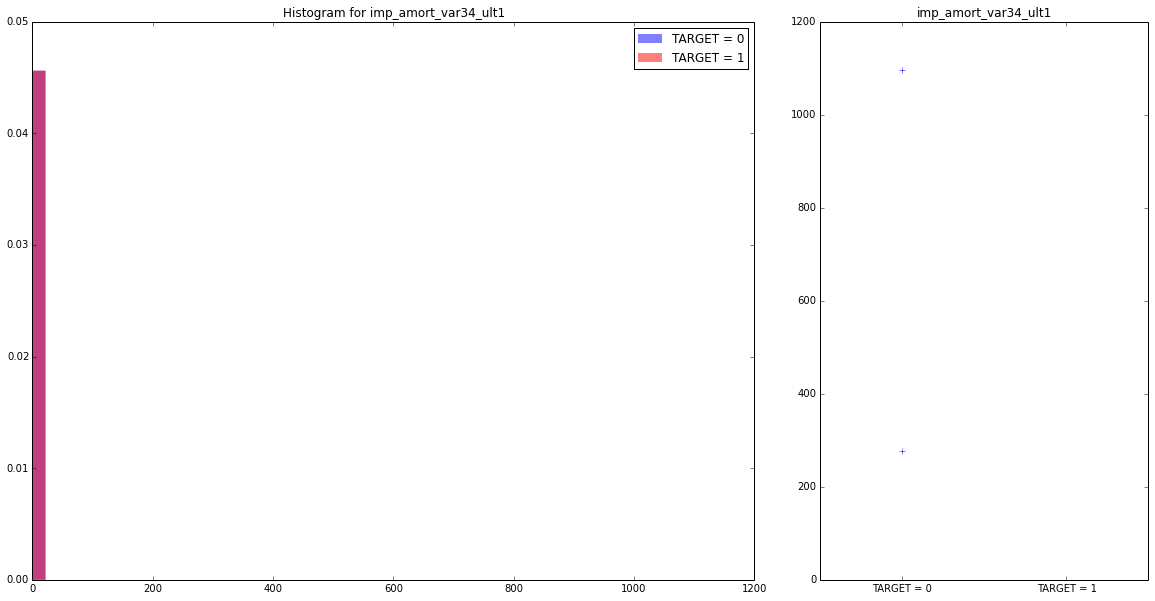

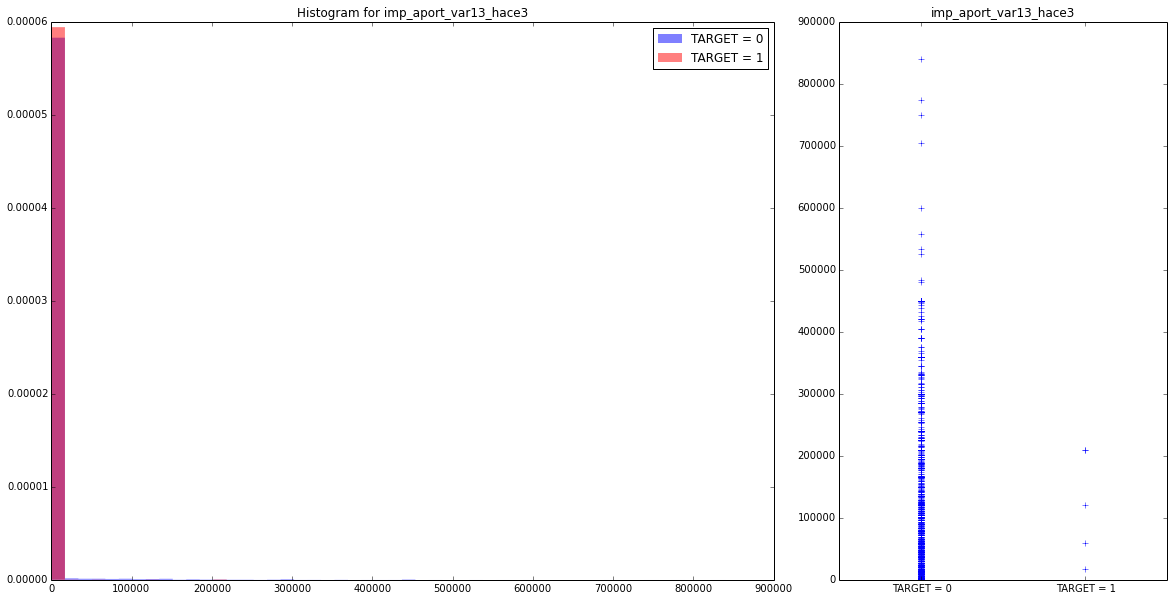

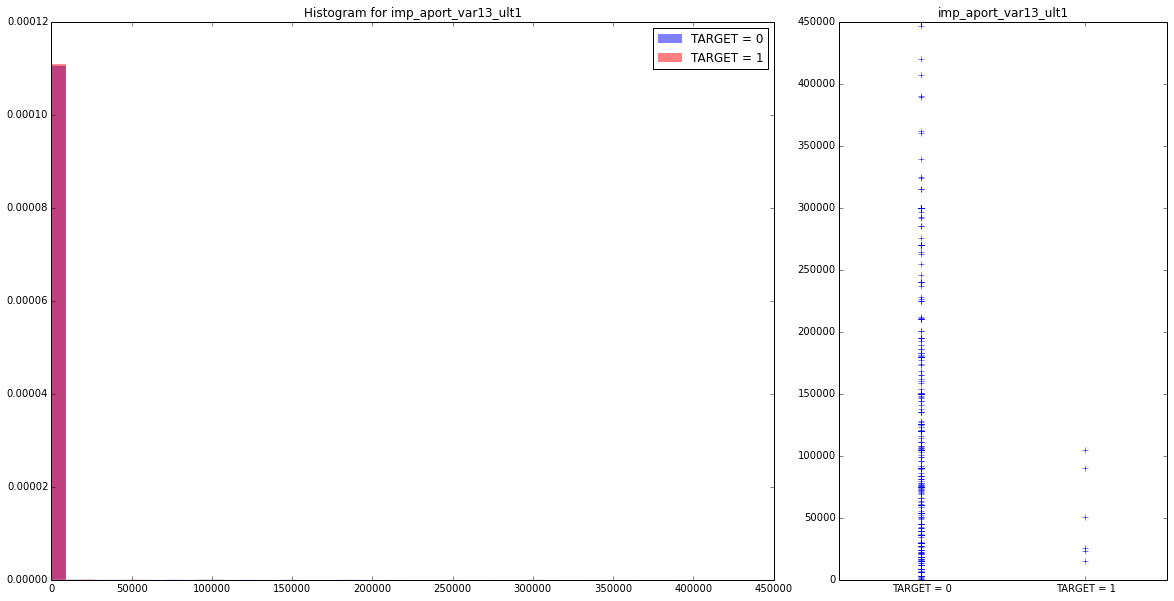

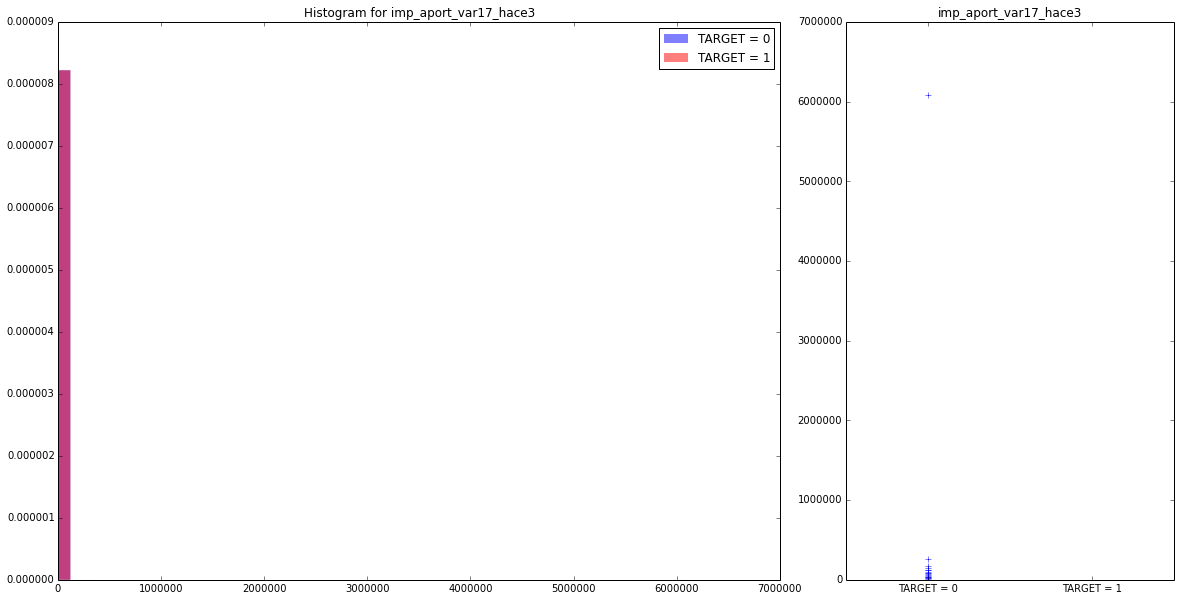

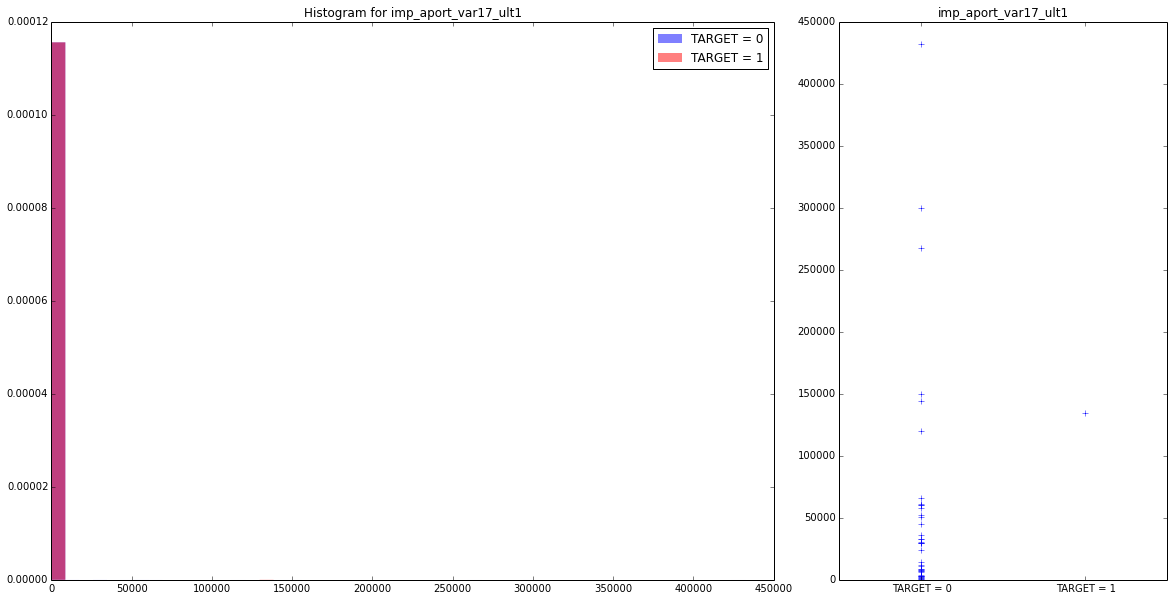

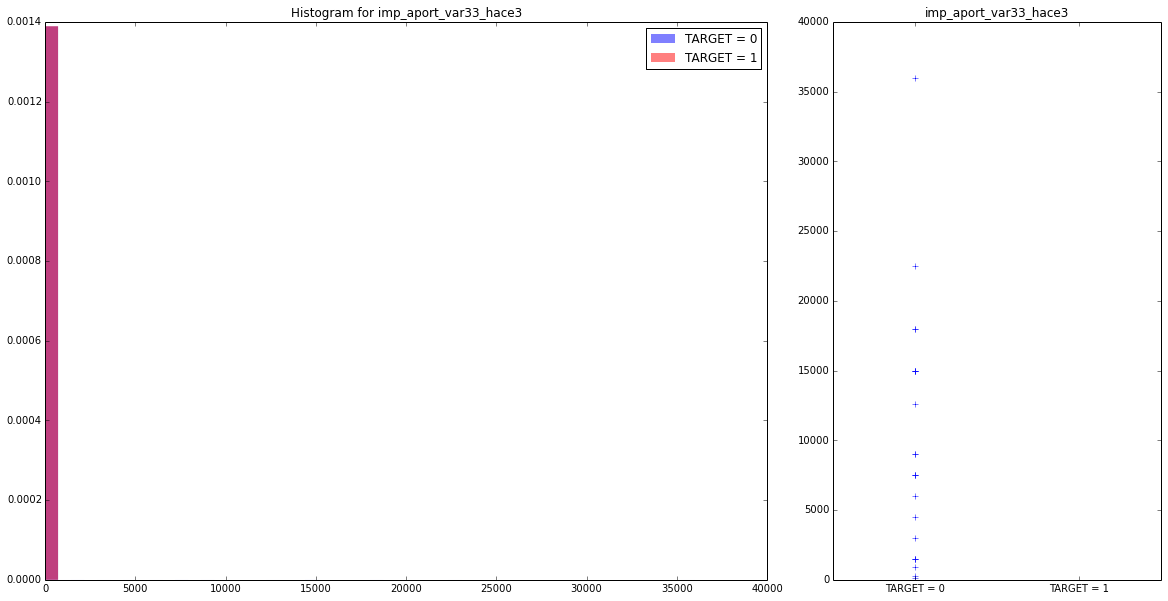

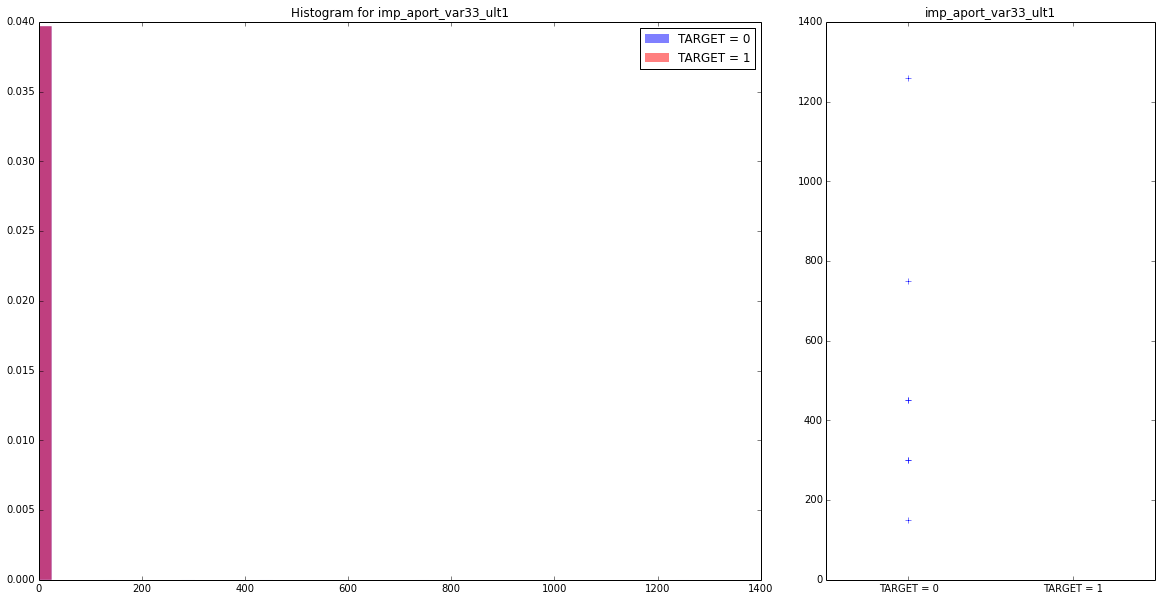

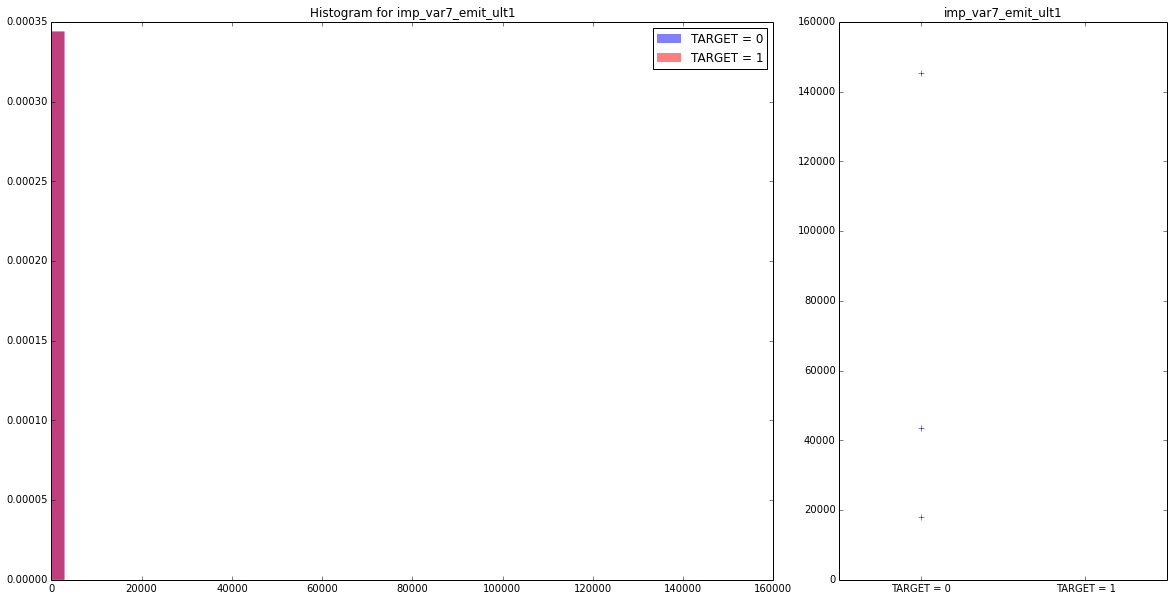

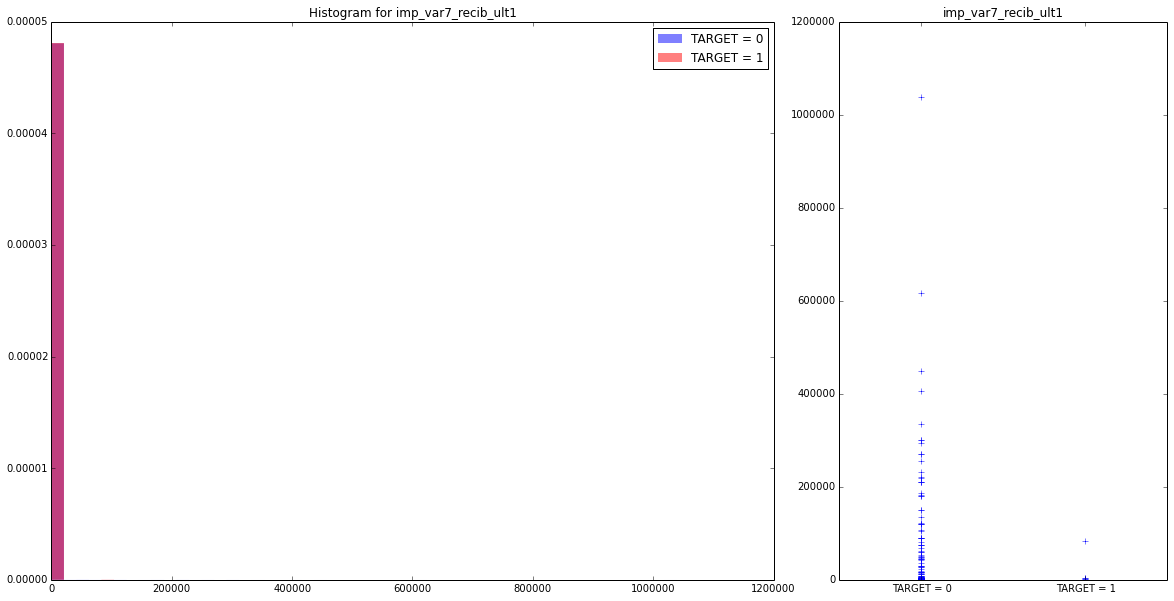

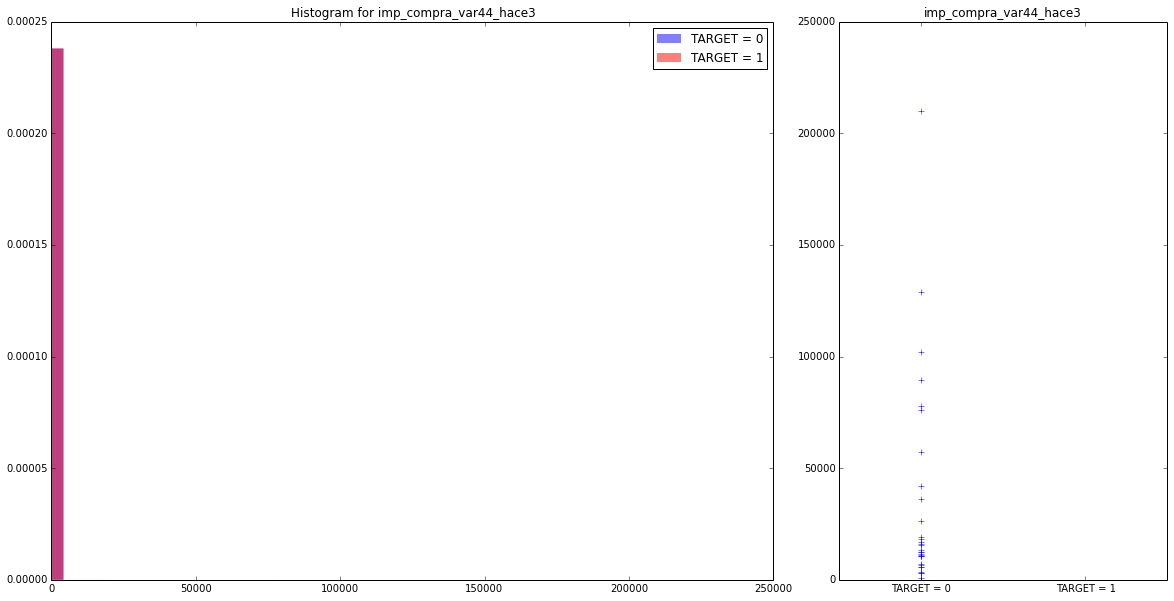

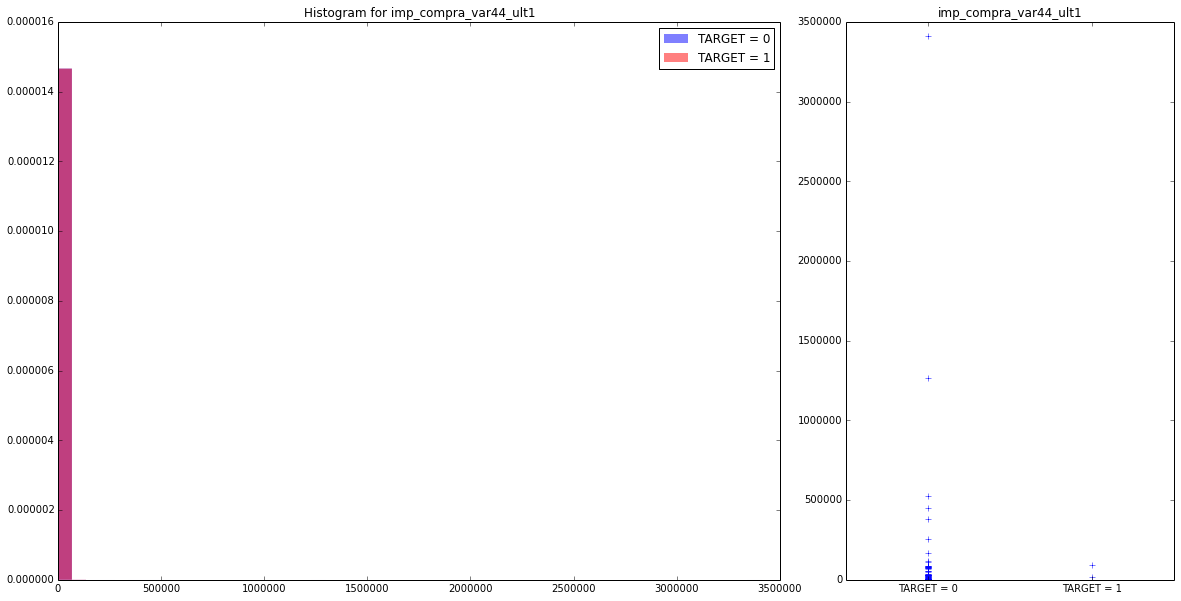

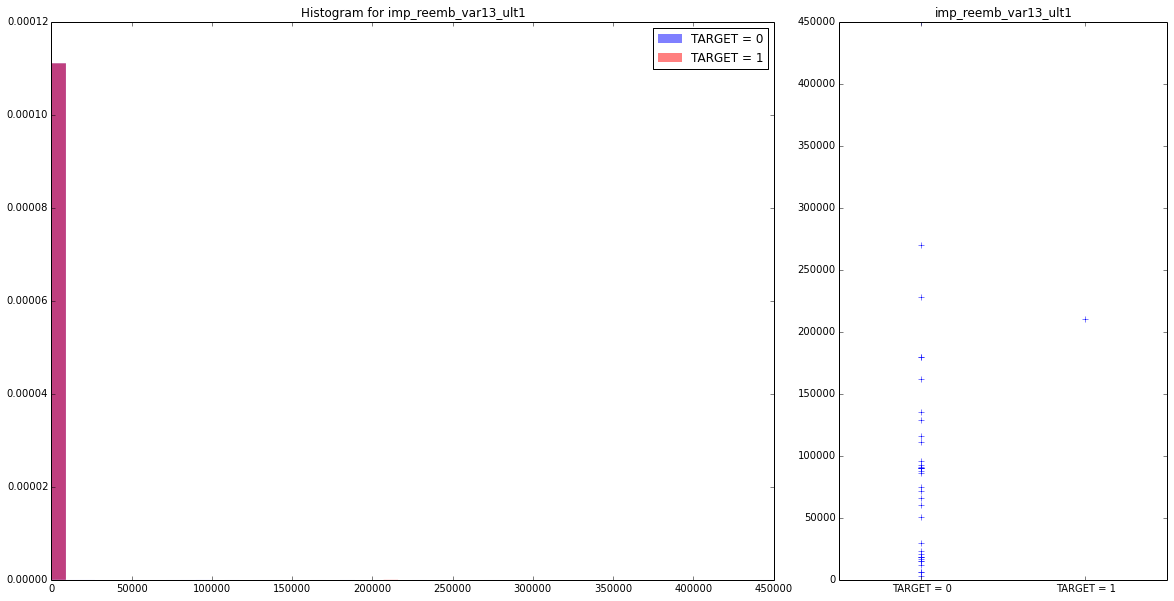

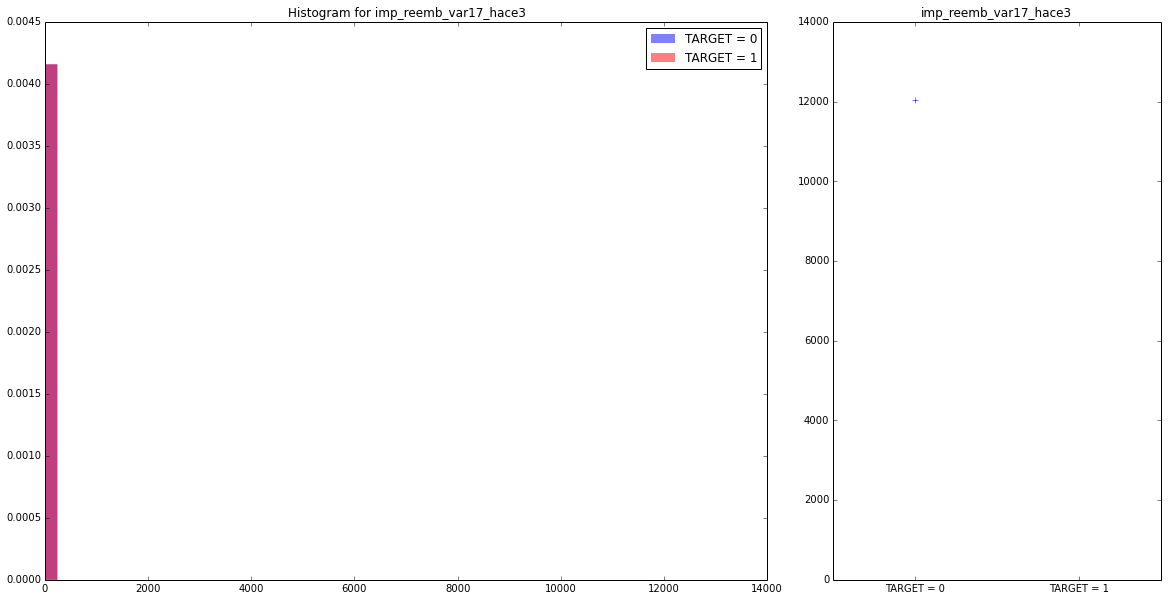

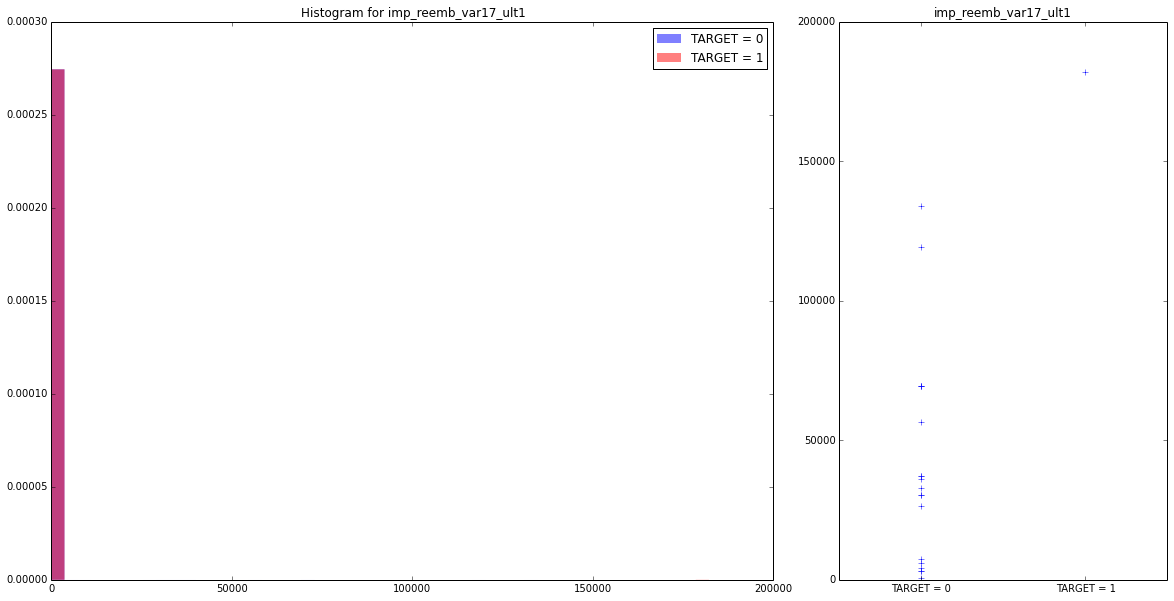

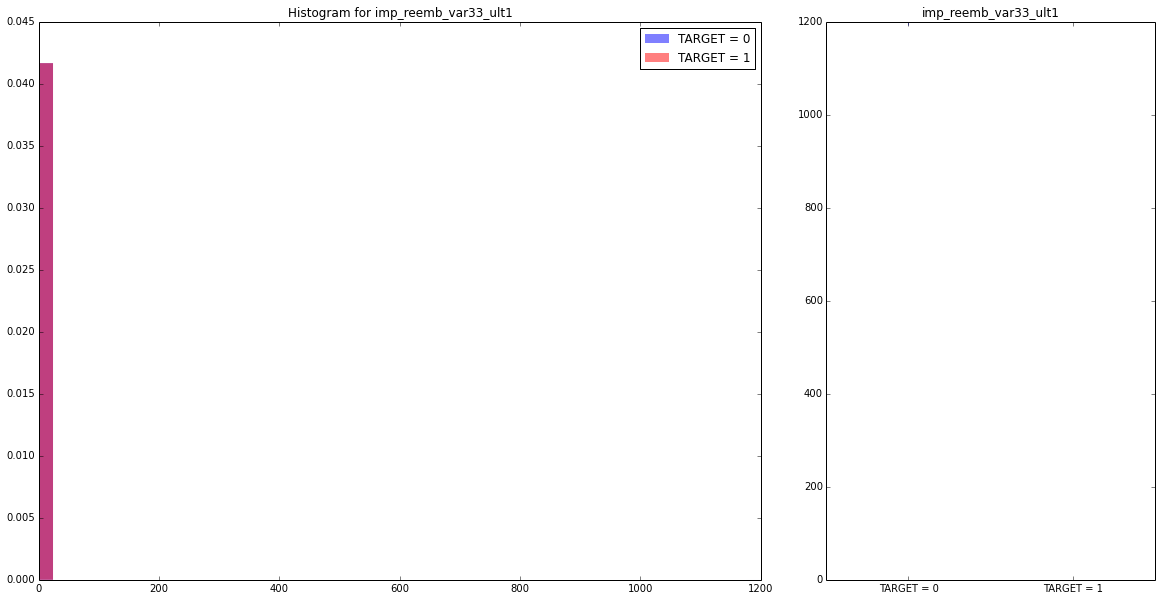

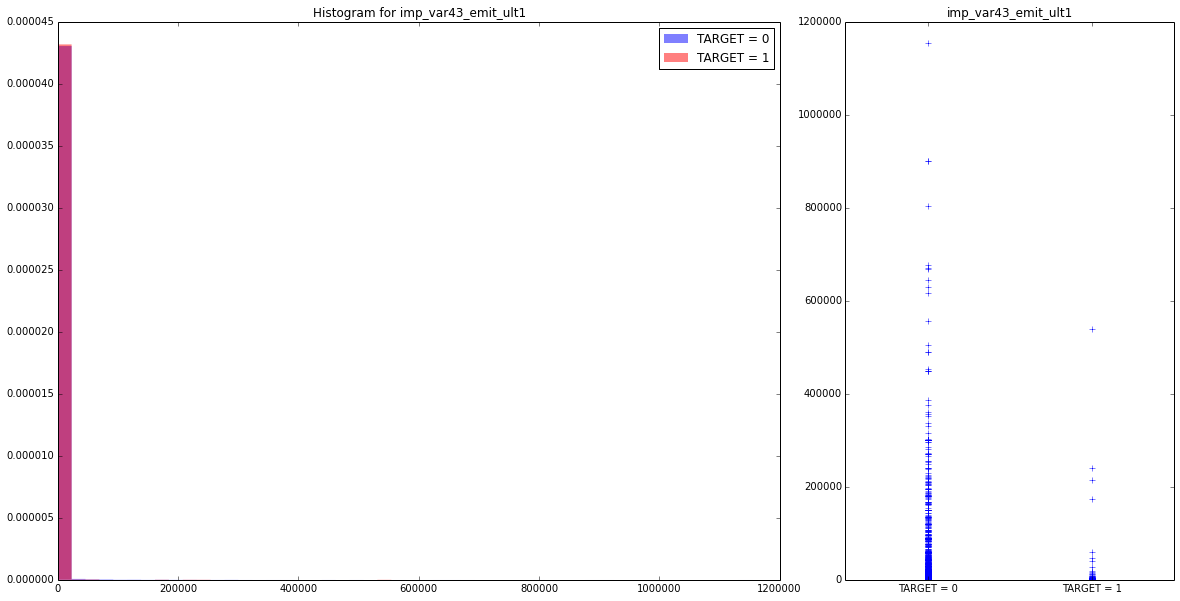

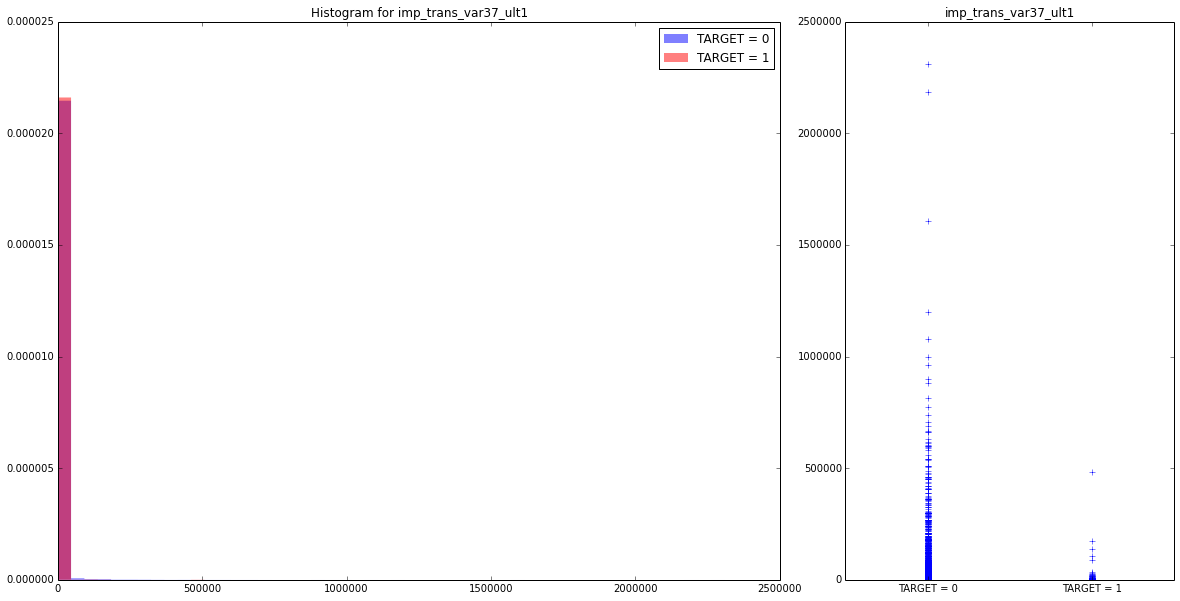

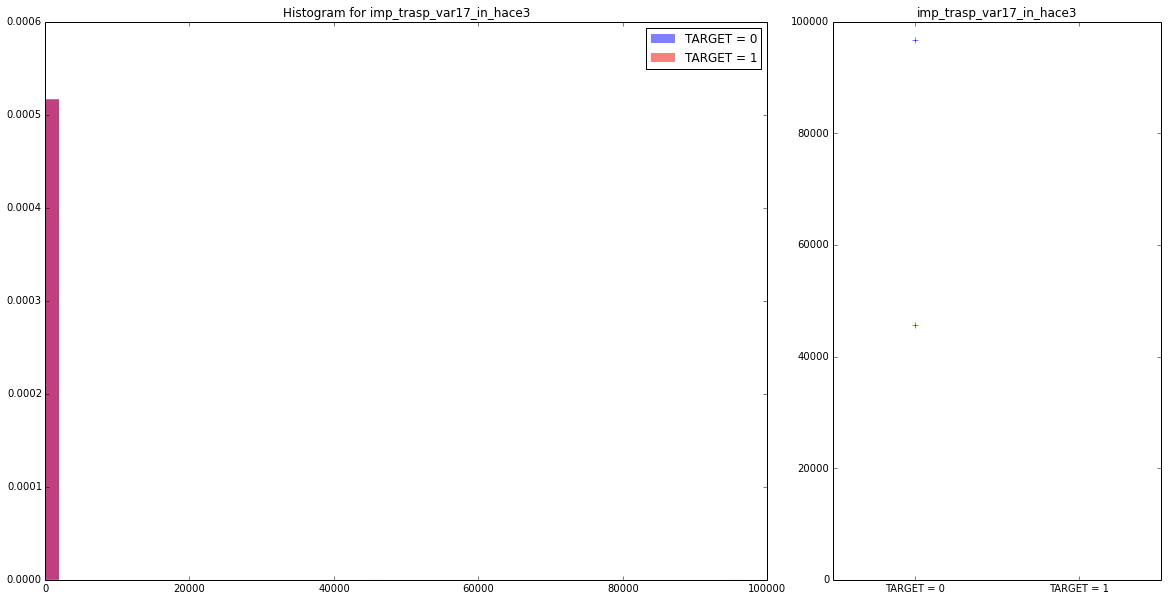

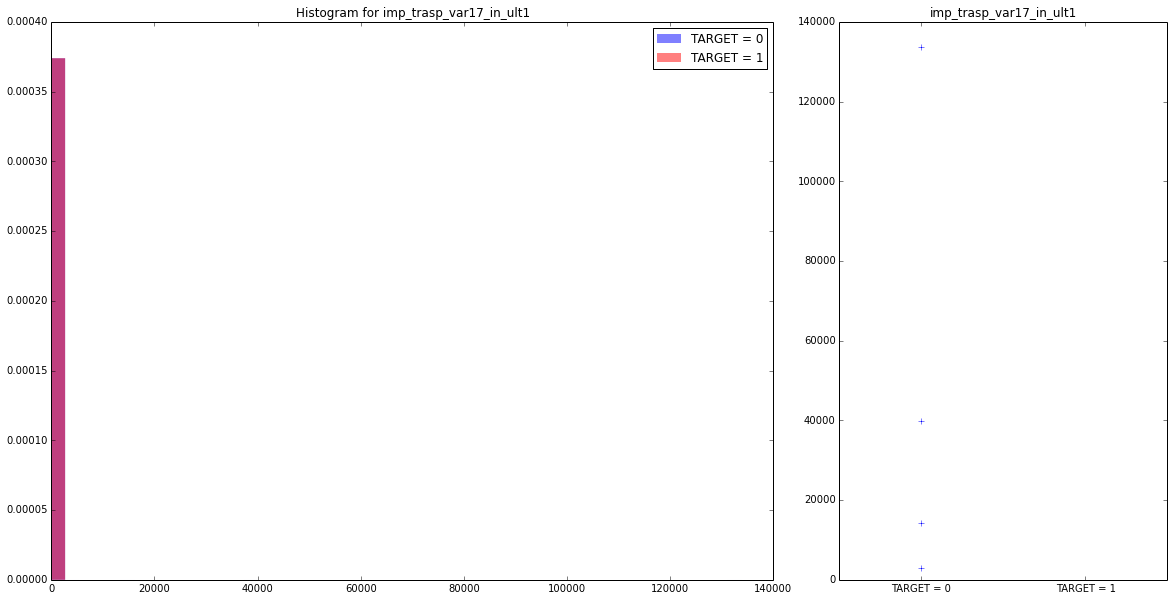

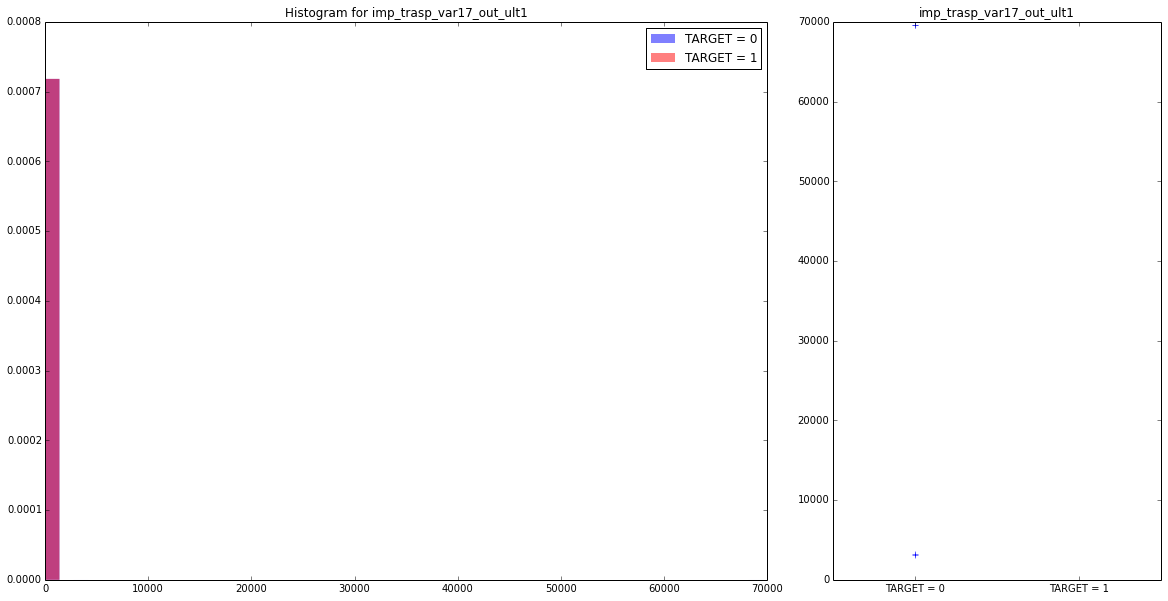

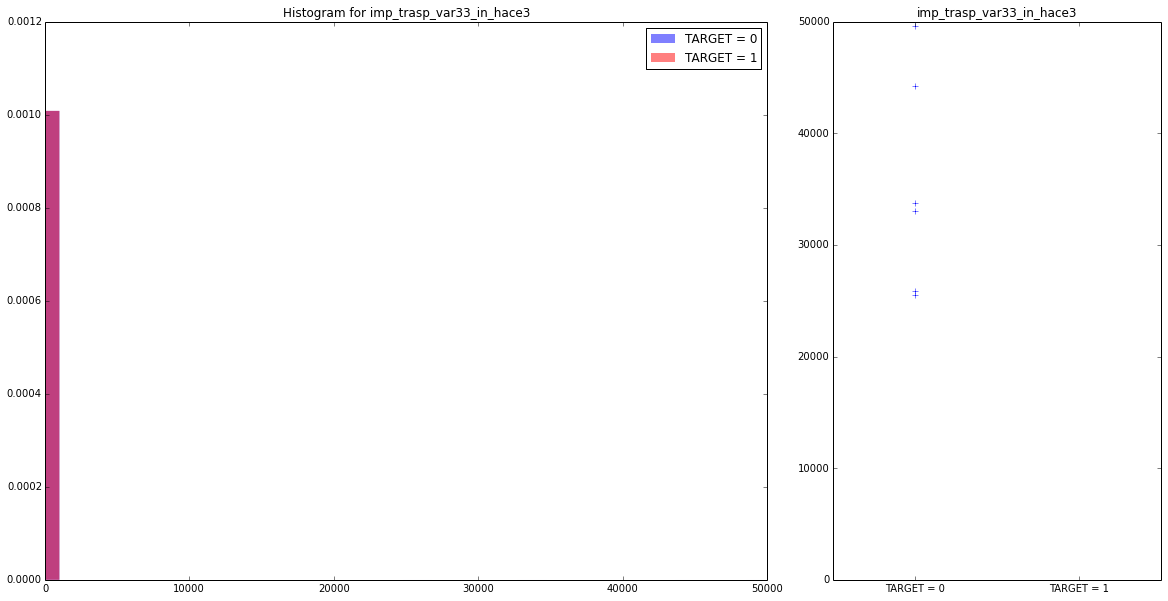

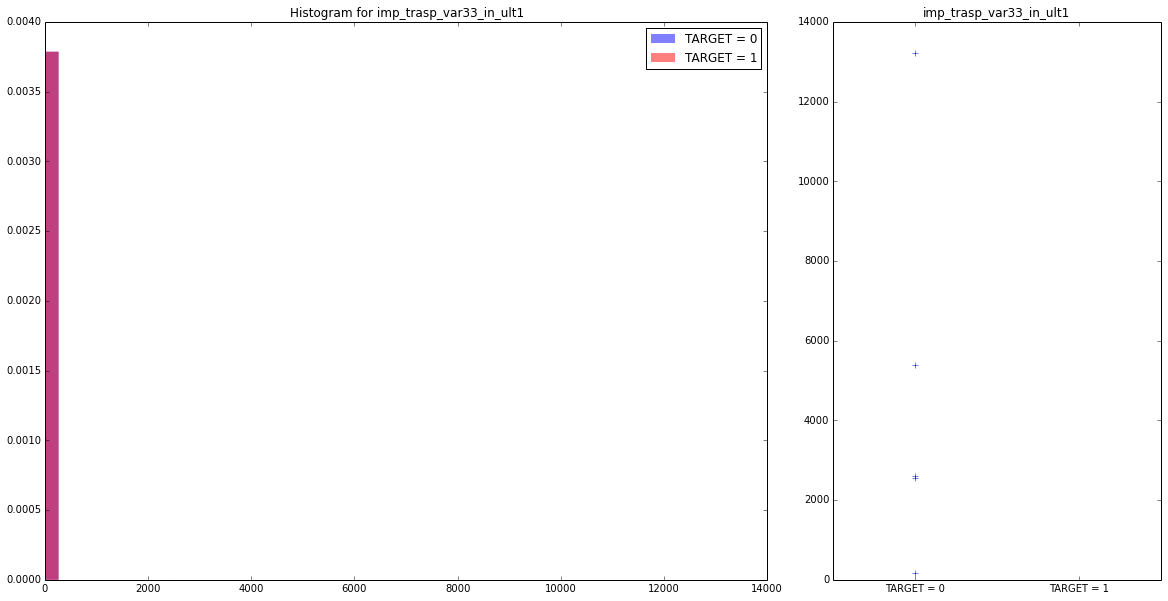

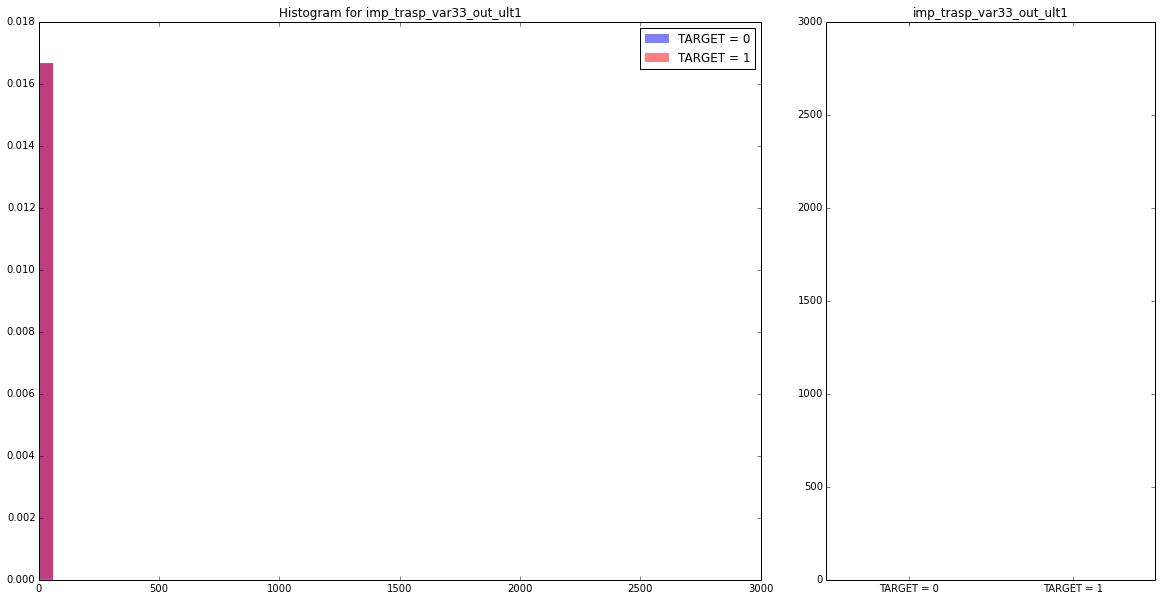

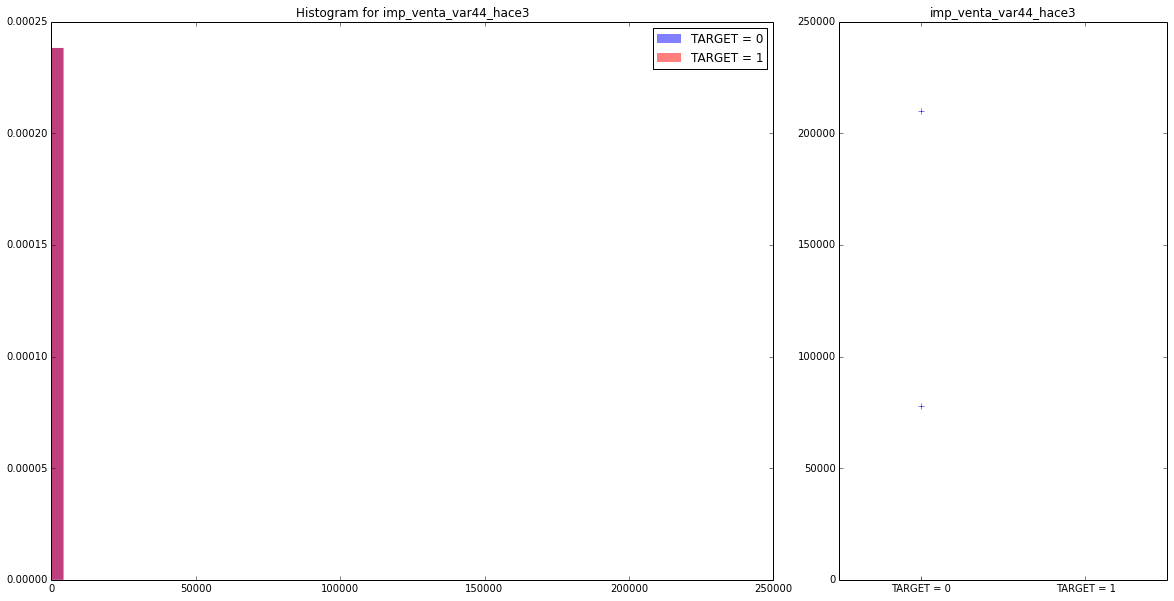

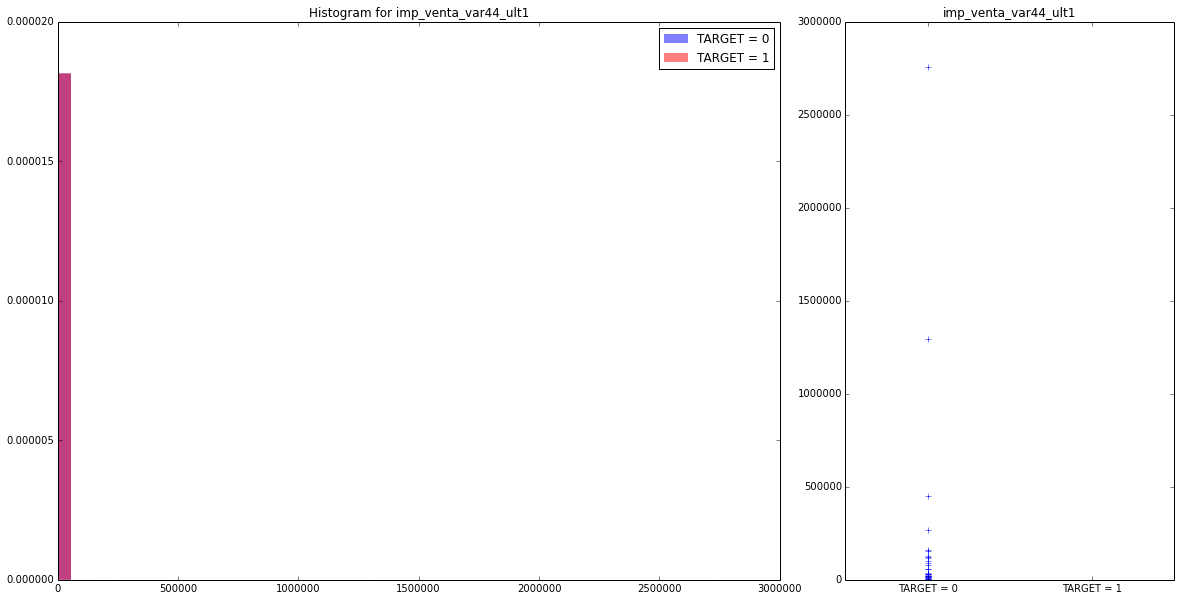

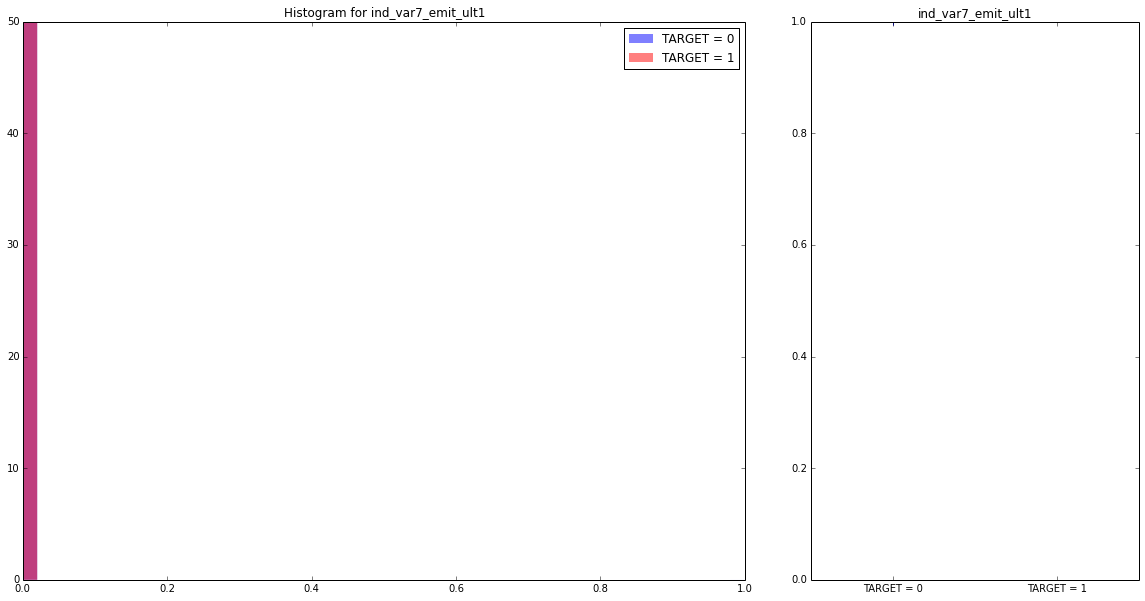

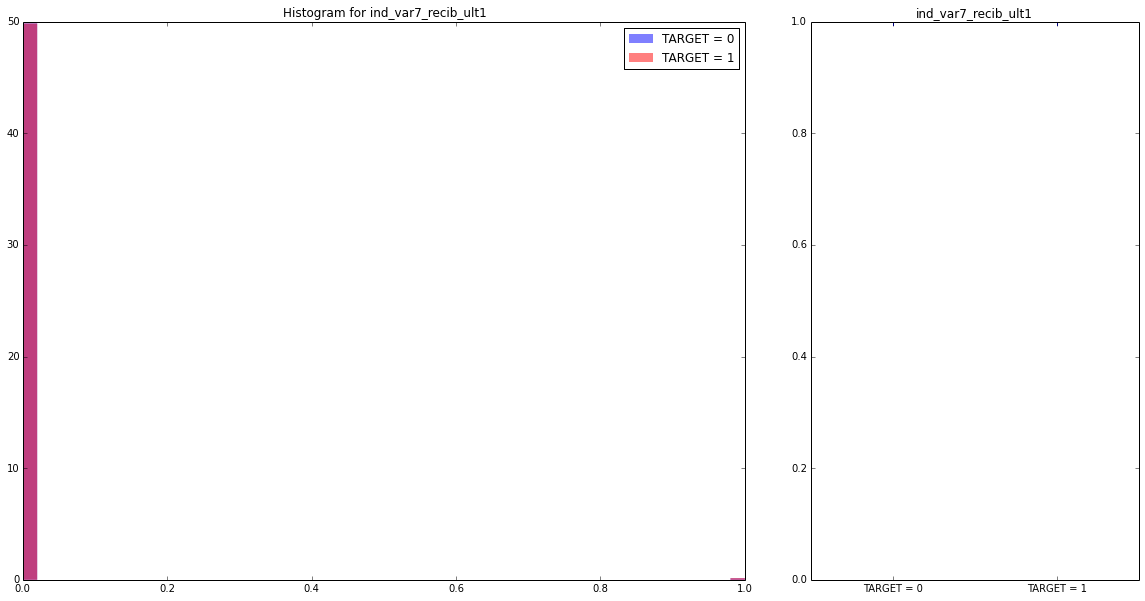

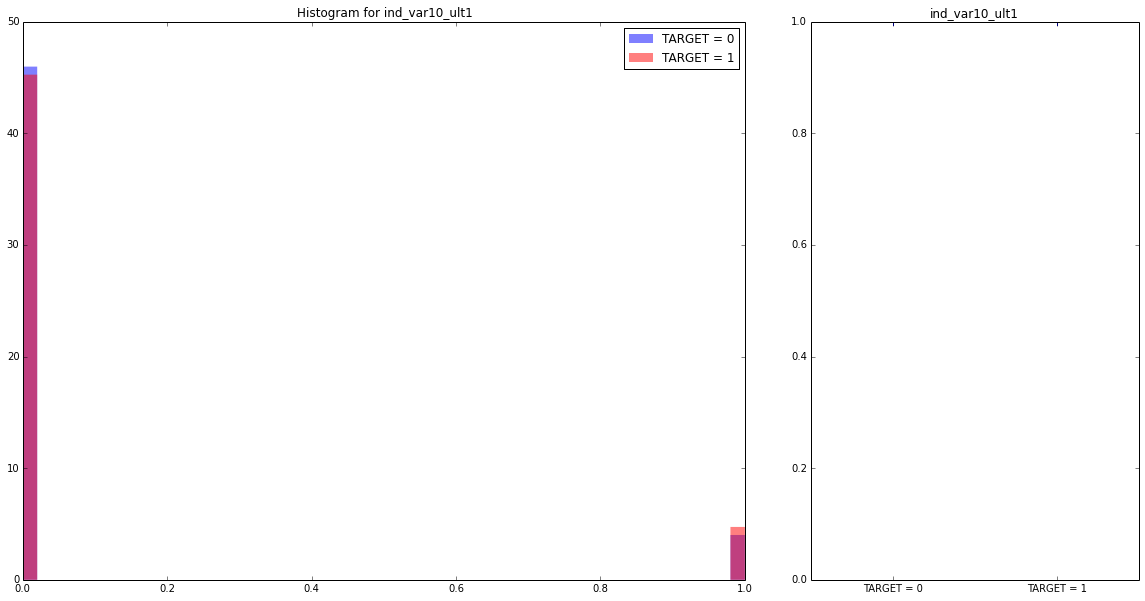

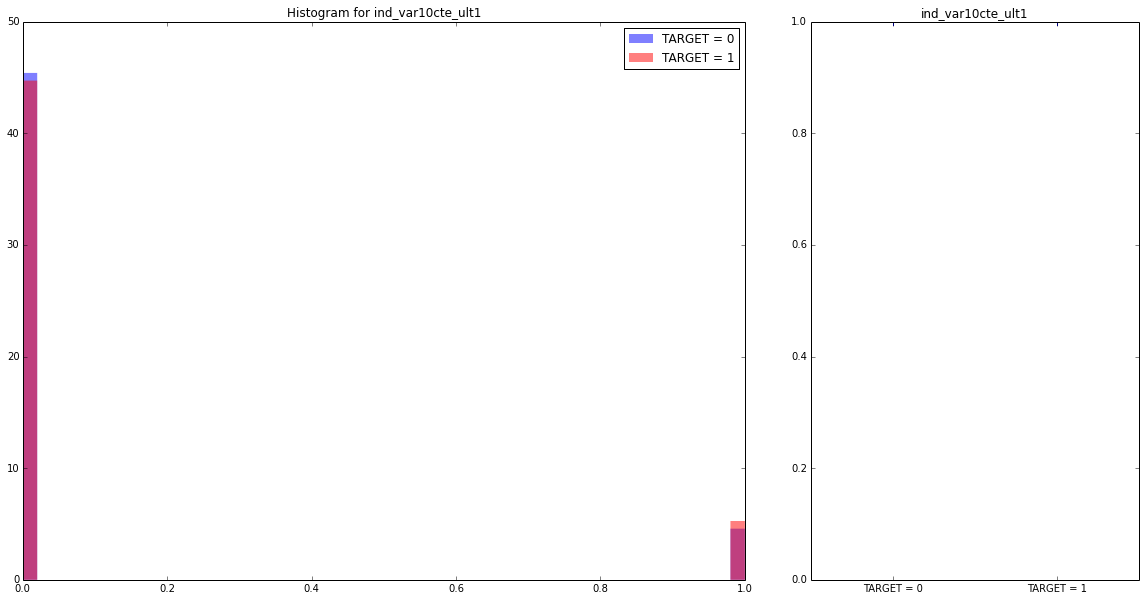

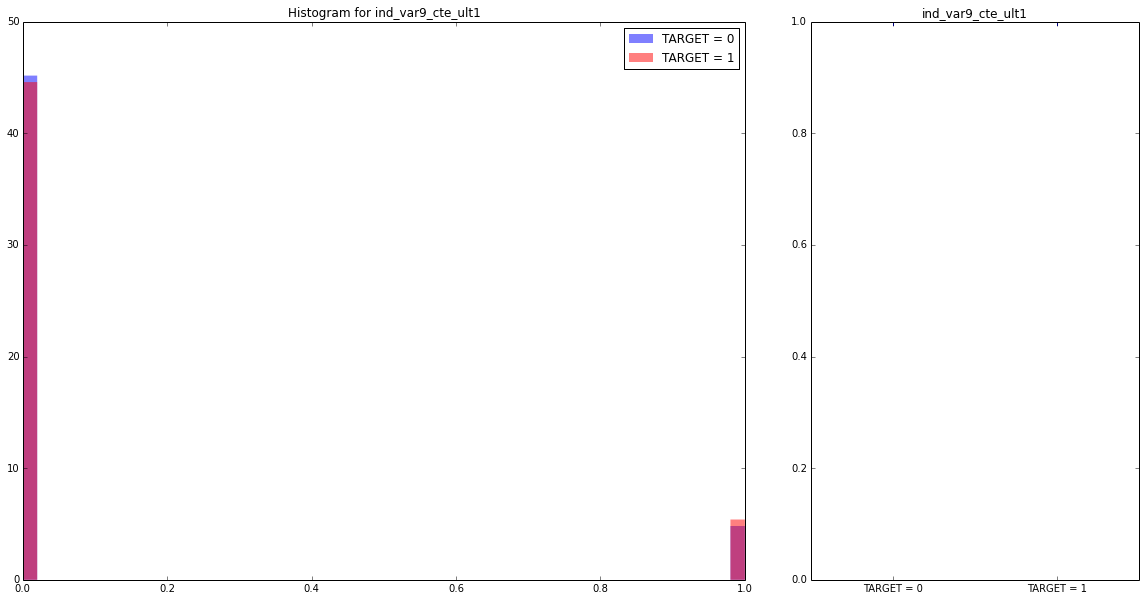

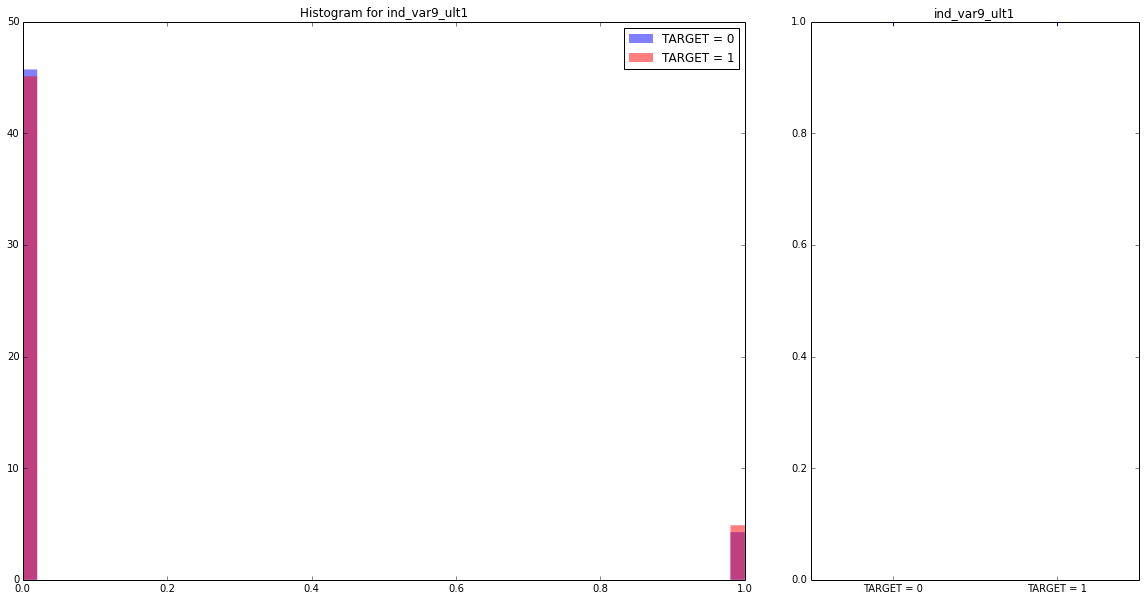

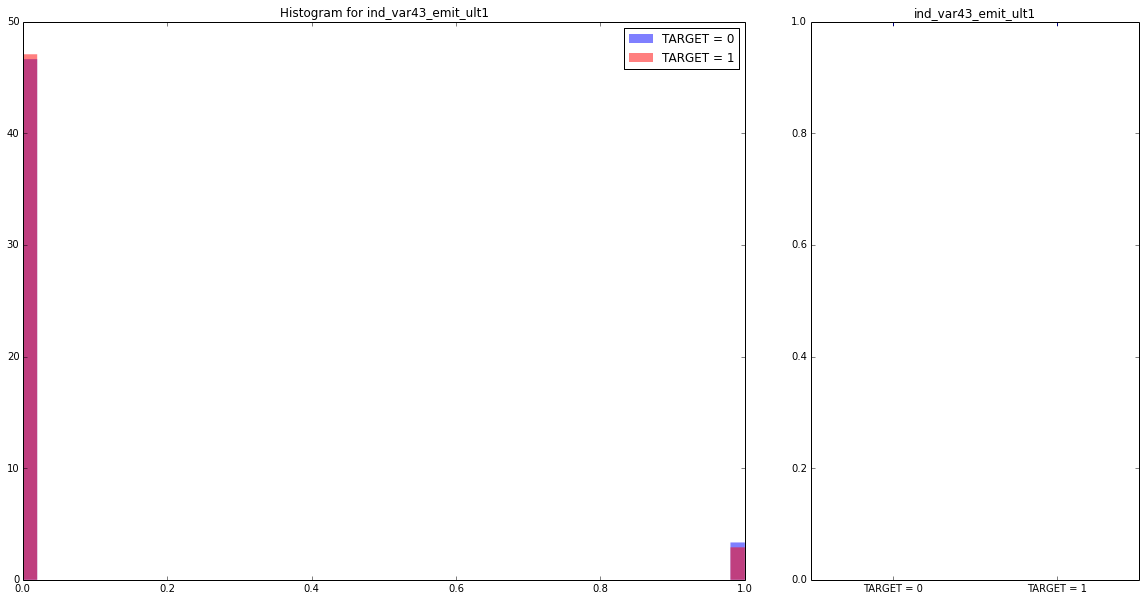

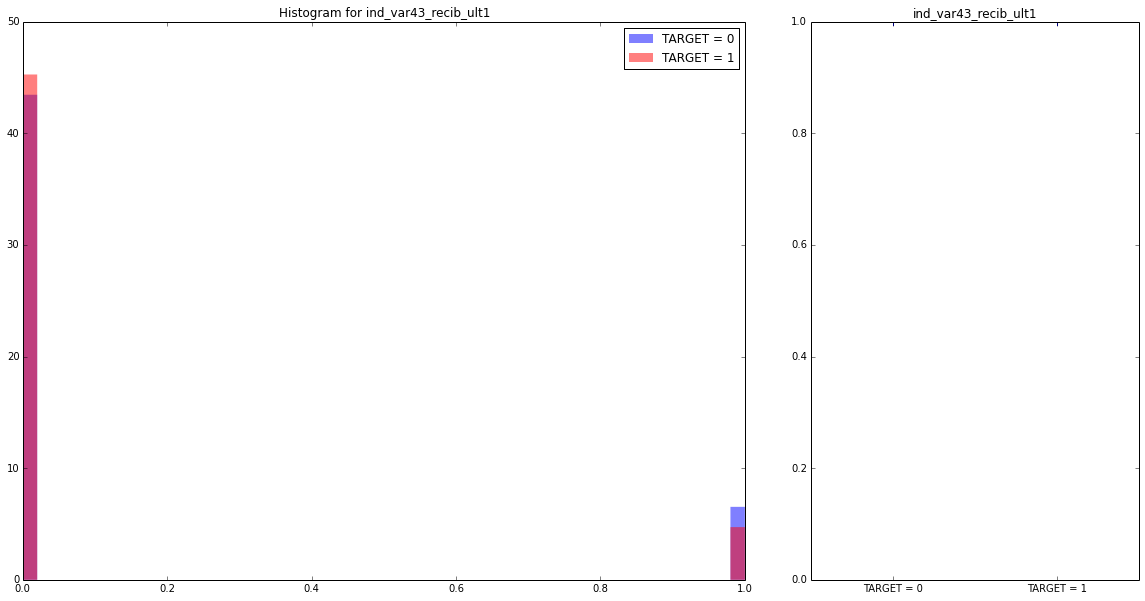

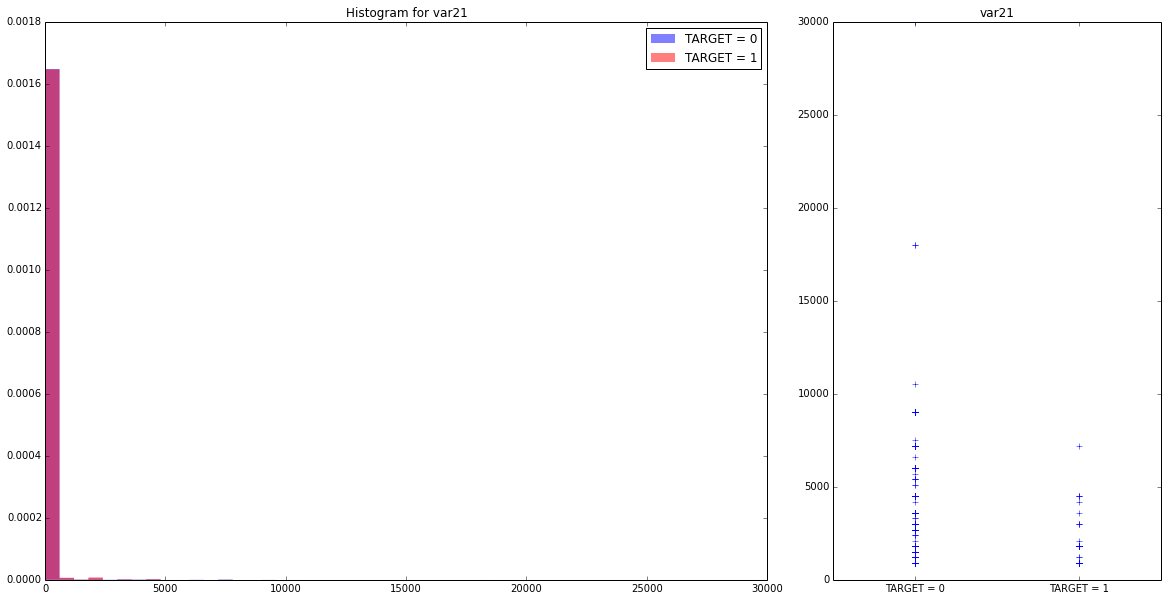

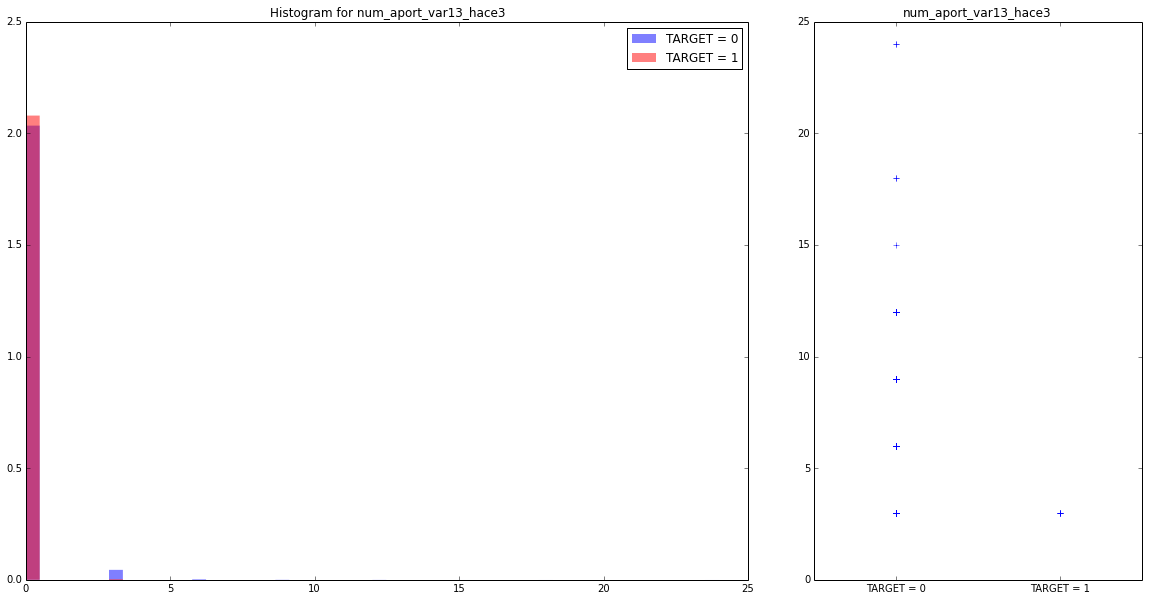

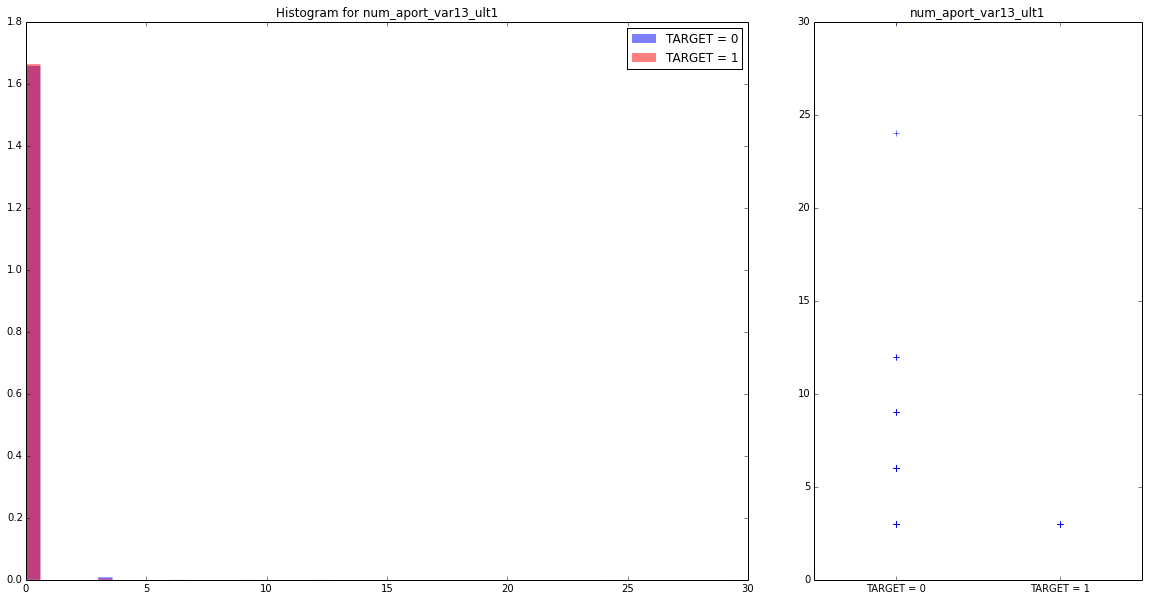

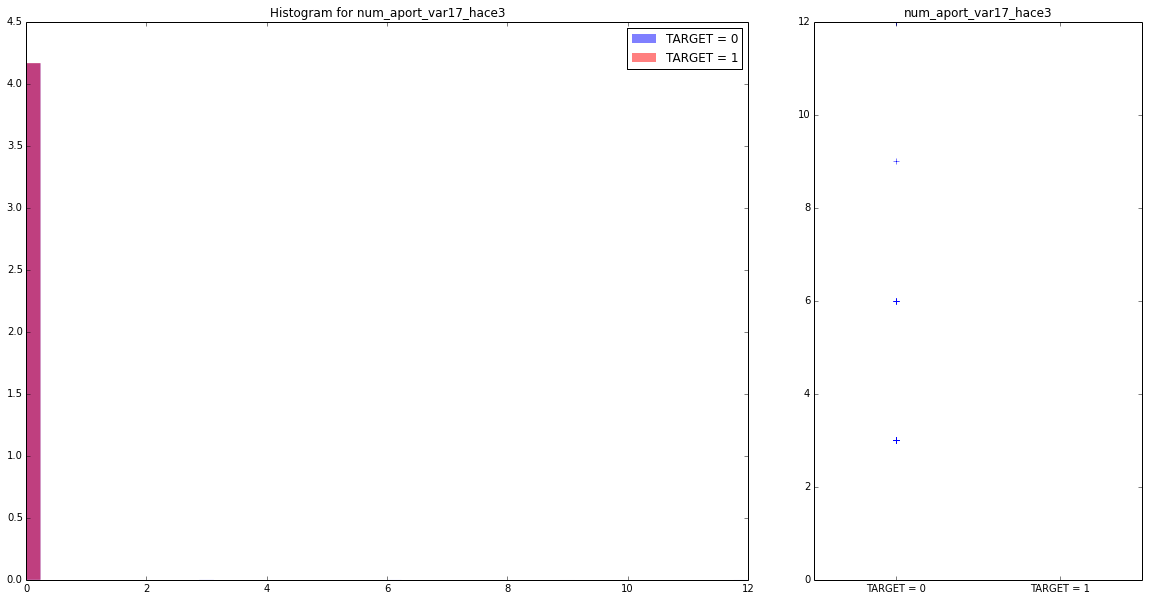

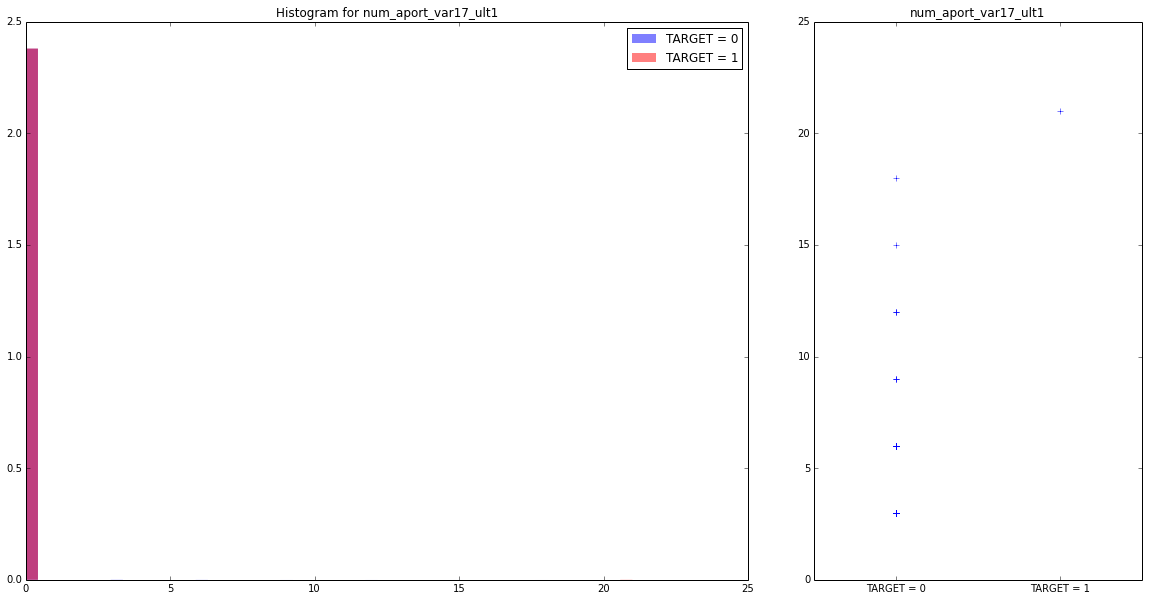

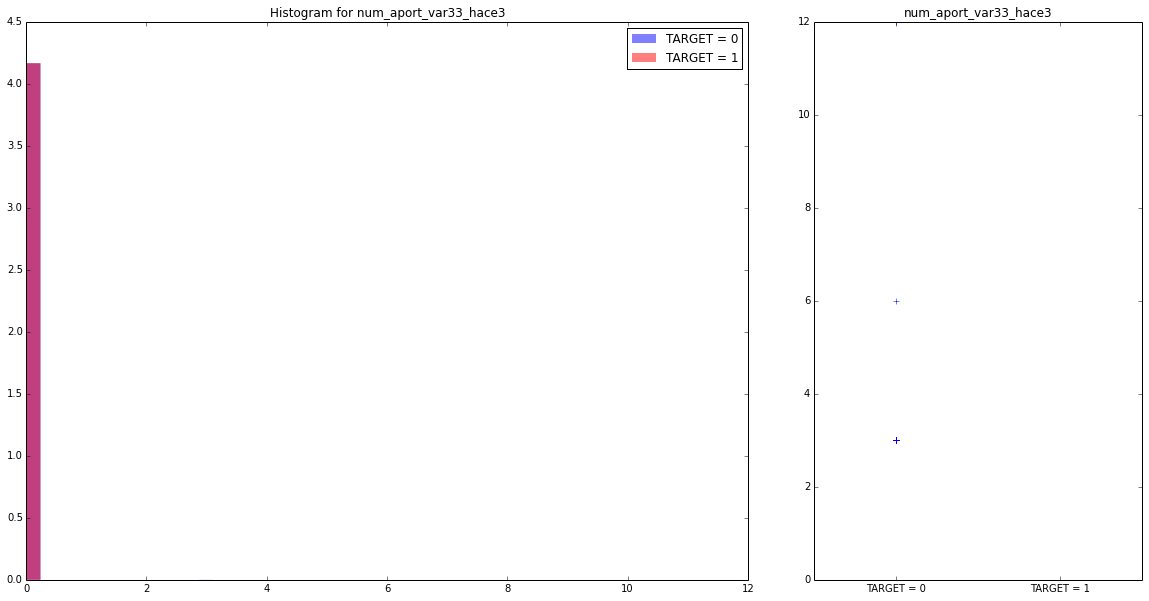

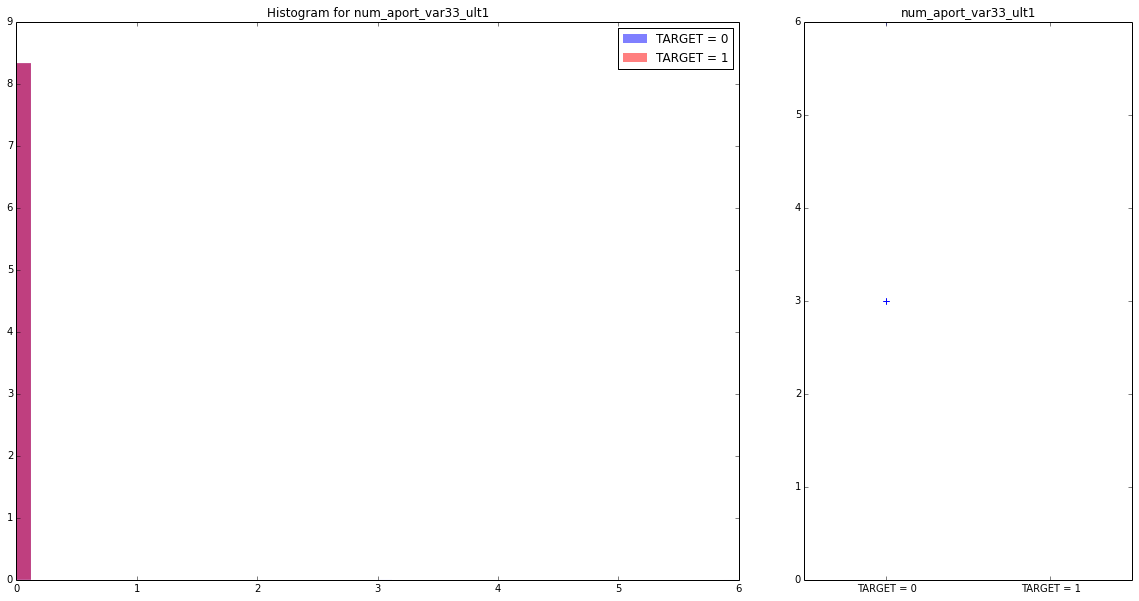

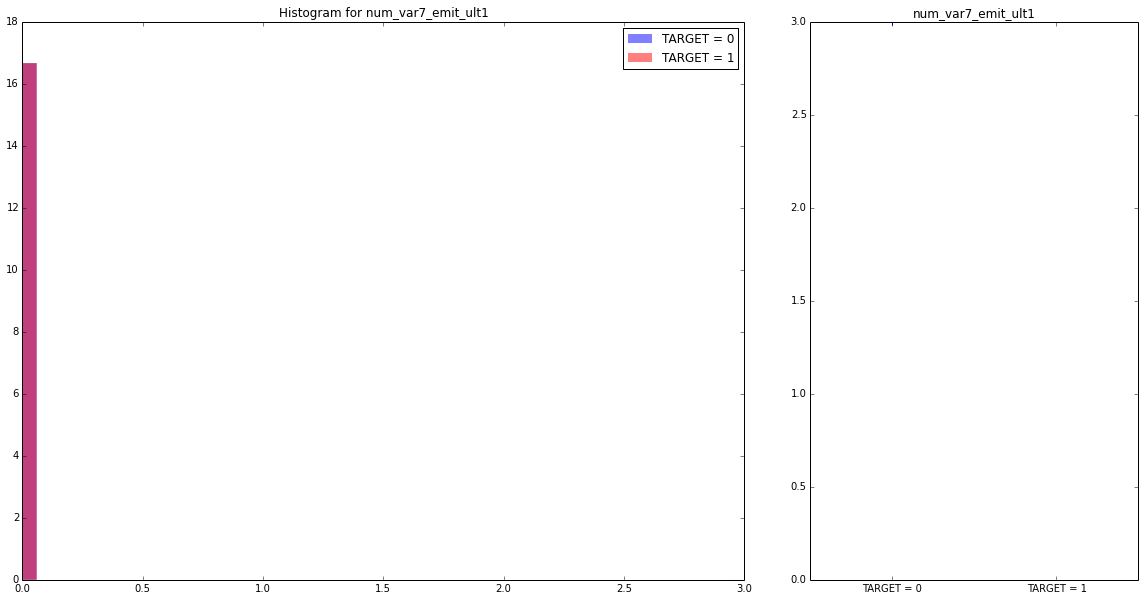

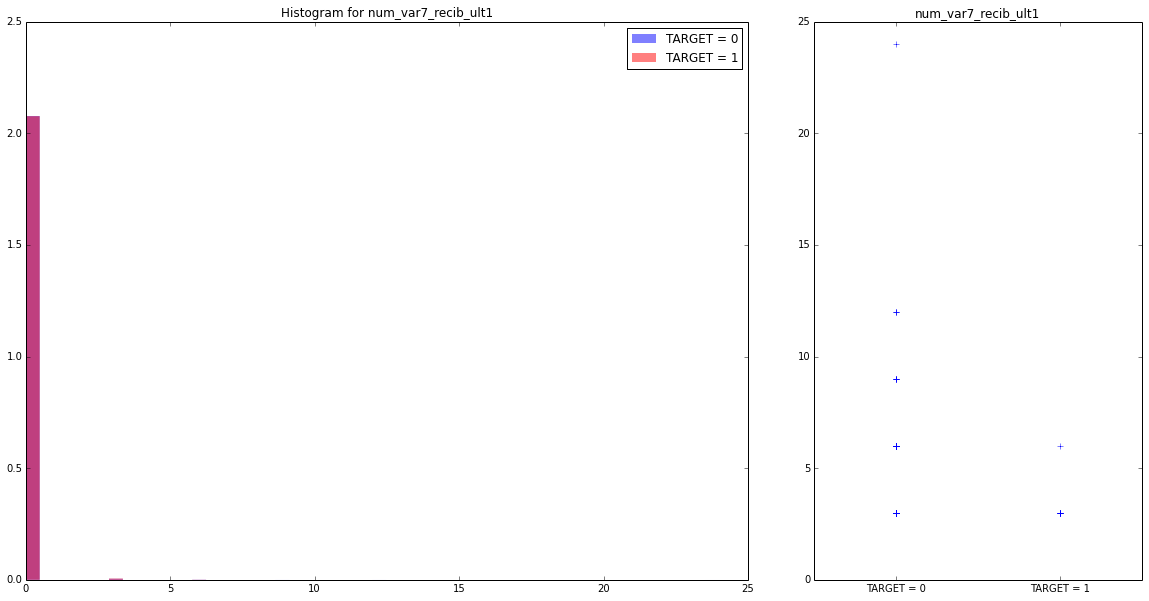

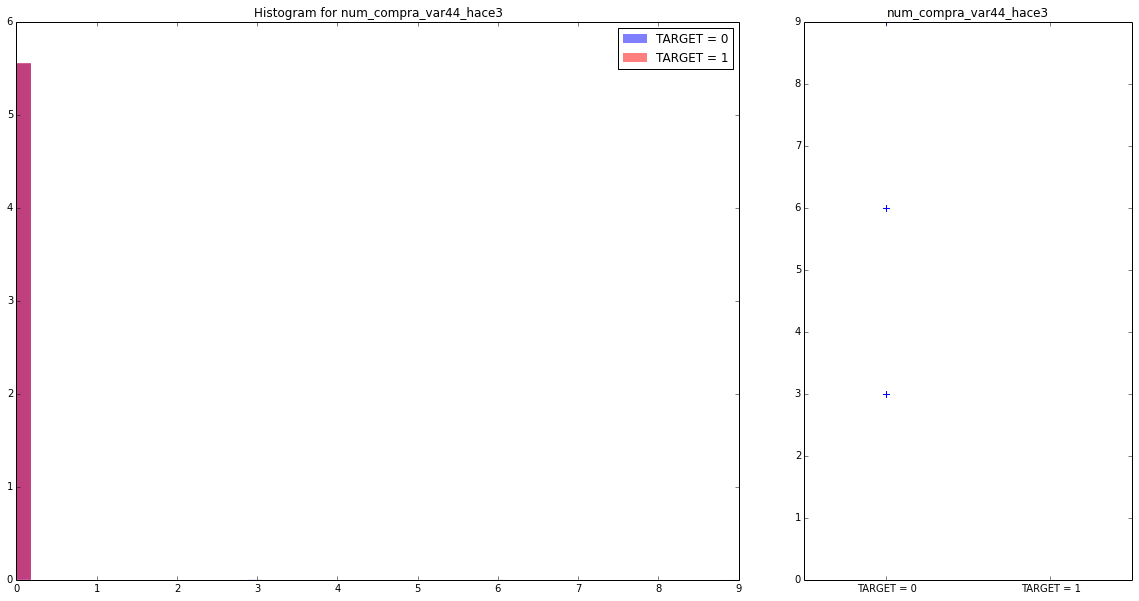

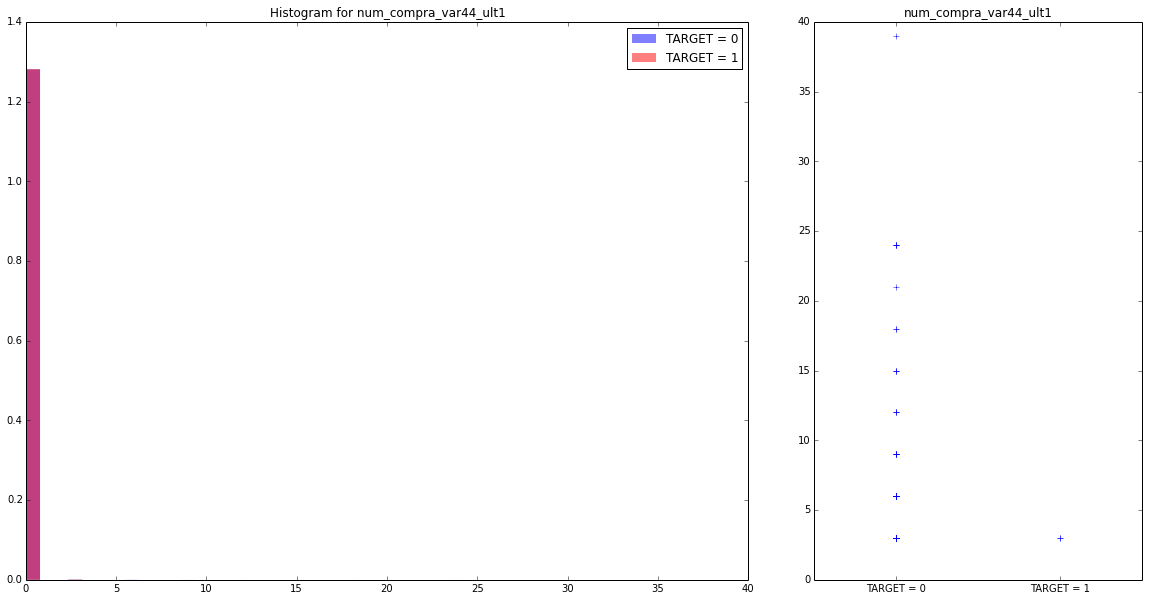

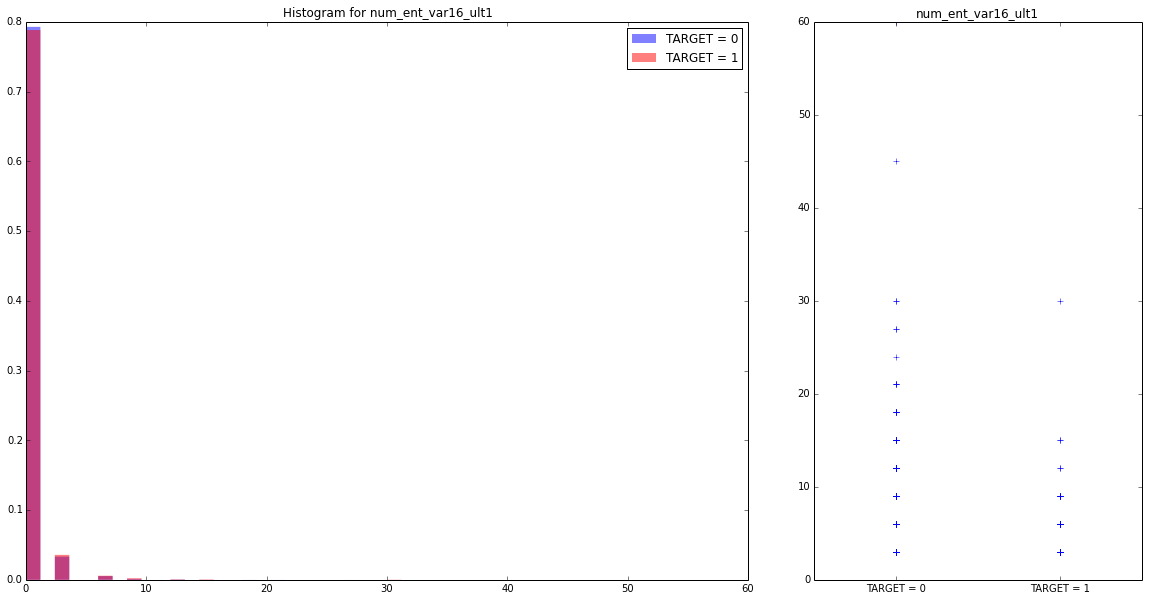

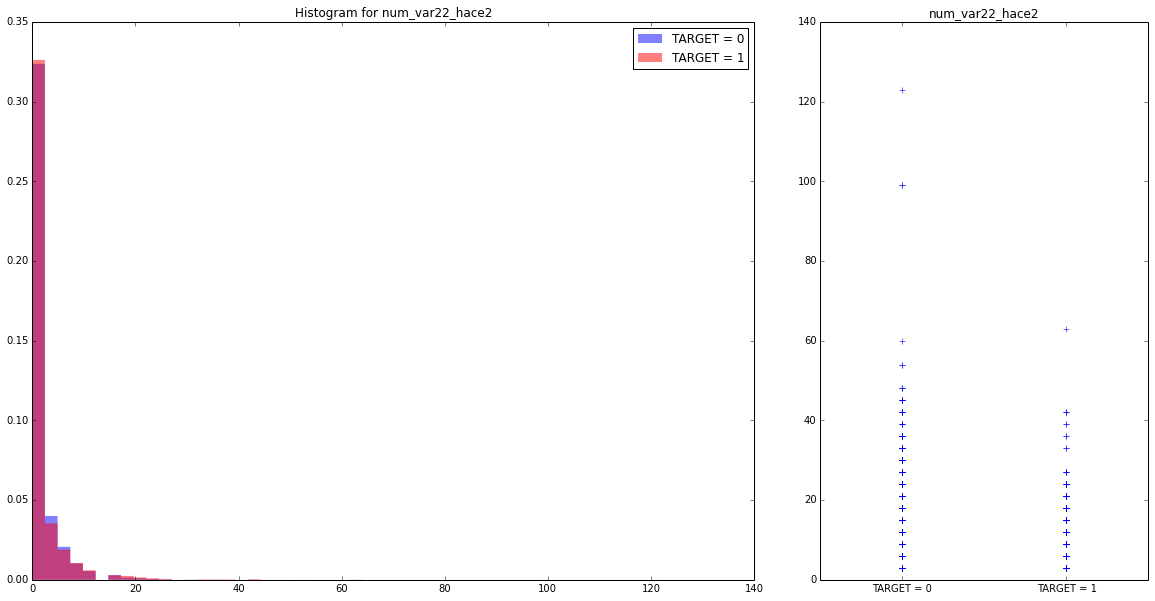

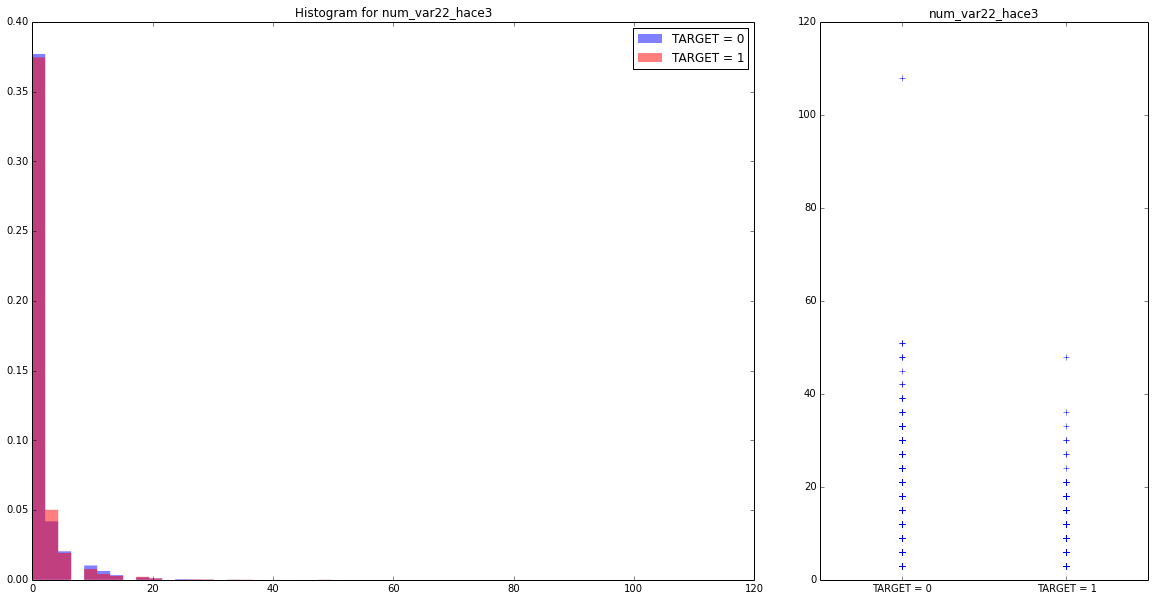

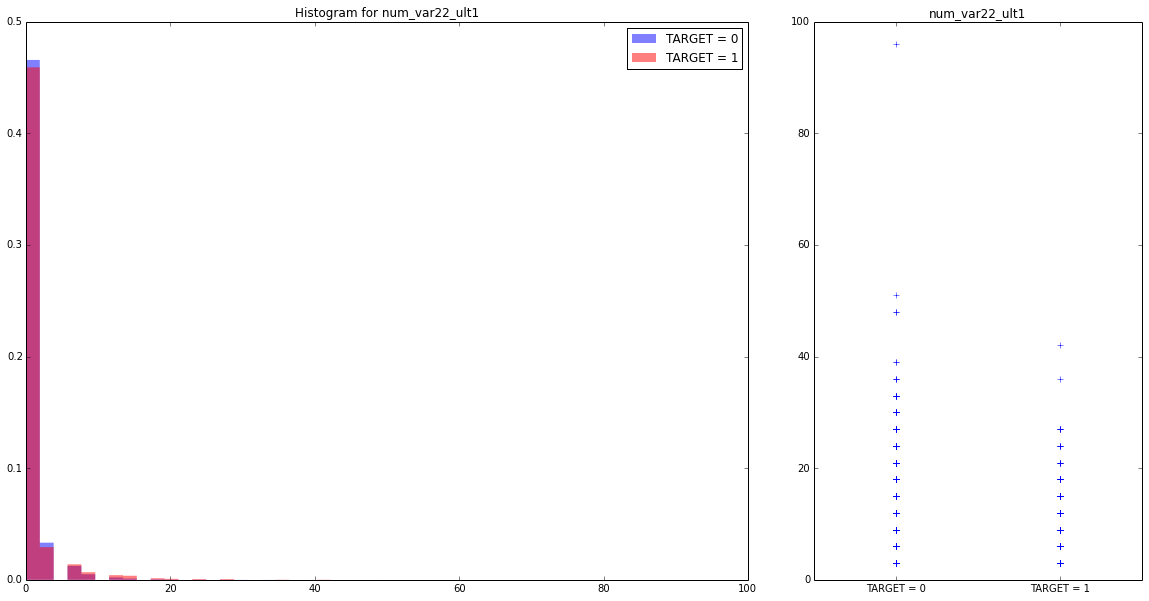

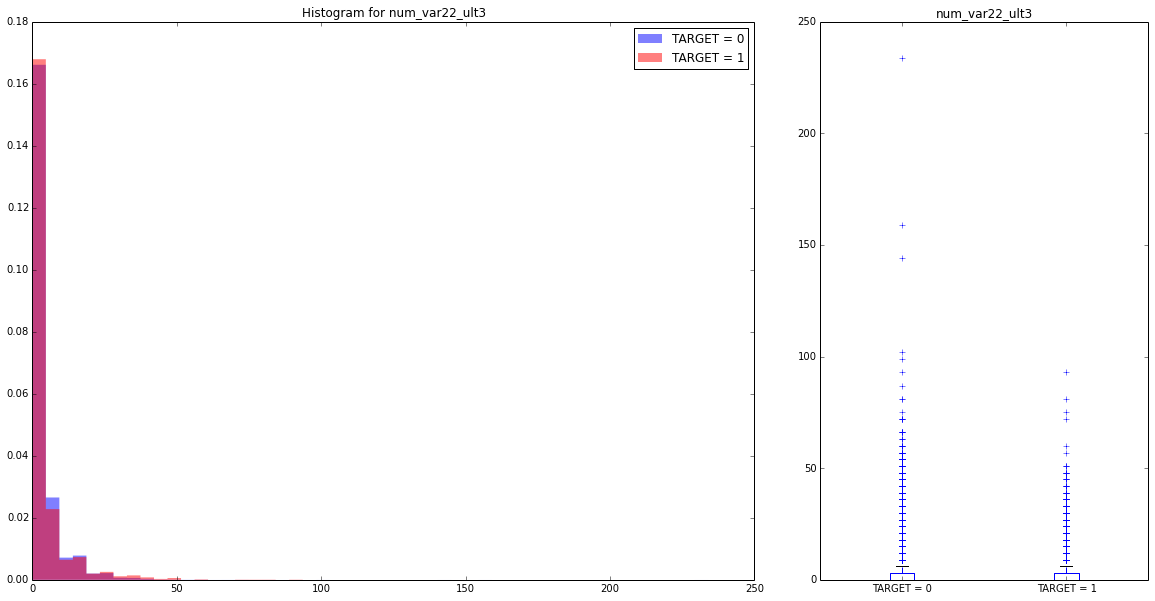

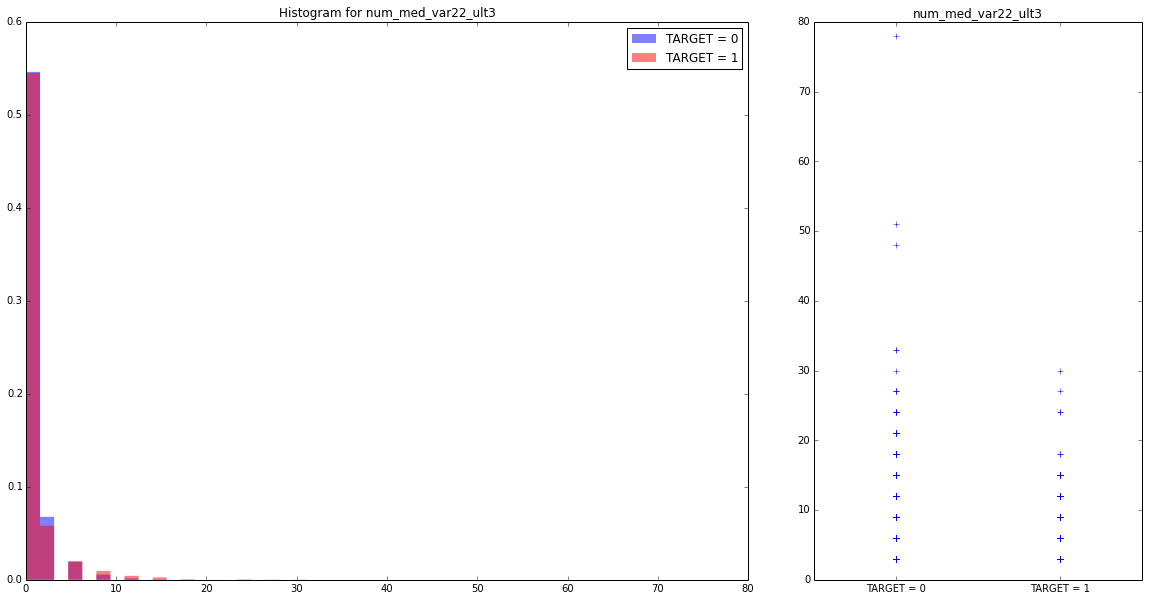

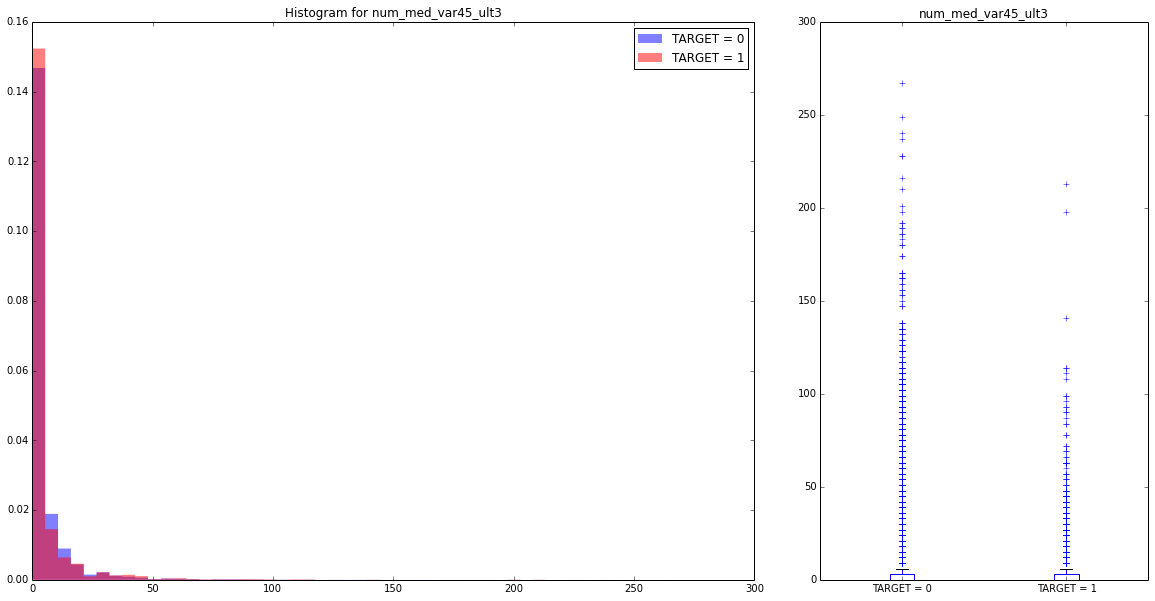

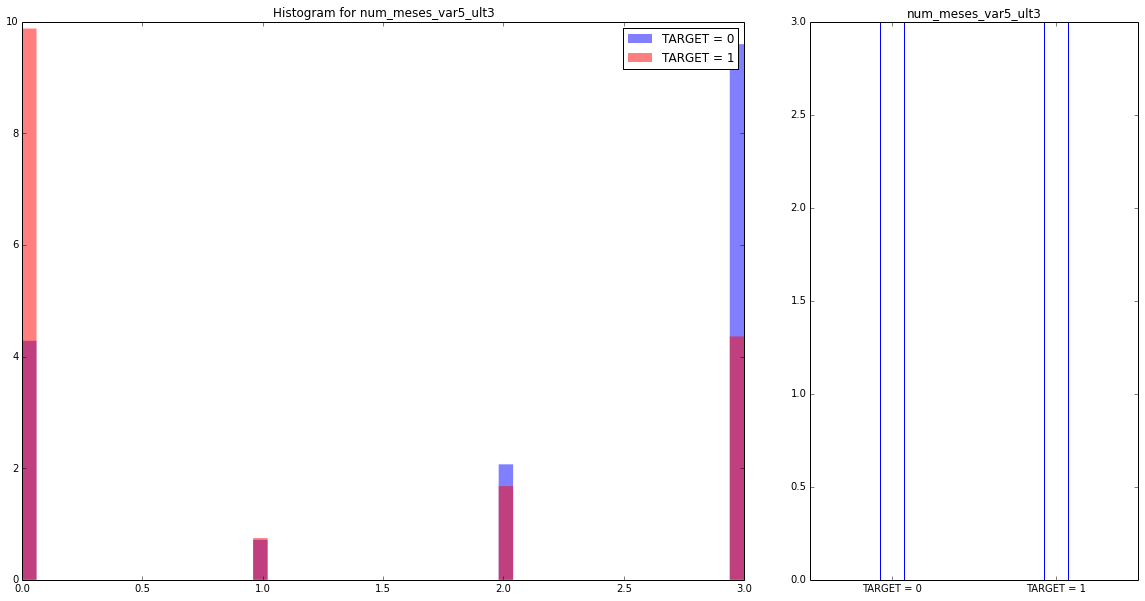

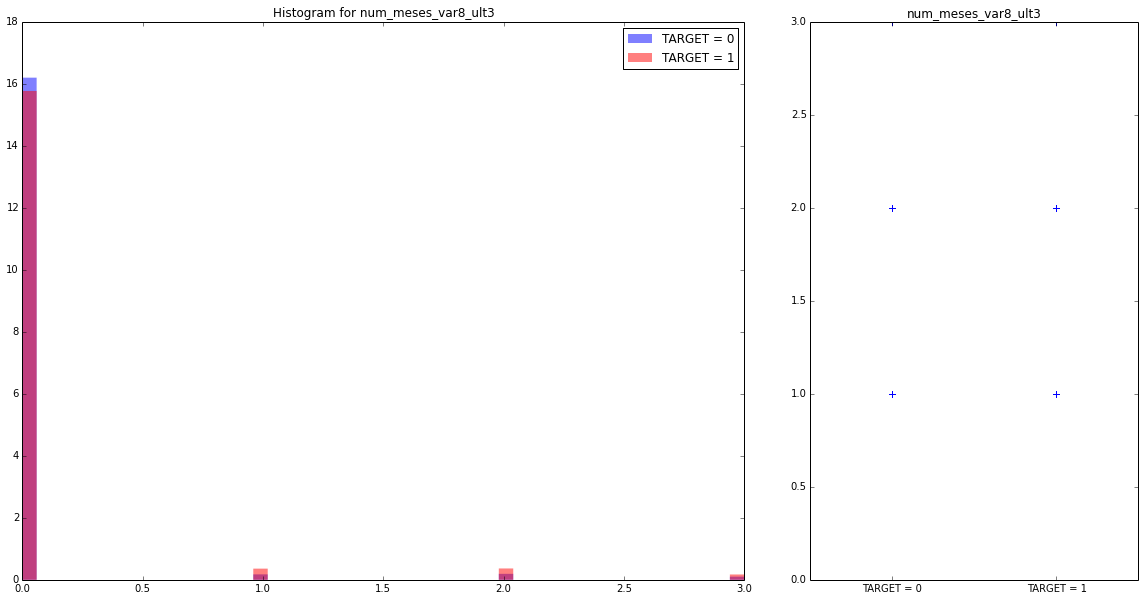

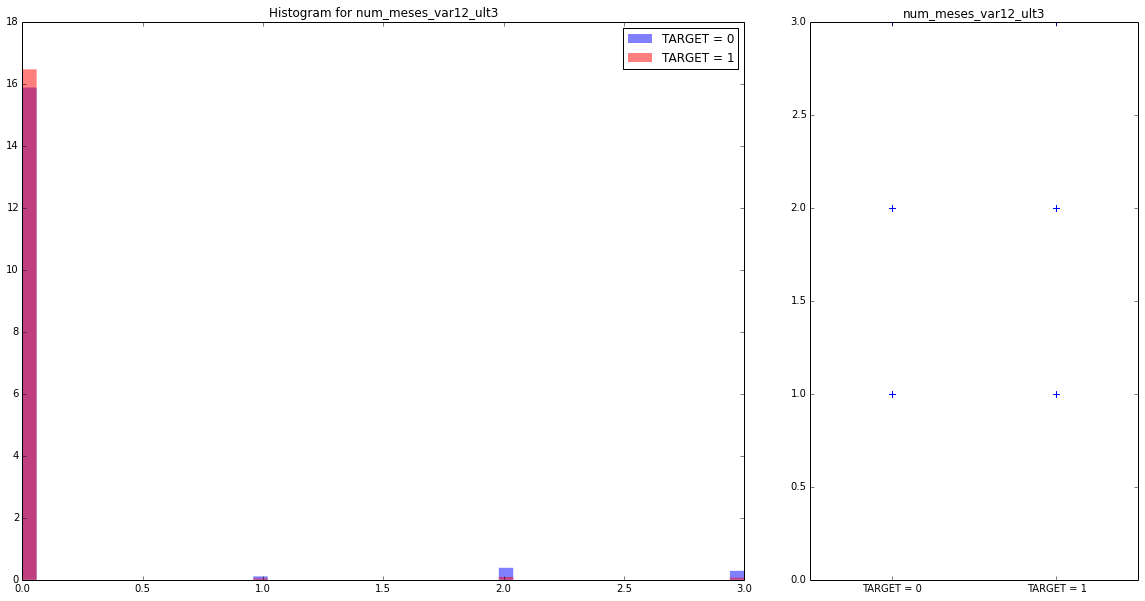

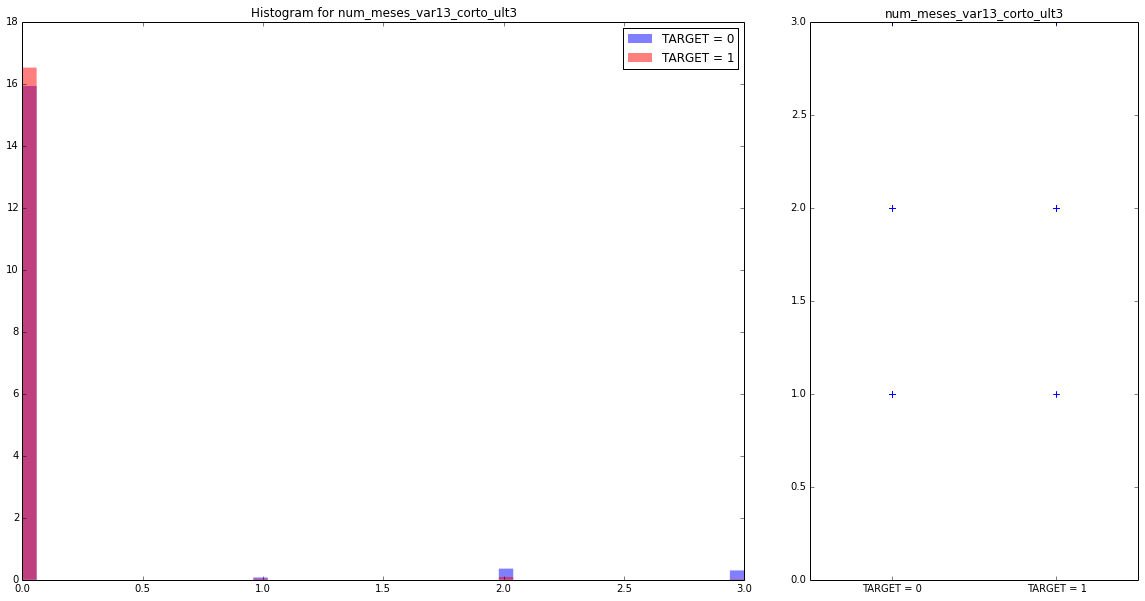

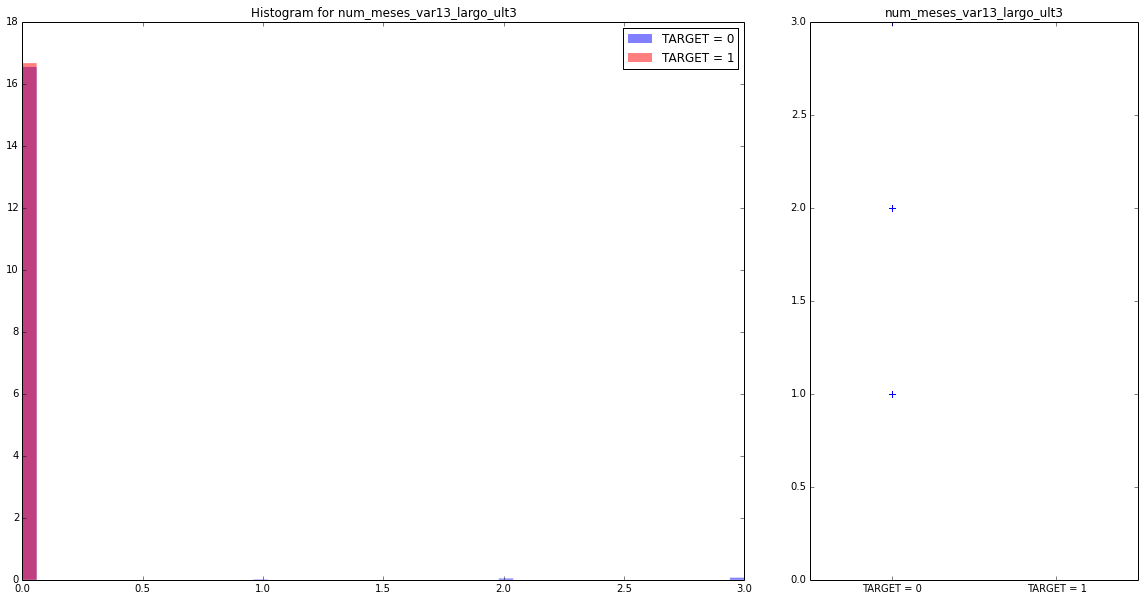

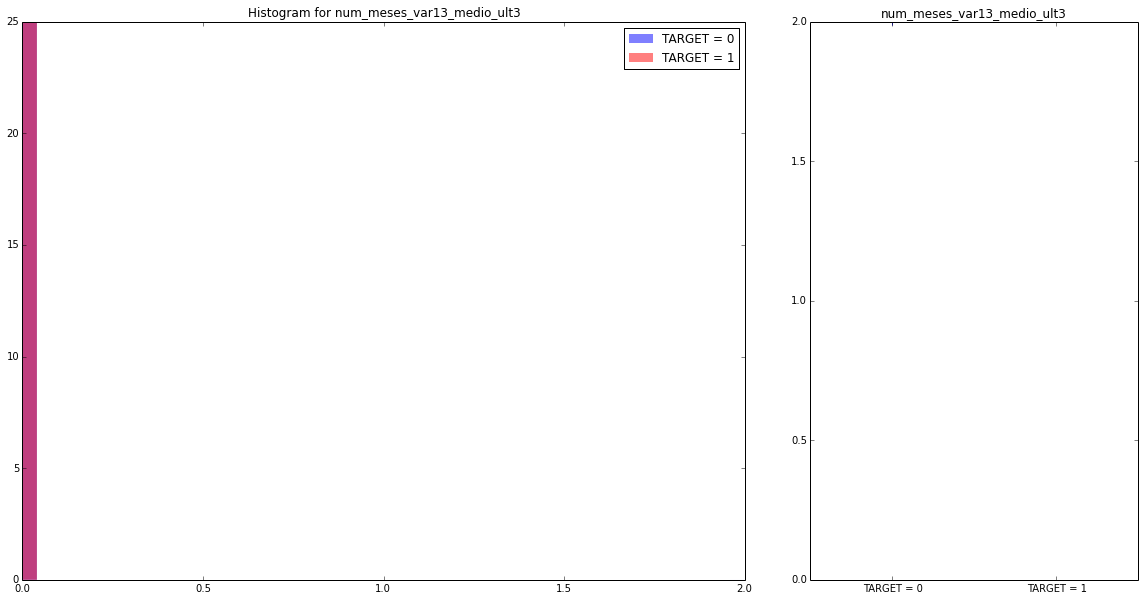

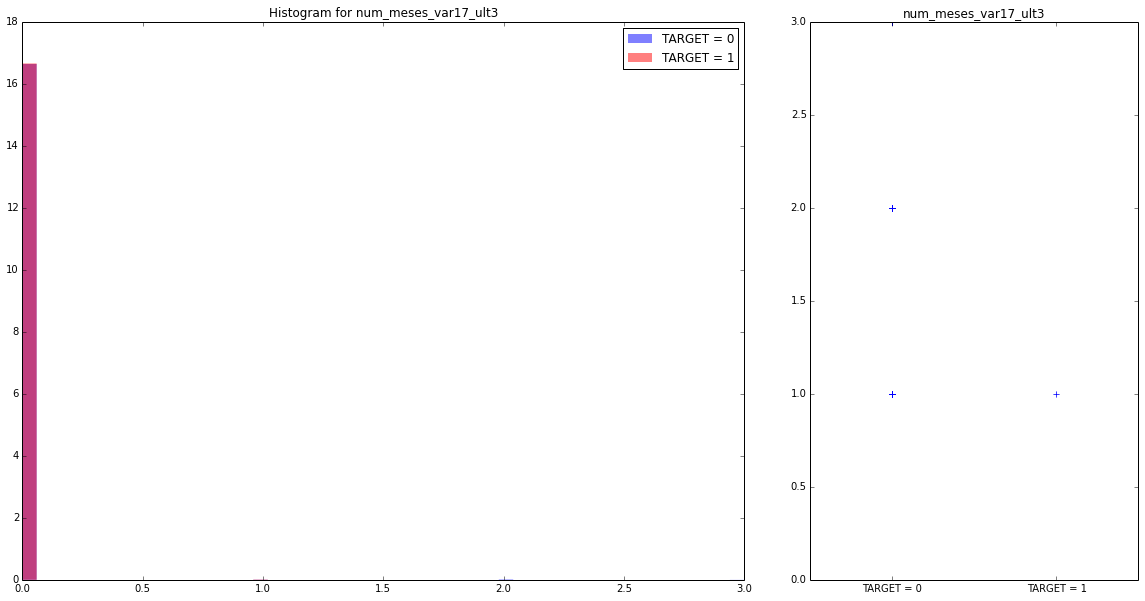

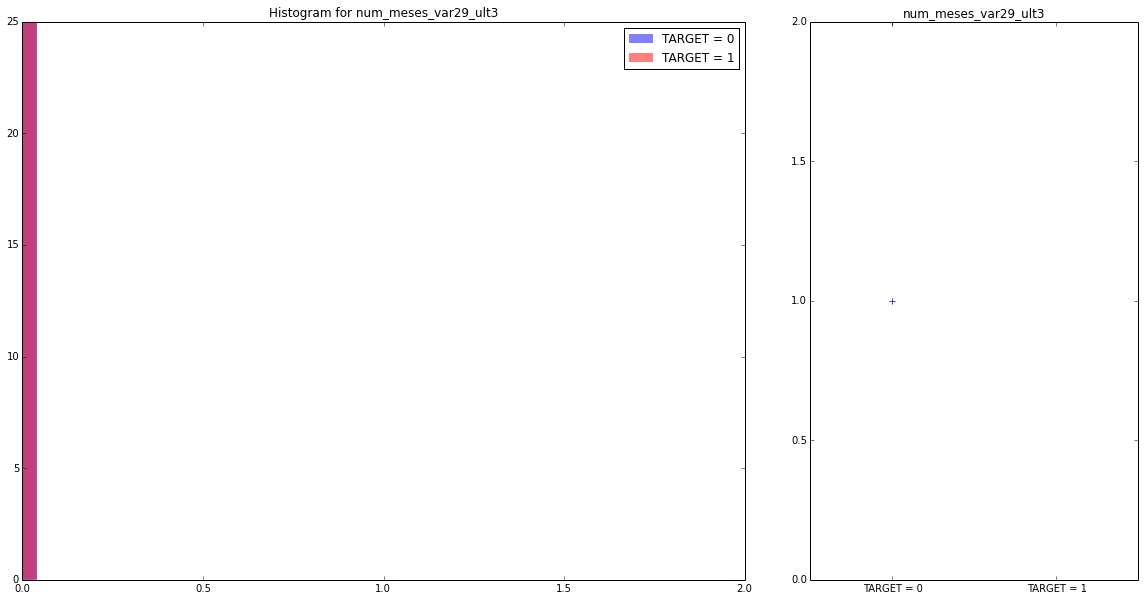

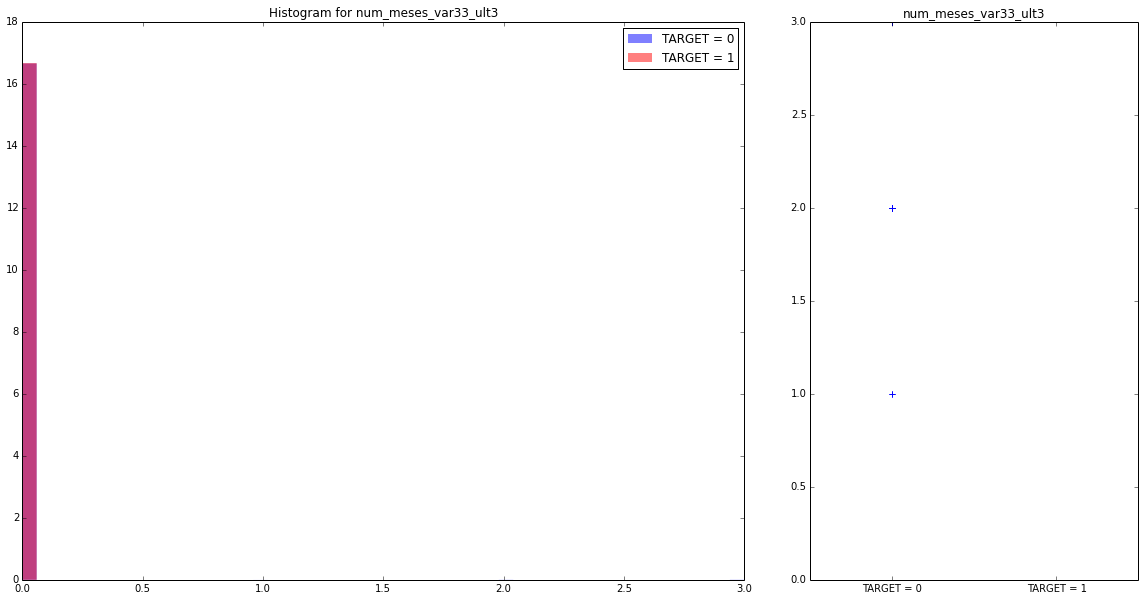

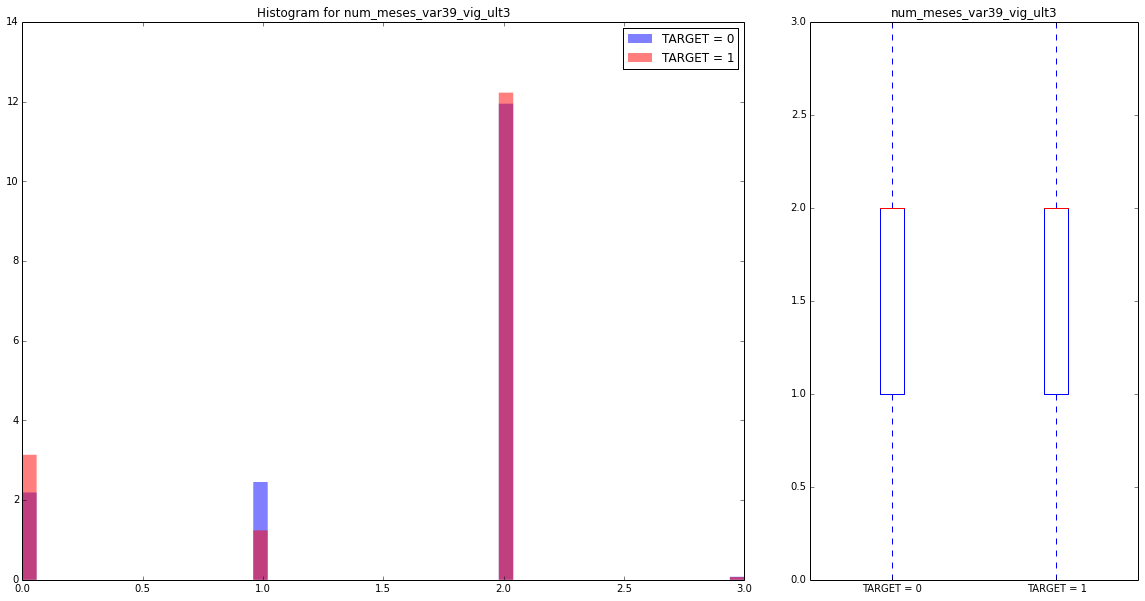

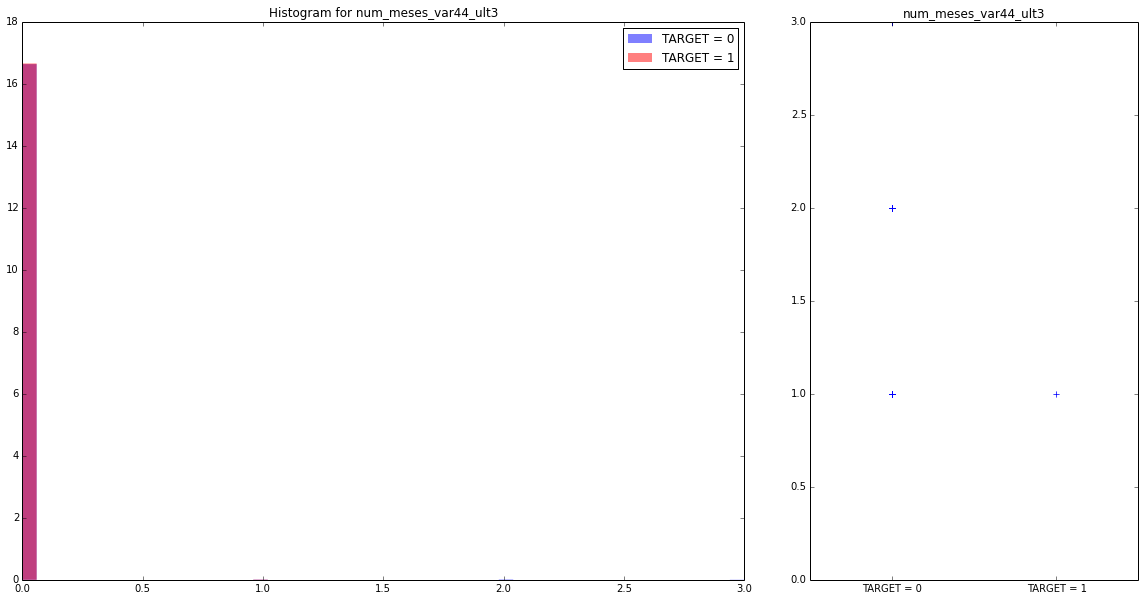

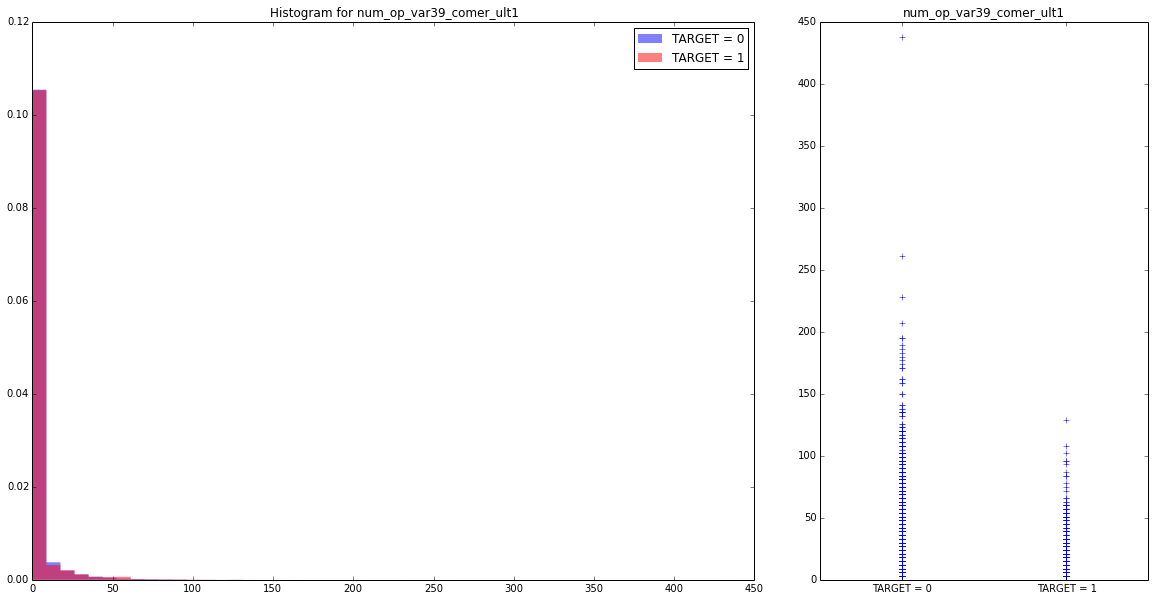

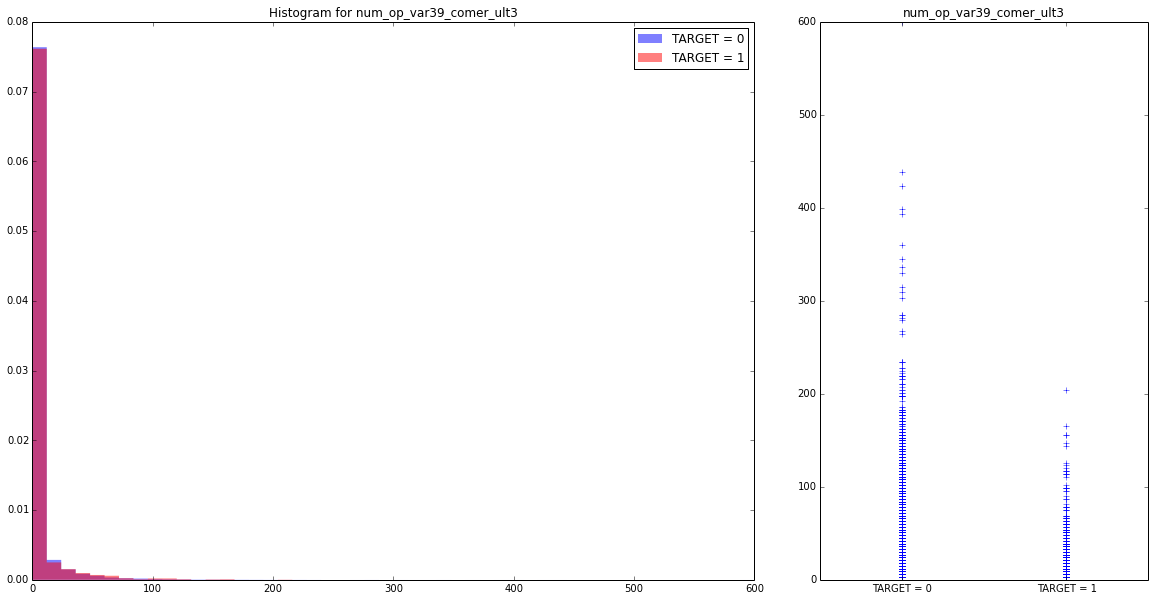

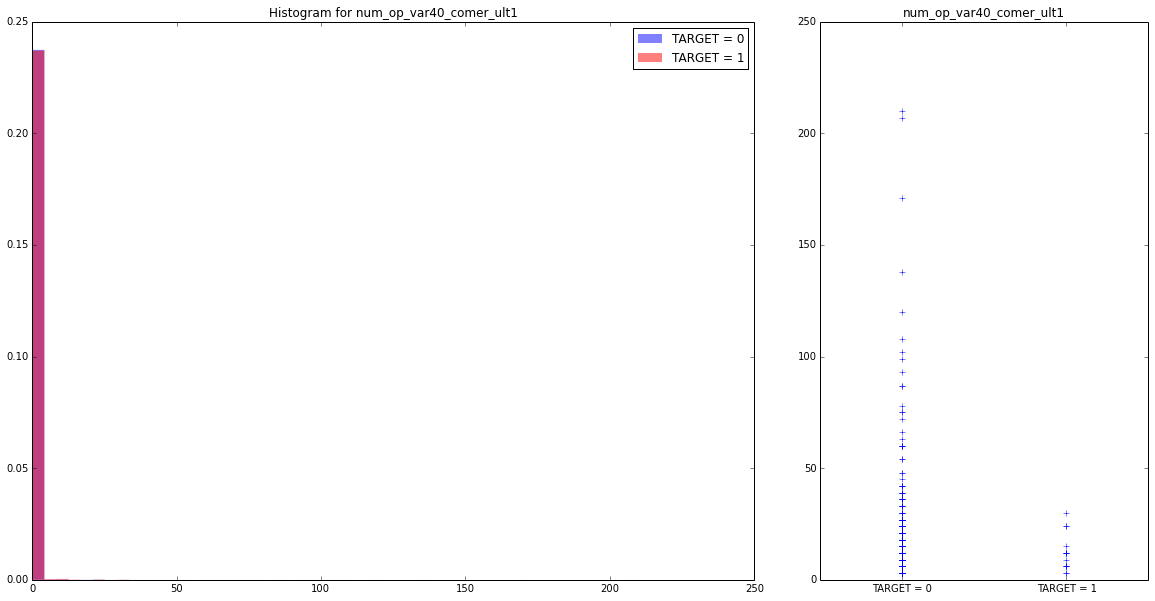

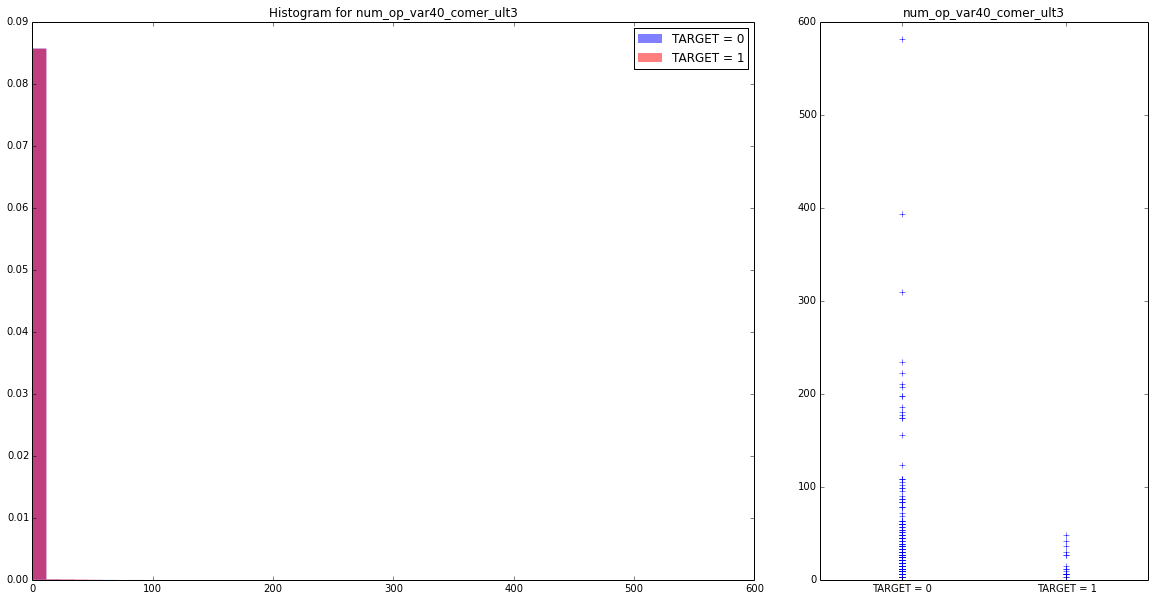

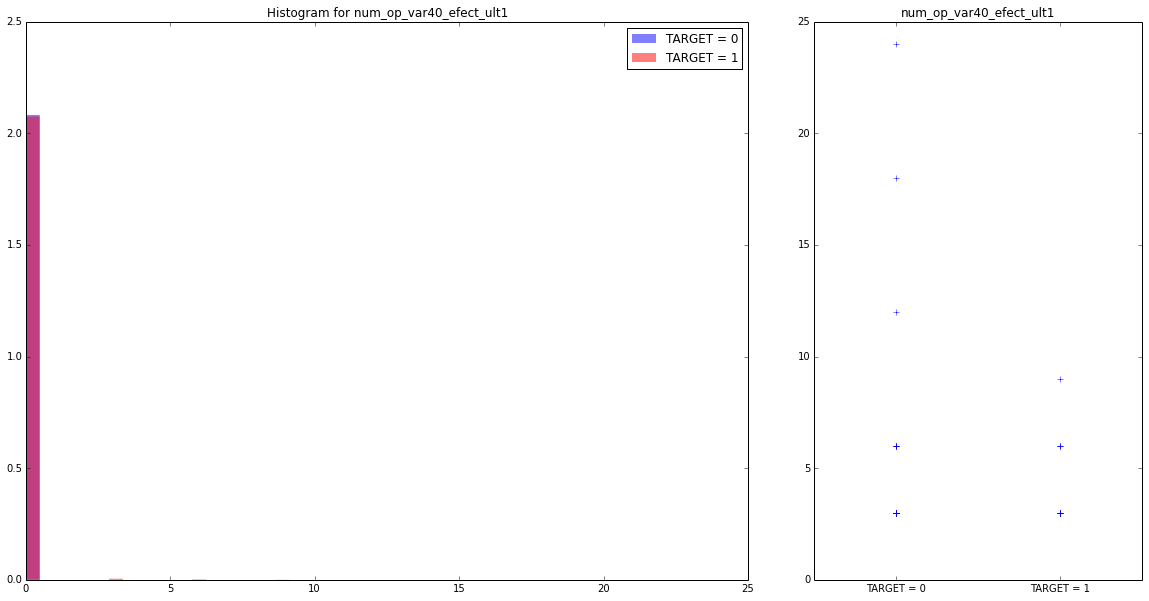

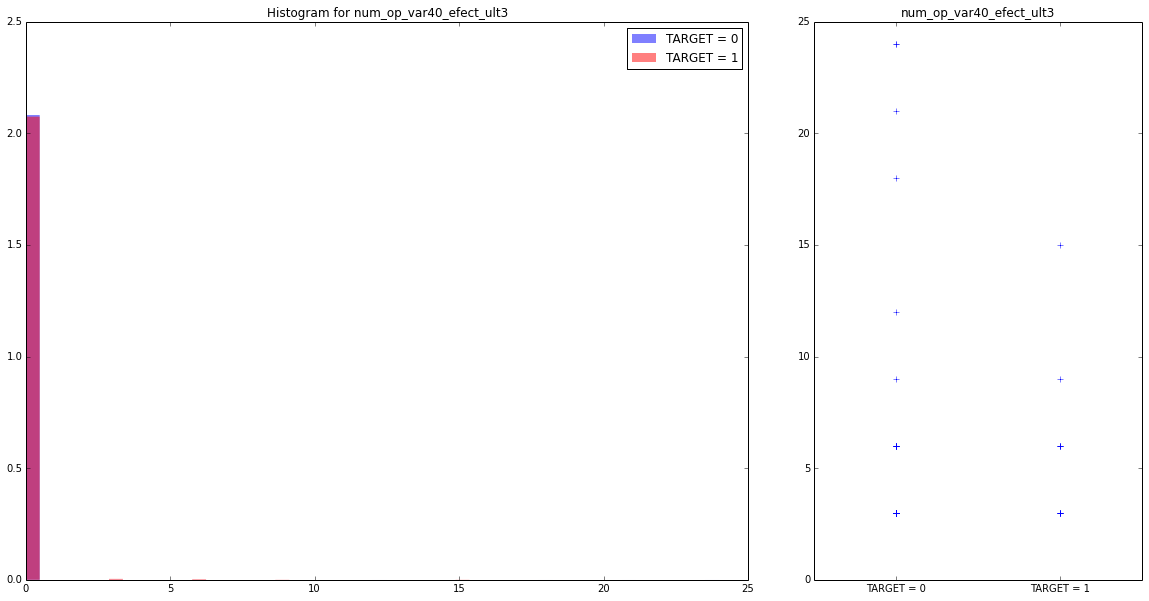

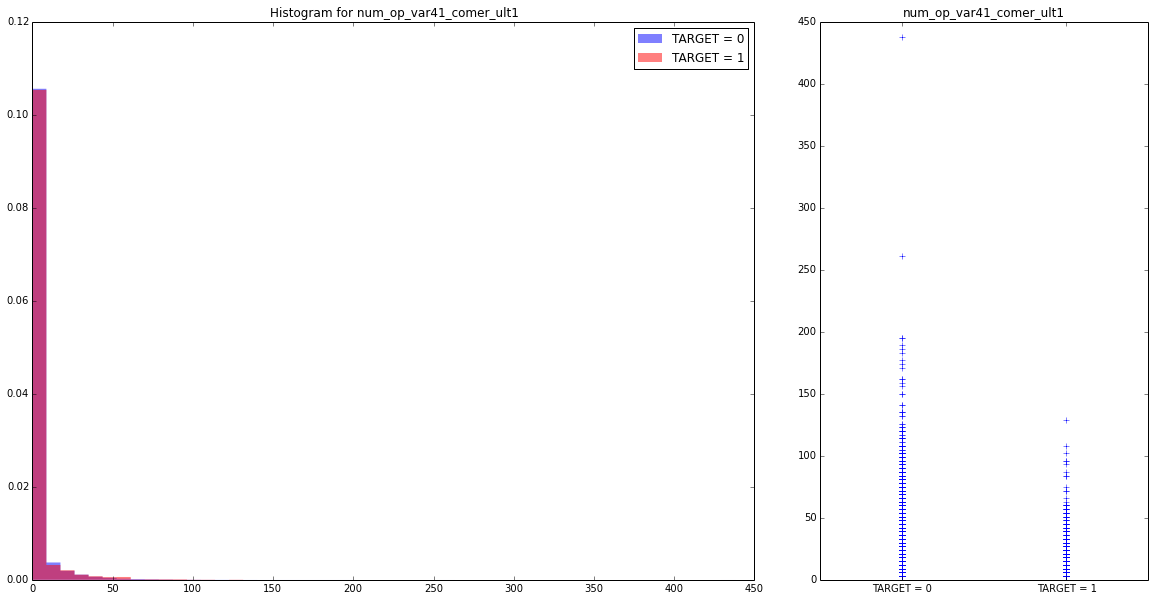

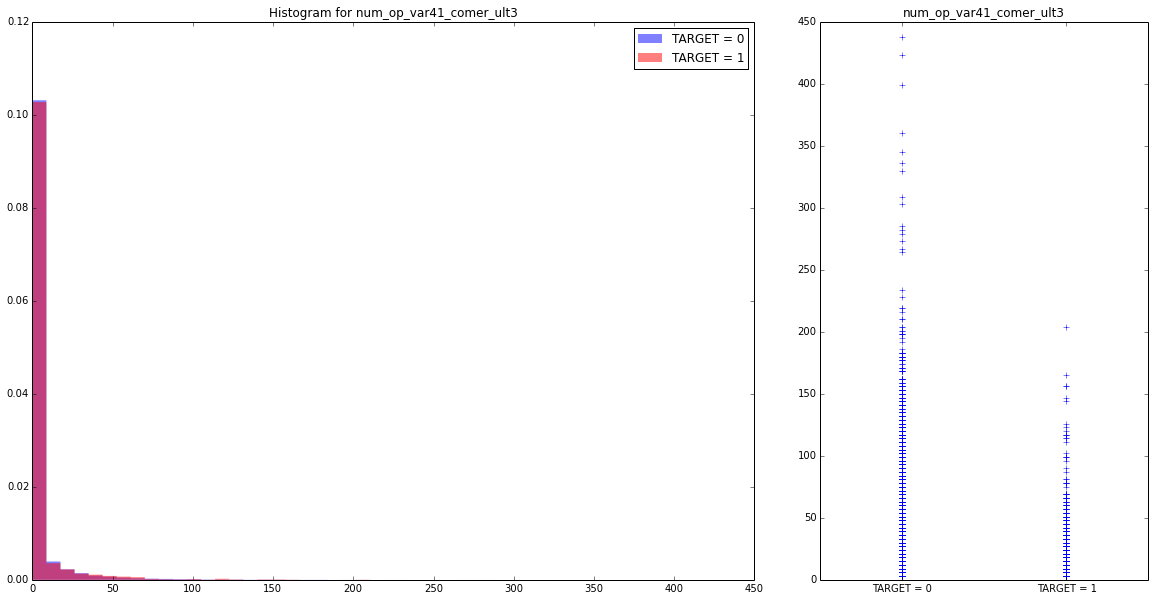

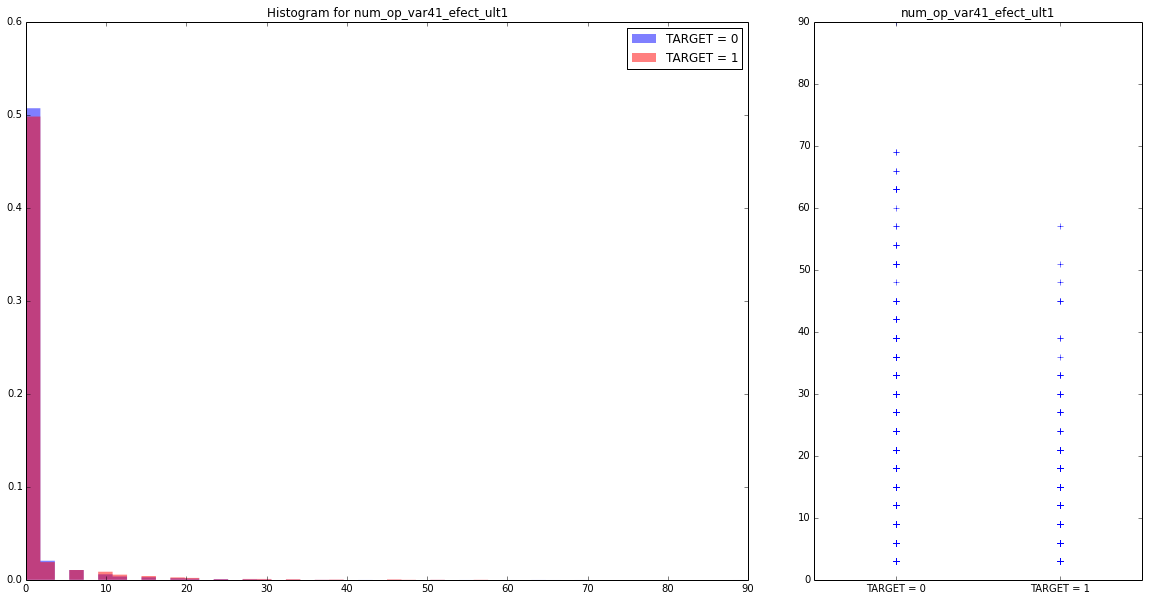

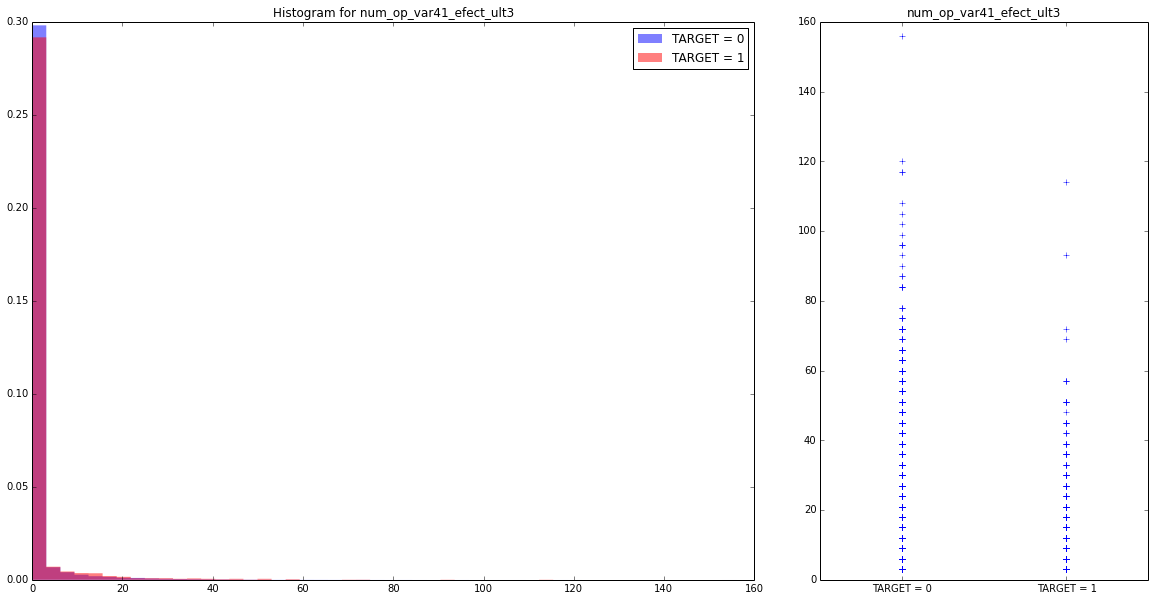

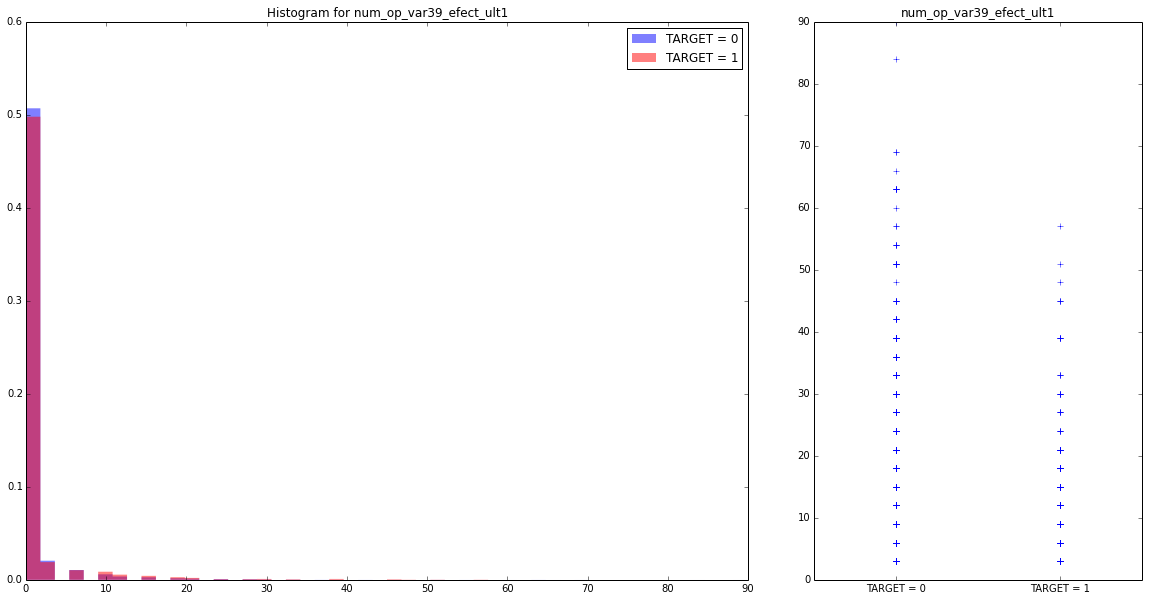

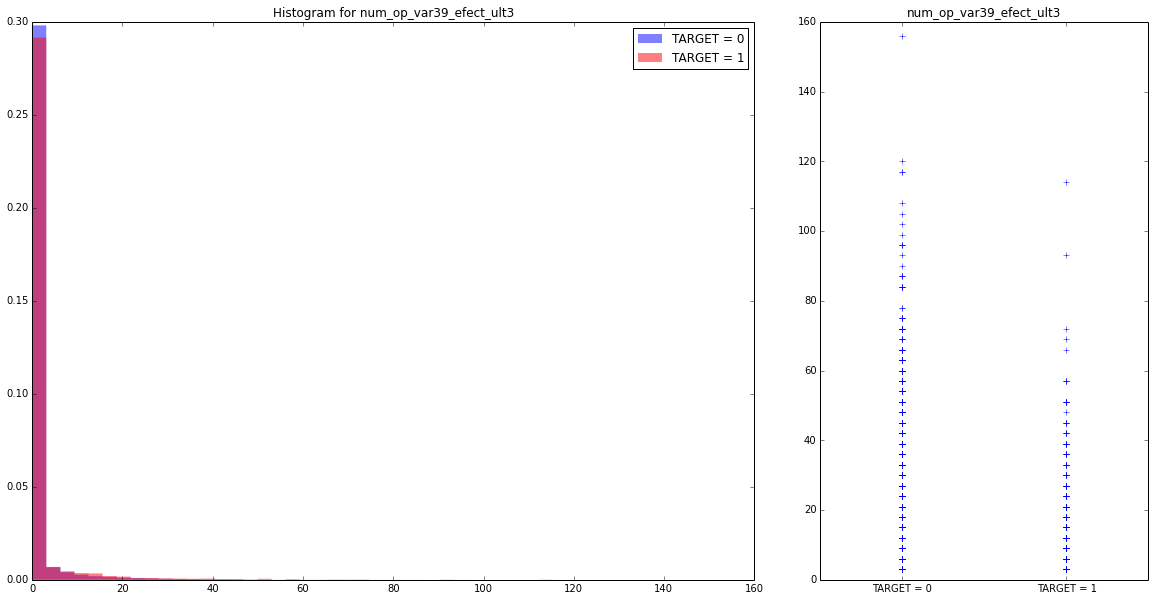

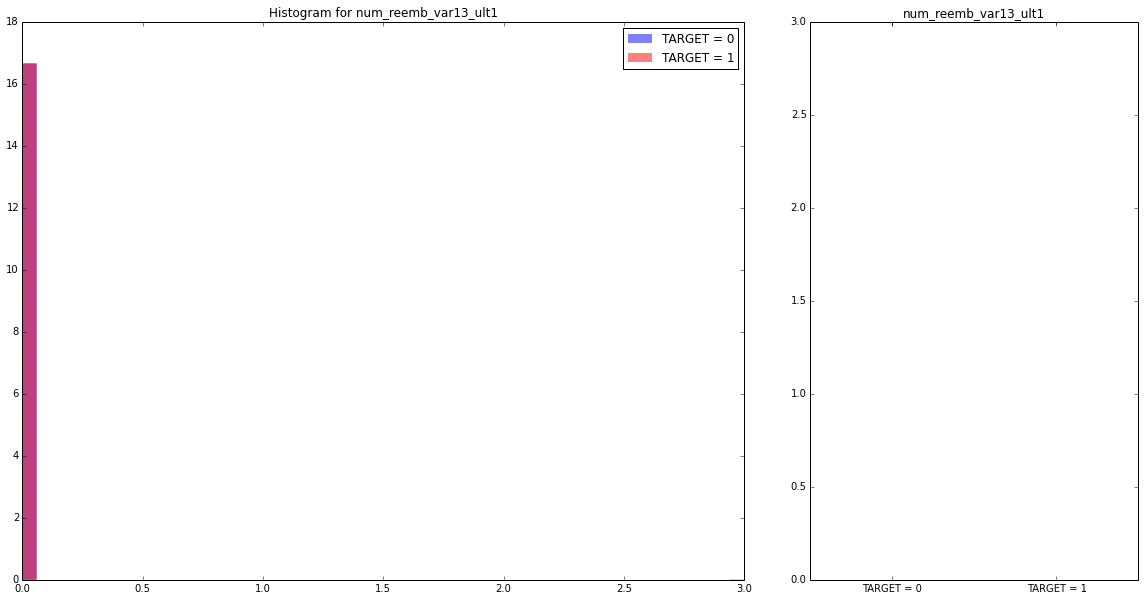

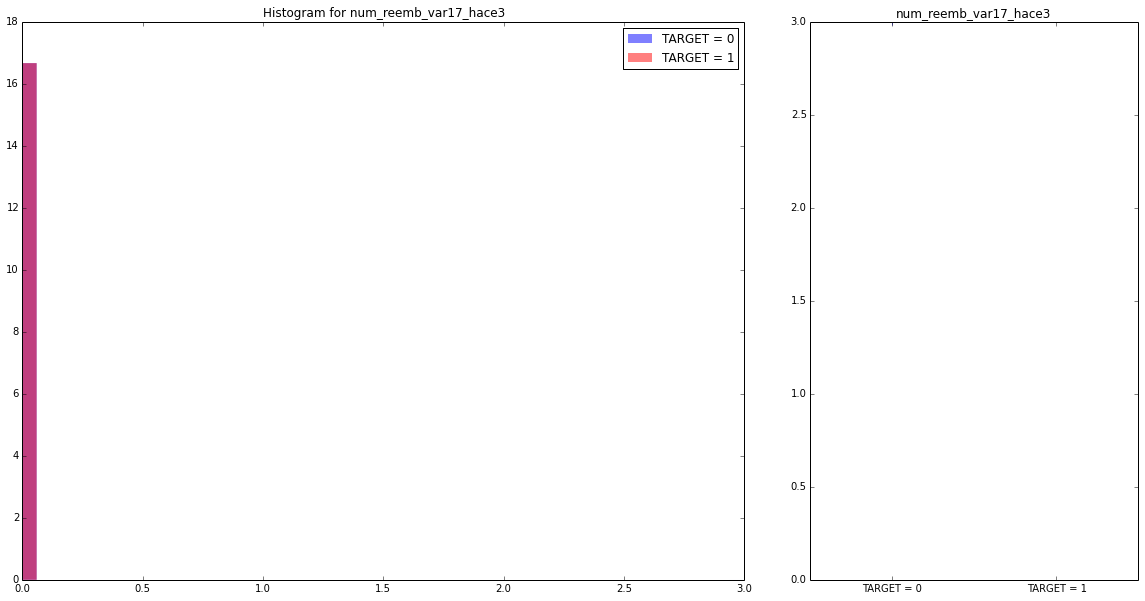

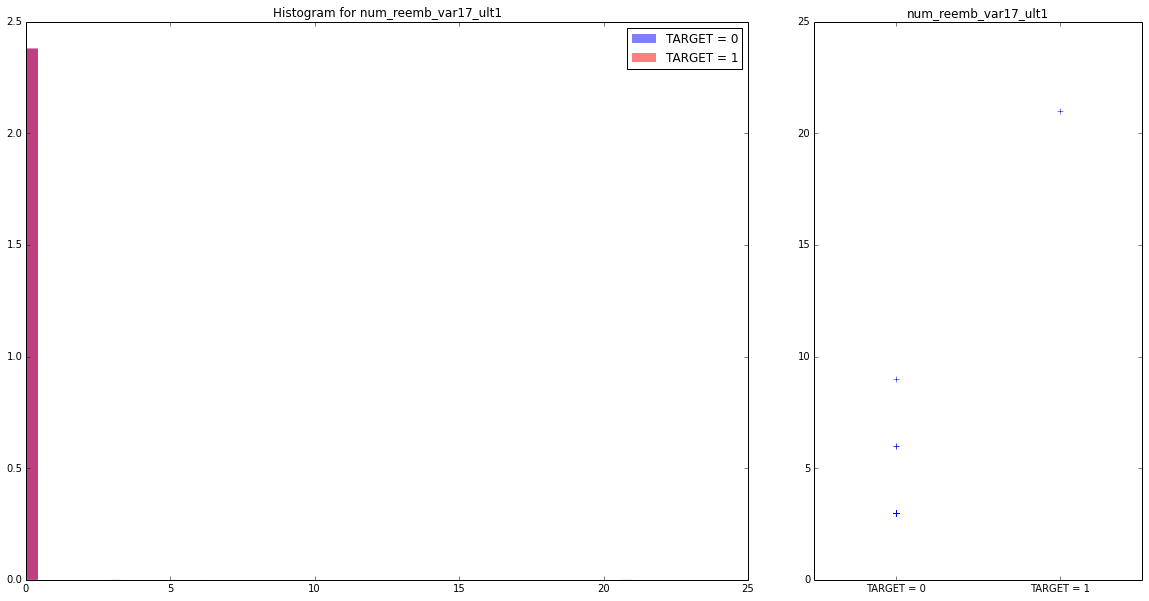

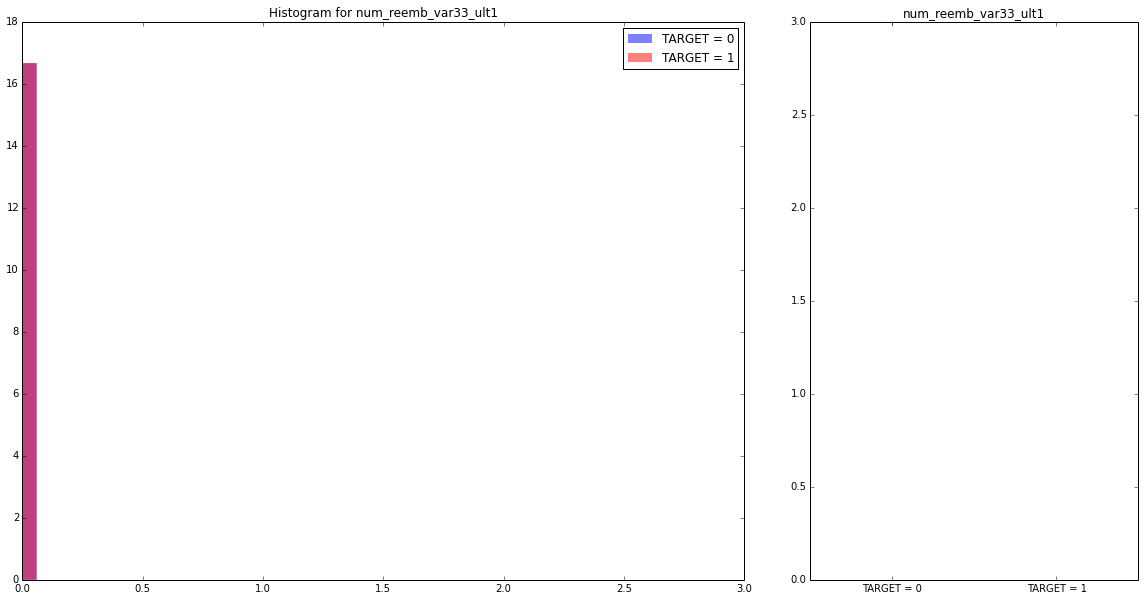

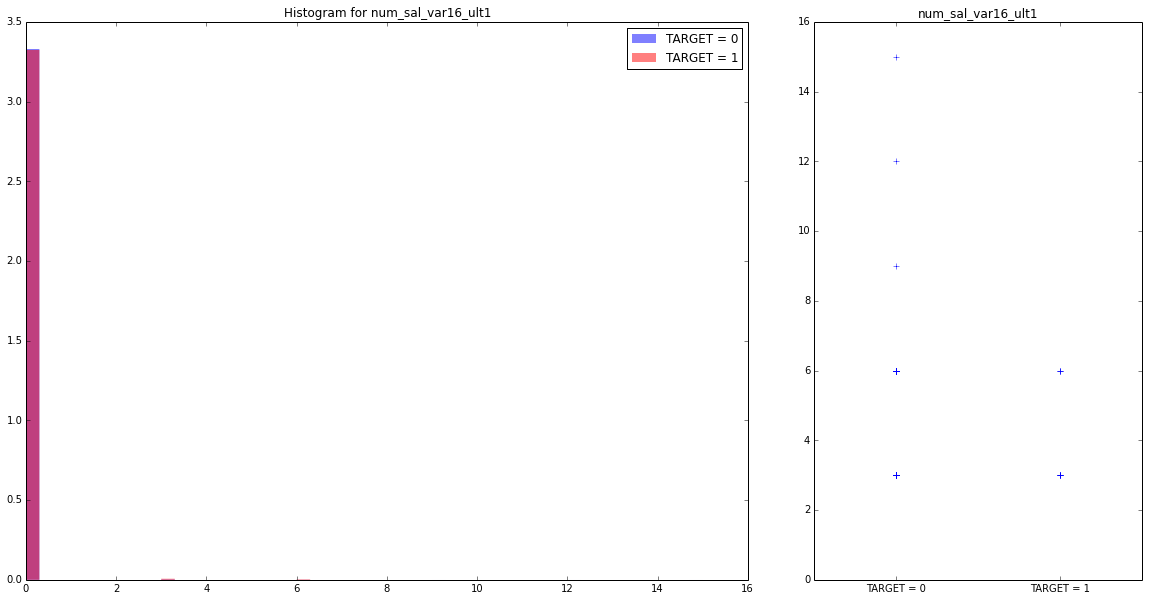

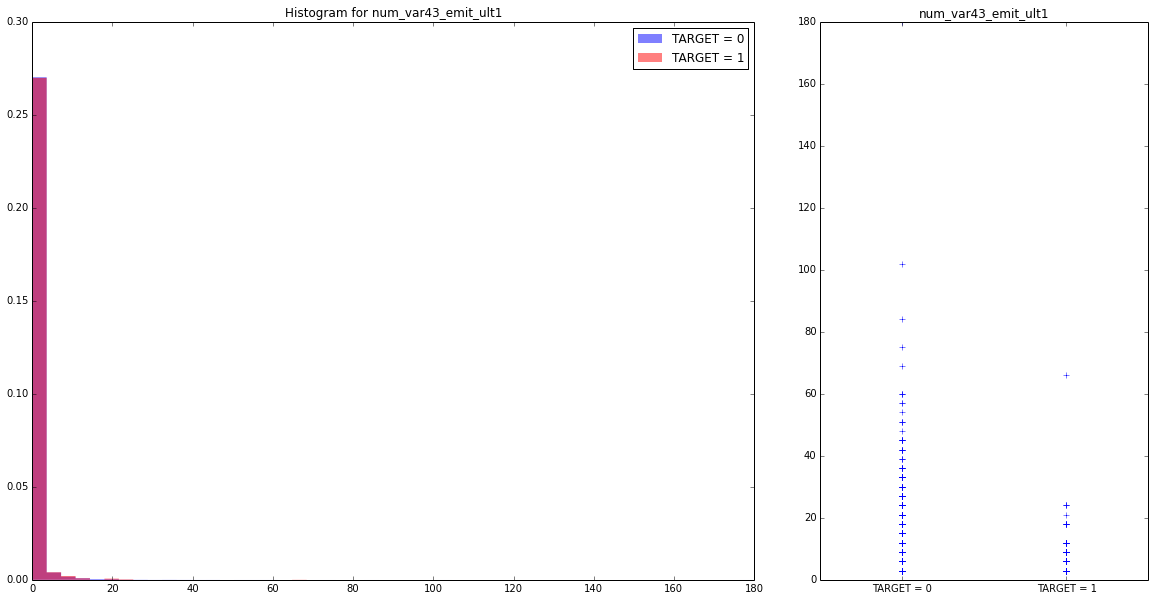

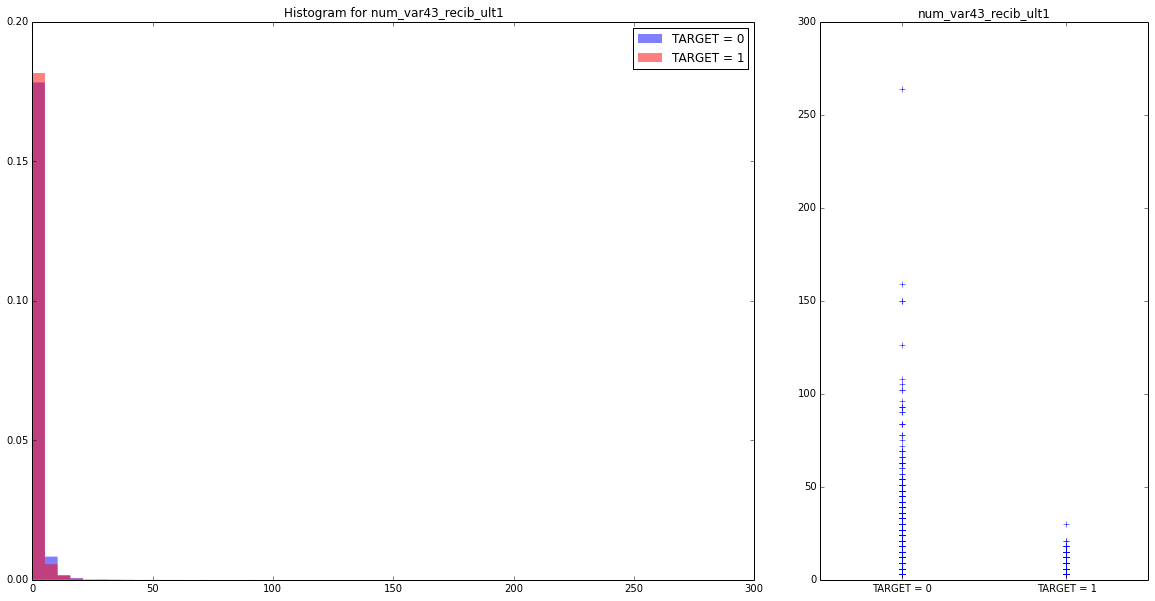

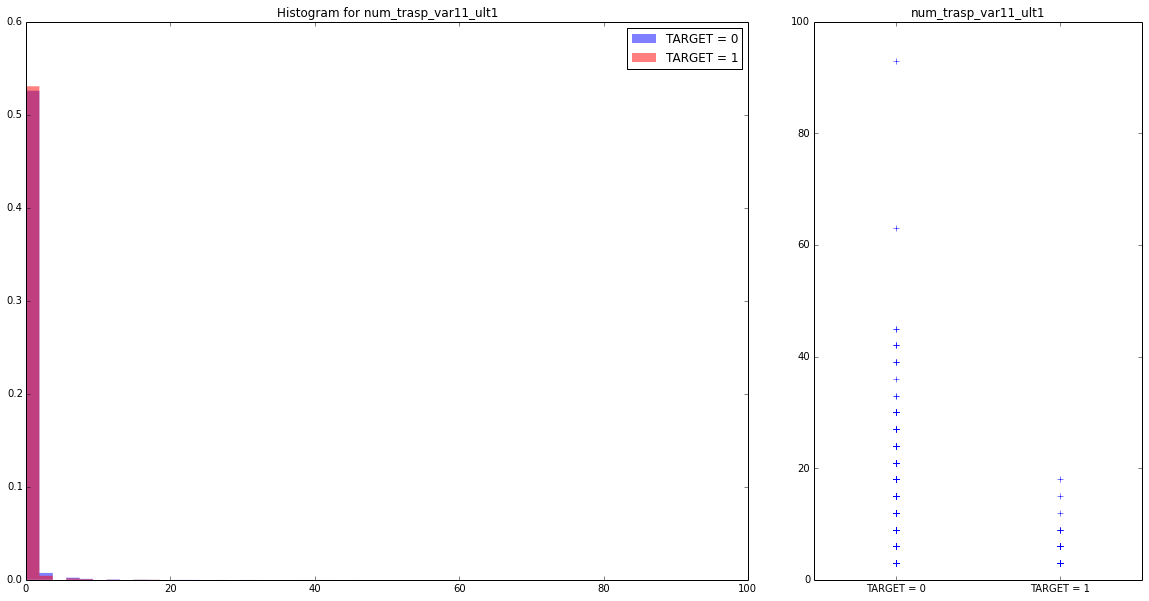

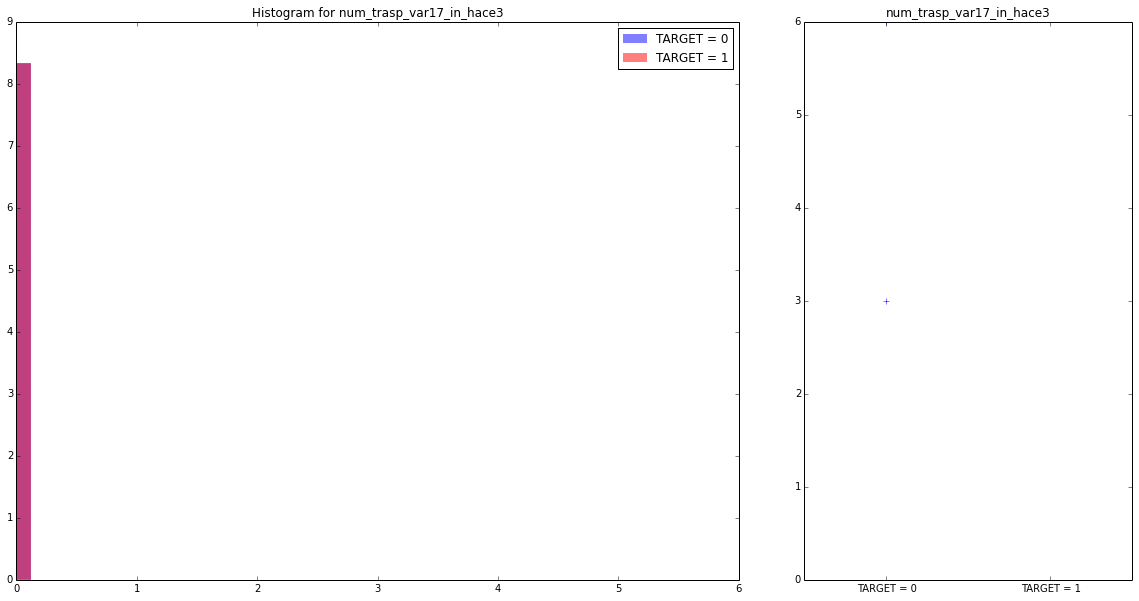

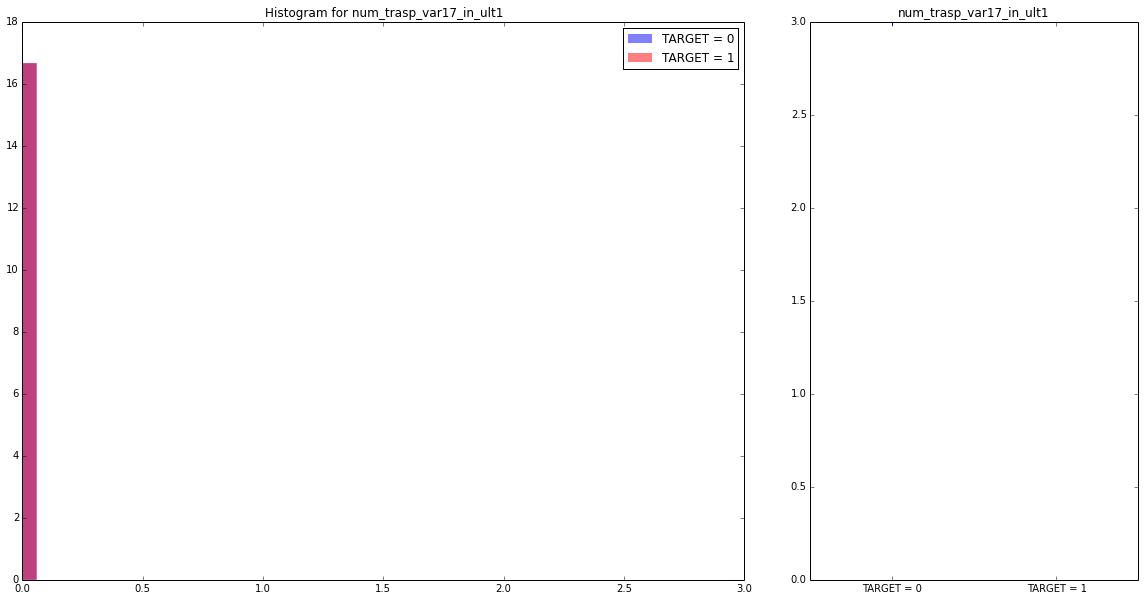

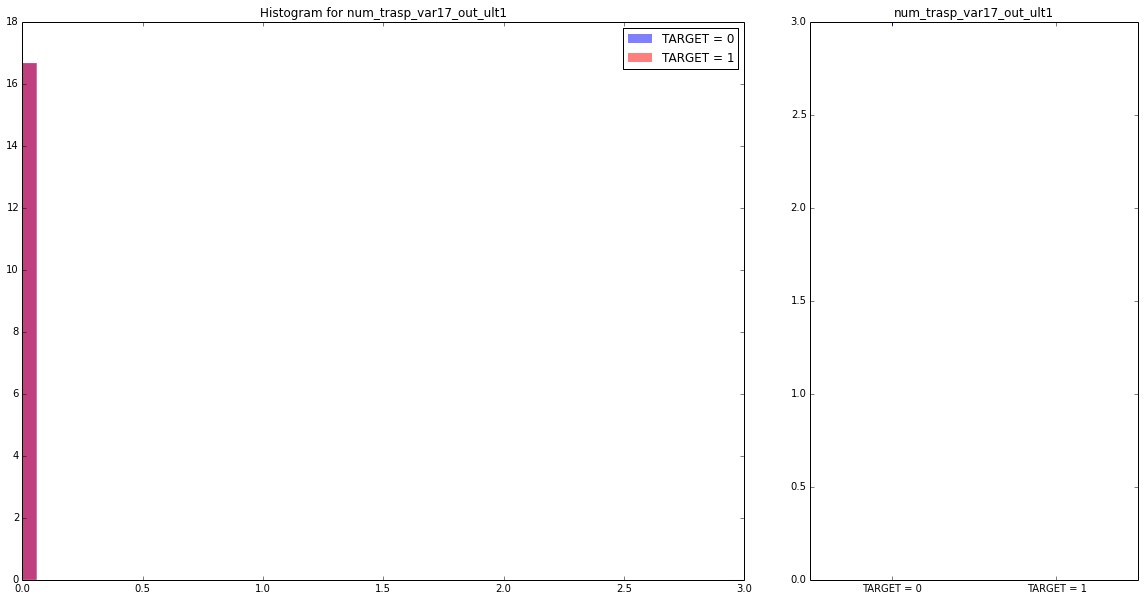

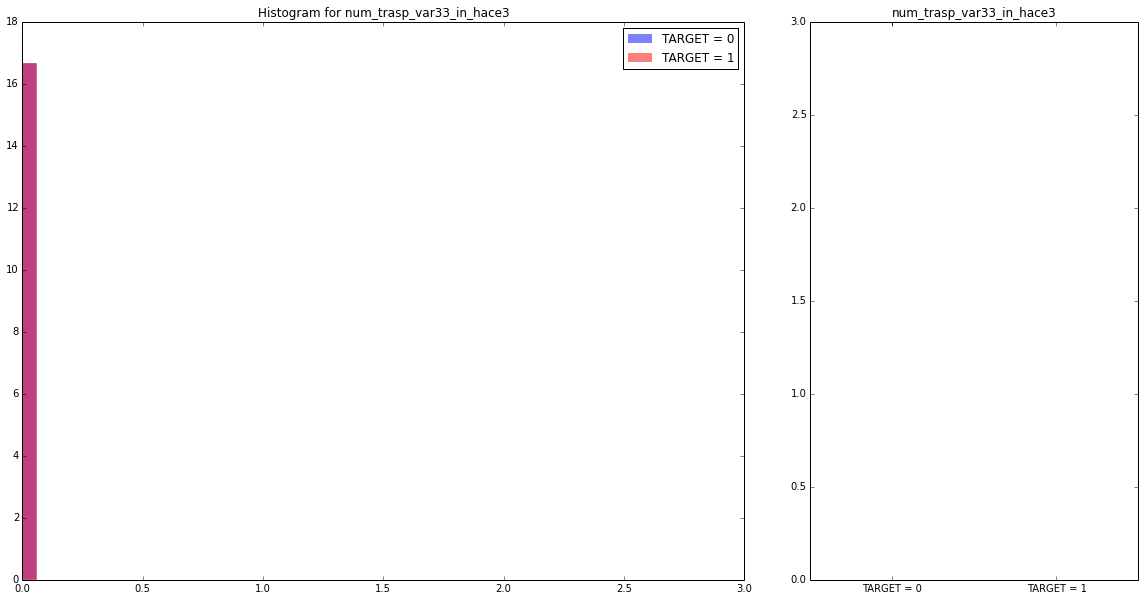

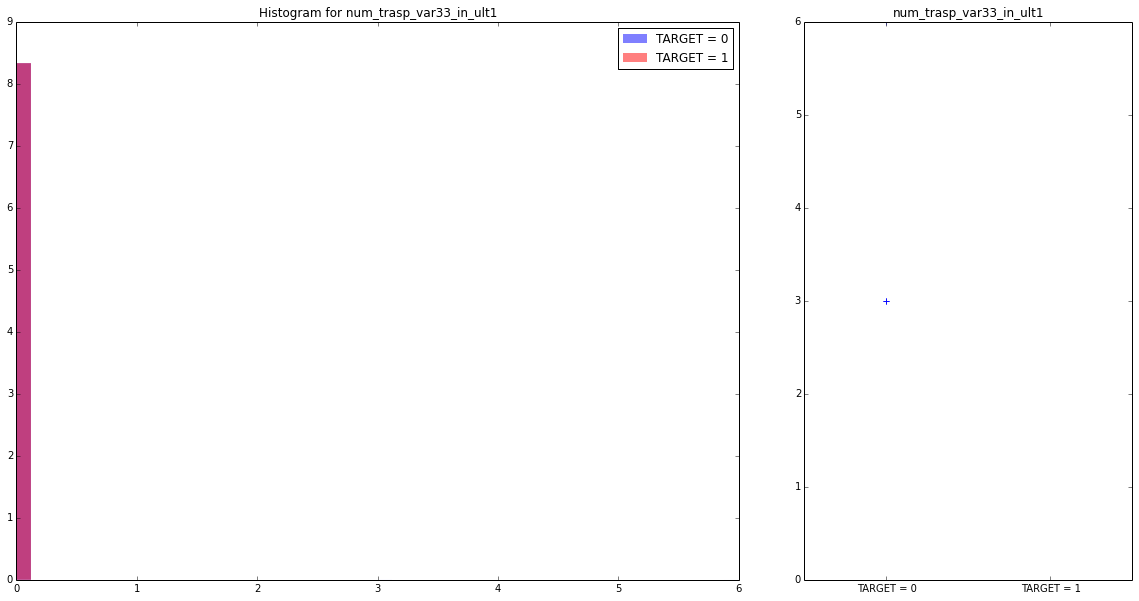

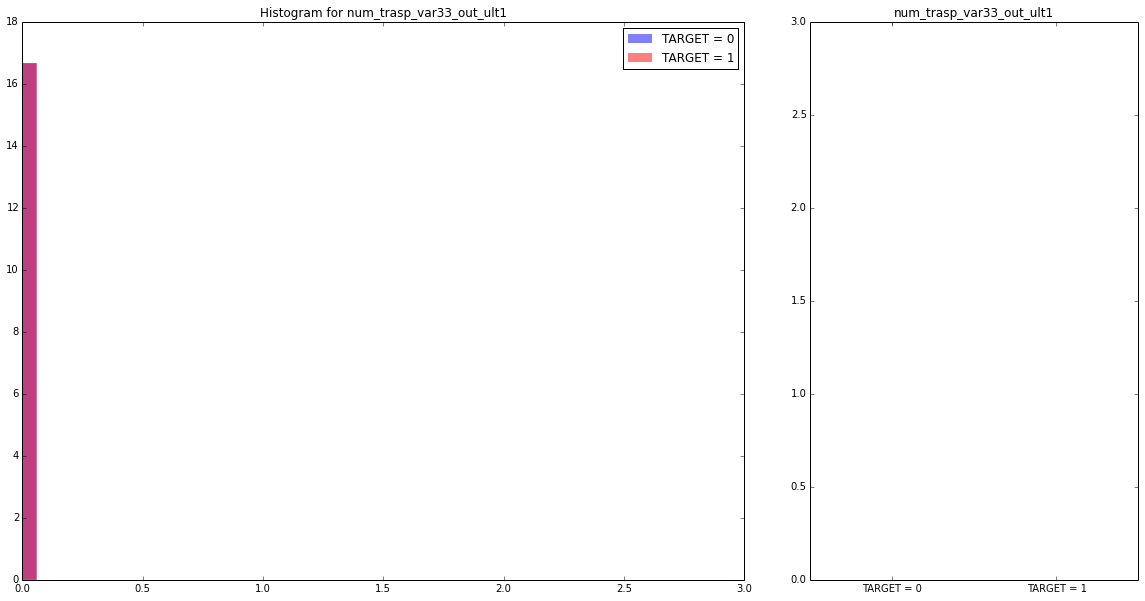

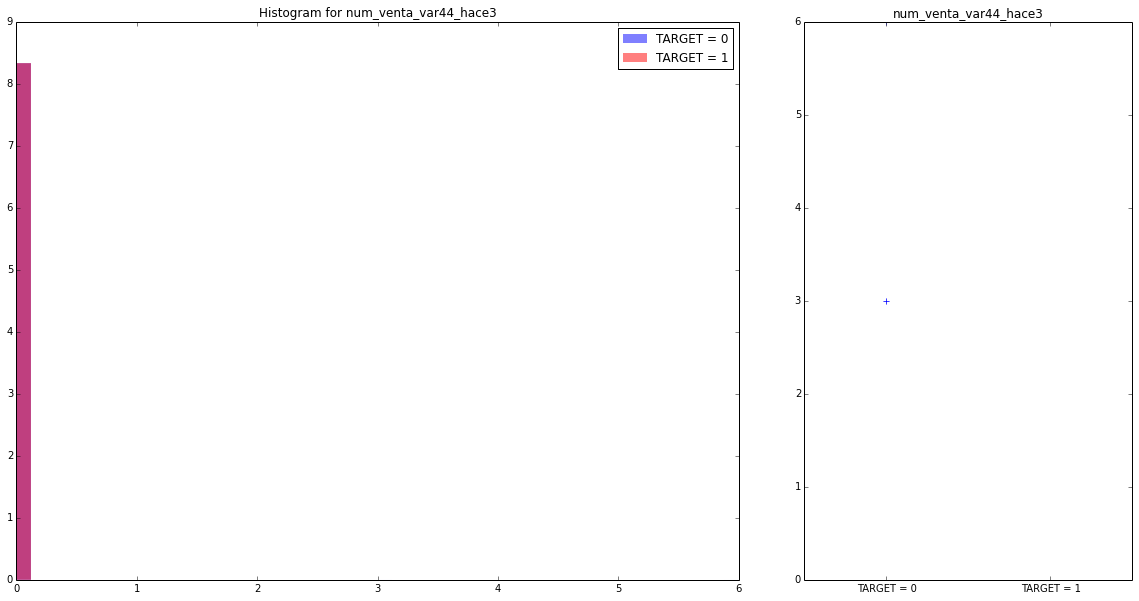

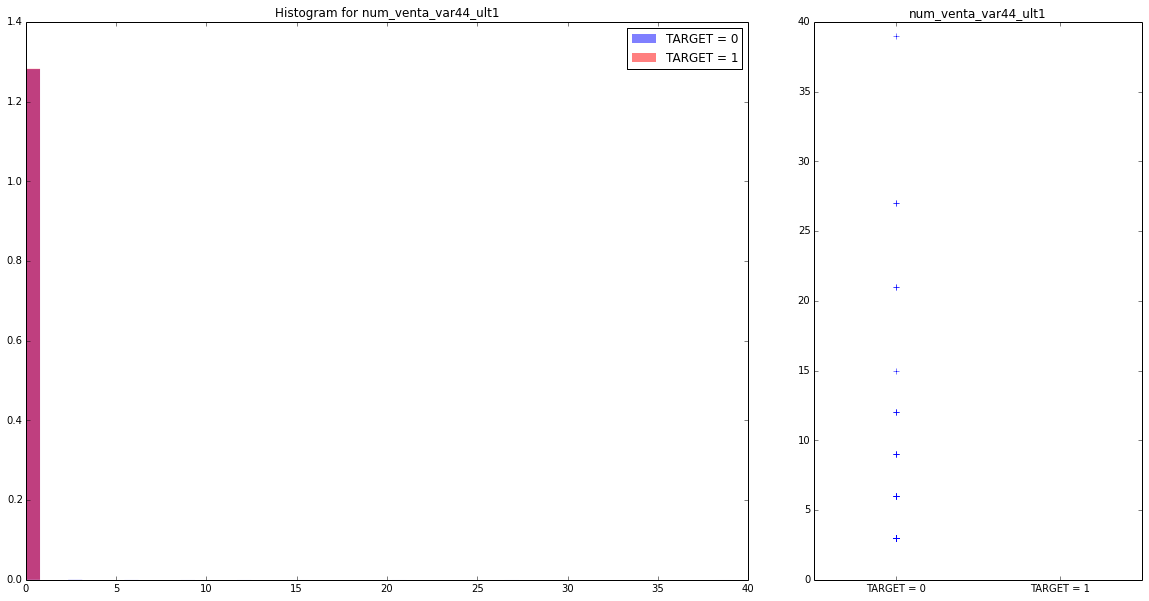

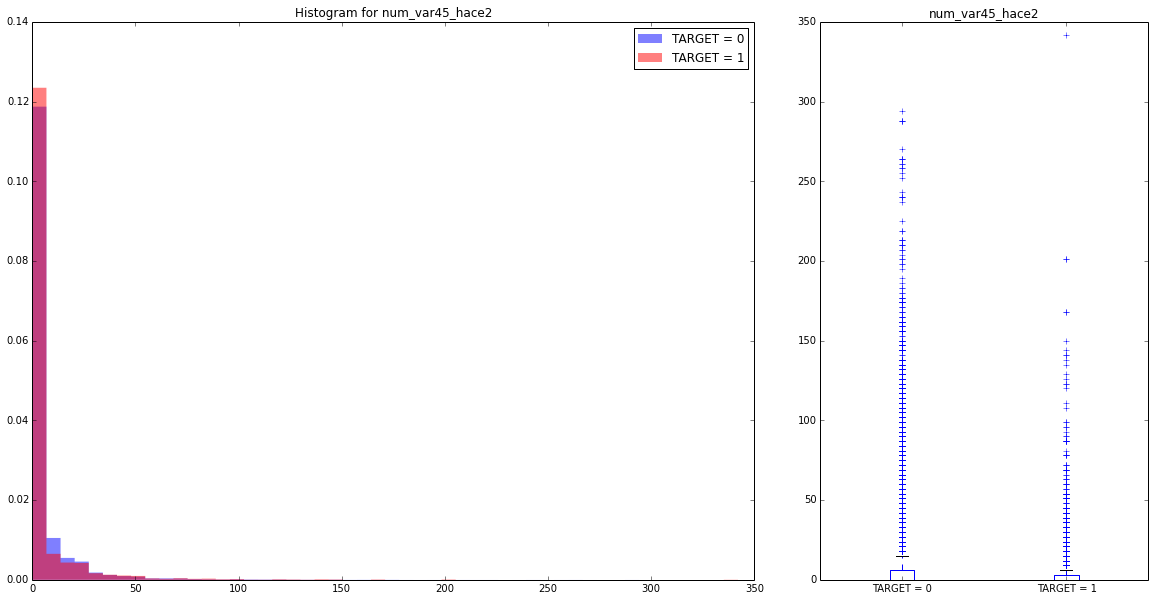

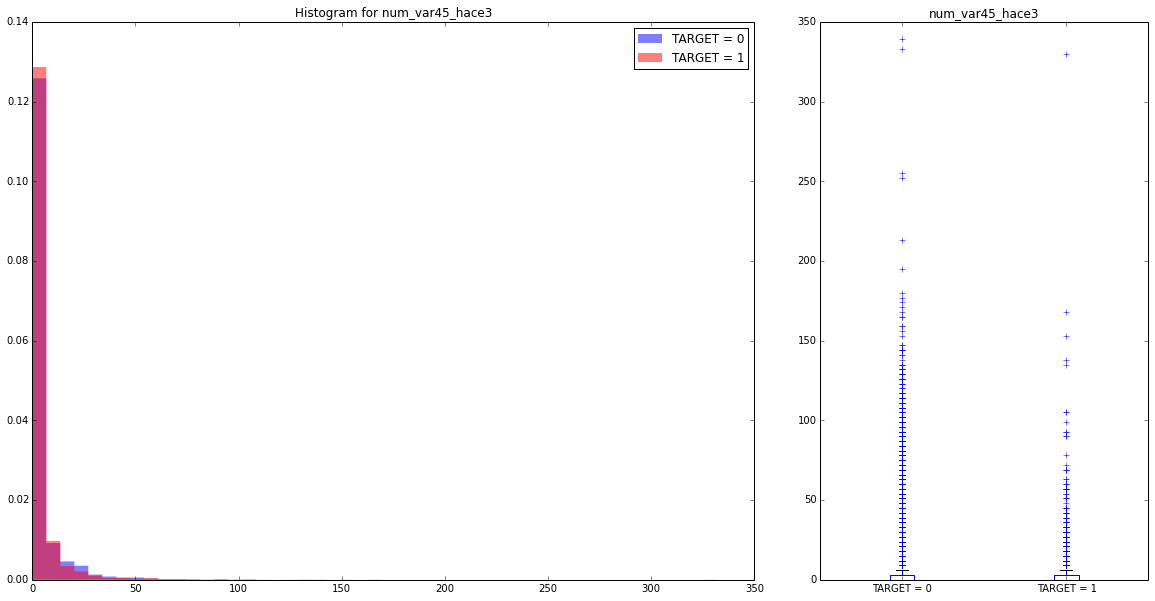

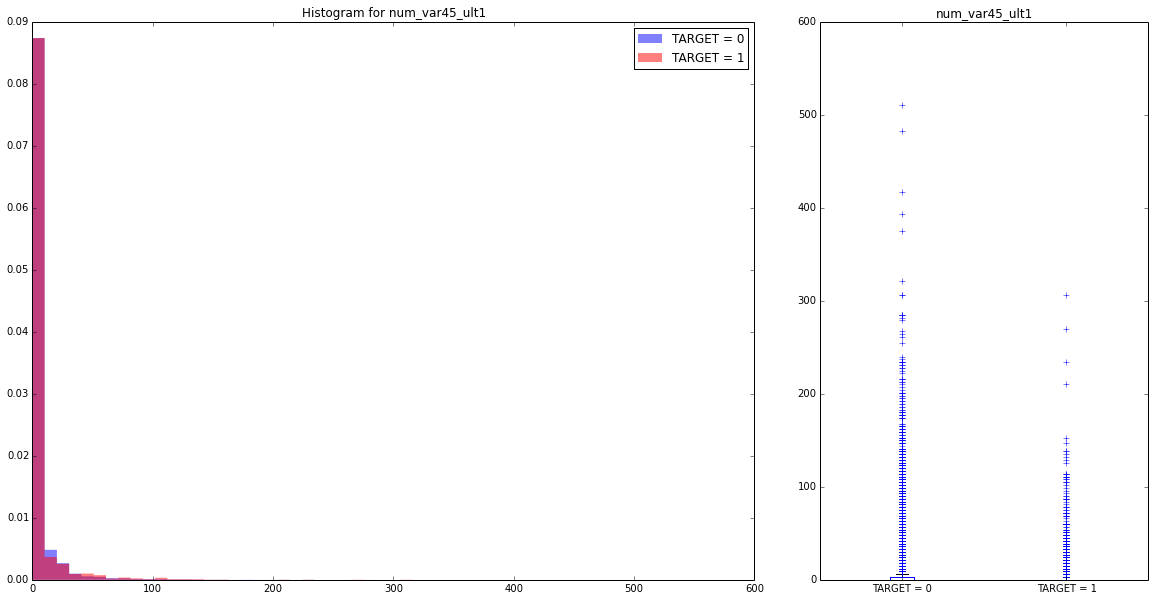

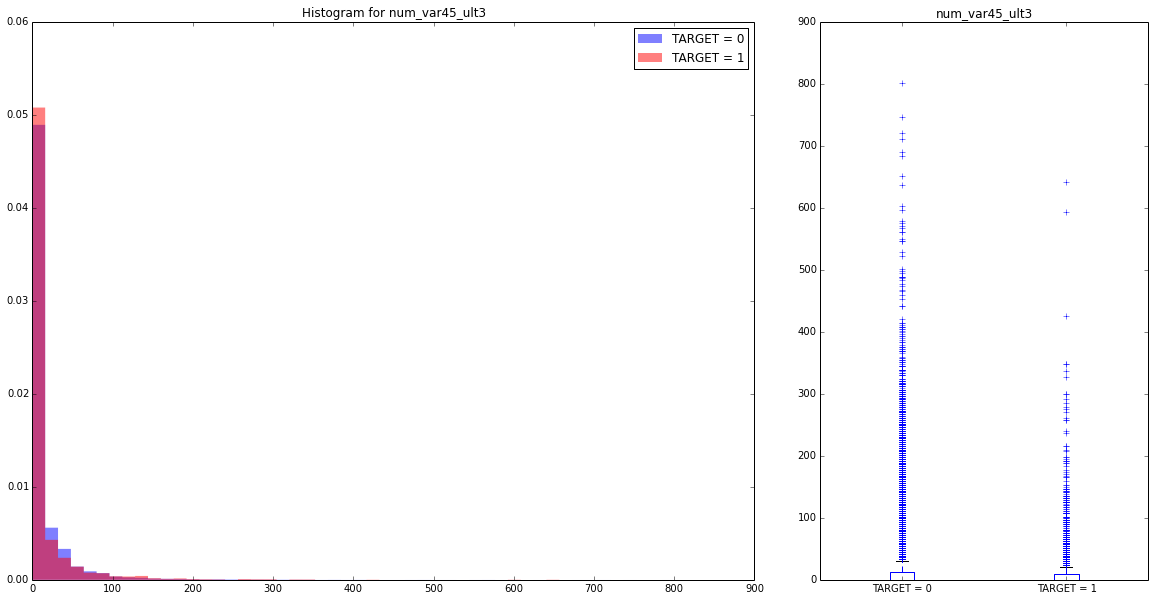

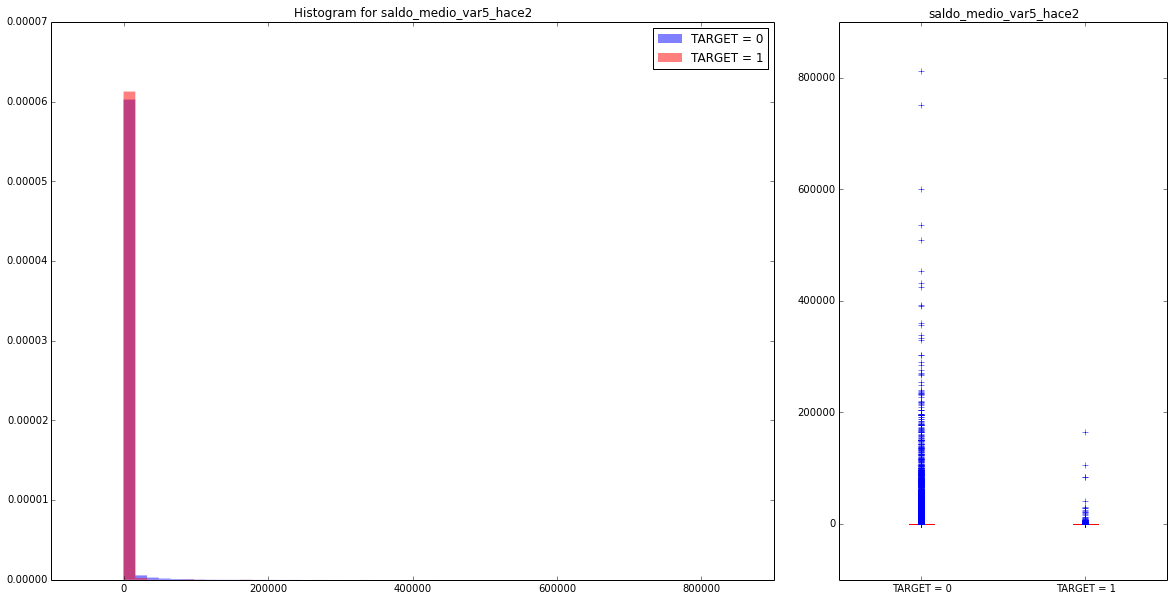

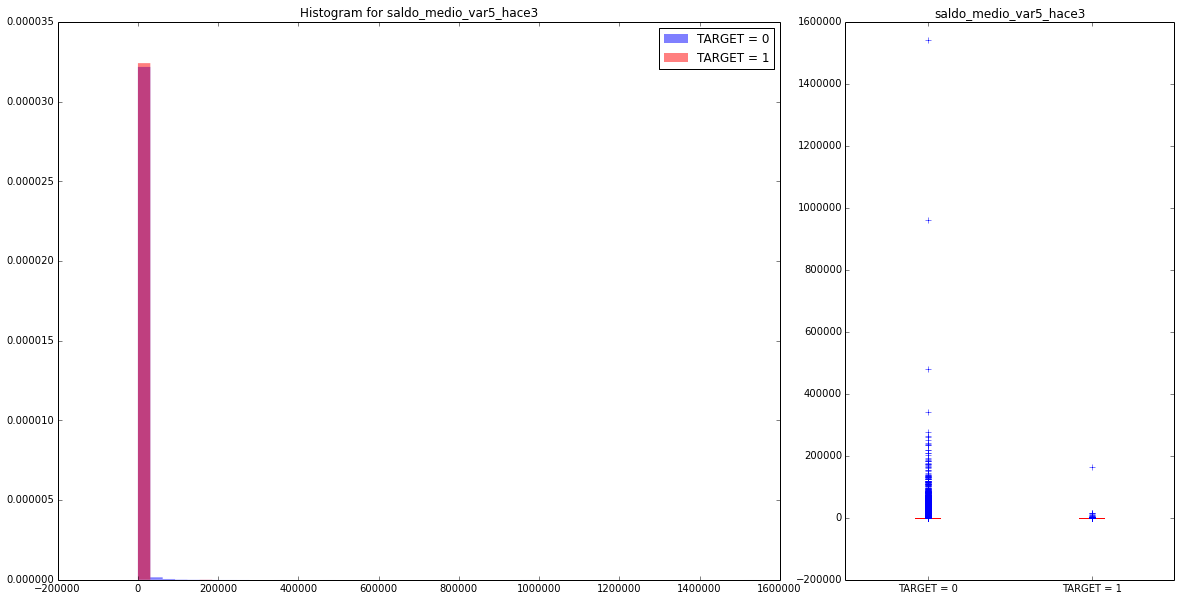

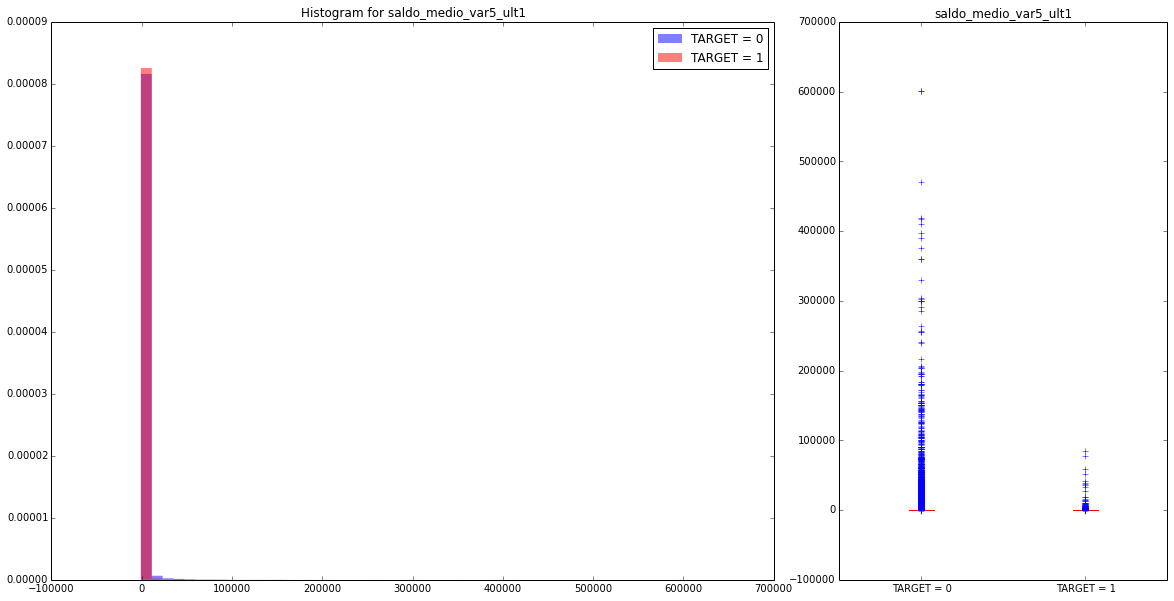

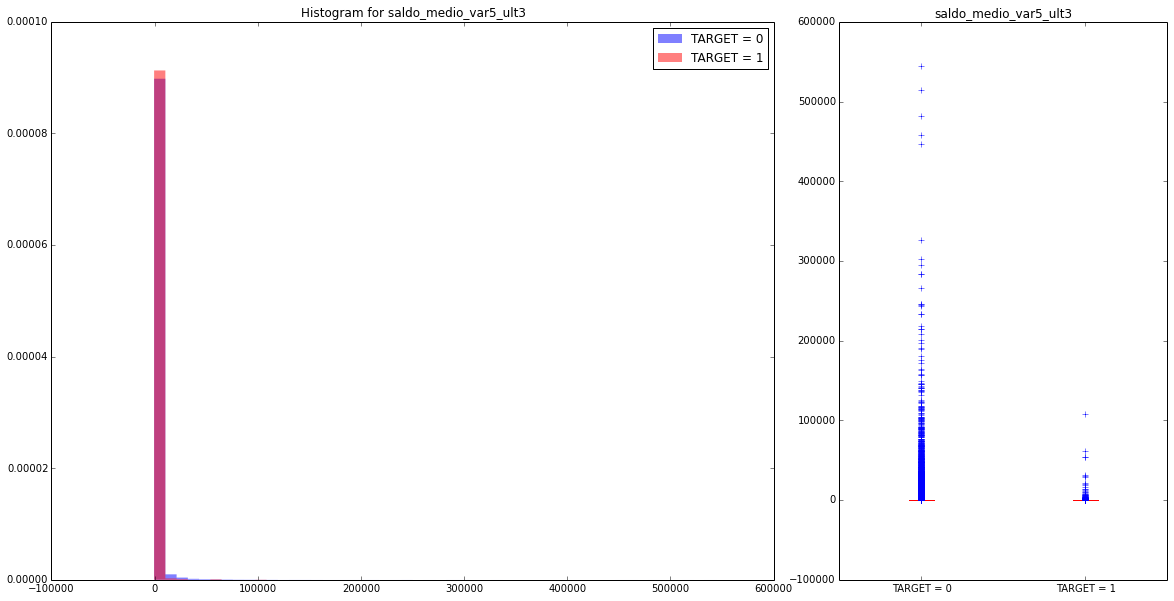

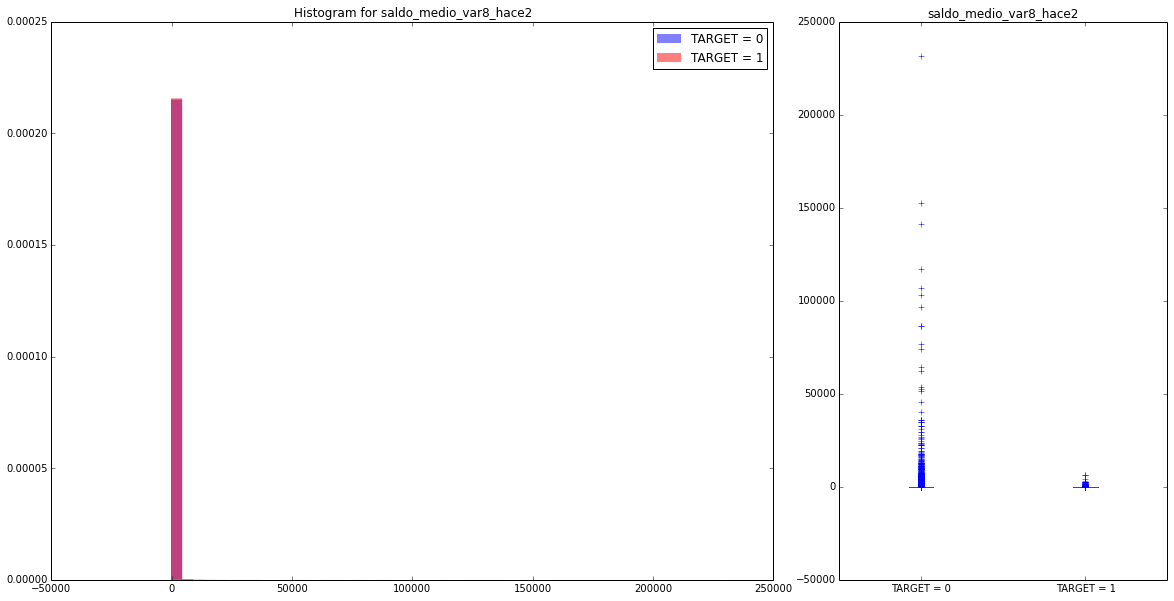

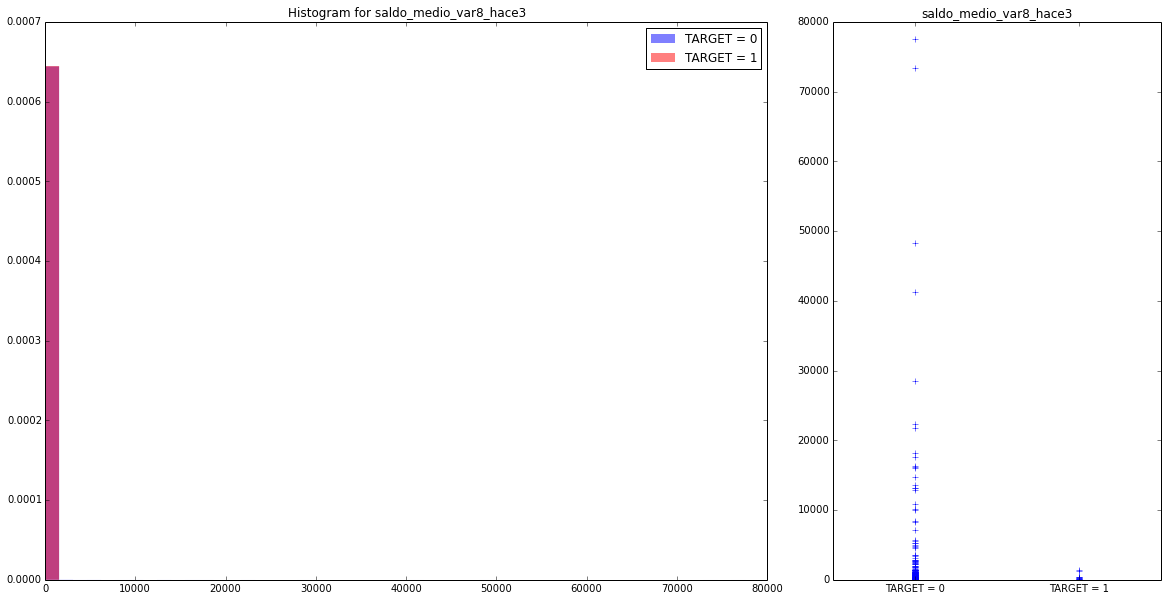

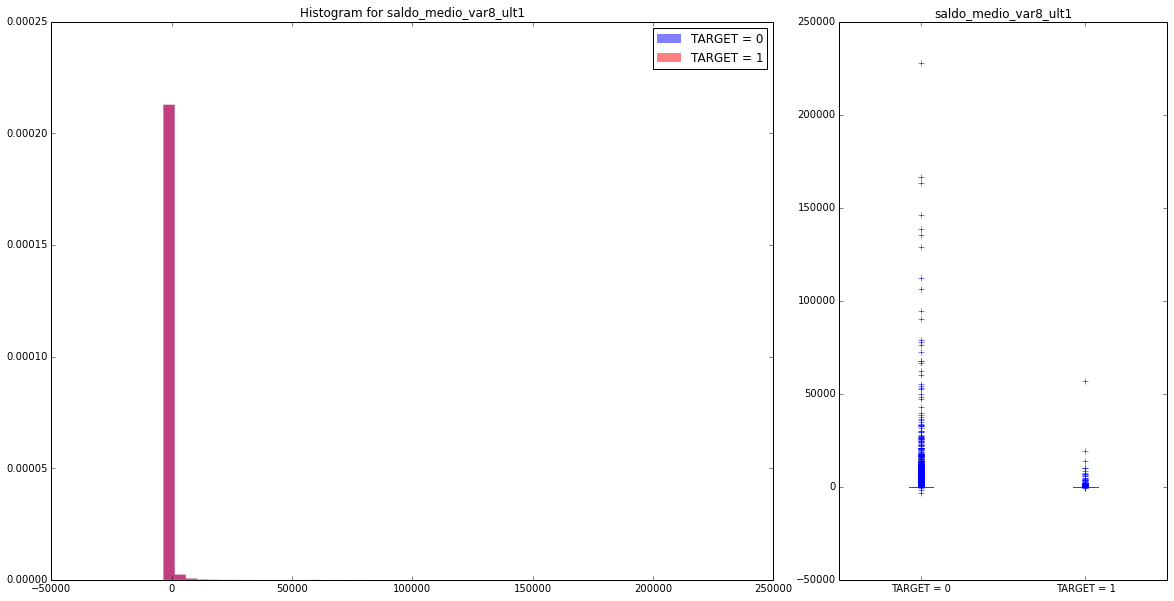

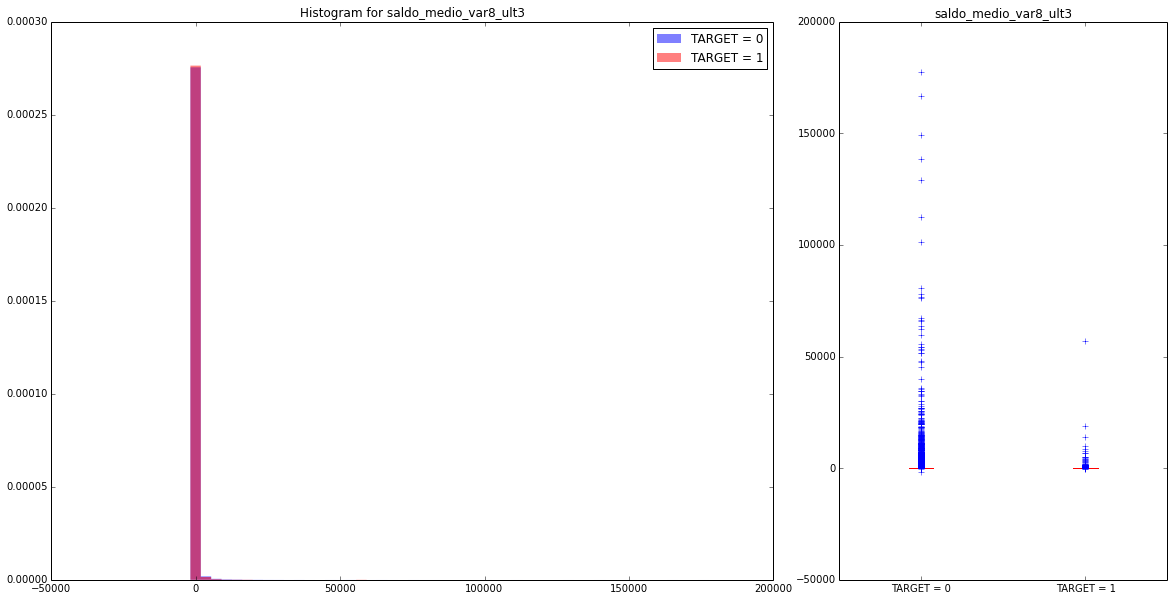

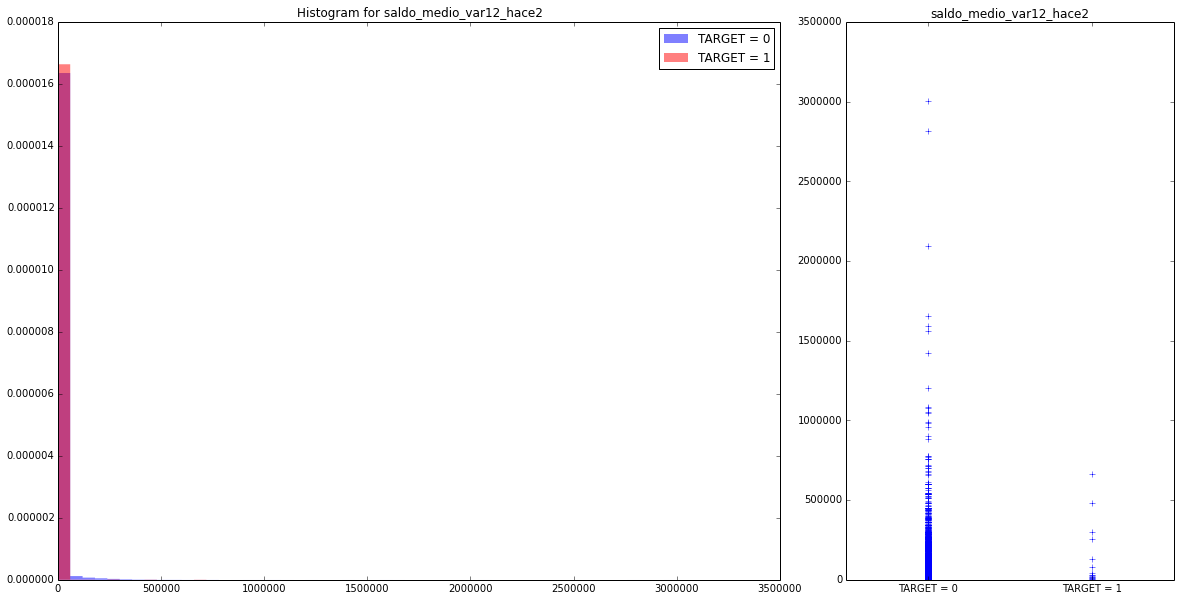

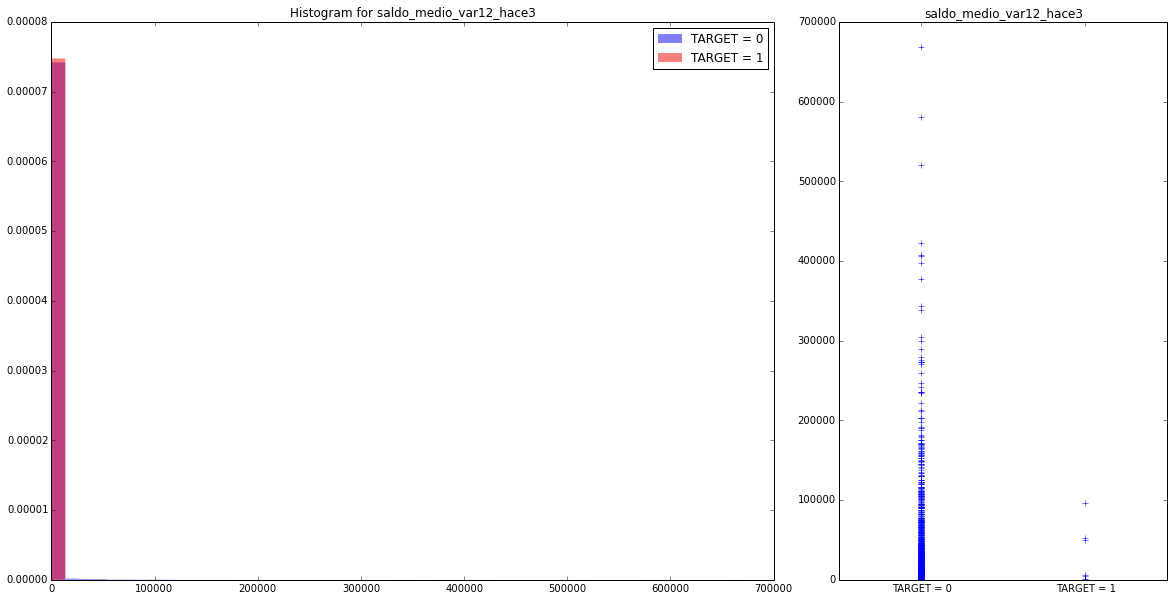

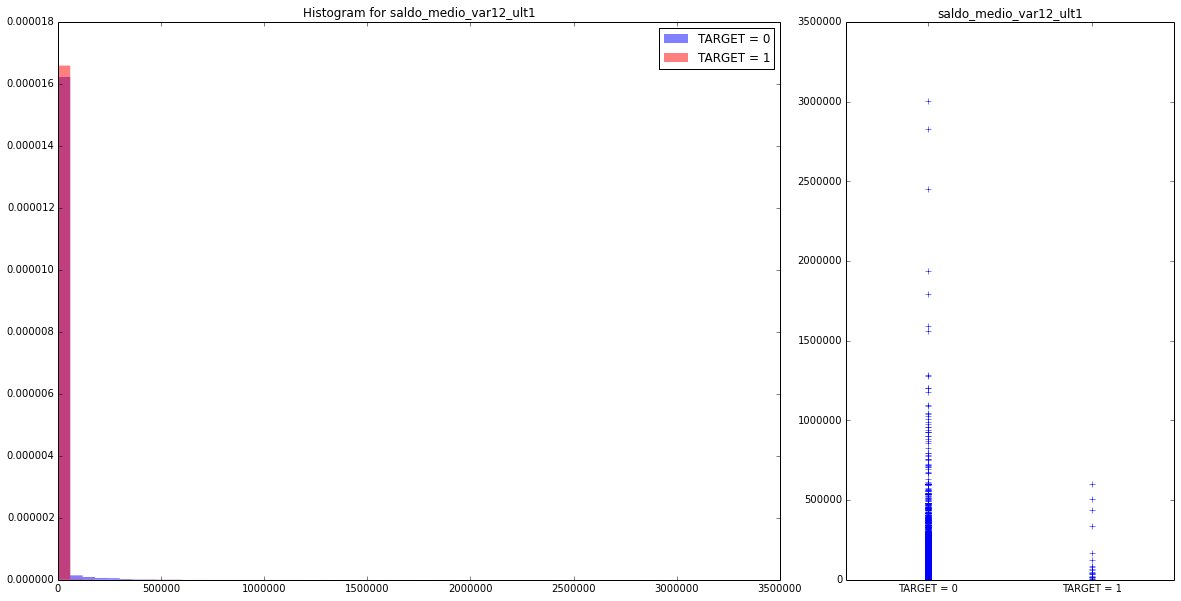

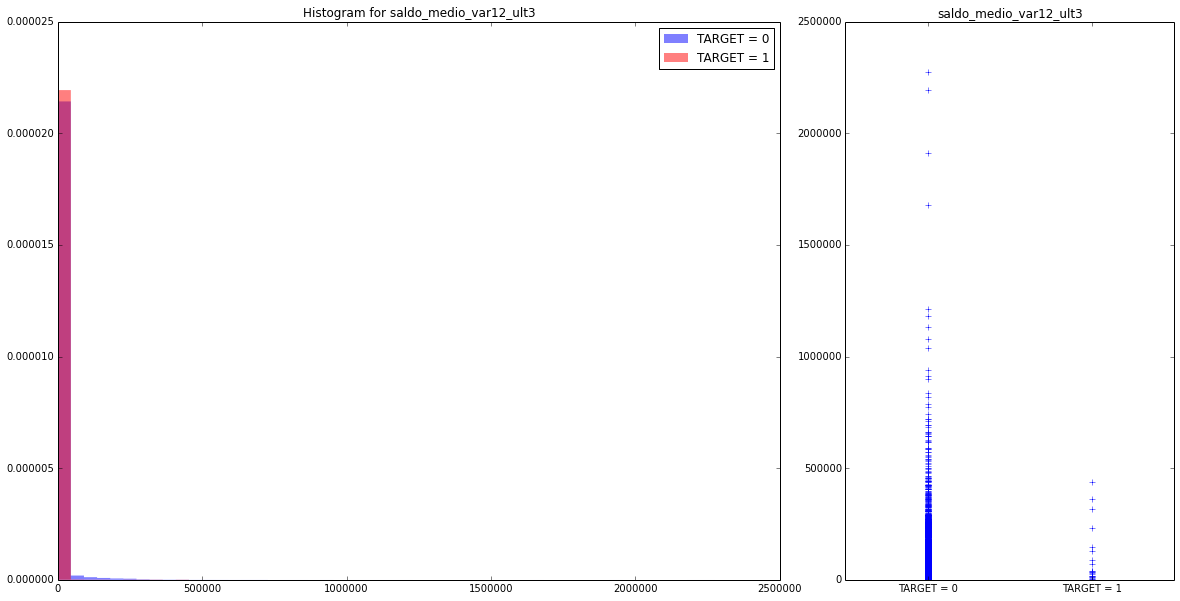

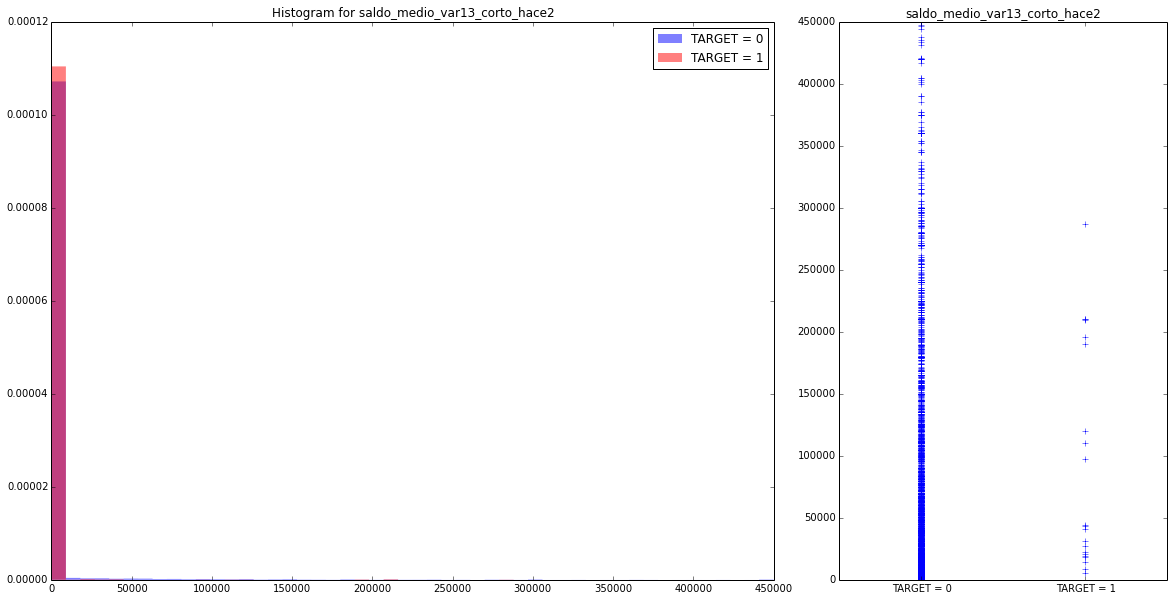

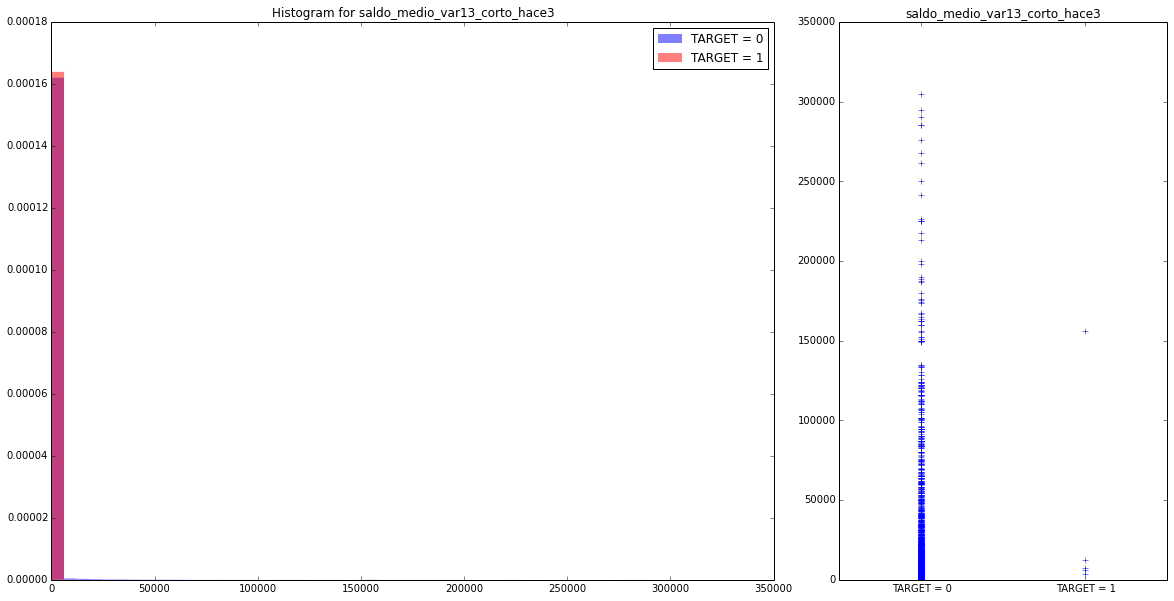

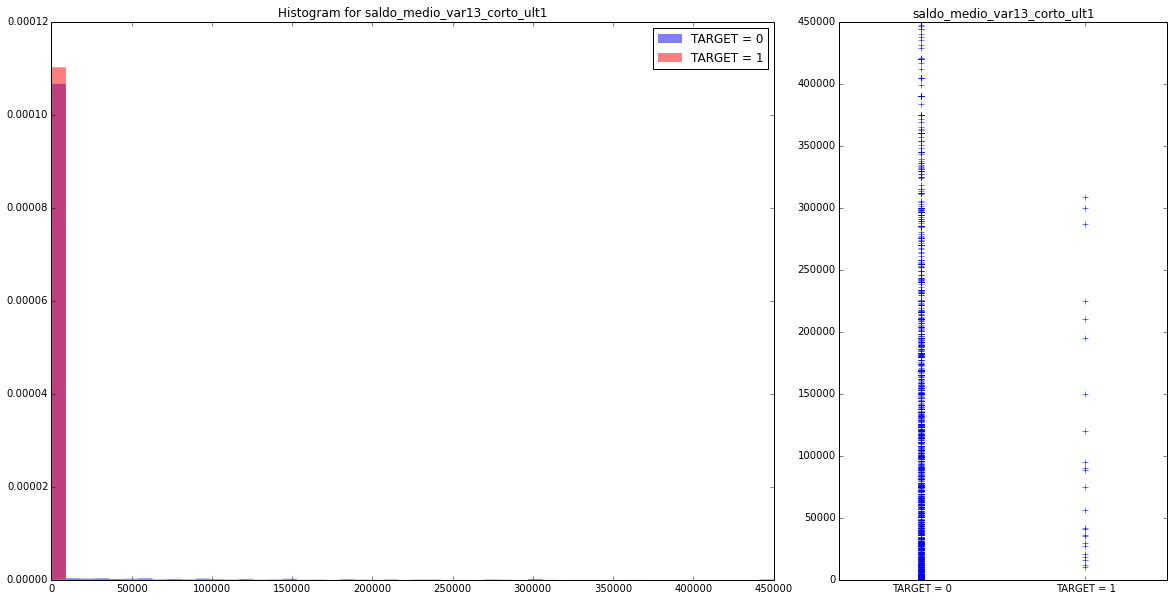

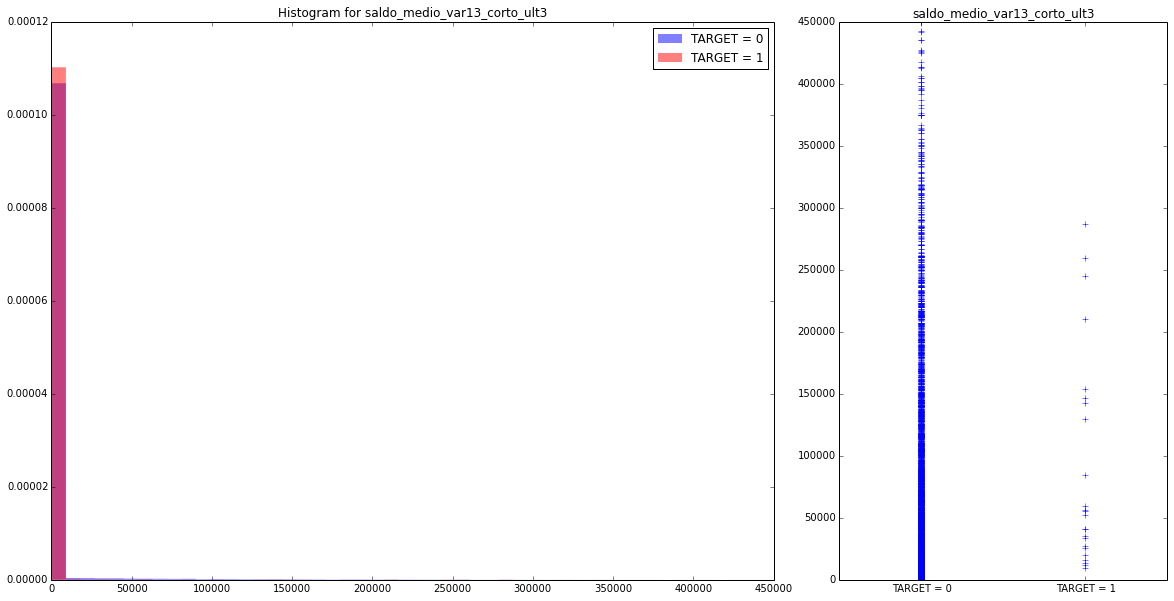

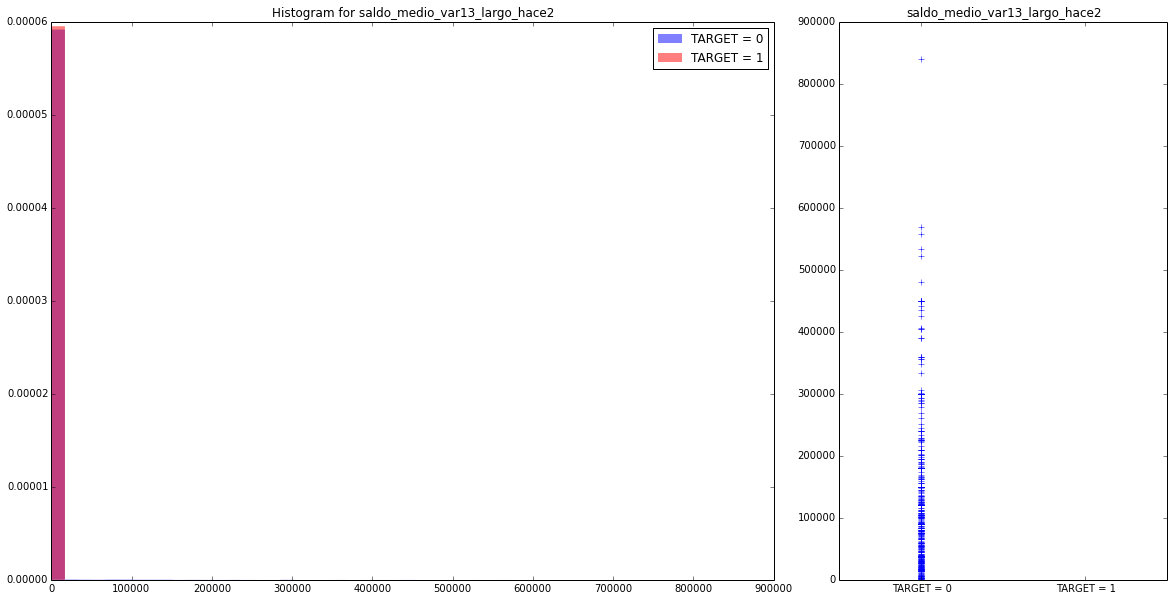

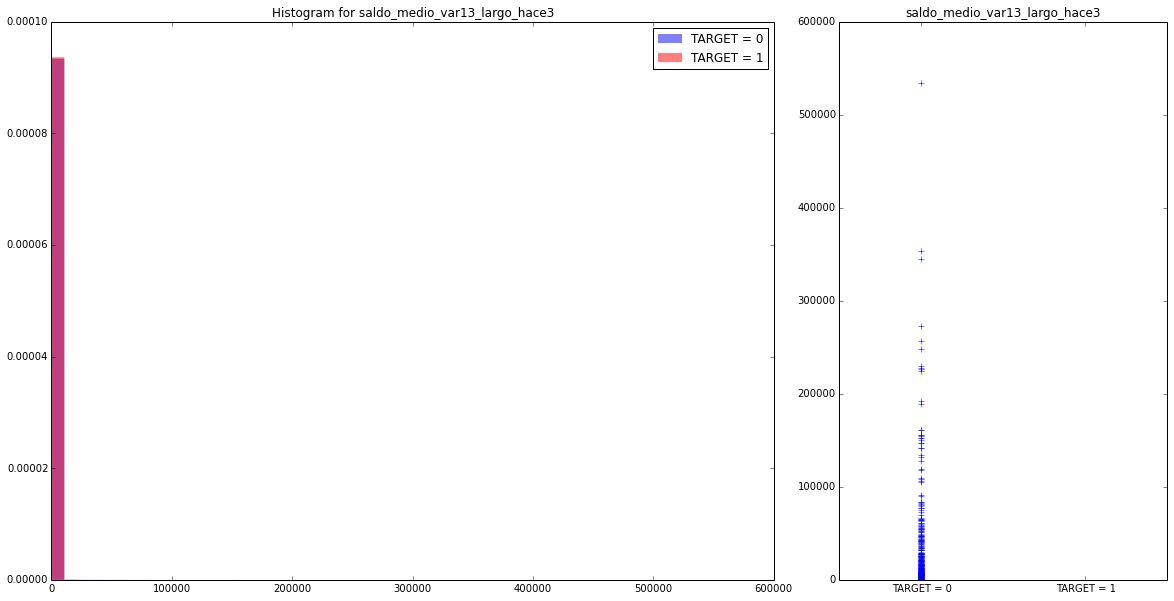

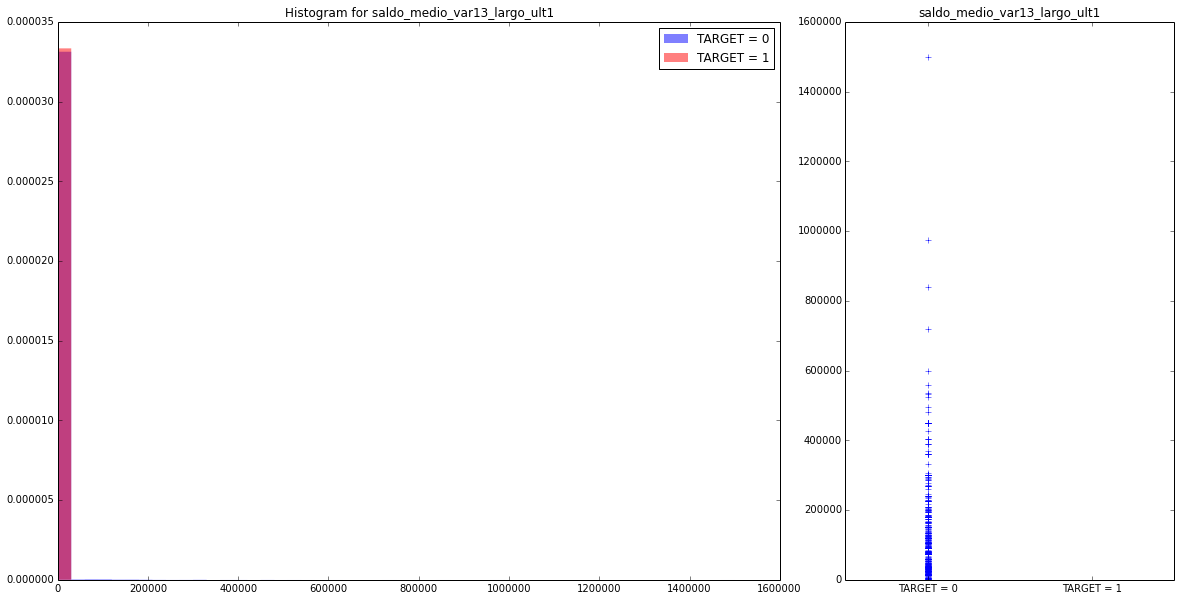

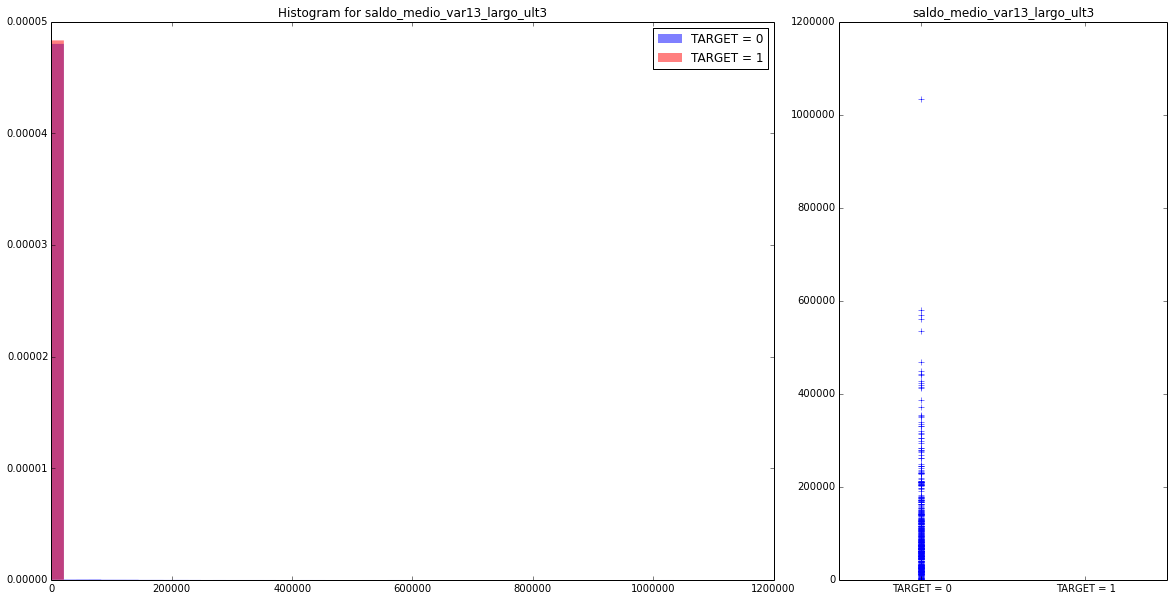

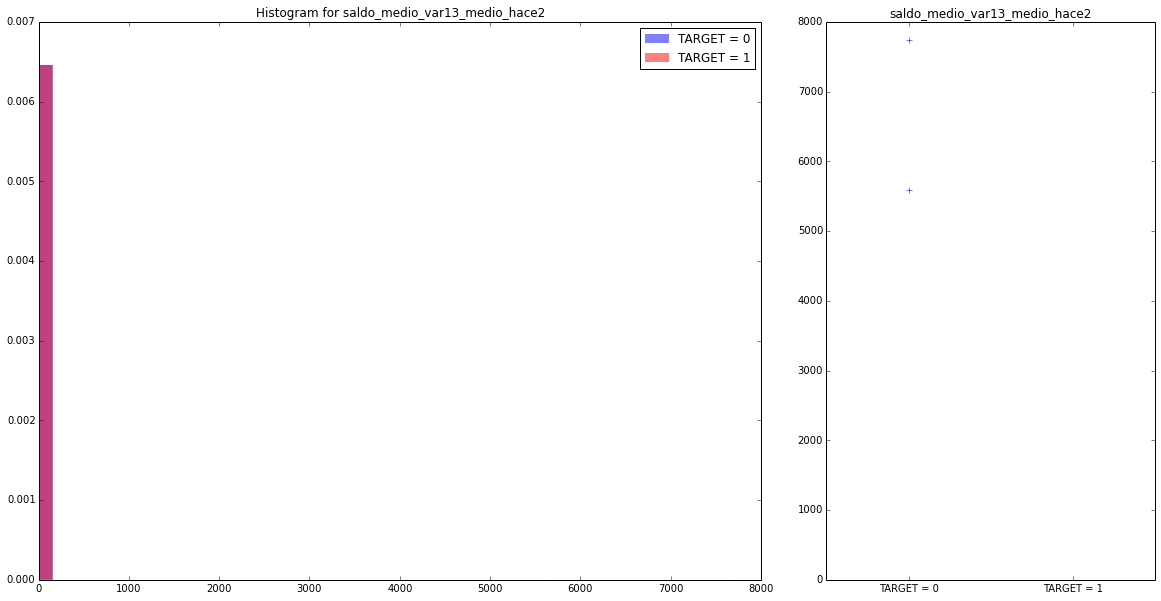

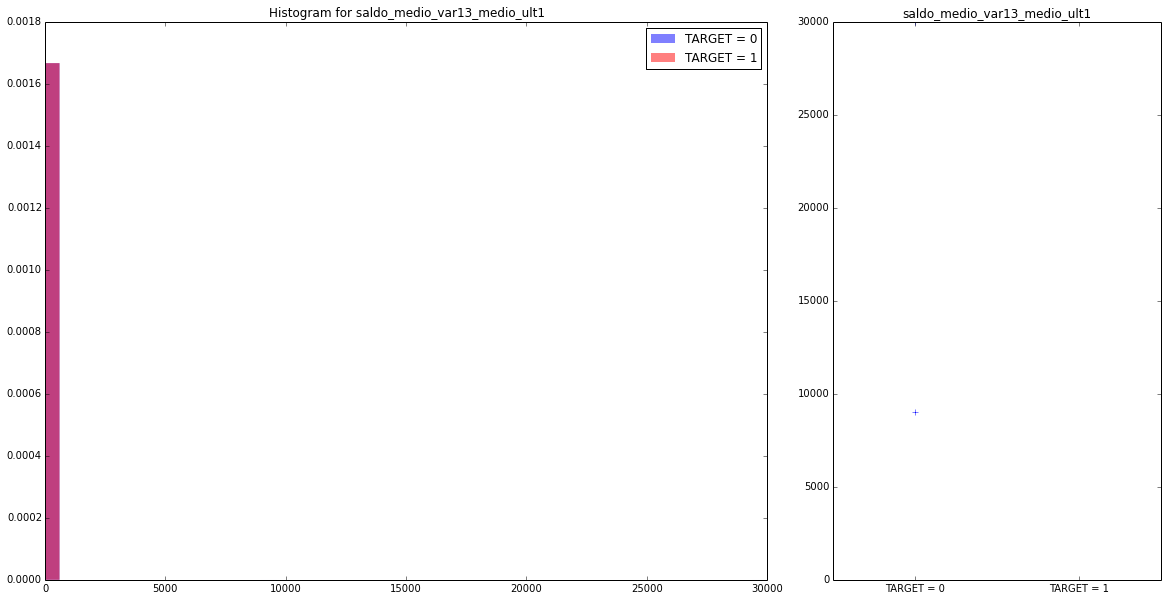

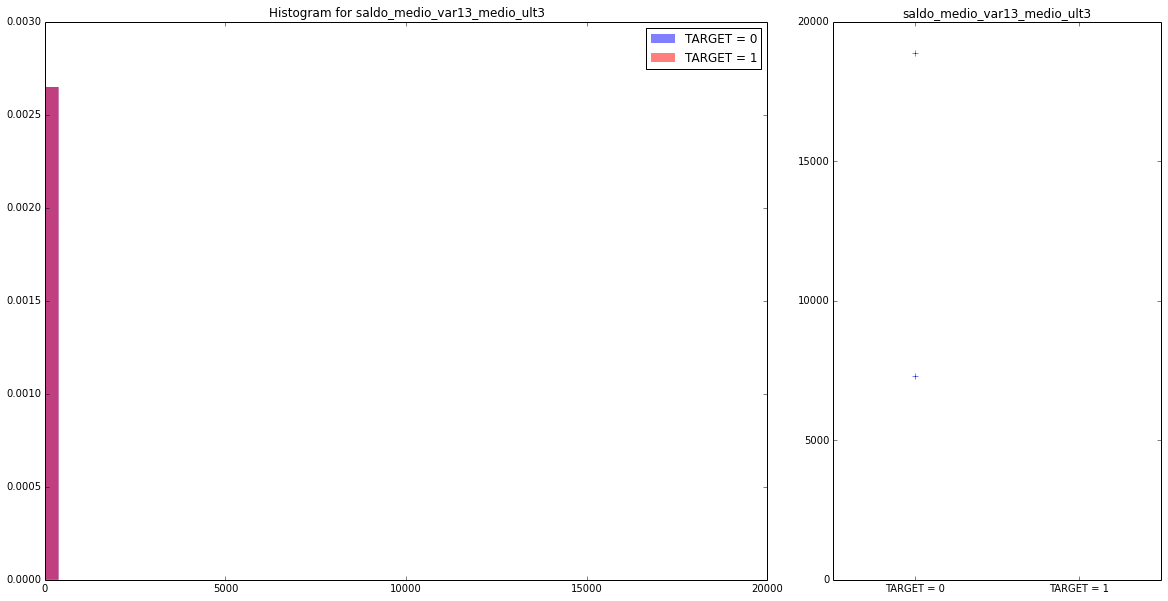

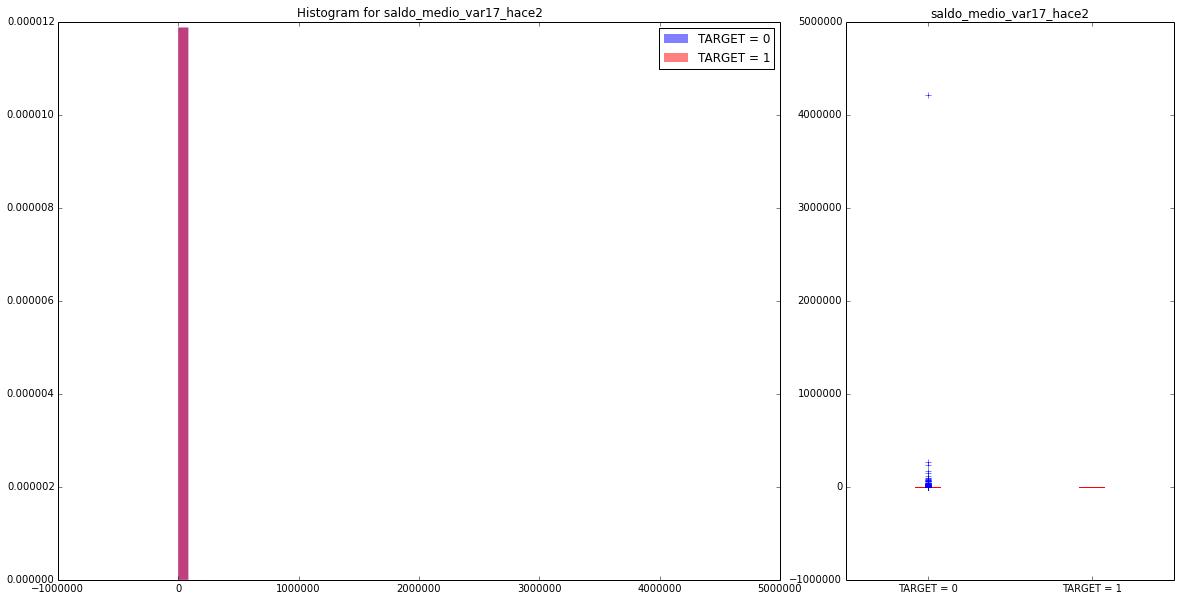

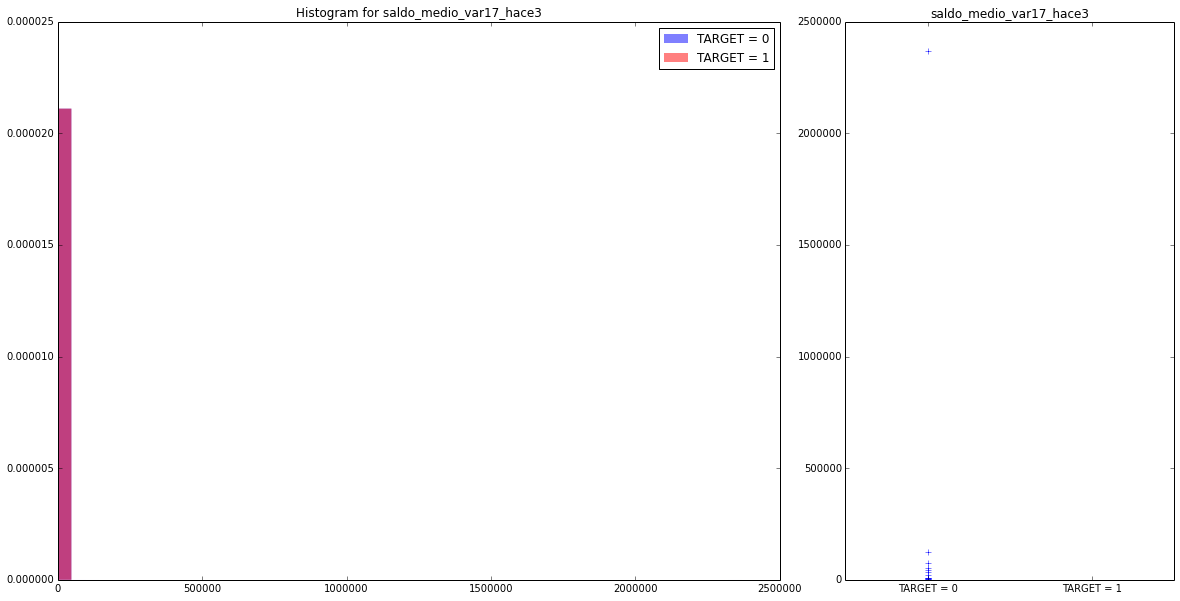

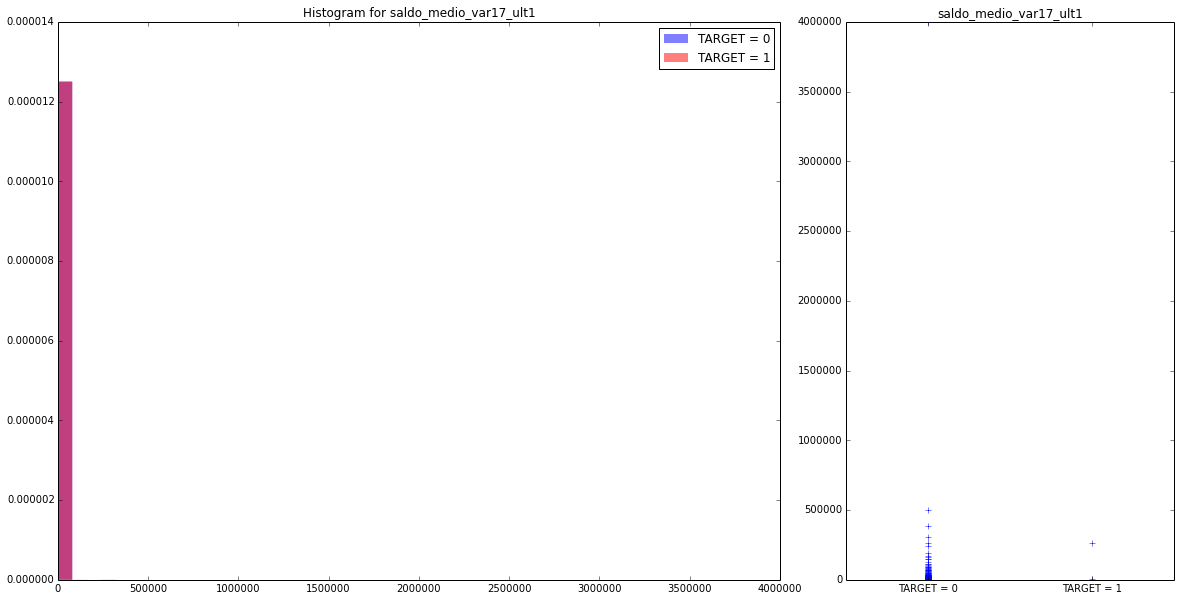

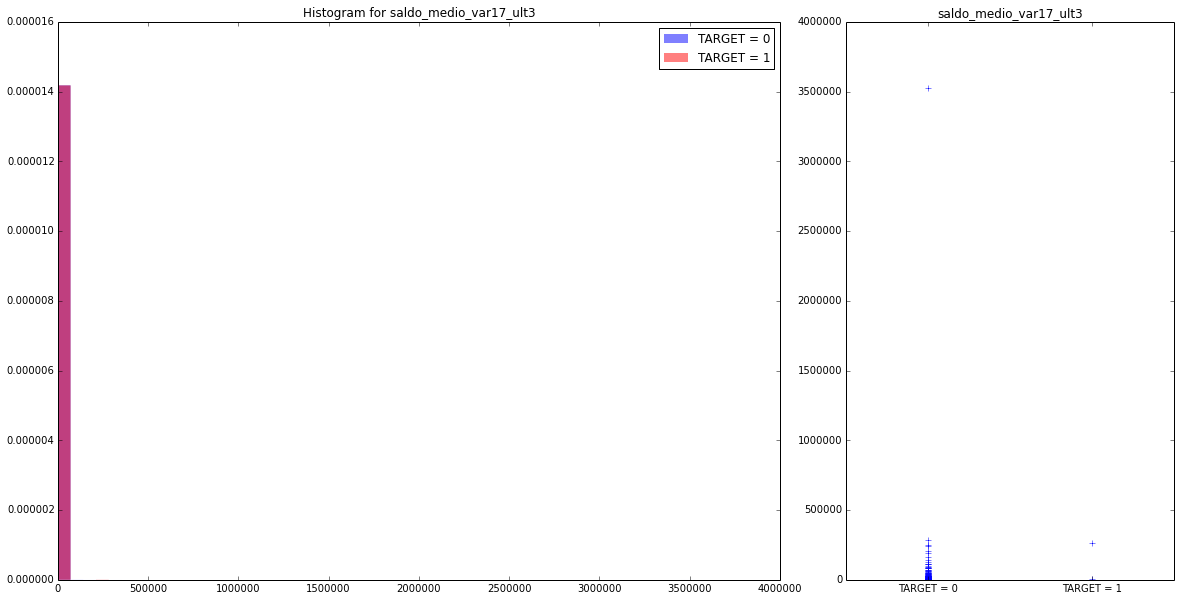

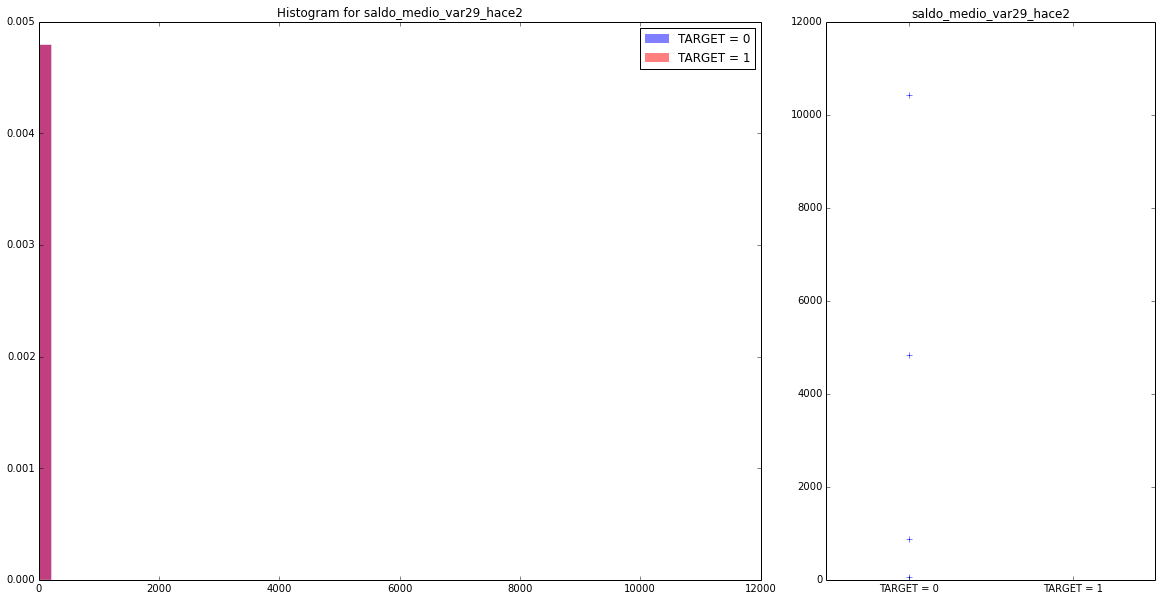

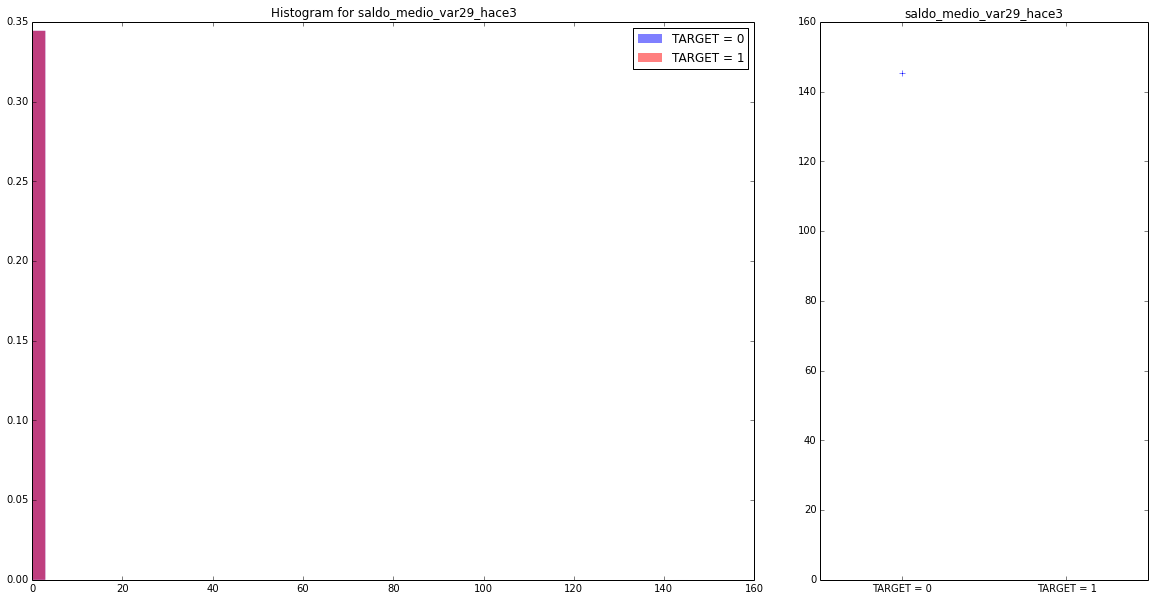

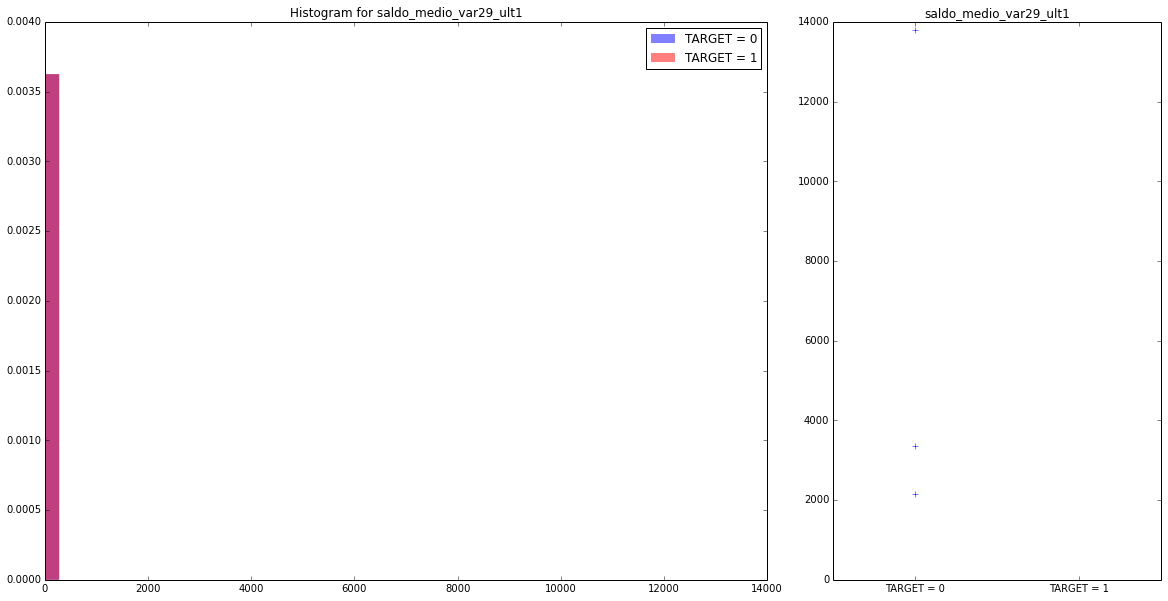

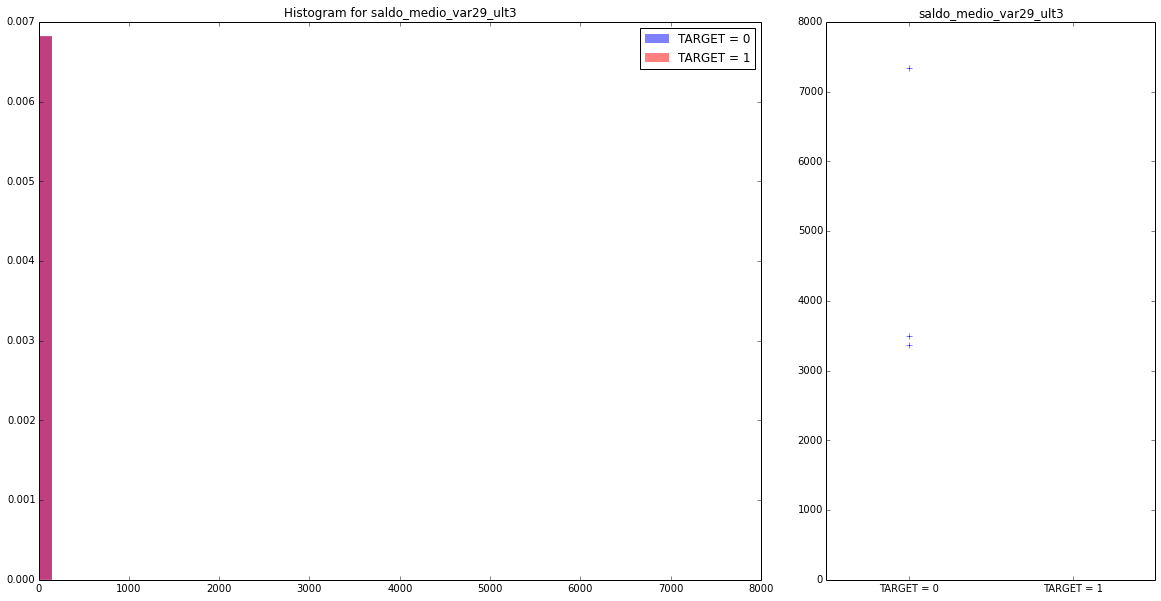

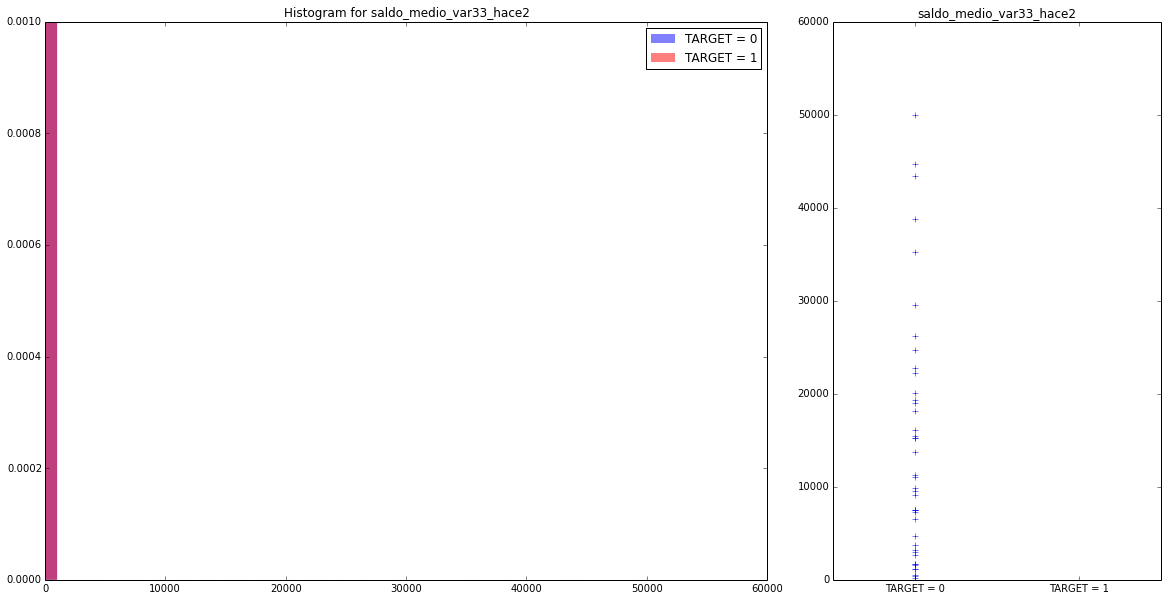

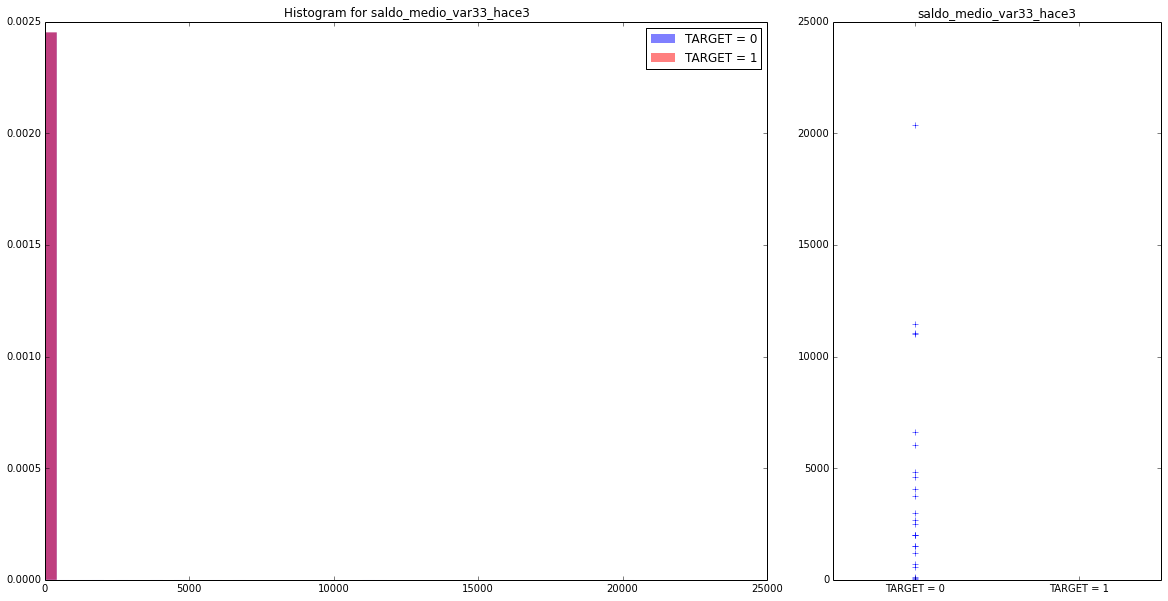

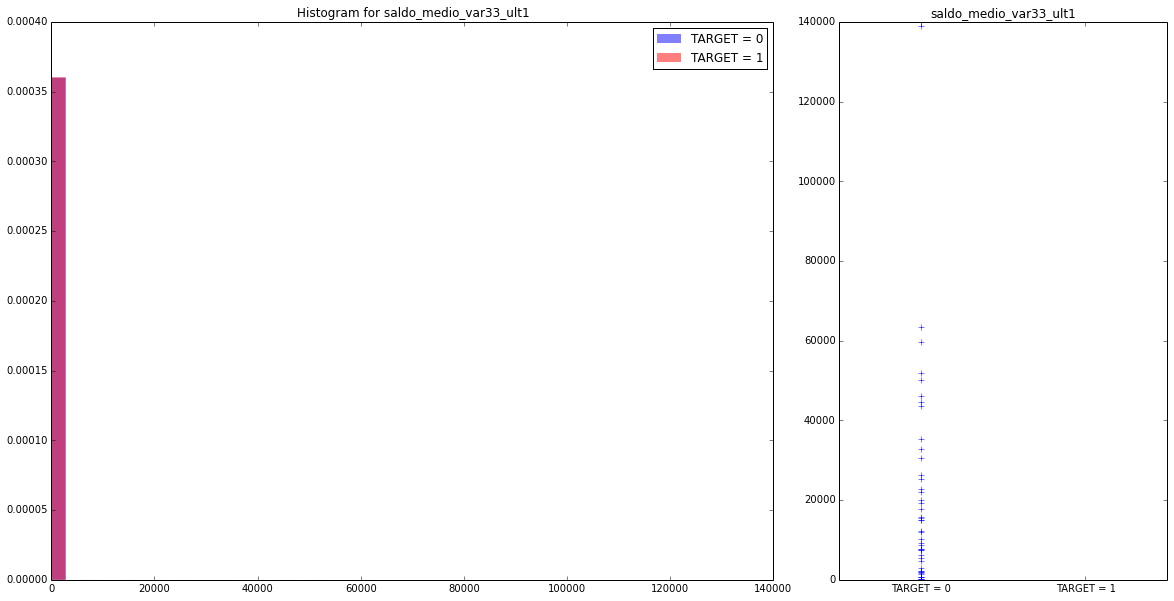

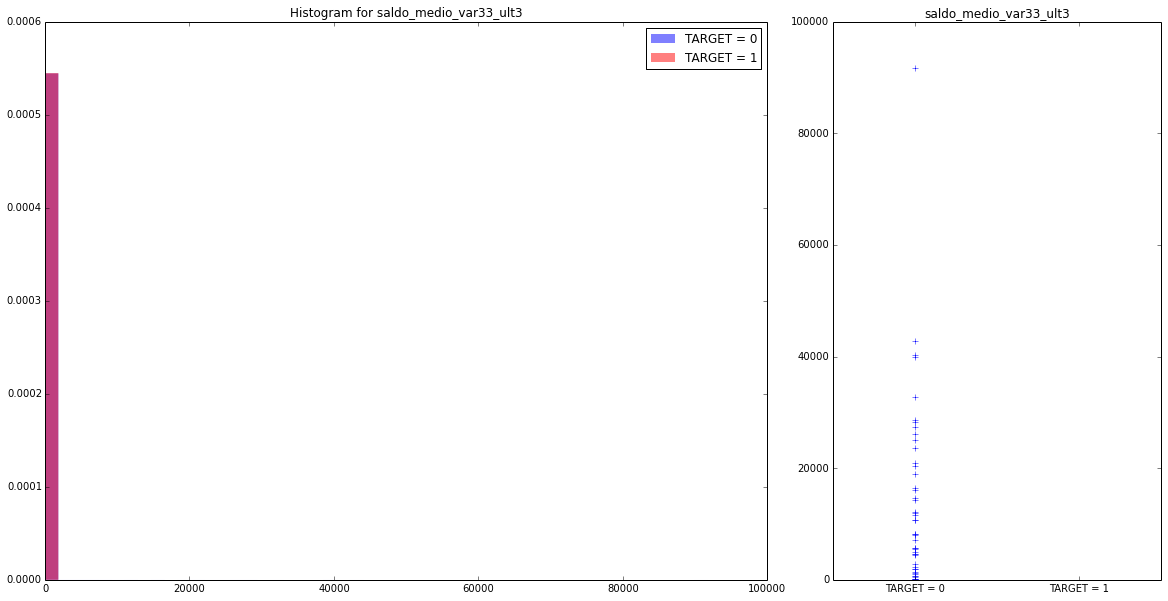

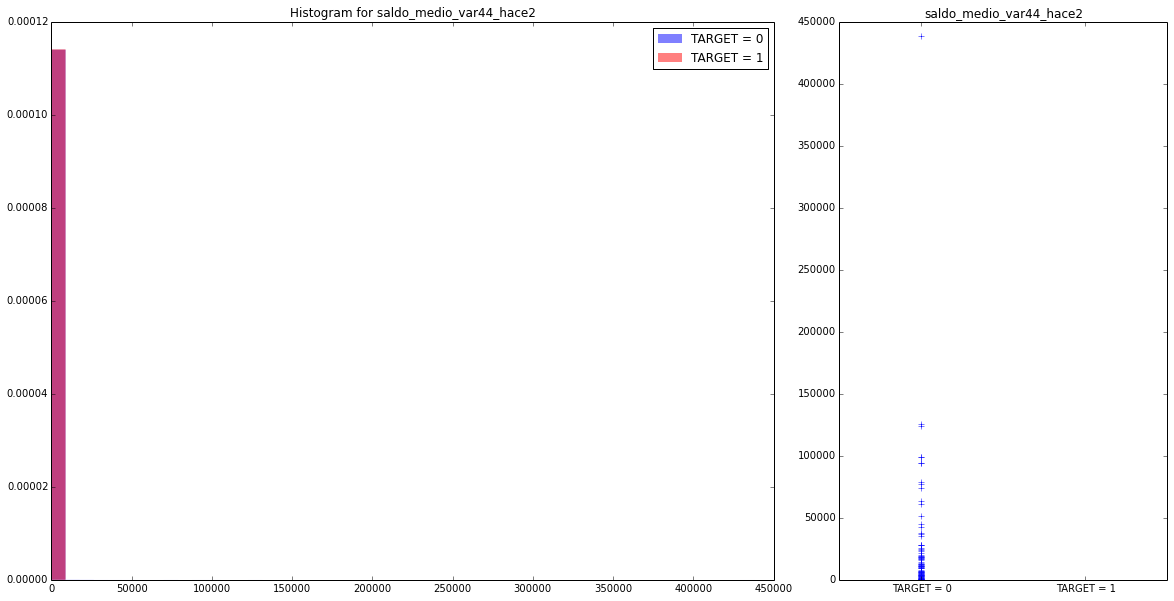

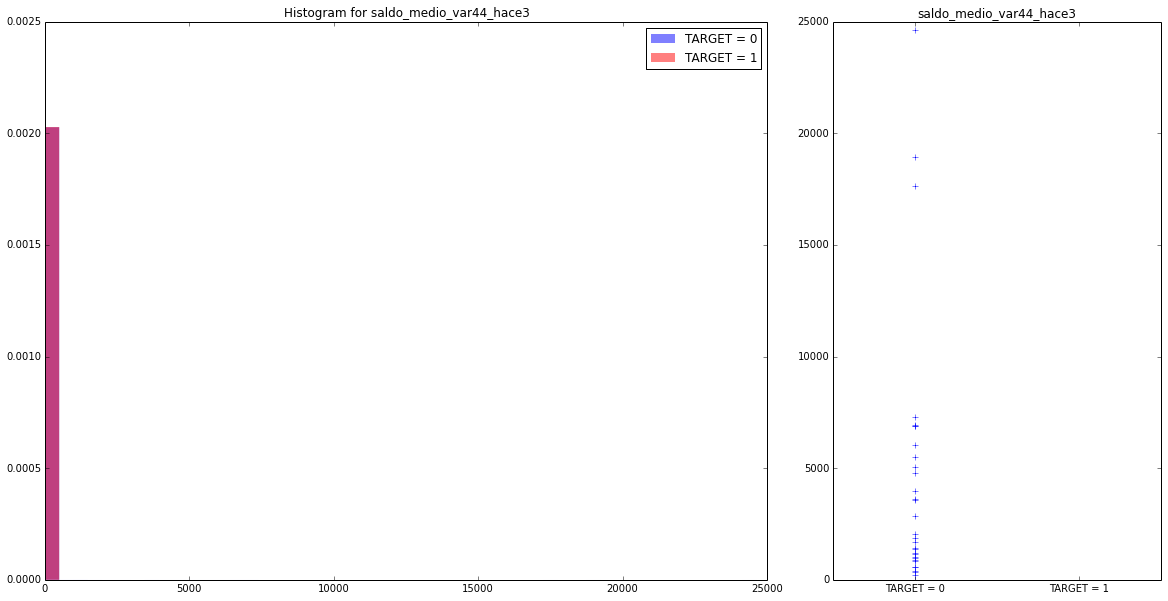

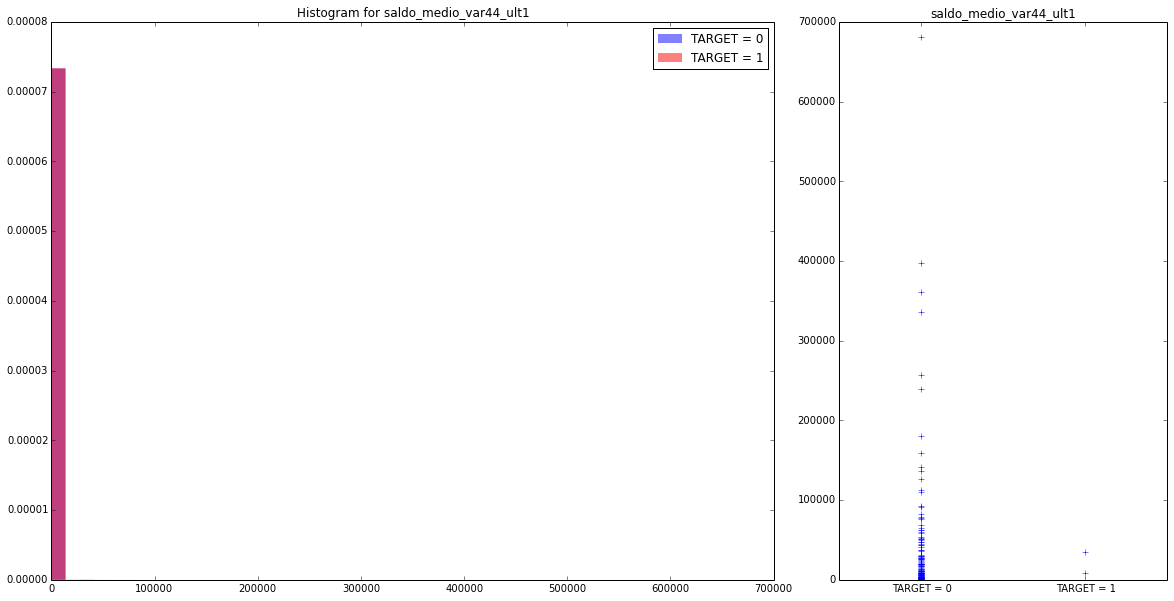

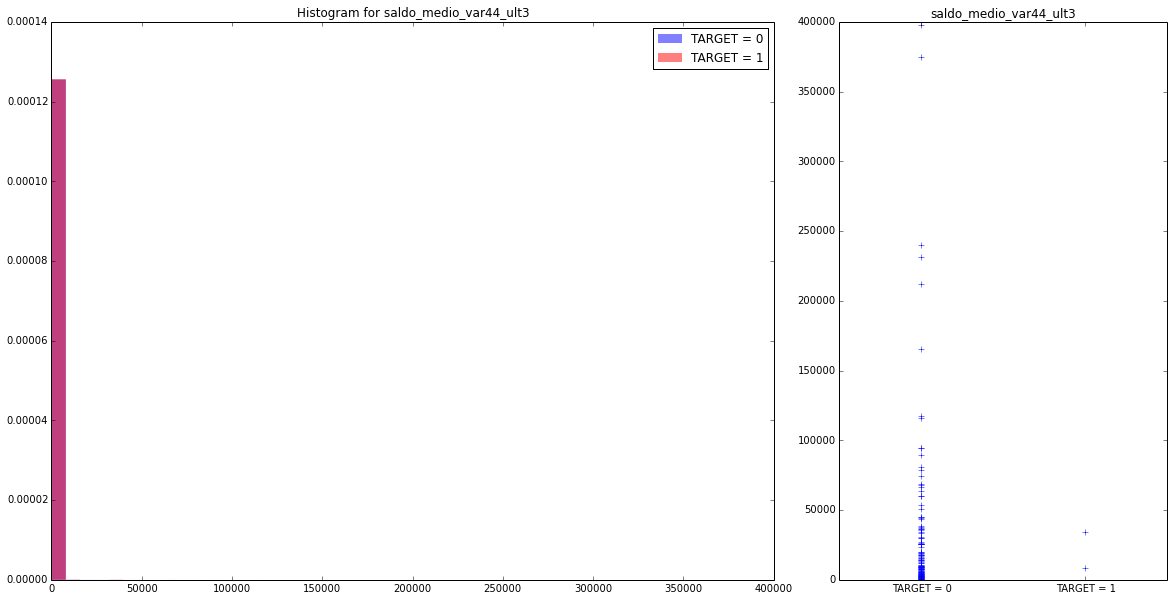

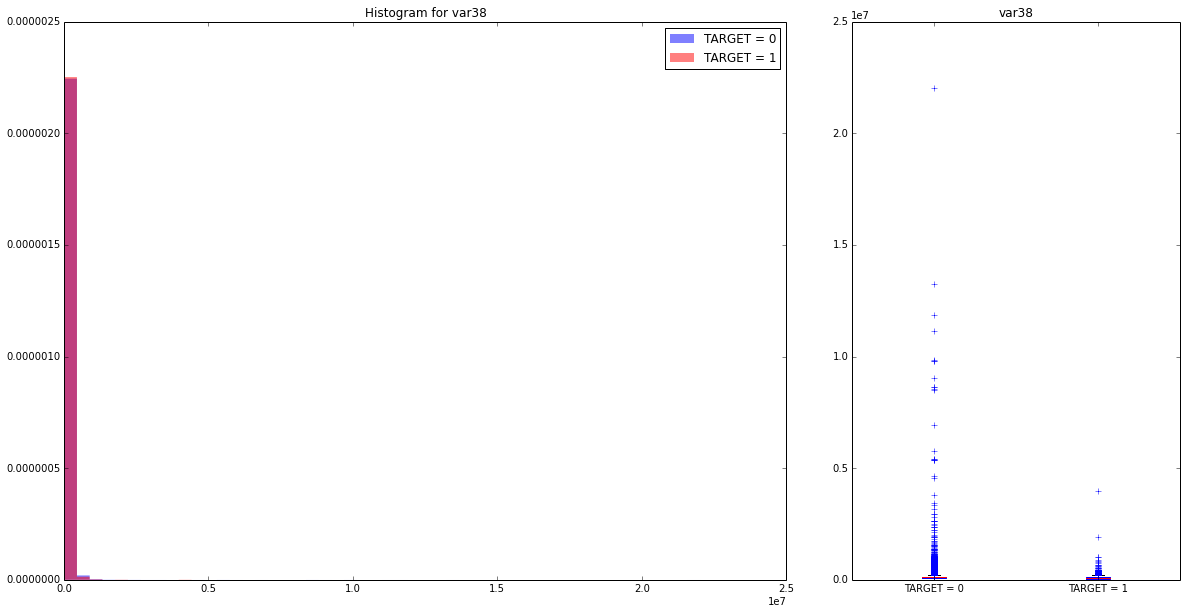

In [48]:
import matplotlib.gridspec as gridspec

for ft in train_neg.columns:
#    print ("Creating histogram for feature {}".format(ft))
    min = train[ft].min()
    max = train[ft].max()
    plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(1, 3)
    plt.subplot(gs[0,0:2])
    plt.hist(train_neg[ft].dropna().values, alpha=0.5, label="TARGET = 0", normed=True, histtype='stepfilled', color='b', bins=50, linewidth=0, range=(min,max))
    plt.hist(train_pos[ft].dropna().values, alpha=0.5, label="TARGET = 1", normed=True, histtype='stepfilled', color='r', bins=50, linewidth=0, range=(min,max))
    plt.title("Histogram for {}".format(ft))
    plt.legend()
    ax = plt.subplot(gs[0,2])
    plt.boxplot([train_neg[ft].dropna().values, train_pos[ft].dropna().values], positions=[1, 2], )
    ax.set_xticklabels(['TARGET = 0', 'TARGET = 1'])
    plt.title(ft)
#    plt.savefig('generated/feature_histograms/{}.png'.format(ft), bbox_inches='tight')
#    plt.clf()